## Case study: continual feature selection in genomic data stream

1. **Data preparation and exploration**
2. **

In [1251]:
# Required to correctly display interactive (dynamic) plots in Jupyter notebooks
%matplotlib notebook
# For Jupyter Lab instead
# %matplotlib ipympl
import seaborn as sns

Set the main folder

In [1254]:
import os
os.chdir("/Users/vittfo/Documents/ERC/TEST/FDD-ES/")
print(os.getcwd())

/Users/vittfo/Documents/ERC/TEST/FDD-ES


### 1. Data preparation and exploration
Load gene expression of breast cancer samples from the SCAN-B cohort 

In [11]:
from featurewiz import FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)

Imported featurewiz. Version = 0.1.04. nrows=None uses all rows. Set nrows=1000 to randomly sample 1000 rows.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [3]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [897]:
swdata = pd.read_csv('protein_coding_gene_expression.csv')
if 'Unnamed: 0' in swdata.columns:
    print(swdata['Unnamed: 0'])
swdata = swdata.drop('Unnamed: 0', axis=1, errors='ignore')

0          F1
1          F2
2          F3
3          F4
4          F5
        ...  
2964    F3267
2965    F3268
2966    F3269
2967    F3270
2968    F3272
Name: Unnamed: 0, Length: 2969, dtype: object


In [898]:
print(" \nCheck DataFrame sizes: \n\n", swdata.shape) # check dataset dimensions
print(" \nCount total NaN in a DataFrame : \n\n", swdata.isnull().sum().sum()) # count total NaN in a DataFrame

 
Check DataFrame sizes: 

 (2969, 15953)
 
Count total NaN in a DataFrame : 

 0


In [899]:
# identify genes with mean expression smaller than zero
low_count = []
for i in range(swdata.shape[1]):
    if np.max(swdata.iloc[:,i]) < 0:
        low_count.append(i)
print(len(low_count))

0


In [900]:
#genes_to_be_removed = np.unique(np.asarray(low_count))
#swdata = swdata.drop(swdata.columns[genes_to_be_removed],axis = 1)
#print(" \nCheck DataFrame sizes: \n\n", swdata.shape) # check dataset dimensions

Load clinical variables of breast cancer samples from the SCAN-B cohort 

In [901]:
swpheno = pd.read_csv('sw_breast_pheno.csv')
if 'Unnamed: 0' in swpheno.columns:
    print(swpheno['Unnamed: 0'])
swpheno = swpheno.drop('Unnamed: 0', axis=1, errors='ignore')

0          F1
1          F2
2          F3
3          F4
4          F5
        ...  
2964    F3267
2965    F3268
2966    F3269
2967    F3270
2968    F3272
Name: Unnamed: 0, Length: 2969, dtype: object


In [902]:
print(swpheno.shape)
swpheno.head(10)

(2969, 31)


Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
3           GSM2528082  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   
5           GSM2528084  Public on Mar 12 2018            Mar 09 2017   
6           GSM2528087  Public on Mar 12 2018            Mar 09 2017   
7           GSM2528088  Public on Mar 12 2018            Mar 09 2017   
8           GSM2528089  Public on Mar 12 2018            Mar 09 2017   
9           GSM2528090  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
3             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   
5             Mar 12 2018         SRA                     1   
6             Mar 12 2018         SRA                     1   
7             Mar 12 2018         SRA                     1   
8             Mar 12 2018         SRA                     1   
9             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
3   Primary breast tumor        Homo sapiens   39      51.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   
5   Primary breast tumor        Homo sapiens   40      13.0  ...   
6   Primary breast tumor        Homo sapiens   82      10.0  ...   
7   Primary breast tumor        Homo sapiens   67       6.0  ...   
8   Primary breast tumor        Homo sapiens   71      16.0  ...   
9   Primary breast tumor        Homo sapiens   64      17.0  ...   

                 nhg_pmgc               er_psgc               pgr_psgc  \
0  nhg prediction mgc: G3  er prediction sgc: 0  pgr prediction sgc: 0   
1  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
2  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
3  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
4  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
5  nhg prediction mgc: G3  er prediction sgc: 0  pgr prediction sgc: 1   
6  nhg prediction mgc: G2  er prediction sgc: 0  pgr prediction sgc: 0   
7  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 0   
8  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
9  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   

                her2_psgc               ki67_psgc   Pam50 SurvDays  \
0  her2 prediction sgc: 0  ki67 prediction sgc: 1   Basal     2367   
1  her2 prediction sgc: 0  ki67 prediction sgc: 0    LumA     2367   
2  her2 prediction sgc: 0  ki67 prediction sgc: 1    LumB     2168   
3  her2 prediction sgc: 1  ki67 prediction sgc: 1    LumA     2416   
4  her2 prediction sgc: 0  ki67 prediction sgc: 0  Normal     2389   
5  her2 prediction sgc: 0  ki67 prediction sgc: 1   Basal     2373   
6  her2 prediction sgc: 1  ki67 prediction sgc: 0    Her2     2380   
7  her2 prediction sgc: 1  ki67 prediction sgc: 0    LumA     2324   
8  her2 prediction sgc: 0  ki67 prediction sgc: 0    LumA     2367   
9  her2 prediction sgc: 0  ki67 prediction sgc: 1    LumB     1962   

  OverallSurv Endocrine_treat chemo  
0           0             0.0   1.0  
1           0             1.0   1.0  
2           1             1.0   1.0  
3           0             1.

ER/PgR/HER2/Ki67: 0 negative/normal/low, 1 positive/amplified/high

Define histological subtypes

* Luminal A breast cancer is estrogen receptor-positive and progesterone receptor-positive, HER2-negative, and has low levels of the protein Ki-67.
* Luminal B breast cancer is estrogen receptor-positive and HER2-negative, and also has either high levels of Ki-67 (which indicate faster growth of cancer cells) or is progesterone receptor-negative.
* HER2-enriched breast cancer is estrogen receptor-negative and progesterone receptor-negative and HER2-positive.
* Basal-like breast cancer is estrogen receptor-negative, progesterone receptor-negative, and HER2-negative. 

This information is provided by Breastcancer.org. (https://www.breastcancer.org/types/molecular-subtypes)

IHC status 
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4656721/
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4127612/

In [903]:
swpheno['histcl'] = ['NotClear'] * len(swpheno['er_psgc'])
# Define Basal-like
swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 0') & 
             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 0') &
             (swpheno['her2_psgc'] == 'her2 prediction sgc: 0')), 'histcl'] = 'Basal'
# Define Her2
swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 0') & 
             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 0') &
             (swpheno['her2_psgc'] == 'her2 prediction sgc: 1')), 'histcl'] = 'Her2'
# Define Luminal A
#swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 1') & 
#             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 1') &
#             (swpheno['her2_psgc'] == 'her2 prediction sgc: 0')), 'histcl'] = 'LumA'
# Define Luminal B
#swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 1') & 
#             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 0') &
#             (swpheno['her2_psgc'] == 'her2 prediction sgc: 1')), 'histcl'] = 'LumB'
# advanced
# Define Luminal A
swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 1') & 
             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 1') & 
             (swpheno['her2_psgc'] == 'her2 prediction sgc: 0') &
             (swpheno['ki67_psgc'] == 'ki67 prediction sgc: 0')), 'histcl'] = 'LumA'
# Define Luminal B
swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 1') & 
             (swpheno['her2_psgc'] == 'her2 prediction sgc: 0') &
             ((swpheno['pgr_psgc'] == 'pgr prediction sgc: 0') |
              (swpheno['ki67_psgc'] == 'ki67 prediction sgc: 1'))), 'histcl'] = 'LumB'
swpheno.loc[((swpheno['er_psgc'] == 'er prediction sgc: 1') & 
             (swpheno['pgr_psgc'] == 'pgr prediction sgc: 0') &
             (swpheno['her2_psgc'] == 'her2 prediction sgc: 1')), 'histcl'] = 'LumB'
#
print(collections.Counter(swpheno['histcl']))

Counter({'LumB': 1395, 'LumA': 1120, 'Basal': 226, 'NotClear': 147, 'Her2': 81})


In [904]:
import collections
print(collections.Counter(swpheno['histcl']))
print(collections.Counter(swpheno['Pam50']))
print(swpheno.groupby(['histcl', 'Pam50']).size())

Counter({'LumB': 1395, 'LumA': 1120, 'Basal': 226, 'NotClear': 147, 'Her2': 81})
Counter({'LumA': 1501, 'LumB': 666, 'Basal': 308, 'Her2': 295, 'Normal': 199})
histcl    Pam50 
Basal     Basal     190
          Her2       29
          LumA        1
          LumB        2
          Normal      4
Her2      Basal       7
          Her2       74
LumA      Basal       2
          Her2        2
          LumA      956
          LumB       47
          Normal    113
LumB      Basal      87
          Her2      134
          LumA      505
          LumB      598
          Normal     71
NotClear  Basal      22
          Her2       56
          LumA       39
          LumB       19
          Normal     11
dtype: int64


Define the dataset for the IHC subtypes

In [905]:
swdata_ihc = swdata[swpheno['histcl'] != 'NotClear']
swpheno_ihc = swpheno[swpheno['histcl'] != 'NotClear']
print(swdata_ihc.shape)
print(swpheno_ihc.shape)

(2822, 15953)
(2822, 32)


Load TCGA breast cancer data

In [906]:
tcga = pd.read_csv('protein_coding_exp_tcga.csv')
tcgap = pd.read_csv('protein_coding_exp_tcga_pheno_2.csv')

In [907]:
#tcga = pd.read_csv('tcga_breast_gdat_0.csv')
#tcgap = pd.read_csv('tcga_breast_pheno_0.csv')

In [908]:
print(tcga.shape)
print(tcgap.shape)

(1071, 16655)
(1071, 29)


In [909]:
if 'Unnamed: 0' in tcga.columns:
    print(tcga['Unnamed: 0'])

0       TCGA.3C.AAAU.01A.11R.A41B.07
1       TCGA.3C.AALI.01A.11R.A41B.07
2       TCGA.3C.AALJ.01A.31R.A41B.07
3       TCGA.3C.AALK.01A.11R.A41B.07
4       TCGA.4H.AAAK.01A.12R.A41B.07
                    ...             
1066    TCGA.WT.AB44.01A.11R.A41B.07
1067    TCGA.XX.A899.01A.11R.A36F.07
1068    TCGA.XX.A89A.01A.11R.A36F.07
1069    TCGA.Z7.A8R5.01A.42R.A41B.07
1070    TCGA.Z7.A8R6.01A.11R.A41B.07
Name: Unnamed: 0, Length: 1071, dtype: object


In [910]:
tcga=tcga.drop('Unnamed: 0', axis=1, errors='ignore')

In [911]:
# count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n", tcga.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 0


In [912]:
tcgap.head()

Unnamed: 0       patient Tumor.Type  \
0  TCGA.3C.AAAU.01A.11R.A41B.07  TCGA-3C-AAAU       BRCA   
1  TCGA.3C.AALI.01A.11R.A41B.07  TCGA-3C-AALI       BRCA   
2  TCGA.3C.AALJ.01A.31R.A41B.07  TCGA-3C-AALJ       BRCA   
3  TCGA.3C.AALK.01A.11R.A41B.07  TCGA-3C-AALK       BRCA   
4  TCGA.4H.AAAK.01A.12R.A41B.07  TCGA-4H-AAAK       BRCA   

  Included_in_previous_marker_papers vital_status  days_to_birth  \
0                                 NO        Alive       -20211.0   
1                                 NO        Alive       -18538.0   
2                                 NO        Alive       -22848.0   
3                                 NO        Alive       -19074.0   
4                                 NO        Alive       -18371.0   

   days_to_death  days_to_last_followup  age_at_initial_pathologic_diagnosis  \
0            NaN                 4047.0                                   55   
1            NaN                 4005.0                                   50   
2            NaN                 1474.0                                   62   
3            NaN                 1448.0                                   52   
4            NaN                  348.0                                   50   

  pathologic_stage  ...  mRNA.Clusters miRNA.Clusters lncRNA.Clusters  \
0              NaN  ...             C1             C3             NaN   
1         Stage_II  ...             C2             C3             NaN   
2         Stage_II  ...             C2             C2             NaN   
3          Stage_I  ...             C2             C2             NaN   
4        Stage_III  ...             C2             C2             NaN   

   Protein.Clusters  PARADIGM.Clusters  Pan.Gyn.Clusters OverallSurv  \
0               NaN                 C5               NaN           0   
1                C2                 C4                C4           0   
2               NaN                 C4               NaN           0   
3                C2                 C6                C4           0   
4                C2                 C6                C1           0   

  er_status_by_ihc pr_status_by_ihc her2_status_by_ihc  
0         Positive         Positive           Negative  
1         Positive         Positive           Positive  
2         Positive         Positive      Indeterminate  
3         Positive         Positive           Positive  
4         Positive         Positive          Equivocal  

[5 rows x 29 columns]

In [913]:
tcgap['histcl'] = ['NotClear'] * len(tcgap['er_status_by_ihc'])
# Define Basal-like
tcgap.loc[((tcgap['er_status_by_ihc'] == 'Negative') & 
           (tcgap['pr_status_by_ihc'] == 'Negative') &
           (tcgap['her2_status_by_ihc'] == 'Negative')), 'histcl'] = 'Basal'
# Define Her2
tcgap.loc[((tcgap['er_status_by_ihc'] == 'Negative') & 
           (tcgap['pr_status_by_ihc'] == 'Negative') &
           (tcgap['her2_status_by_ihc'] == 'Positive')), 'histcl'] = 'Her2'
# Define Luminal A
tcgap.loc[((tcgap['er_status_by_ihc'] == 'Positive') & 
           (tcgap['pr_status_by_ihc'] == 'Positive') &
           (tcgap['her2_status_by_ihc'] == 'Negative')), 'histcl'] = 'LumA'
# Define Luminal B
tcgap.loc[((tcgap['er_status_by_ihc'] == 'Positive') & 
           (tcgap['pr_status_by_ihc'] == 'Negative') &
           (tcgap['her2_status_by_ihc'] == 'Positive')), 'histcl'] = 'LumB'
#

In [914]:
print(collections.Counter(tcgap['histcl']))
print(collections.Counter(tcgap['Pam50']))
print(tcgap.groupby(['histcl', 'Pam50']).size())

Counter({'NotClear': 537, 'LumA': 361, 'Basal': 114, 'Her2': 37, 'LumB': 22})
Counter({'LumA': 555, 'LumB': 207, 'Basal': 187, 'Her2': 82, 'Normal': 40})
histcl    Pam50 
Basal     Basal      98
          Her2        9
          LumA        2
          LumB        1
          Normal      4
Her2      Basal       7
          Her2       29
          Normal      1
LumA      Basal       1
          LumA      268
          LumB       82
          Normal     10
LumB      Basal       1
          Her2        9
          LumA        6
          LumB        6
NotClear  Basal      80
          Her2       35
          LumA      279
          LumB      118
          Normal     25
dtype: int64


In [915]:
tcga_ihc = tcga[tcgap['histcl'] != 'NotClear']
tcgap_ihc = tcgap[tcgap['histcl'] != 'NotClear']
tcga_ihc.index = range(len(tcga_ihc.index))
tcgap_ihc.index = range(len(tcgap_ihc.index))
print(tcga_ihc.shape)
print(tcgap_ihc.shape)

(534, 16654)
(534, 30)


#### 1.2 Define the PAM 50 signatures

Define the list of PAM50 genes. This list does not contain 'ORC6L', 'KNTC2', 'CDCA1'.

In [916]:
pam50sig = ["ACTR3B","ANLN","BAG1","BCL2","BIRC5","BLVRA","CCNB1","CCNE1","CDC20","CDC6","CDH3","CENPF","CEP55","CXXC5","EGFR","ERBB2","ESR1","EXO1","FGFR4","FOXA1","FOXC1","GPR160","GRB7","KIF2C","KRT14","KRT17","KRT5","MAPT","MDM2","MELK","MIA","MKI67","MLPH","MMP11","MYBL2","MYC","NAT1","PGR","PHGDH","PTTG1","RRM2","SFRP1","SLC39A6","TMEM45B","TYMS","UBE2C","UBE2T"]

In [917]:
len(pam50sig)

47

#### 1.3 Check and convert class labels (breast cancer subtypes)

In [918]:
swpheno['Pam50'].unique()

array(['Basal', 'LumA', 'LumB', 'Normal', 'Her2'], dtype=object)

In [919]:
swpheno_ihc['histcl'].unique()

array(['Basal', 'LumA', 'LumB', 'Her2'], dtype=object)

In [920]:
tcgap['Pam50'].unique()

array(['LumA', 'Her2', 'LumB', 'Normal', 'Basal'], dtype=object)

In [921]:
tcgap_ihc['histcl'].unique()

array(['LumA', 'Basal', 'Her2', 'LumB'], dtype=object)

Barplot showing the number of samples available for each class

<IPython.core.display.Javascript object>


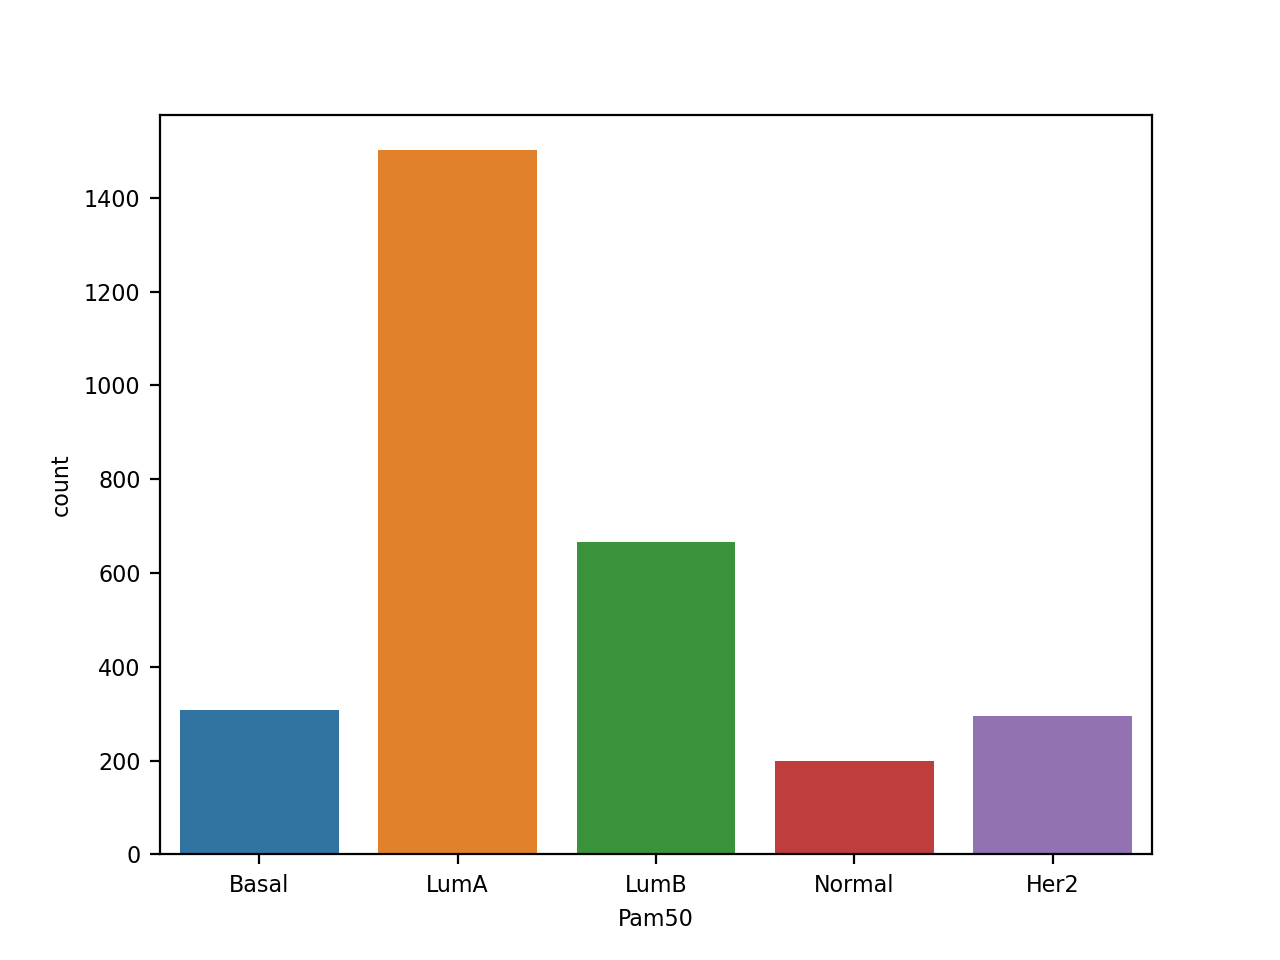

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [922]:
sns.countplot(x='Pam50', data=swpheno, order = ['Basal', 'LumA', 'LumB', 'Normal', 'Her2'])

<IPython.core.display.Javascript object>


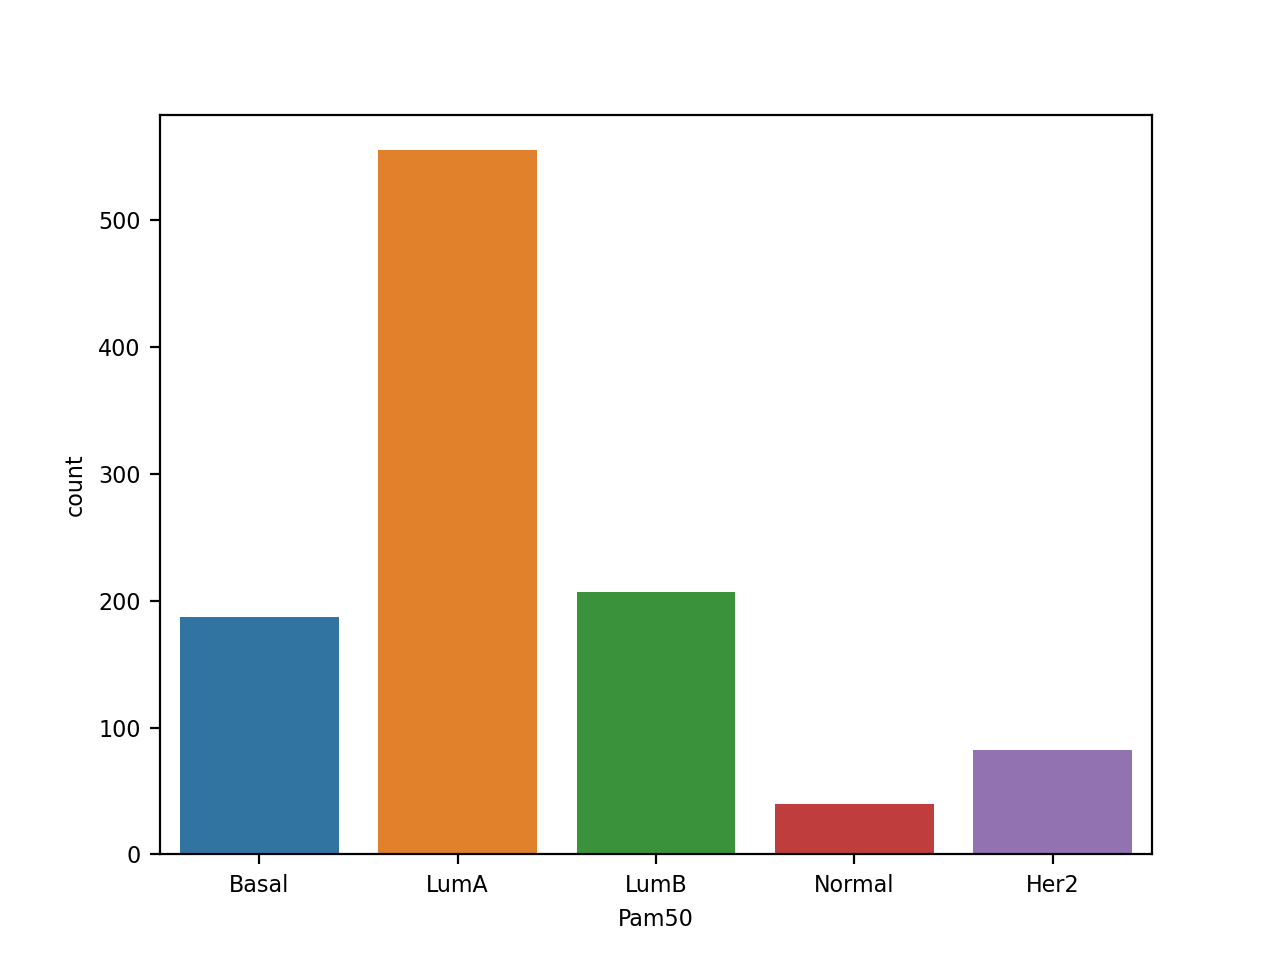

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [923]:
sns.countplot(x='Pam50', data=tcgap, order = ['Basal', 'LumA', 'LumB', 'Normal', 'Her2'])

In [924]:
pam50 = swpheno['Pam50']
histcl = swpheno_ihc['histcl']

Mapping class labels to indexes for the SCAN-B cohort

In [925]:
class2idx = {
    'LumA':0,
    'LumB':1,
    'Her2':2,
    'Basal':3,
    'Normal':4
}
idx2class = {v: k for k, v in class2idx.items()}

In [926]:
import collections
print(collections.Counter(pam50))

Counter({'LumA': 1501, 'LumB': 666, 'Basal': 308, 'Her2': 295, 'Normal': 199})


In [927]:
print(collections.Counter(histcl))

Counter({'LumB': 1395, 'LumA': 1120, 'Basal': 226, 'Her2': 81})


In [928]:
# replacing labels
pam50.replace(class2idx, inplace=True)
histcl.replace(class2idx, inplace=True)

In [929]:
# checking the counts again
print(collections.Counter(pam50))
print(collections.Counter(histcl))

Counter({0: 1501, 1: 666, 3: 308, 2: 295, 4: 199})
Counter({1: 1395, 0: 1120, 3: 226, 2: 81})


Mapping class labels to indexes for the TCGA cohort

In [930]:
pam50t = tcgap['Pam50']
histclt = tcgap_ihc['histcl']

In [931]:
print(collections.Counter(pam50t))
print(collections.Counter(histclt))

Counter({'LumA': 555, 'LumB': 207, 'Basal': 187, 'Her2': 82, 'Normal': 40})
Counter({'LumA': 361, 'Basal': 114, 'Her2': 37, 'LumB': 22})


In [932]:
pam50t.replace(class2idx, inplace=True)
histclt.replace(class2idx, inplace=True)

In [933]:
print(collections.Counter(pam50t))
print(collections.Counter(histclt))

Counter({0: 555, 1: 207, 3: 187, 2: 82, 4: 40})
Counter({0: 361, 3: 114, 2: 37, 1: 22})


In [934]:
common_feats = list(set.intersection(set(swdata.columns), set(tcga.columns)))
len(common_feats)

15449

#### 1.4 Feature selection

Remove zero variance features

In [935]:
from sklearn.feature_selection import VarianceThreshold
zv_sel_swdata = VarianceThreshold(0)
zv_sel_swdata_ihc = VarianceThreshold(0)
zv_sel_tcga = VarianceThreshold(0)
zv_sel_tcga_ihc = VarianceThreshold(0)

In [936]:
print(swdata.shape)
print(swdata_ihc.shape)

(2969, 15953)
(2822, 15953)


In [937]:
zv_sel_swdata.fit_transform(swdata)
zv_sel_swdata_ihc.fit_transform(swdata_ihc)
zv_sel_tcga.fit_transform(tcga)
zv_sel_tcga_ihc.fit_transform(tcga_ihc)

array([[1.36537189, 0.        , 4.75100404, ..., 0.86453296, 3.64575675,
        0.        ],
       [4.19541757, 0.        , 4.45598844, ..., 1.05905626, 2.95185304,
        0.        ],
       [3.16096187, 0.        , 5.2150499 , ..., 0.61928561, 1.88128059,
        0.        ],
       ...,
       [3.08005001, 3.75687237, 4.41980912, ..., 0.        , 2.75224436,
        0.        ],
       [3.92216876, 0.        , 4.67912549, ..., 1.16821607, 2.30952553,
        0.        ],
       [3.10393239, 0.        , 5.04240339, ..., 0.74130585, 4.28980075,
        0.        ]])

In [938]:
print(np.sum(zv_sel_swdata.get_support()))
print(np.sum(zv_sel_swdata_ihc.get_support()))
print(np.sum(zv_sel_tcga.get_support()))
print(np.sum(zv_sel_tcga_ihc.get_support()))

15953
15946
16654
16479


In [939]:
swdata_ihc = swdata_ihc[swdata_ihc.columns[zv_sel_swdata_ihc.get_support()]]
tcga_ihc = tcga_ihc[tcga_ihc.columns[zv_sel_tcga_ihc.get_support()]]

In [940]:
print(swdata_ihc.shape)
print(tcga_ihc.shape)

(2822, 15946)
(534, 16479)


Apply univariate feature selection process

In [941]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
fs_swc_pam50 = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 150))
fs_swc_histcl = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 150))
fs_tcga_pam50 = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 150))
fs_tcga_histcl = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 150))

In [942]:
fs_swc_pam50.fit_transform(swdata, pam50)
fs_swc_histcl.fit_transform(swdata_ihc, histcl)
fs_tcga_pam50.fit_transform(tcga, pam50t)
fs_tcga_histcl.fit_transform(tcga_ihc, histclt)

array([[ 1.89625671,  0.20281618,  0.37421671, ..., -0.41989038,
         0.22098076, -0.7903967 ],
       [-0.50937314, -0.20463856, -0.06714952, ..., -0.41989038,
         0.62192008, -0.08185302],
       [ 1.97639586, -0.44153612, -0.72707161, ..., -0.41989038,
         0.7813433 , -0.64351091],
       ...,
       [-0.2399923 , -1.10418521, -0.23514164, ..., -0.41989038,
         0.89474727, -0.39619779],
       [-0.16878408, -0.05404262,  0.56940305, ..., -0.41989038,
         0.32386221, -0.40057291],
       [ 0.57876475,  1.98365157, -0.23732138, ..., -0.41989038,
         0.69284363, -0.56784952]])

In [943]:
fn_swc_pam50 = swdata.columns[fs_swc_pam50['selectkbest'].get_support()]
fn_swc_histcl = swdata_ihc.columns[fs_swc_histcl['selectkbest'].get_support()]
fn_tcga_pam50 = tcga.columns[fs_tcga_pam50['selectkbest'].get_support()]
fn_tcga_histcl = tcga_ihc.columns[fs_tcga_histcl['selectkbest'].get_support()]

In [944]:
fn_swc_pam50[:50]

Index(['ABAT', 'ACADSB', 'AFF3', 'AGR2', 'AGR3', 'ANLN', 'ANXA9', 'AR', 'ARSG',
       'ART3', 'ASPM', 'AURKA', 'AURKB', 'B3GNT5', 'BBS1', 'BCAM', 'BCL11A',
       'BCL2', 'BIRC5', 'BLM', 'BUB1', 'BUB1B', 'C5AR2', 'C9orf116', 'CA12',
       'CBX2', 'CCDC170', 'CCNA2', 'CCNB2', 'CCNE1', 'CDC20', 'CDC25A',
       'CDC45', 'CDCA2', 'CDCA3', 'CDCA5', 'CDCA7', 'CDCA8', 'CDT1', 'CELSR1',
       'CENPA', 'CENPN', 'CENPW', 'CEP55', 'CKAP2L', 'CMBL', 'CT83', 'DEGS2',
       'DEPDC1', 'DEPDC1B'],
      dtype='object')

In [945]:
fn_swc_histcl[:50]

Index(['AGR2', 'AGR3', 'ANLN', 'APOBEC3B', 'AR', 'ARHGAP11A', 'ASF1B', 'ASPM',
       'AURKA', 'AURKB', 'BIRC5', 'BUB1', 'BUB1B', 'C5AR2', 'CA12', 'CCNA2',
       'CCNB1', 'CCNB2', 'CCNE1', 'CDC20', 'CDC25A', 'CDC45', 'CDC6', 'CDCA2',
       'CDCA3', 'CDCA5', 'CDCA7', 'CDCA8', 'CDK1', 'CDKN3', 'CDT1', 'CENPA',
       'CENPF', 'CENPM', 'CENPN', 'CENPO', 'CENPU', 'CENPW', 'CEP55', 'CHEK1',
       'CKAP2L', 'CMBL', 'DEGS2', 'DEPDC1', 'DEPDC1B', 'DLGAP5', 'DNALI1',
       'DONSON', 'DTL', 'E2F1'],
      dtype='object')

In [153]:
fn_tcga_pam50[:50]

Index(['IFRD1', 'DEPDC1', 'RABEP1', 'FAM214A', 'FOXC1', 'MCM10', 'ROPN1',
       'YBX1', 'PRR11', 'SIDT1', 'CLCN4', 'IGF2BP2', 'CA12', 'GTSE1', 'NDC80',
       'ORC1', 'RAD54L', 'AURKA', 'TPX2', 'BIRC5', 'ORC6', 'ESR1', 'SLC7A8',
       'CDC45', 'GABRP', 'MICALL1', 'FERMT1', 'FAM83D', 'VGLL1', 'SYTL4',
       'SFRP1', 'CCNE1', 'AGR2', 'GATA3', 'TBC1D9', 'WFS1', 'NCAPG', 'FOXM1',
       'CDCA3', 'TTK', 'NUDT12', 'ERGIC1', 'ROPN1B', 'CENPA', 'REEP6', 'MLPH',
       'RALGPS2', 'KCNQ4', 'CDC20', 'MYB'],
      dtype='object')

By using "minimum Redundancy - Maximum Relevance"

In [946]:
print(collections.Counter(histcl))
print(collections.Counter(pam50))

Counter({1: 1395, 0: 1120, 3: 226, 2: 81})
Counter({0: 1501, 1: 666, 3: 308, 2: 295, 4: 199})


In [258]:
X_swc_pam50 = StandardScaler().fit_transform(swdata)
X_swc_ihc = StandardScaler().fit_transform(swdata_ihc)
# re-transform to Pandas
X_swc_pam50 = pd.DataFrame(X_swc_pam50, index=swdata.index, columns=swdata.columns)
X_swc_ihc = pd.DataFrame(X_swc_ihc, index=swdata_ihc.index, columns=swdata_ihc.columns)

# select top 10 features using mRMR
from mrmr import mrmr_classif
mrmr_swc_pam50 = mrmr_classif(X=X_swc_pam50, y=pam50, K=500)
mrmr_swc_histcl = mrmr_classif(X=X_swc_ihc, y=histcl, K=500)

100%|█████████████████████████████████████████| 500/500 [19:55<00:00,  2.39s/it]


In [259]:
print(len((mrmr_swc_pam50)))
print(len((mrmr_swc_histcl)))
print(list(set.intersection(set(mrmr_swc_pam50), set(mrmr_swc_histcl))))
print(len(list(set.intersection(set(mrmr_swc_pam50), set(mrmr_swc_histcl)))))

500
500
['ROPN1', 'ABAT', 'SCN4B', 'PLK4', 'AFF3', 'CRY2', 'MTFR2', 'STC2', 'CDT1', 'CDC45', 'WDR19', 'C9orf116', 'ORMDL3', 'SPOPL', 'ZCCHC24', 'FOXA1', 'TTLL4', 'PGAP3', 'CDK1', 'GATA3', 'BUB1B', 'PSMD3', 'CENPA', 'ART3', 'DLGAP5', 'PRR15', 'RASEF', 'CDCA5', 'SPAG5', 'SLC22A5', 'IQGAP3', 'NEK11', 'FOXC1', 'CPLX1', 'DONSON', 'NUSAP1', 'ACADSB', 'HJURP', 'CDC25A', 'UBXN10', 'OGN', 'CCNB1', 'LPIN1', 'CHST3', 'E2F2', 'SIDT1', 'LMNB1', 'AGR3', 'RAD51AP1', 'SHCBP1', 'KIFC1', 'STIL', 'MED1', 'UBE2S', 'ATP8B1', 'BLM', 'ESPL1', 'SOX10', 'KIF2C', 'VAV3', 'GAMT', 'PNMT', 'NCAPG', 'MAPT', 'PPP1R14C', 'DNAL1', 'FAM47E', 'BIRC5', 'INPP4B', 'KIF15', 'RARA', 'LEMD1', 'CENPI', 'MAST4', 'SUSD3', 'KLK6', 'PSAT1', 'CDC25C', 'KIF20A', 'CDK12', 'SPDEF', 'ZNF695', 'CXXC5', 'CCNA2', 'MICALL1', 'SCRG1', 'P4HTM', 'FERMT1', 'FBP1', 'DACH1', 'ERBB2', 'SH3D19', 'CT83', 'CTSV', 'AURKA', 'NDC80', 'GREB1', 'CMBL', 'CDCA3', 'TTC39A', 'FZD9', 'DEPDC1', 'LTBP4', 'RABEP1', 'TUBA1C', 'CPEB2', 'STMN1', 'CDCA2', 'KPNA2', '

Test simple classifiers

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# Create classifiers (Pam50)
gnb_swc_pam50 = GaussianNB()
lr_swc_pam50 = LogisticRegression(penalty = 'none', random_state=0, max_iter=10000)
rlr_swc_pam50 = LogisticRegression(penalty = 'l2', random_state=0, max_iter=10000)
rfc_swc_pam50 = RandomForestClassifier(n_estimators=500, max_features= 2, 
                                       random_state=0, class_weight = "balanced")
# Create classifiers (IHC)
gnb_swc_ihc = GaussianNB()
lr_swc_ihc = LogisticRegression(penalty = 'none', random_state=0, max_iter=10000)
rlr_swc_ihc = LogisticRegression(penalty = 'l2', random_state=0, max_iter=10000)
rfc_swc_ihc = RandomForestClassifier(n_estimators=500, max_features= 2, 
                                       random_state=0, class_weight = "balanced")

# prepare the training and tes sets
#X_swc_pam50 = StandardScaler().fit_transform(swdata[fn_swc_pam50])
#X_swc_ihc = StandardScaler().fit_transform(swdata_ihc[fn_swc_histcl])
X_swc_pam50 = StandardScaler().fit_transform(swdata[mrmr_swc_pam50[:5]])
X_swc_ihc = StandardScaler().fit_transform(swdata_ihc[mrmr_swc_histcl[:5]])
#X_swc_pam50 = StandardScaler().fit_transform(swdata[pam50sig])
#X_swc_ihc = StandardScaler().fit_transform(swdata_ihc[pam50sig])
print(X_swc_pam50.shape)
print(X_swc_ihc.shape)

# training and validation (Pam50)
print(cross_val_score(gnb_swc_pam50, X_swc_pam50, pam50, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(lr_swc_pam50, X_swc_pam50, pam50, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rlr_swc_pam50, X_swc_pam50, pam50, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rfc_swc_pam50, X_swc_pam50, pam50, cv=5, scoring='balanced_accuracy'))
print("----------------------------------------------")
# training and validation (IHC)
print(cross_val_score(gnb_swc_ihc, X_swc_ihc, histcl, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(lr_swc_ihc, X_swc_ihc, histcl, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rlr_swc_ihc, X_swc_ihc, histcl, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rfc_swc_ihc, X_swc_ihc, histcl, cv=5, scoring='balanced_accuracy'))

(2969, 5)
(2945, 5)
[0.60791263 0.64202181 0.63043522 0.59430228 0.62432405]
[0.5854095  0.62533138 0.64750552 0.61857435 0.64875625]
[0.58457241 0.62599805 0.64600176 0.6148022  0.64793038]
[0.58571711 0.62678069 0.61514945 0.63305747 0.6675231 ]
----------------------------------------------
[0.9473459  0.96466296 0.94574849 0.94765299 0.96428203]
[0.94783387 0.98008694 0.95614557 0.95612077 0.96920944]
[0.92949068 0.95983709 0.96621502 0.94780441 0.96006257]
[0.97141678 0.98678336 0.99095395 0.97276916 0.98980802]


In [186]:
# Create classifiers (Pam50)
gnb_tcga_pam50 = GaussianNB()
lr_tcga_pam50 = LogisticRegression(penalty = 'none', random_state=0, max_iter=10000)
rlr_tcga_pam50 = LogisticRegression(penalty = 'l2', random_state=0, max_iter=10000)
rfc_tcga_pam50 = RandomForestClassifier(n_estimators=500, max_features= 4, 
                                       random_state=0, class_weight = "balanced")

# prepare the training and tes sets
#X_swc_ihc = StandardScaler().fit_transform(swdata_ihc[fn_swc_histcl])
X_tcga_pam50 = StandardScaler().fit_transform(tcga[pam50sig])
print(X_tcga_pam50.shape)

# training and validation (Pam50)
print(cross_val_score(gnb_tcga_pam50, X_tcga_pam50, pam50t, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(lr_tcga_pam50, X_tcga_pam50, pam50t, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rlr_tcga_pam50, X_tcga_pam50, pam50t, cv=5, scoring='balanced_accuracy'))
print(cross_val_score(rfc_tcga_pam50, X_tcga_pam50, pam50t, cv=5, scoring='balanced_accuracy'))

(1071, 47)
[0.85282685 0.90505577 0.88516731 0.8863417  0.8334805 ]
[0.78602422 0.89562023 0.92673745 0.85625804 0.93761203]
[0.80793013 0.89118713 0.93265766 0.91642535 0.91929188]
[0.74455976 0.80650277 0.83988095 0.74145753 0.736615  ]


Apply forward feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def rfSFS(X, y, rs = 0):
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score = True,
                                class_weight='balanced', max_depth=5, random_state=rs)
    sfs = SFS(rf, 
              k_features=50, 
              forward=True, 
              floating=False, 
              verbose=2,
              scoring='accuracy',
              cv=0)

    sfs = sfs.fit(X, y)
    return(sfs)

By using *featurewiz*

In [ ]:
from featurewiz import FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', 
                      nrows=None, verbose=2) # dask_xgboost_flag=False, 
X_selected = features.fit_transform(tcga, pam50)
features.features

#out1, out2 = featurewiz(dataname, target, corr_limit=0.7, verbose=0,   
#                        sep=",", header=0, test_data="", feature_engg="", category_encoders="")

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (2969, 16655)
    Caution: We will try to reduce the memory usage of dataframe from 377.26 MB
        memory usage after optimization is: 94.31 MB
        decreased by 75.0%
     Loaded. Shape = (2969, 16655)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    16654 Predictors cl

Select common features betwee SCAN-B and TCGA

In [947]:
common_feats = list(set.intersection(set(swdata.columns), set(tcga.columns)))
len(common_feats)

15449

In [948]:
print(len(list(set.intersection(set.intersection(set(fn_swc_pam50), set(fn_swc_histcl)),set(fn_tcga_pam50)))))

61


#### Define the datasets

In [949]:
biom_list_pam50 = list(set.intersection(set(common_feats), set(pam50sig)))
print(len(biom_list_pam50))

47


In [1017]:
X_data = swdata[common_feats]
X_data.shape

(2969, 15449)

In [968]:
X_tcga = tcga[common_feats]
X_tcga.shape

(1071, 15449)

In [1018]:
X_data = swdata.loc[pam50[pam50 != 4].index,common_feats]
X_data.index = range(len(X_data.index))
pam50n = pam50[pam50 != 4]
pam50n.index = range(len(X_data.index))
print(X_data.shape)
print(pam50n.shape)

(2770, 15449)
(2770,)


In [969]:
X_tcga = tcga.loc[pam50t[pam50t != 4].index, common_feats]
X_tcga.index = range(len(X_tcga.index))
pam50nt = pam50t[pam50t != 4]
pam50nt.index = range(len(X_tcga.index))
print(X_tcga.shape)
print(pam50nt.shape)

(1031, 15449)
(1031,)


In [952]:
swdata_ihc = swdata[swpheno['histcl'] != 'NotClear']
swpheno_ihc = swpheno[swpheno['histcl'] != 'NotClear']

In [966]:
X_ihc = swdata_ihc[list(set.intersection(set(swdata_ihc.columns),set.intersection(set(common_feats), set(tcga_ihc.columns))))]
X_ihc.index = list(range(X_ihc.shape[0]))
histcl.index = list(range(X_ihc.shape[0]))
X_ihc.shape

(2822, 15374)

In [1196]:
swpheno_ihc.index = list(range(swpheno_ihc.shape[0]))

In [967]:
Xt_ihc = tcga_ihc[list(set.intersection(set(swdata_ihc.columns),set.intersection(set(common_feats), set(tcga_ihc.columns))))]
Xt_ihc.shape

(534, 15374)

Merge the two datasets

In [1088]:
X_tot = pd.concat([X_ihc, Xt_ihc])
X_tot.index = list(range(X_tot.shape[0]))
print(X_tot.shape)

(3356, 15374)


Merge the two class vectors

In [1089]:
print(len(histcl))
print(len(histclt))

2822
534


In [1090]:
print(histcl)
print(histclt)

0       3
1       0
2       1
3       0
4       2
       ..
2817    1
2818    2
2819    1
2820    1
2821    1
Name: histcl, Length: 2822, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
529    0
530    0
531    0
532    0
533    0
Name: histcl, Length: 534, dtype: int64


In [1091]:
Y_tot = pd.concat([histcl, histclt]) 
print(Y_tot.shape[0])
#Y_tot.reset_index(inplace = True, drop = True)
Y_tot.index = list(range(Y_tot.shape[0]))
print(len(Y_tot))
print(Y_tot)
print(collections.Counter(Y_tot))

3356
3356
0       3
1       0
2       1
3       0
4       2
       ..
3351    0
3352    0
3353    0
3354    0
3355    0
Name: histcl, Length: 3356, dtype: int64
Counter({0: 1481, 1: 1417, 3: 340, 2: 118})


### Now we use the river framework

Load modules from **sklearn**

In [1252]:
import sklearn as sk
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Load modules from **river**

In [1253]:
import random
from river import stream
from river import linear_model
from river import metrics
from river import multiclass
from river import preprocessing
from river import optim
from river.drift import ADWIN
from river.drift import PageHinkley
from river import feature_selection
from river import tree
from river.multiclass import OneVsRestClassifier
from river.utils import dict2numpy
from river import ensemble
from river import neighbors
from river import naive_bayes
import warnings
warnings.filterwarnings('ignore')

Define utility functions

In [976]:
dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

Check the scaling process

In [977]:
len(biom_list_pam50)

47

In [978]:
scaler = preprocessing.StandardScaler()

C = 0
X_scal = np.zeros(shape=(X_tot.shape[0],len(pam50sig)))
for xi, yi in stream.iter_pandas(X_tot):
    xi = dict_filter(xi, pam50sig)
    xi_scaled = scaler.learn_one(xi).transform_one(xi)
    X_scal[C] = dict2numpy(xi_scaled)
    C = C + 1

In [979]:
provola = pd.DataFrame(X_scal)
provola = provola.set_axis(biom_list_pam50, axis=1)
provola.head()

CDC20      MELK      BAG1   SLC39A6     MYBL2      ANLN     CXXC5  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.000000 -1.000000  1.000000  1.000000 -1.000000  1.000000 -1.000000   
2 -0.343126  1.048983 -0.250263  0.328440  1.140209 -0.902187  1.392565   
3 -0.729439 -1.547975  0.188017  0.667416 -1.374991 -0.933232 -1.328254   
4 -0.244399 -0.354176 -0.213776 -1.003146 -0.312689  1.140637 -0.355747   

       TYMS     KRT17      BCL2  ...     KIF2C     SFRP1    GPR160       MYC  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1 -1.000000 -1.000000 -1.000000  ...  1.000000 -1.000000 -1.000000 -1.000000   
2  0.049611 -0.309551  0.670914  ...  0.102293  0.792914  1.158658  1.278067   
3 -1.101567 -1.706028 -1.629760  ... -0.929873 -0.268551 -1.490106 -1.539371   
4 -0.476844 -0.597456 -1.020123  ... -0.767948 -0.973509 -0.139450  0.044438   

      MMP11     FGFR4    ACTR3B       MIA     CENPF      MDM2  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -1.000000  1.000000  0.000000 -1.000000 -1.000000  1.000000  
2 -1.211141  0.043130  1.414214  1.243135  1.143153  1.334442  
3  0.828701 -0.632537 -0.577350 -1.561303 -1.579428 -1.601896  
4 -0.832303 -0.280429  1.479061 -0.782015 -0.088694  0.693892  

[5 rows x 47 columns]

(3356, 47)


<IPython.core.display.Javascript object>


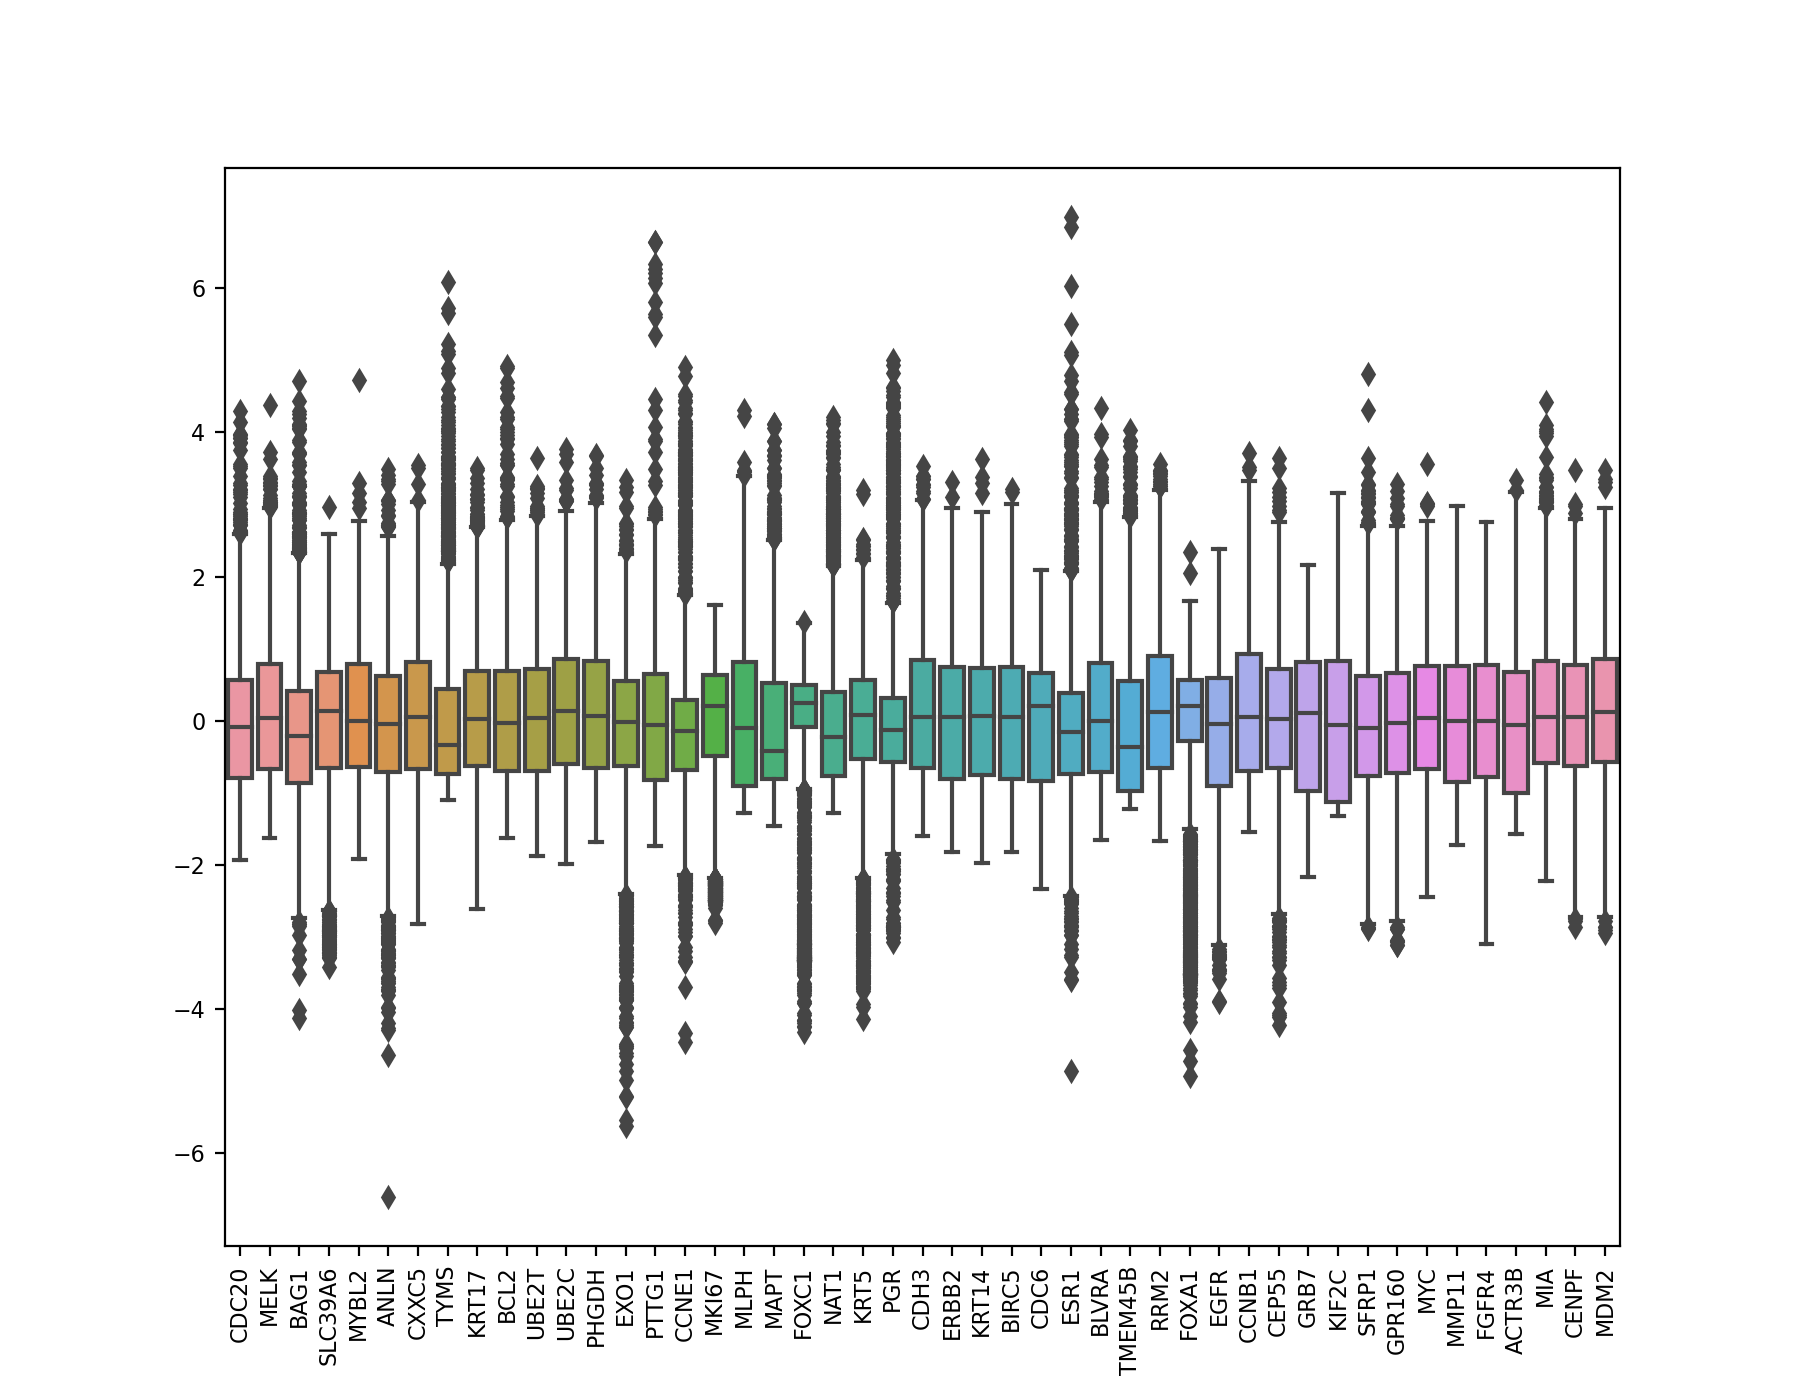

<AxesSubplot:>

In [980]:
print(provola.shape)
from matplotlib import pyplot
fig_dims = (9, 7)
fig, ax = pyplot.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=90)
sns.boxplot(data = provola)

#### Implementing the DFF-ES strategy

In [624]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

np.random.seed(123)

# based on mutual information (univariate/filter method)
mi_selector = SelectKBest(mutual_info_classif, k = 100)

# set the selector
selector = mi_selector

# Make a pipeline for feature selection
ufeat_selection = make_pipeline(StandardScaler(), selector)

In [981]:
def createRiverModel(typem):
    
    if typem == "hat":
        new_model = preprocessing.StandardScaler() 
        new_model |= tree.HoeffdingAdaptiveTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                         leaf_prediction='nb', nb_threshold=10, seed = 0)
    if typem == "eft":    
        new_model = preprocessing.StandardScaler() 
        new_model |= tree.ExtremelyFastDecisionTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                              leaf_prediction='nb', nb_threshold=10,
                                                              min_samples_reevaluate=100)
    if typem == "awbc":    
        new_model = ensemble.ADWINBaggingClassifier(model=(preprocessing.StandardScaler() | 
                                                           tree.HoeffdingTreeClassifier(grace_period=50, 
                                                                                        split_confidence=1e-5,
                                                                                        leaf_prediction='nb', 
                                                                                        nb_threshold=10)),
                                                    n_models=10, seed=0)
    if typem == "arf":
        new_model = preprocessing.StandardScaler() 
        new_model |= ensemble.AdaptiveRandomForestClassifier(n_models=10, seed=0)
    
    if typem == "abc":
        new_model = preprocessing.StandardScaler() 
        new_model |= ensemble.AdaBoostClassifier(model=(tree.HoeffdingTreeClassifier(split_criterion='gini',
                                                                              split_confidence=1e-5,
                                                                              grace_period=2000)),
                                                        n_models=5, seed=0)
    if typem == "nb":
        new_model = preprocessing.StandardScaler() 
        new_model |= naive_bayes.GaussianNB()
        
    return(new_model)

In [1100]:
def testRiver(known_biomarkers, X, Y, bufferlen = 200, last_k = 2, typem = "hat", seed=0): 
    
    random.seed(seed)
    
    # Feature sets
    add_value = []
    com_feats = []
    list_bio = []
    currents = []
    
    # statistics
    y_true = []
    y_pred = []
    yk_pred = []
    ye_pred = []
    all_kb = []
    all_val = []
    all_ens = []
    feat_drifts = []
    acc_fdd = []
    
    C = 0 # count patients
    buffer = [] # buffer of collected patient-based gene expression profiles
    cnt_biomarkers = known_biomarkers
    list_bio.append(known_biomarkers)
    
    models = []
    models.append(createRiverModel(typem))
    
    # define the metric to be evaluated
    list_metrics = []
    list_metrics.append(metrics.BalancedAccuracy())
    ens_metrics = metrics.BalancedAccuracy()
    
    buffer = [] # buffer of collected patient-based gene expression profiles
    feat_drifts = []

    # start the learning process
    for xi, yi in stream.iter_pandas(X, Y): #data

        buffer.append(C)
        
        if len(buffer) == bufferlen: ################### Starting the FDD

            # define the training dataset
            fs_dat = X.iloc[buffer,:]
            fs_y = Y[buffer]
            
            # repeat feature selection
            #fs_dat_sc = StandardScaler().fit_transform(fs_dat)
            #fs_dat = pd.DataFrame(fs_dat_sc, index=fs_dat.index, columns=X.columns) # re-transform to Pandas
            new_biomarkers = mrmr_classif(X=fs_dat, y=fs_y, K=10)

            # check for feature drift detection
            intfeat = list(set.intersection(set(cnt_biomarkers), set(new_biomarkers)))
            test_feat_drift = len(intfeat) == len(new_biomarkers)
                
            # collect statistics
            add_value.append(list(set(new_biomarkers).difference(set(cnt_biomarkers))))
            com_feats.append(intfeat)

            #test_feat_drift = False
            if test_feat_drift == False :
                list_bio.append(new_biomarkers)
                print(f"Feature drift detected at index {C}, intersection: {len(intfeat)}")
                print(f"  - added value:")
                print(list(set(new_biomarkers).difference(set(cnt_biomarkers))))
                print(f"  - common features:")
                print(intfeat)
                print(f"  - tot features:")
                print(len(cnt_biomarkers))
                # update the current biomarker
                cnt_biomarkers = list(set.union(set(cnt_biomarkers), set(new_biomarkers)))
                currents.append(cnt_biomarkers)
                #
                new_model = createRiverModel(typem)
                new_metric = metrics.BalancedAccuracy()
                val_nm = 0
                #
                for xsi, ysi in stream.iter_pandas(fs_dat[new_biomarkers], fs_y): #data
                    ysi_pred = dict2numpy(new_model.predict_proba_one(xsi))
                    new_model.learn_one(xsi, ysi)
                    if len(ysi_pred) == 0:
                        continue
                    val_nm = new_metric.update(ysi, np.argmax(ysi_pred))
                print(val_nm)
                acc_fdd.append(np.round(val_nm.get(),3))
                models.append(new_model)
                list_metrics.append(new_metric)

            # reset the buffer
            buffer = []
        
        vals = []
        preds = []
        val_ens = 0
        avgprob = -1
        for i in range(len(models)):
            
            # select the features corresponding to the current biomarker
            xi_sel = dict_filter(xi, list_bio[i])

            # test the current model on the new "unobserved" sample
            yi_pred = dict2numpy(models[i].predict_proba_one(xi_sel))
            preds.append(yi_pred)
        
            # train the online model with the new sample
            models[i].learn_one(xi_sel, yi)
        
            if len(yi_pred) == 0:
                continue

            list_metrics[i] = list_metrics[i].update(yi, np.argmax(yi_pred))
            vals.append(np.round_(list_metrics[i].get(), 3))
            
        # store all predictions    
        y_true.append(yi) 
        
        if len(preds[0]) > 0:
            y_pred.append([np.argmax(p) for p in preds])
            yk_pred.append(np.argmax(preds[0]))
            all_kb.append(list_metrics[0].get())
            all_val.append(vals)
        else:
            y_pred.append(-1)
            yk_pred.append(-1)
            all_kb.append(-1)
            all_val.append(-1)
            
        if len(vals) == 2:
            avgprob = np.average(np.asarray(np.round_(preds, 3)), axis = 0)
        elif len(vals) > 2:
            if len(vals) > ((last_k) + 1):
                vals2 = vals[1:len(vals)]
                best_k = sorted(range(len(vals2)), key = lambda sub: vals2[sub])[-last_k:]
                #if C%50 == 0:
                #    print(vals2)
                #    print(best_k)
                #    print(len(preds))
                preds_l = [preds[0]]
                [preds_l.append(preds[c+1]) for c in best_k]
                avgprob = np.add.reduce(preds_l) / len(preds_l)
            else:
                #preds = preds[0] + preds[1:len(preds)] #preds = [preds[0], *preds2] 
                avgprob = np.add.reduce(preds) / len(preds)
            # avgprob = np.average(np.asarray(np.round_(preds,3)), axis = 0)
            
            #preds2.append(preds[0])
            #preds = preds2
            
        if not isinstance(avgprob, int) :
            ye_pred.append(np.argmax(avgprob))
            ens_metrics = ens_metrics.update(yi, np.argmax(avgprob))
            val_ens = np.round_(ens_metrics.get(), 3) 
            all_ens.append(val_ens)
        else: # ensemble still not possible
            ye_pred.append(-1)
            all_ens.append(-1)
        
        if C%50 == 0:
            print((tuple(vals),val_ens))  
                 
        C = C + 1
     
    print("Checking")
    print("- predictions:")
    print(len(y_true))
    print(len(yk_pred))
    print(len(ye_pred))
    print(len(acc_fdd))
    print("- metrics:")
    print(len(all_kb))
    print(len(all_ens))
    print(" - markers")
    print(len(currents))
    print(len(add_value))
    print(len(list_bio))
    print(len(com_feats))
    
    return({'biosets': currents, 
            'nbiosets': list_bio,
            'abiosets': add_value,
            'cbiosets': com_feats,            
            'models': models,
            'amodels': acc_fdd,
            'y_true': y_true, 
            'yk_pred': yk_pred, 
            'ye_pred': ye_pred,
            'up_kbmet': all_kb, 
            'al_kbmet': all_val, 
            'up_enmet': all_ens}) 
            
#testRiver(biom_list_pam50, X_ihc, histcl, bufferlen = 500, last_k = 1, seed=0) 
#provola = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_ihc, histcl, bufferlen = 500, last_k = 2, typem = "hat", seed=0) 

In [1027]:
provola['biosets'][len(provola['biosets'])-1]

['ROPN1',
 'RNFT1',
 'CLDN11',
 'TROAP',
 'FOXA1',
 'TIMM10',
 'CLCA2',
 'GATA3',
 'ONECUT2',
 'MLPH',
 'MKI67',
 'H6PD',
 'ENPP3',
 'VGLL1',
 'CDKN1C',
 'FOXC1',
 'TIMELESS',
 'IGF2BP2',
 'ST6GALNAC1',
 'LCORL',
 'TBC1D9',
 'G6PD',
 'ERBB2',
 'SPDEF',
 'DLL1',
 'ESR1',
 'TFPT',
 'NDC80']

In [628]:
#provola
#r_ht_pam50_b500_l2 = runFDS(biom_list_pam50, model1, ufeat_selection, X_data, pam50, bufferlen = 500, last_k = 2, seed=0)

In [648]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Run tests with different online algorithms

In [1104]:
import itertools
from itertools import permutations

buffer_vals = [200, 500]
k_vals = [1, 2, 3]

res_mod_n1 = {}
res_mod_n2 = {}
res_mod_n3 = {}
res_mod_n4 = {}
res_mod_n5 = {}
res_mod_n6 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    print("Hoeffding Adaptive")
    res_mod_n1[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "hat", seed=0) 
    print("ExtremelyFastDecisionTree")
    res_mod_n2[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "eft", seed=0) 
    print("ADWINBaggingClassifier")
    res_mod_n3[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "awbc", seed=0) 
    print("AdaptiveRandomForestClassifier")
    res_mod_n4[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "arf", seed=0) 
    print("AdaBoostClassifier")
    res_mod_n5[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "abc", seed=0) 
    print("GaussianNB")
    res_mod_n6[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "nb", seed=0) 

200 1
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.45s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.20s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.757)
((0.635, 0.668, 0.581), 0.737)
((0.654, 0.644, 0.574), 0.719)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.39s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.715)
((0.674, 0.634, 0.582, 0.758), 0.747)
((0.689, 0.631, 0.588, 0.775), 0.758)
((0.719, 0.633, 0.592, 0.803), 0.79)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.16s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.803)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.815)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.825)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.833)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.99s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.841)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.842)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.852)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.856)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.855)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.86)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.862)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.865)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.87)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.874)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.878)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.883)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.886)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.887)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.892)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.895)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.897)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.897)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.899)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.901)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.899)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.899)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.898)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.891)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.889)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.891)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.896)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.896)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.898)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.901)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.896)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.891)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.884)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.875)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.867)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.853)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.837)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.809)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.802)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.802)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.805)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.18%
((0.726, 0.62), 0.5)
((0.724, 0.618), 0.649)
((0.773, 0.627), 0.817)
((0.787, 0.645), 0.842)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 63.42%
((0.761, 0.625, 0.65), 0.796)
((0.75, 0.603, 0.671), 0.807)
((0.74, 0.584, 0.604), 0.698)
((0.727, 0.548, 0.608), 0.701)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 48.85%
((0.727, 0.513, 0.609, 0.496), 0.687)
((0.71, 0.483, 0.613, 0.518), 0.681)
((0.711, 0.469, 0.619, 0.514), 0.684)
((0.704, 0.452, 0.606, 0.559), 0.663)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 37.34%
((0.715, 0.452, 0.619, 0.581, 0.371), 0.667)
((0.727, 0.459, 0.619, 0.601, 0.424), 0.678)
((0.723, 0.456, 0.62, 0.615, 0.399), 0.675)
((0.732, 0.455, 0.615, 0.62, 0.406), 0.671)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.65%
((0.737, 0.448, 0.612, 0.63, 0.401, 0.54), 0.685)
((0.737, 0.447, 0.588, 0.625, 0.383, 0.555), 0.676)
((0.754, 0.434, 0.579, 0.627, 0.359, 0.468), 0.698)
((0.752, 0.434, 0.575, 0.614, 0.383, 0.461), 0.687)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 54.36%
((0.754, 0.434, 0.573, 0.604, 0.398, 0.477, 0.542), 0.677)
((0.763, 0.44, 0.566, 0.605, 0.403, 0.454, 0.54), 0.688)
((0.773, 0.437, 0.571, 0.589, 0.448, 0.444, 0.54), 0.672)
((0.777, 0.448, 0.566, 0.593, 0.472, 0.455, 0.566), 0.679)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 68.42%
((0.782, 0.453, 0.561, 0.587, 0.504, 0.454, 0.604, 0.665), 0.677)
((0.787, 0.46, 0.558, 0.592, 0.526, 0.463, 0.593, 0.625), 0.674)
((0.793, 0.459, 0.563, 0.609, 0.55, 0.465, 0.598, 0.575), 0.682)
((0.797, 0.462, 0.563, 0.624, 0.571, 0.463, 0.61, 0.504), 0.69)


100%|███████████████████████████████████████████| 10/10 [10:08<00:00, 60.89s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 60.11%
((0.792, 0.457, 0.573, 0.64, 0.599, 0.456, 0.596, 0.57, 0.59), 0.706)
((0.795, 0.46, 0.571, 0.646, 0.61, 0.464, 0.593, 0.586, 0.598), 0.706)
((0.794, 0.461, 0.567, 0.645, 0.623, 0.464, 0.599, 0.613, 0.596), 0.706)
((0.793, 0.462, 0.573, 0.647, 0.629, 0.466, 0.596, 0.635, 0.615), 0.706)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 44.38%
((0.793, 0.465, 0.568, 0.647, 0.631, 0.468, 0.599, 0.609, 0.614, 0.447), 0.704)
((0.8, 0.465, 0.572, 0.638, 0.621, 0.473, 0.598, 0.617, 0.656, 0.475), 0.708)
((0.802, 0.467, 0.573, 0.637, 0.62, 0.474, 0.599, 0.624, 0.658, 0.513), 0.71)
((0.804, 0.467, 0.569, 0.637, 0.619, 0.476, 0.595, 0.631, 0.671, 0.562), 0.714)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.99s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.71%
((0.806, 0.467, 0.566, 0.636, 0.615, 0.47, 0.596, 0.613, 0.671, 0.566, 0.599), 0.715)
((0.809, 0.468, 0.568, 0.641, 0.618, 0.463, 0.603, 0.61, 0.666, 0.596, 0.604), 0.713)
((0.815, 0.462, 0.576, 0.627, 0.607, 0.449, 0.596, 0.589, 0.695, 0.647, 0.593), 0.724)
((0.815, 0.458, 0.573, 0.627, 0.606, 0.445, 0.606, 0.583, 0.698, 0.657, 0.563), 0.724)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.04%
((0.815, 0.461, 0.573, 0.632, 0.611, 0.44, 0.608, 0.576, 0.702, 0.644, 0.554, 0.67), 0.725)
((0.817, 0.46, 0.57, 0.636, 0.618, 0.443, 0.617, 0.574, 0.708, 0.654, 0.542, 0.63), 0.728)
((0.817, 0.461, 0.573, 0.643, 0.628, 0.446, 0.621, 0.58, 0.697, 0.656, 0.541, 0.617), 0.726)
((0.818, 0.463, 0.573, 0.65, 0.635, 0.442, 0.628, 0.581, 0.698, 0.658, 0.526, 0.601), 0.728)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 45.21%
((0.821, 0.463, 0.576, 0.658, 0.642, 0.441, 0.637, 0.587, 0.705, 0.649, 0.541, 0.583, 0.453), 0.731)
((0.822, 0.463, 0.576, 0.665, 0.65, 0.441, 0.64, 0.593, 0.706, 0.646, 0.541, 0.606, 0.473), 0.73)
((0.826, 0.464, 0.578, 0.675, 0.664, 0.457, 0.638, 0.612, 0.716, 0.65, 0.531, 0.611, 0.341), 0.737)
((0.829, 0.462, 0.578, 0.683, 0.674, 0.457, 0.635, 0.619, 0.715, 0.638, 0.517, 0.647, 0.4), 0.738)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.80s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 47.81%
((0.833, 0.471, 0.579, 0.692, 0.685, 0.465, 0.643, 0.631, 0.709, 0.644, 0.511, 0.67, 0.401, 0.48), 0.737)
((0.835, 0.473, 0.577, 0.697, 0.692, 0.467, 0.652, 0.637, 0.7, 0.646, 0.494, 0.681, 0.423, 0.452), 0.737)
((0.838, 0.478, 0.576, 0.703, 0.697, 0.461, 0.651, 0.643, 0.691, 0.632, 0.482, 0.682, 0.449, 0.435), 0.74)
((0.841, 0.482, 0.574, 0.71, 0.706, 0.466, 0.659, 0.645, 0.691, 0.606, 0.471, 0.699, 0.462, 0.46), 0.747)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 52.78%
((0.844, 0.492, 0.575, 0.715, 0.713, 0.467, 0.668, 0.65, 0.695, 0.608, 0.454, 0.706, 0.479, 0.482, 0.539), 0.751)
((0.841, 0.498, 0.573, 0.718, 0.718, 0.463, 0.674, 0.658, 0.694, 0.585, 0.441, 0.712, 0.484, 0.516, 0.572), 0.754)
((0.838, 0.501, 0.571, 0.709, 0.714, 0.457, 0.683, 0.643, 0.697, 0.581, 0.429, 0.696, 0.496, 0.532, 0.544), 0.751)
((0.832, 0.504, 0.574, 0.698, 0.706, 0.452, 0.682, 0.627, 0.695, 0.574, 0.428, 0.689, 0.5, 0.544, 0.51), 0.744)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.48%
((0.822, 0.508, 0.575, 0.68, 0.687, 0.452, 0.681, 0.619, 0.695, 0.585, 0.421, 0.659, 0.496, 0.564, 0.439, 0.456), 0.738)
((0.822, 0.516, 0.566, 0.664, 0.67, 0.444, 0.682, 0.606, 0.698, 0.579, 0.411, 0.648, 0.491, 0.581, 0.403, 0.452), 0.741)
((0.823, 0.519, 0.564, 0.653, 0.658, 0.443, 0.688, 0.607, 0.708, 0.577, 0.405, 0.643, 0.487, 0.592, 0.377, 0.443), 0.745)
((0.82, 0.518, 0.566, 0.637, 0.641, 0.436, 0.689, 0.59, 0.708, 0.584, 0.409, 0.627, 0.471, 0.591, 0.351, 0.425), 0.745)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.80s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 39.06%
((0.825, 0.53, 0.571, 0.614, 0.619, 0.425, 0.676, 0.565, 0.705, 0.592, 0.42, 0.592, 0.454, 0.573, 0.32, 0.399, 0.395), 0.746)
((0.827, 0.529, 0.569, 0.603, 0.614, 0.423, 0.683, 0.551, 0.712, 0.594, 0.425, 0.591, 0.45, 0.581, 0.307, 0.416, 0.43), 0.75)
((0.825, 0.522, 0.566, 0.592, 0.609, 0.42, 0.679, 0.537, 0.701, 0.591, 0.427, 0.59, 0.455, 0.595, 0.31, 0.421, 0.477), 0.743)
((0.826, 0.522, 0.563, 0.586, 0.608, 0.426, 0.683, 0.536, 0.707, 0.586, 0.419, 0.596, 0.454, 0.598, 0.31, 0.423, 0.491), 0.749)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 70.47%
((0.879, 0.703), 0.5)
((0.827, 0.655), 0.594)
((0.852, 0.653), 0.779)
((0.854, 0.624), 0.783)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 65.82%
((0.864, 0.659, 0.661), 0.832)
((0.865, 0.657, 0.665), 0.827)
((0.887, 0.673, 0.636), 0.866)
((0.895, 0.652, 0.624), 0.83)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.90s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.63%
((0.905, 0.626, 0.607, 0.613), 0.847)
((0.91, 0.615, 0.596, 0.674), 0.863)
((0.911, 0.608, 0.616, 0.714), 0.865)
((0.918, 0.62, 0.6, 0.746), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 45.65%
((0.923, 0.617, 0.61, 0.77, 0.457), 0.885)
((0.923, 0.611, 0.597, 0.788, 0.551), 0.891)
((0.926, 0.608, 0.603, 0.801, 0.615), 0.894)
((0.928, 0.619, 0.615, 0.812, 0.655), 0.896)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 66.47%
((0.93, 0.618, 0.607, 0.817, 0.686, 0.683), 0.899)
((0.928, 0.617, 0.61, 0.822, 0.707, 0.72), 0.897)
((0.931, 0.623, 0.611, 0.83, 0.736, 0.734), 0.902)
((0.932, 0.624, 0.609, 0.838, 0.752, 0.74), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.92%
((0.931, 0.625, 0.609, 0.838, 0.757, 0.751, 0.68), 0.902)
((0.931, 0.616, 0.601, 0.842, 0.772, 0.743, 0.691), 0.904)
((0.931, 0.625, 0.599, 0.846, 0.781, 0.76, 0.694), 0.906)
((0.932, 0.624, 0.601, 0.85, 0.79, 0.753, 0.668), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 60.47%
((0.934, 0.627, 0.598, 0.854, 0.8, 0.772, 0.677, 0.591), 0.91)
((0.936, 0.626, 0.6, 0.859, 0.809, 0.784, 0.668, 0.611), 0.912)
((0.938, 0.634, 0.599, 0.863, 0.816, 0.786, 0.652, 0.673), 0.915)
((0.937, 0.633, 0.597, 0.868, 0.824, 0.789, 0.658, 0.681), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.41%
((0.931, 0.635, 0.607, 0.87, 0.829, 0.802, 0.645, 0.714, 0.705), 0.917)
((0.932, 0.635, 0.605, 0.872, 0.833, 0.804, 0.642, 0.716, 0.754), 0.918)
((0.932, 0.638, 0.602, 0.874, 0.837, 0.805, 0.638, 0.712, 0.789), 0.919)
((0.933, 0.638, 0.61, 0.876, 0.841, 0.812, 0.643, 0.708, 0.806), 0.92)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 48.51%
((0.929, 0.634, 0.613, 0.879, 0.847, 0.816, 0.648, 0.707, 0.797, 0.488), 0.922)
((0.93, 0.637, 0.614, 0.882, 0.853, 0.825, 0.648, 0.731, 0.818, 0.517), 0.924)
((0.931, 0.64, 0.618, 0.884, 0.855, 0.826, 0.654, 0.738, 0.827, 0.554), 0.925)
((0.932, 0.636, 0.616, 0.885, 0.857, 0.83, 0.655, 0.744, 0.836, 0.559), 0.926)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.85%
((0.932, 0.636, 0.617, 0.886, 0.859, 0.831, 0.659, 0.749, 0.843, 0.579, 0.6), 0.925)
((0.932, 0.639, 0.62, 0.88, 0.86, 0.834, 0.66, 0.757, 0.831, 0.58, 0.607), 0.925)
((0.933, 0.64, 0.628, 0.88, 0.856, 0.842, 0.652, 0.768, 0.836, 0.64, 0.597), 0.925)
((0.933, 0.64, 0.631, 0.88, 0.856, 0.841, 0.654, 0.771, 0.838, 0.66, 0.592), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.41%
((0.934, 0.642, 0.635, 0.876, 0.853, 0.845, 0.654, 0.764, 0.841, 0.66, 0.586, 0.673), 0.926)
((0.934, 0.644, 0.638, 0.876, 0.85, 0.845, 0.655, 0.769, 0.844, 0.679, 0.587, 0.713), 0.926)
((0.935, 0.646, 0.643, 0.872, 0.849, 0.849, 0.656, 0.775, 0.847, 0.698, 0.581, 0.716), 0.925)
((0.935, 0.647, 0.641, 0.873, 0.852, 0.851, 0.656, 0.775, 0.846, 0.702, 0.571, 0.729), 0.926)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 63.04%
((0.936, 0.649, 0.643, 0.875, 0.846, 0.853, 0.658, 0.781, 0.85, 0.699, 0.567, 0.748, 0.632), 0.927)
((0.937, 0.647, 0.643, 0.875, 0.844, 0.854, 0.658, 0.786, 0.853, 0.698, 0.571, 0.751, 0.597), 0.928)
((0.938, 0.644, 0.65, 0.878, 0.848, 0.859, 0.672, 0.8, 0.859, 0.71, 0.586, 0.746, 0.534), 0.929)
((0.939, 0.643, 0.65, 0.88, 0.85, 0.861, 0.67, 0.803, 0.86, 0.705, 0.578, 0.745, 0.547), 0.93)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 69.51%
((0.939, 0.638, 0.66, 0.878, 0.849, 0.865, 0.683, 0.813, 0.856, 0.716, 0.579, 0.751, 0.546, 0.696), 0.931)
((0.94, 0.637, 0.664, 0.879, 0.85, 0.866, 0.68, 0.819, 0.858, 0.723, 0.574, 0.745, 0.562, 0.699), 0.932)
((0.941, 0.636, 0.664, 0.88, 0.852, 0.862, 0.683, 0.815, 0.862, 0.724, 0.565, 0.75, 0.562, 0.717), 0.932)
((0.942, 0.637, 0.671, 0.878, 0.855, 0.865, 0.689, 0.821, 0.859, 0.732, 0.568, 0.764, 0.563, 0.733), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 71.47%
((0.943, 0.634, 0.674, 0.88, 0.857, 0.866, 0.686, 0.819, 0.862, 0.738, 0.571, 0.77, 0.57, 0.74, 0.719), 0.934)
((0.938, 0.636, 0.671, 0.873, 0.854, 0.862, 0.688, 0.818, 0.855, 0.731, 0.57, 0.772, 0.563, 0.749, 0.718), 0.929)
((0.933, 0.639, 0.669, 0.873, 0.852, 0.86, 0.692, 0.816, 0.851, 0.719, 0.569, 0.764, 0.561, 0.762, 0.728), 0.926)
((0.927, 0.636, 0.668, 0.871, 0.847, 0.854, 0.689, 0.804, 0.847, 0.711, 0.568, 0.752, 0.557, 0.768, 0.719), 0.922)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 64.40%
((0.916, 0.637, 0.67, 0.868, 0.844, 0.846, 0.694, 0.8, 0.84, 0.692, 0.565, 0.736, 0.557, 0.767, 0.709, 0.644), 0.917)
((0.915, 0.636, 0.671, 0.869, 0.847, 0.833, 0.697, 0.798, 0.836, 0.676, 0.563, 0.721, 0.557, 0.776, 0.691, 0.674), 0.917)
((0.913, 0.632, 0.667, 0.871, 0.849, 0.819, 0.702, 0.797, 0.841, 0.68, 0.564, 0.707, 0.562, 0.776, 0.647, 0.685), 0.917)
((0.907, 0.621, 0.661, 0.866, 0.846, 0.796, 0.695, 0.774, 0.831, 0.675, 0.562, 0.684, 0.557, 0.763, 0.621, 0.683), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.28%
((0.906, 0.623, 0.667, 0.868, 0.848, 0.761, 0.702, 0.737, 0.824, 0.68, 0.557, 0.677, 0.556, 0.756, 0.598, 0.689, 0.586), 0.911)
((0.907, 0.615, 0.668, 0.87, 0.851, 0.744, 0.707, 0.725, 0.821, 0.676, 0.562, 0.674, 0.56, 0.756, 0.583, 0.705, 0.657), 0.913)
((0.903, 0.605, 0.664, 0.867, 0.849, 0.742, 0.703, 0.716, 0.809, 0.675, 0.559, 0.669, 0.559, 0.742, 0.552, 0.703, 0.664), 0.909)
((0.902, 0.594, 0.658, 0.867, 0.848, 0.737, 0.701, 0.703, 0.803, 0.669, 0.559, 0.664, 0.562, 0.736, 0.524, 0.705, 0.663), 0.909)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.06s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.37%
((0.63, 0.552), 0.5)
((0.642, 0.529), 0.698)
((0.662, 0.56), 0.719)
((0.672, 0.572), 0.725)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.21s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 58.15%
((0.682, 0.612, 0.595), 0.723)
((0.675, 0.605, 0.582), 0.706)
((0.734, 0.604, 0.58), 0.687)
((0.751, 0.607, 0.597), 0.723)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 63.34%
((0.762, 0.611, 0.61, 0.639), 0.747)
((0.786, 0.619, 0.619, 0.647), 0.762)
((0.792, 0.623, 0.634, 0.671), 0.769)
((0.82, 0.622, 0.633, 0.756), 0.82)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 52.73%
((0.826, 0.625, 0.634, 0.773, 0.525), 0.828)
((0.839, 0.628, 0.638, 0.799, 0.554), 0.845)
((0.846, 0.635, 0.644, 0.813, 0.581), 0.853)
((0.852, 0.638, 0.661, 0.81, 0.602), 0.859)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.39%
((0.859, 0.636, 0.66, 0.824, 0.647, 0.56), 0.868)
((0.856, 0.636, 0.66, 0.824, 0.661, 0.589), 0.866)
((0.869, 0.641, 0.662, 0.836, 0.69, 0.627), 0.882)
((0.871, 0.639, 0.66, 0.838, 0.701, 0.629), 0.883)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 52.84%
((0.87, 0.641, 0.661, 0.839, 0.704, 0.633, 0.53), 0.881)
((0.875, 0.64, 0.664, 0.849, 0.702, 0.642, 0.553), 0.887)
((0.881, 0.64, 0.684, 0.848, 0.701, 0.663, 0.581), 0.893)
((0.883, 0.642, 0.684, 0.853, 0.703, 0.667, 0.59), 0.896)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.94s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 53.60%
((0.888, 0.642, 0.693, 0.852, 0.702, 0.697, 0.596, 0.53), 0.9)
((0.891, 0.644, 0.694, 0.847, 0.704, 0.7, 0.605, 0.561), 0.903)
((0.894, 0.652, 0.694, 0.854, 0.714, 0.71, 0.613, 0.567), 0.907)
((0.896, 0.65, 0.696, 0.856, 0.718, 0.719, 0.625, 0.572), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.80s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 52.13%
((0.901, 0.649, 0.701, 0.866, 0.745, 0.73, 0.623, 0.566, 0.522), 0.914)
((0.902, 0.648, 0.7, 0.867, 0.747, 0.733, 0.624, 0.563, 0.518), 0.915)
((0.904, 0.65, 0.698, 0.861, 0.743, 0.744, 0.626, 0.557, 0.518), 0.917)
((0.906, 0.652, 0.698, 0.865, 0.743, 0.754, 0.629, 0.577, 0.556), 0.919)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 49.55%
((0.909, 0.653, 0.697, 0.867, 0.748, 0.763, 0.65, 0.583, 0.553, 0.496), 0.919)
((0.912, 0.66, 0.697, 0.871, 0.746, 0.76, 0.654, 0.607, 0.568, 0.543), 0.922)
((0.913, 0.663, 0.7, 0.873, 0.747, 0.764, 0.66, 0.613, 0.585, 0.574), 0.923)
((0.914, 0.664, 0.7, 0.87, 0.753, 0.77, 0.662, 0.615, 0.609, 0.58), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 54.83%
((0.915, 0.664, 0.7, 0.87, 0.754, 0.771, 0.666, 0.624, 0.615, 0.6, 0.55), 0.925)
((0.917, 0.664, 0.704, 0.872, 0.752, 0.767, 0.667, 0.624, 0.614, 0.599, 0.561), 0.927)
((0.92, 0.664, 0.702, 0.874, 0.764, 0.777, 0.668, 0.652, 0.631, 0.604, 0.562), 0.931)
((0.92, 0.664, 0.701, 0.877, 0.761, 0.773, 0.667, 0.652, 0.645, 0.605, 0.56), 0.932)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 47.91%
((0.917, 0.663, 0.7, 0.874, 0.766, 0.768, 0.67, 0.66, 0.655, 0.613, 0.558, 0.479), 0.928)
((0.918, 0.668, 0.7, 0.876, 0.77, 0.764, 0.671, 0.669, 0.668, 0.617, 0.553, 0.527), 0.929)
((0.92, 0.667, 0.703, 0.876, 0.773, 0.768, 0.67, 0.679, 0.665, 0.616, 0.552, 0.518), 0.93)
((0.921, 0.67, 0.704, 0.878, 0.773, 0.767, 0.671, 0.684, 0.668, 0.621, 0.548, 0.538), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 42.47%
((0.922, 0.67, 0.705, 0.88, 0.776, 0.771, 0.673, 0.695, 0.672, 0.629, 0.559, 0.539, 0.426), 0.932)
((0.923, 0.671, 0.705, 0.882, 0.781, 0.776, 0.675, 0.703, 0.682, 0.636, 0.568, 0.558, 0.447), 0.933)
((0.926, 0.679, 0.702, 0.888, 0.795, 0.779, 0.7, 0.717, 0.709, 0.65, 0.571, 0.627, 0.459), 0.936)
((0.927, 0.681, 0.702, 0.89, 0.799, 0.782, 0.706, 0.726, 0.719, 0.653, 0.58, 0.648, 0.457), 0.937)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 68.59%
((0.929, 0.681, 0.704, 0.891, 0.809, 0.788, 0.726, 0.739, 0.733, 0.668, 0.582, 0.674, 0.473, 0.687), 0.939)
((0.931, 0.68, 0.707, 0.892, 0.815, 0.792, 0.734, 0.746, 0.744, 0.665, 0.584, 0.69, 0.477, 0.718), 0.941)
((0.931, 0.684, 0.706, 0.893, 0.818, 0.792, 0.732, 0.744, 0.743, 0.666, 0.584, 0.682, 0.484, 0.72), 0.941)
((0.933, 0.683, 0.706, 0.897, 0.824, 0.8, 0.739, 0.75, 0.75, 0.674, 0.592, 0.698, 0.494, 0.747), 0.943)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 51.72%
((0.934, 0.687, 0.706, 0.899, 0.829, 0.797, 0.748, 0.752, 0.753, 0.684, 0.598, 0.707, 0.505, 0.761, 0.531), 0.944)
((0.93, 0.691, 0.707, 0.896, 0.829, 0.799, 0.754, 0.75, 0.747, 0.682, 0.594, 0.722, 0.513, 0.758, 0.567), 0.94)
((0.925, 0.694, 0.702, 0.895, 0.825, 0.797, 0.756, 0.755, 0.75, 0.683, 0.597, 0.735, 0.519, 0.76, 0.612), 0.935)
((0.923, 0.695, 0.702, 0.893, 0.823, 0.796, 0.758, 0.759, 0.752, 0.684, 0.607, 0.727, 0.527, 0.771, 0.641), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.89%
((0.915, 0.696, 0.705, 0.889, 0.823, 0.79, 0.754, 0.759, 0.748, 0.693, 0.61, 0.72, 0.526, 0.765, 0.626, 0.459), 0.925)
((0.916, 0.701, 0.706, 0.888, 0.825, 0.789, 0.761, 0.768, 0.754, 0.7, 0.618, 0.74, 0.542, 0.773, 0.639, 0.514), 0.926)
((0.918, 0.705, 0.708, 0.889, 0.825, 0.79, 0.766, 0.775, 0.762, 0.704, 0.627, 0.747, 0.555, 0.776, 0.643, 0.52), 0.927)
((0.913, 0.709, 0.706, 0.885, 0.821, 0.784, 0.768, 0.771, 0.759, 0.701, 0.63, 0.746, 0.562, 0.77, 0.647, 0.508), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 53.53%
((0.916, 0.713, 0.71, 0.883, 0.828, 0.791, 0.78, 0.781, 0.773, 0.702, 0.624, 0.764, 0.56, 0.791, 0.684, 0.507, 0.537), 0.924)
((0.917, 0.716, 0.712, 0.885, 0.831, 0.796, 0.785, 0.787, 0.781, 0.705, 0.63, 0.774, 0.564, 0.799, 0.691, 0.526, 0.566), 0.925)
((0.914, 0.718, 0.711, 0.883, 0.832, 0.794, 0.788, 0.784, 0.783, 0.7, 0.629, 0.775, 0.567, 0.801, 0.693, 0.531, 0.575), 0.922)
((0.915, 0.717, 0.712, 0.885, 0.835, 0.795, 0.791, 0.79, 0.785, 0.702, 0.633, 0.784, 0.57, 0.805, 0.706, 0.54, 0.596), 0.923)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 53.64%
((0.656, 0.535), 0.5)
((0.649, 0.536), 0.584)
((0.703, 0.59), 0.77)
((0.699, 0.569), 0.757)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 59.66%
((0.706, 0.615, 0.608), 0.726)
((0.714, 0.618, 0.605), 0.73)
((0.744, 0.612, 0.609), 0.762)
((0.766, 0.599, 0.601), 0.748)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.22%
((0.793, 0.601, 0.598, 0.606), 0.759)
((0.811, 0.593, 0.622, 0.675), 0.789)
((0.814, 0.589, 0.625, 0.695), 0.789)
((0.838, 0.577, 0.635, 0.723), 0.821)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 68.17%
((0.847, 0.589, 0.641, 0.746, 0.68), 0.831)
((0.855, 0.585, 0.631, 0.766, 0.735), 0.842)
((0.859, 0.585, 0.634, 0.762, 0.758), 0.848)
((0.864, 0.598, 0.647, 0.775, 0.78), 0.854)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 58.23%
((0.871, 0.598, 0.649, 0.787, 0.799, 0.607), 0.861)
((0.871, 0.6, 0.65, 0.787, 0.802, 0.651), 0.86)
((0.882, 0.608, 0.662, 0.806, 0.831, 0.683), 0.871)
((0.884, 0.611, 0.662, 0.811, 0.837, 0.692), 0.874)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 63.78%
((0.883, 0.613, 0.659, 0.811, 0.834, 0.705, 0.636), 0.872)
((0.887, 0.605, 0.65, 0.817, 0.842, 0.703, 0.623), 0.876)
((0.89, 0.615, 0.645, 0.824, 0.847, 0.725, 0.644), 0.88)
((0.892, 0.613, 0.654, 0.827, 0.849, 0.719, 0.632), 0.882)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 58.45%
((0.896, 0.616, 0.654, 0.834, 0.857, 0.741, 0.656, 0.571), 0.887)
((0.898, 0.615, 0.655, 0.84, 0.863, 0.741, 0.651, 0.59), 0.89)
((0.902, 0.619, 0.66, 0.845, 0.869, 0.759, 0.658, 0.653), 0.893)
((0.901, 0.621, 0.656, 0.849, 0.871, 0.756, 0.663, 0.675), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 63.28%
((0.905, 0.624, 0.669, 0.854, 0.877, 0.772, 0.669, 0.727, 0.651), 0.898)
((0.906, 0.622, 0.667, 0.856, 0.879, 0.771, 0.67, 0.734, 0.682), 0.899)
((0.905, 0.625, 0.661, 0.856, 0.879, 0.77, 0.667, 0.743, 0.707), 0.9)
((0.907, 0.624, 0.668, 0.858, 0.882, 0.775, 0.665, 0.748, 0.727), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 59.15%
((0.908, 0.622, 0.67, 0.862, 0.885, 0.783, 0.683, 0.743, 0.728, 0.593), 0.904)
((0.911, 0.63, 0.672, 0.866, 0.889, 0.794, 0.681, 0.763, 0.753, 0.606), 0.906)
((0.912, 0.631, 0.674, 0.868, 0.89, 0.798, 0.682, 0.77, 0.765, 0.637), 0.907)
((0.914, 0.632, 0.671, 0.869, 0.89, 0.802, 0.683, 0.774, 0.776, 0.633), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 56.32%
((0.913, 0.634, 0.672, 0.87, 0.889, 0.804, 0.683, 0.78, 0.784, 0.642, 0.562), 0.908)
((0.906, 0.633, 0.674, 0.87, 0.89, 0.808, 0.681, 0.785, 0.775, 0.637, 0.578), 0.908)
((0.902, 0.626, 0.681, 0.872, 0.892, 0.817, 0.671, 0.801, 0.798, 0.645, 0.574), 0.911)
((0.902, 0.626, 0.685, 0.874, 0.892, 0.818, 0.667, 0.802, 0.8, 0.664, 0.574), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 60.94%
((0.898, 0.625, 0.683, 0.875, 0.894, 0.821, 0.666, 0.793, 0.804, 0.664, 0.567, 0.608), 0.913)
((0.899, 0.626, 0.685, 0.875, 0.893, 0.823, 0.666, 0.795, 0.806, 0.682, 0.568, 0.618), 0.914)
((0.898, 0.623, 0.689, 0.875, 0.895, 0.825, 0.665, 0.798, 0.804, 0.694, 0.565, 0.628), 0.914)
((0.899, 0.621, 0.688, 0.875, 0.895, 0.825, 0.665, 0.799, 0.806, 0.692, 0.555, 0.634), 0.915)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 41.17%
((0.9, 0.618, 0.692, 0.876, 0.895, 0.829, 0.666, 0.804, 0.812, 0.704, 0.544, 0.664, 0.41), 0.916)
((0.902, 0.616, 0.694, 0.878, 0.897, 0.83, 0.667, 0.809, 0.819, 0.71, 0.55, 0.672, 0.408), 0.917)
((0.904, 0.61, 0.697, 0.881, 0.899, 0.836, 0.681, 0.819, 0.826, 0.73, 0.55, 0.696, 0.41), 0.919)
((0.905, 0.605, 0.696, 0.883, 0.9, 0.837, 0.68, 0.822, 0.827, 0.727, 0.55, 0.696, 0.463), 0.919)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.28s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 64.32%
((0.908, 0.601, 0.701, 0.884, 0.901, 0.842, 0.693, 0.829, 0.834, 0.741, 0.554, 0.71, 0.477, 0.644), 0.921)
((0.909, 0.601, 0.704, 0.887, 0.89, 0.844, 0.69, 0.834, 0.839, 0.749, 0.55, 0.705, 0.505, 0.655), 0.921)
((0.91, 0.599, 0.701, 0.888, 0.881, 0.84, 0.695, 0.836, 0.834, 0.751, 0.542, 0.709, 0.504, 0.677), 0.921)
((0.909, 0.595, 0.706, 0.89, 0.866, 0.844, 0.69, 0.835, 0.833, 0.739, 0.542, 0.728, 0.509, 0.702), 0.919)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.73s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 77.26%
((0.91, 0.594, 0.706, 0.891, 0.857, 0.847, 0.689, 0.838, 0.837, 0.732, 0.546, 0.737, 0.515, 0.704, 0.777), 0.92)
((0.904, 0.584, 0.706, 0.886, 0.849, 0.841, 0.687, 0.836, 0.833, 0.717, 0.541, 0.743, 0.525, 0.72, 0.771), 0.915)
((0.898, 0.579, 0.702, 0.884, 0.85, 0.839, 0.689, 0.833, 0.829, 0.709, 0.539, 0.736, 0.533, 0.733, 0.788), 0.911)
((0.891, 0.576, 0.697, 0.881, 0.846, 0.831, 0.681, 0.825, 0.818, 0.703, 0.54, 0.734, 0.533, 0.743, 0.79), 0.906)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 65.22%
((0.883, 0.576, 0.701, 0.877, 0.843, 0.826, 0.678, 0.818, 0.803, 0.695, 0.54, 0.723, 0.534, 0.747, 0.773, 0.653), 0.901)
((0.882, 0.583, 0.7, 0.877, 0.844, 0.827, 0.676, 0.818, 0.795, 0.696, 0.541, 0.727, 0.542, 0.753, 0.775, 0.69), 0.902)
((0.882, 0.585, 0.696, 0.878, 0.846, 0.826, 0.675, 0.818, 0.791, 0.698, 0.541, 0.723, 0.548, 0.755, 0.779, 0.704), 0.902)
((0.877, 0.586, 0.689, 0.873, 0.842, 0.816, 0.676, 0.813, 0.781, 0.696, 0.539, 0.718, 0.547, 0.744, 0.778, 0.679), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 59.86%
((0.88, 0.584, 0.694, 0.875, 0.846, 0.816, 0.679, 0.812, 0.779, 0.684, 0.536, 0.72, 0.545, 0.753, 0.796, 0.684, 0.601), 0.898)
((0.881, 0.586, 0.692, 0.876, 0.849, 0.817, 0.68, 0.816, 0.772, 0.688, 0.54, 0.727, 0.549, 0.762, 0.807, 0.704, 0.622), 0.9)
((0.879, 0.583, 0.689, 0.873, 0.846, 0.813, 0.683, 0.814, 0.757, 0.68, 0.539, 0.724, 0.549, 0.764, 0.804, 0.705, 0.623), 0.896)
((0.881, 0.586, 0.686, 0.874, 0.847, 0.813, 0.688, 0.817, 0.753, 0.677, 0.538, 0.72, 0.553, 0.766, 0.809, 0.707, 0.626), 0.897)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.93%
((0.828, 0.628), 0.5)
((0.788, 0.609), 0.471)
((0.817, 0.633), 0.669)
((0.819, 0.615), 0.692)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 68.43%
((0.836, 0.647, 0.69), 0.765)
((0.838, 0.644, 0.692), 0.771)
((0.866, 0.661, 0.613), 0.804)
((0.874, 0.64, 0.642), 0.767)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 72.48%
((0.887, 0.64, 0.625, 0.726), 0.787)
((0.893, 0.642, 0.656, 0.77), 0.81)
((0.894, 0.636, 0.666, 0.779), 0.816)
((0.905, 0.626, 0.672, 0.815), 0.836)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 79.75%
((0.909, 0.62, 0.67, 0.828, 0.796), 0.844)
((0.911, 0.613, 0.658, 0.839, 0.819), 0.85)
((0.914, 0.609, 0.653, 0.846, 0.836), 0.855)
((0.916, 0.617, 0.658, 0.852, 0.846), 0.859)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.75s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 68.70%
((0.919, 0.606, 0.655, 0.857, 0.86, 0.711), 0.865)
((0.917, 0.606, 0.656, 0.855, 0.853, 0.698), 0.865)
((0.922, 0.603, 0.66, 0.865, 0.87, 0.721), 0.872)
((0.925, 0.604, 0.657, 0.869, 0.875, 0.727), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 66.44%
((0.923, 0.604, 0.658, 0.867, 0.87, 0.729, 0.665), 0.873)
((0.924, 0.596, 0.645, 0.869, 0.874, 0.733, 0.674), 0.877)
((0.925, 0.605, 0.649, 0.87, 0.874, 0.752, 0.687), 0.876)
((0.926, 0.603, 0.656, 0.872, 0.876, 0.761, 0.661), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 71.38%
((0.928, 0.606, 0.661, 0.877, 0.881, 0.781, 0.672, 0.694), 0.882)
((0.93, 0.605, 0.669, 0.881, 0.885, 0.792, 0.665, 0.729), 0.885)
((0.932, 0.614, 0.67, 0.885, 0.89, 0.806, 0.65, 0.77), 0.888)
((0.932, 0.615, 0.671, 0.886, 0.892, 0.81, 0.653, 0.771), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 75.65%
((0.933, 0.618, 0.682, 0.888, 0.895, 0.82, 0.655, 0.803, 0.769), 0.892)
((0.934, 0.615, 0.68, 0.89, 0.899, 0.822, 0.657, 0.808, 0.79), 0.895)
((0.934, 0.618, 0.675, 0.89, 0.899, 0.818, 0.653, 0.804, 0.796), 0.896)
((0.935, 0.616, 0.675, 0.892, 0.899, 0.825, 0.656, 0.795, 0.804), 0.898)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.80s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 62.15%
((0.935, 0.614, 0.677, 0.894, 0.901, 0.829, 0.661, 0.798, 0.789, 0.622), 0.9)
((0.937, 0.617, 0.675, 0.897, 0.904, 0.837, 0.661, 0.813, 0.814, 0.64), 0.903)
((0.938, 0.619, 0.679, 0.899, 0.904, 0.841, 0.669, 0.819, 0.818, 0.644), 0.904)
((0.939, 0.62, 0.678, 0.899, 0.903, 0.844, 0.67, 0.82, 0.824, 0.641), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 57.27%
((0.939, 0.621, 0.679, 0.899, 0.903, 0.846, 0.675, 0.823, 0.83, 0.635, 0.57), 0.904)
((0.939, 0.624, 0.681, 0.899, 0.903, 0.848, 0.674, 0.827, 0.818, 0.638, 0.581), 0.905)
((0.939, 0.626, 0.685, 0.899, 0.904, 0.855, 0.667, 0.838, 0.836, 0.681, 0.61), 0.905)
((0.94, 0.625, 0.688, 0.899, 0.904, 0.857, 0.672, 0.838, 0.835, 0.672, 0.606), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.21%
((0.94, 0.627, 0.69, 0.899, 0.906, 0.859, 0.673, 0.828, 0.837, 0.671, 0.613, 0.721), 0.906)
((0.94, 0.631, 0.693, 0.898, 0.905, 0.859, 0.674, 0.83, 0.84, 0.668, 0.611, 0.751), 0.906)
((0.941, 0.632, 0.697, 0.898, 0.906, 0.86, 0.673, 0.831, 0.841, 0.68, 0.607, 0.776), 0.907)
((0.941, 0.632, 0.695, 0.898, 0.906, 0.862, 0.673, 0.831, 0.84, 0.681, 0.596, 0.769), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 54.04%
((0.941, 0.633, 0.692, 0.899, 0.904, 0.864, 0.682, 0.835, 0.845, 0.695, 0.59, 0.781, 0.539), 0.909)
((0.942, 0.632, 0.691, 0.9, 0.906, 0.864, 0.683, 0.839, 0.85, 0.693, 0.594, 0.789, 0.528), 0.91)
((0.942, 0.64, 0.691, 0.902, 0.907, 0.868, 0.696, 0.847, 0.858, 0.714, 0.617, 0.795, 0.579), 0.911)
((0.943, 0.638, 0.691, 0.903, 0.908, 0.87, 0.697, 0.849, 0.86, 0.708, 0.608, 0.785, 0.595), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 76.64%
((0.943, 0.637, 0.699, 0.904, 0.908, 0.874, 0.704, 0.854, 0.865, 0.736, 0.605, 0.792, 0.587, 0.767), 0.912)
((0.944, 0.639, 0.702, 0.905, 0.91, 0.877, 0.706, 0.858, 0.869, 0.744, 0.598, 0.797, 0.592, 0.758), 0.913)
((0.945, 0.637, 0.699, 0.906, 0.911, 0.873, 0.711, 0.86, 0.87, 0.74, 0.592, 0.794, 0.586, 0.77), 0.915)
((0.945, 0.637, 0.705, 0.907, 0.912, 0.875, 0.707, 0.858, 0.867, 0.731, 0.593, 0.805, 0.584, 0.781), 0.915)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 78.20%
((0.946, 0.638, 0.705, 0.908, 0.912, 0.877, 0.706, 0.86, 0.869, 0.724, 0.595, 0.813, 0.585, 0.782, 0.788), 0.916)
((0.94, 0.638, 0.703, 0.902, 0.907, 0.873, 0.699, 0.857, 0.864, 0.71, 0.596, 0.81, 0.575, 0.784, 0.778), 0.911)
((0.934, 0.64, 0.699, 0.898, 0.901, 0.87, 0.7, 0.852, 0.858, 0.699, 0.592, 0.799, 0.58, 0.783, 0.786), 0.905)
((0.926, 0.637, 0.694, 0.89, 0.892, 0.862, 0.691, 0.842, 0.847, 0.691, 0.586, 0.781, 0.572, 0.777, 0.771), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 66.23%
((0.917, 0.635, 0.695, 0.883, 0.882, 0.851, 0.689, 0.832, 0.834, 0.685, 0.581, 0.767, 0.572, 0.775, 0.756, 0.662), 0.888)
((0.913, 0.639, 0.69, 0.882, 0.878, 0.849, 0.684, 0.831, 0.824, 0.683, 0.578, 0.77, 0.573, 0.779, 0.769, 0.686), 0.886)
((0.909, 0.641, 0.687, 0.882, 0.876, 0.848, 0.68, 0.83, 0.822, 0.684, 0.578, 0.765, 0.575, 0.787, 0.772, 0.694), 0.884)
((0.901, 0.638, 0.679, 0.876, 0.868, 0.837, 0.673, 0.819, 0.809, 0.681, 0.574, 0.752, 0.571, 0.774, 0.771, 0.694), 0.878)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 63.67%
((0.898, 0.643, 0.682, 0.875, 0.865, 0.836, 0.675, 0.819, 0.806, 0.67, 0.565, 0.752, 0.57, 0.773, 0.786, 0.702, 0.638), 0.876)
((0.896, 0.644, 0.679, 0.875, 0.864, 0.836, 0.673, 0.821, 0.798, 0.671, 0.571, 0.756, 0.574, 0.783, 0.798, 0.719, 0.695), 0.875)
((0.89, 0.643, 0.677, 0.87, 0.858, 0.83, 0.672, 0.816, 0.783, 0.668, 0.567, 0.755, 0.573, 0.777, 0.793, 0.714, 0.691), 0.87)
((0.888, 0.646, 0.674, 0.87, 0.857, 0.829, 0.674, 0.816, 0.777, 0.663, 0.57, 0.754, 0.573, 0.777, 0.798, 0.715, 0.686), 0.87)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
200 2
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.10s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.754)
((0.635, 0.668, 0.581), 0.751)
((0.654, 0.644, 0.574), 0.72)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.689)
((0.674, 0.634, 0.582, 0.758), 0.727)
((0.689, 0.631, 0.588, 0.775), 0.738)
((0.719, 0.633, 0.592, 0.803), 0.775)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.787)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.8)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.809)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.816)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.825)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.825)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.837)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.84)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.838)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.844)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.848)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.851)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.857)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.861)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.866)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.866)


100%|███████████████████████████████████████████| 10/10 [04:55<00:00, 29.55s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.865)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.868)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.87)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.875)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.879)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.881)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.883)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.884)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.885)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.888)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.891)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.891)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.893)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.896)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.896)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.9)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.901)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.76s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.904)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.906)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.907)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.91)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.906)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.9)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.885)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.885)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.879)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.866)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.859)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.862)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.859)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.86)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.18%
((0.726, 0.62), 0.5)
((0.724, 0.618), 0.649)
((0.773, 0.627), 0.817)
((0.787, 0.645), 0.842)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 63.42%
((0.761, 0.625, 0.65), 0.783)
((0.75, 0.603, 0.671), 0.787)
((0.74, 0.584, 0.604), 0.704)
((0.727, 0.548, 0.608), 0.685)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 48.85%
((0.727, 0.513, 0.609, 0.496), 0.667)
((0.71, 0.483, 0.613, 0.518), 0.682)
((0.711, 0.469, 0.619, 0.514), 0.684)
((0.704, 0.452, 0.606, 0.559), 0.73)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 37.34%
((0.715, 0.452, 0.619, 0.581, 0.371), 0.75)
((0.727, 0.459, 0.619, 0.601, 0.424), 0.77)
((0.723, 0.456, 0.62, 0.615, 0.399), 0.782)
((0.732, 0.455, 0.615, 0.62, 0.406), 0.79)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.65%
((0.737, 0.448, 0.612, 0.63, 0.401, 0.54), 0.798)
((0.737, 0.447, 0.588, 0.625, 0.383, 0.555), 0.791)
((0.754, 0.434, 0.579, 0.627, 0.359, 0.468), 0.805)
((0.752, 0.434, 0.575, 0.614, 0.383, 0.461), 0.799)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 54.36%
((0.754, 0.434, 0.573, 0.604, 0.398, 0.477, 0.542), 0.798)
((0.763, 0.44, 0.566, 0.605, 0.403, 0.454, 0.54), 0.797)
((0.773, 0.437, 0.571, 0.589, 0.448, 0.444, 0.54), 0.796)
((0.777, 0.448, 0.566, 0.593, 0.472, 0.455, 0.566), 0.801)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 68.42%
((0.782, 0.453, 0.561, 0.587, 0.504, 0.454, 0.604, 0.665), 0.803)
((0.787, 0.46, 0.558, 0.592, 0.526, 0.463, 0.593, 0.625), 0.797)
((0.793, 0.459, 0.563, 0.609, 0.55, 0.465, 0.598, 0.575), 0.803)
((0.797, 0.462, 0.563, 0.624, 0.571, 0.463, 0.61, 0.504), 0.81)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 60.11%
((0.792, 0.457, 0.573, 0.64, 0.599, 0.456, 0.596, 0.57, 0.59), 0.81)
((0.795, 0.46, 0.571, 0.646, 0.61, 0.464, 0.593, 0.586, 0.598), 0.813)
((0.794, 0.461, 0.567, 0.645, 0.623, 0.464, 0.599, 0.613, 0.596), 0.817)
((0.793, 0.462, 0.573, 0.647, 0.629, 0.466, 0.596, 0.635, 0.615), 0.82)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 44.38%
((0.793, 0.465, 0.568, 0.647, 0.631, 0.468, 0.599, 0.609, 0.614, 0.447), 0.817)
((0.8, 0.465, 0.572, 0.638, 0.621, 0.473, 0.598, 0.617, 0.656, 0.475), 0.823)
((0.802, 0.467, 0.573, 0.637, 0.62, 0.474, 0.599, 0.624, 0.658, 0.513), 0.826)
((0.804, 0.467, 0.569, 0.637, 0.619, 0.476, 0.595, 0.631, 0.671, 0.562), 0.829)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.71%
((0.806, 0.467, 0.566, 0.636, 0.615, 0.47, 0.596, 0.613, 0.671, 0.566, 0.599), 0.83)
((0.809, 0.468, 0.568, 0.641, 0.618, 0.463, 0.603, 0.61, 0.666, 0.596, 0.604), 0.832)
((0.815, 0.462, 0.576, 0.627, 0.607, 0.449, 0.596, 0.589, 0.695, 0.647, 0.593), 0.837)
((0.815, 0.458, 0.573, 0.627, 0.606, 0.445, 0.606, 0.583, 0.698, 0.657, 0.563), 0.835)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.98s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.04%
((0.815, 0.461, 0.573, 0.632, 0.611, 0.44, 0.608, 0.576, 0.702, 0.644, 0.554, 0.67), 0.833)
((0.817, 0.46, 0.57, 0.636, 0.618, 0.443, 0.617, 0.574, 0.708, 0.654, 0.542, 0.63), 0.834)
((0.817, 0.461, 0.573, 0.643, 0.628, 0.446, 0.621, 0.58, 0.697, 0.656, 0.541, 0.617), 0.831)
((0.818, 0.463, 0.573, 0.65, 0.635, 0.442, 0.628, 0.581, 0.698, 0.658, 0.526, 0.601), 0.831)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.20s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 45.21%
((0.821, 0.463, 0.576, 0.658, 0.642, 0.441, 0.637, 0.587, 0.705, 0.649, 0.541, 0.583, 0.453), 0.832)
((0.822, 0.463, 0.576, 0.665, 0.65, 0.441, 0.64, 0.593, 0.706, 0.646, 0.541, 0.606, 0.473), 0.835)
((0.826, 0.464, 0.578, 0.675, 0.664, 0.457, 0.638, 0.612, 0.716, 0.65, 0.531, 0.611, 0.341), 0.839)
((0.829, 0.462, 0.578, 0.683, 0.674, 0.457, 0.635, 0.619, 0.715, 0.638, 0.517, 0.647, 0.4), 0.843)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.98s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 47.81%
((0.833, 0.471, 0.579, 0.692, 0.685, 0.465, 0.643, 0.631, 0.709, 0.644, 0.511, 0.67, 0.401, 0.48), 0.847)
((0.835, 0.473, 0.577, 0.697, 0.692, 0.467, 0.652, 0.637, 0.7, 0.646, 0.494, 0.681, 0.423, 0.452), 0.849)
((0.838, 0.478, 0.576, 0.703, 0.697, 0.461, 0.651, 0.643, 0.691, 0.632, 0.482, 0.682, 0.449, 0.435), 0.851)
((0.841, 0.482, 0.574, 0.71, 0.706, 0.466, 0.659, 0.645, 0.691, 0.606, 0.471, 0.699, 0.462, 0.46), 0.854)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 52.78%
((0.844, 0.492, 0.575, 0.715, 0.713, 0.467, 0.668, 0.65, 0.695, 0.608, 0.454, 0.706, 0.479, 0.482, 0.539), 0.857)
((0.841, 0.498, 0.573, 0.718, 0.718, 0.463, 0.674, 0.658, 0.694, 0.585, 0.441, 0.712, 0.484, 0.516, 0.572), 0.859)
((0.838, 0.501, 0.571, 0.709, 0.714, 0.457, 0.683, 0.643, 0.697, 0.581, 0.429, 0.696, 0.496, 0.532, 0.544), 0.85)
((0.832, 0.504, 0.574, 0.698, 0.706, 0.452, 0.682, 0.627, 0.695, 0.574, 0.428, 0.689, 0.5, 0.544, 0.51), 0.838)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.48%
((0.822, 0.508, 0.575, 0.68, 0.687, 0.452, 0.681, 0.619, 0.695, 0.585, 0.421, 0.659, 0.496, 0.564, 0.439, 0.456), 0.831)
((0.822, 0.516, 0.566, 0.664, 0.67, 0.444, 0.682, 0.606, 0.698, 0.579, 0.411, 0.648, 0.491, 0.581, 0.403, 0.452), 0.832)
((0.823, 0.519, 0.564, 0.653, 0.658, 0.443, 0.688, 0.607, 0.708, 0.577, 0.405, 0.643, 0.487, 0.592, 0.377, 0.443), 0.835)
((0.82, 0.518, 0.566, 0.637, 0.641, 0.436, 0.689, 0.59, 0.708, 0.584, 0.409, 0.627, 0.471, 0.591, 0.351, 0.425), 0.834)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 39.06%
((0.825, 0.53, 0.571, 0.614, 0.619, 0.425, 0.676, 0.565, 0.705, 0.592, 0.42, 0.592, 0.454, 0.573, 0.32, 0.399, 0.395), 0.832)
((0.827, 0.529, 0.569, 0.603, 0.614, 0.423, 0.683, 0.551, 0.712, 0.594, 0.425, 0.591, 0.45, 0.581, 0.307, 0.416, 0.43), 0.836)
((0.825, 0.522, 0.566, 0.592, 0.609, 0.42, 0.679, 0.537, 0.701, 0.591, 0.427, 0.59, 0.455, 0.595, 0.31, 0.421, 0.477), 0.828)
((0.826, 0.522, 0.563, 0.586, 0.608, 0.426, 0.683, 0.536, 0.707, 0.586, 0.419, 0.596, 0.454, 0.598, 0.31, 0.423, 0.491), 0.831)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 70.47%
((0.879, 0.703), 0.5)
((0.827, 0.655), 0.594)
((0.852, 0.653), 0.779)
((0.854, 0.624), 0.783)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 65.82%
((0.864, 0.659, 0.661), 0.832)
((0.865, 0.657, 0.665), 0.832)
((0.887, 0.673, 0.636), 0.828)
((0.895, 0.652, 0.624), 0.802)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.63%
((0.905, 0.626, 0.607, 0.613), 0.793)
((0.91, 0.615, 0.596, 0.674), 0.819)
((0.911, 0.608, 0.616, 0.714), 0.821)
((0.918, 0.62, 0.6, 0.746), 0.846)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 45.65%
((0.923, 0.617, 0.61, 0.77, 0.457), 0.854)
((0.923, 0.611, 0.597, 0.788, 0.551), 0.86)
((0.926, 0.608, 0.603, 0.801, 0.615), 0.864)
((0.928, 0.619, 0.615, 0.812, 0.655), 0.867)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 66.47%
((0.93, 0.618, 0.607, 0.817, 0.686, 0.683), 0.875)
((0.928, 0.617, 0.61, 0.822, 0.707, 0.72), 0.873)
((0.931, 0.623, 0.611, 0.83, 0.736, 0.734), 0.882)
((0.932, 0.624, 0.609, 0.838, 0.752, 0.74), 0.884)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.92%
((0.931, 0.625, 0.609, 0.838, 0.757, 0.751, 0.68), 0.882)
((0.931, 0.616, 0.601, 0.842, 0.772, 0.743, 0.691), 0.885)
((0.931, 0.625, 0.599, 0.846, 0.781, 0.76, 0.694), 0.887)
((0.932, 0.624, 0.601, 0.85, 0.79, 0.753, 0.668), 0.889)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 60.47%
((0.934, 0.627, 0.598, 0.854, 0.8, 0.772, 0.677, 0.591), 0.893)
((0.936, 0.626, 0.6, 0.859, 0.809, 0.784, 0.668, 0.611), 0.896)
((0.938, 0.634, 0.599, 0.863, 0.816, 0.786, 0.652, 0.673), 0.899)
((0.937, 0.633, 0.597, 0.868, 0.824, 0.789, 0.658, 0.681), 0.9)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.41%
((0.931, 0.635, 0.607, 0.87, 0.829, 0.802, 0.645, 0.714, 0.705), 0.903)
((0.932, 0.635, 0.605, 0.872, 0.833, 0.804, 0.642, 0.716, 0.754), 0.904)
((0.932, 0.638, 0.602, 0.874, 0.837, 0.805, 0.638, 0.712, 0.789), 0.905)
((0.933, 0.638, 0.61, 0.876, 0.841, 0.812, 0.643, 0.708, 0.806), 0.906)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 48.51%
((0.929, 0.634, 0.613, 0.879, 0.847, 0.816, 0.648, 0.707, 0.797, 0.488), 0.908)
((0.93, 0.637, 0.614, 0.882, 0.853, 0.825, 0.648, 0.731, 0.818, 0.517), 0.91)
((0.931, 0.64, 0.618, 0.884, 0.855, 0.826, 0.654, 0.738, 0.827, 0.554), 0.911)
((0.932, 0.636, 0.616, 0.885, 0.857, 0.83, 0.655, 0.744, 0.836, 0.559), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.85%
((0.932, 0.636, 0.617, 0.886, 0.859, 0.831, 0.659, 0.749, 0.843, 0.579, 0.6), 0.912)
((0.932, 0.639, 0.62, 0.88, 0.86, 0.834, 0.66, 0.757, 0.831, 0.58, 0.607), 0.912)
((0.933, 0.64, 0.628, 0.88, 0.856, 0.842, 0.652, 0.768, 0.836, 0.64, 0.597), 0.914)
((0.933, 0.64, 0.631, 0.88, 0.856, 0.841, 0.654, 0.771, 0.838, 0.66, 0.592), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.41%
((0.934, 0.642, 0.635, 0.876, 0.853, 0.845, 0.654, 0.764, 0.841, 0.66, 0.586, 0.673), 0.915)
((0.934, 0.644, 0.638, 0.876, 0.85, 0.845, 0.655, 0.769, 0.844, 0.679, 0.587, 0.713), 0.915)
((0.935, 0.646, 0.643, 0.872, 0.849, 0.849, 0.656, 0.775, 0.847, 0.698, 0.581, 0.716), 0.916)
((0.935, 0.647, 0.641, 0.873, 0.852, 0.851, 0.656, 0.775, 0.846, 0.702, 0.571, 0.729), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 63.04%
((0.936, 0.649, 0.643, 0.875, 0.846, 0.853, 0.658, 0.781, 0.85, 0.699, 0.567, 0.748, 0.632), 0.917)
((0.937, 0.647, 0.643, 0.875, 0.844, 0.854, 0.658, 0.786, 0.853, 0.698, 0.571, 0.751, 0.597), 0.918)
((0.938, 0.644, 0.65, 0.878, 0.848, 0.859, 0.672, 0.8, 0.859, 0.71, 0.586, 0.746, 0.534), 0.92)
((0.939, 0.643, 0.65, 0.88, 0.85, 0.861, 0.67, 0.803, 0.86, 0.705, 0.578, 0.745, 0.547), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 69.51%
((0.939, 0.638, 0.66, 0.878, 0.849, 0.865, 0.683, 0.813, 0.856, 0.716, 0.579, 0.751, 0.546, 0.696), 0.923)
((0.94, 0.637, 0.664, 0.879, 0.85, 0.866, 0.68, 0.819, 0.858, 0.723, 0.574, 0.745, 0.562, 0.699), 0.924)
((0.941, 0.636, 0.664, 0.88, 0.852, 0.862, 0.683, 0.815, 0.862, 0.724, 0.565, 0.75, 0.562, 0.717), 0.925)
((0.942, 0.637, 0.671, 0.878, 0.855, 0.865, 0.689, 0.821, 0.859, 0.732, 0.568, 0.764, 0.563, 0.733), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 71.47%
((0.943, 0.634, 0.674, 0.88, 0.857, 0.866, 0.686, 0.819, 0.862, 0.738, 0.571, 0.77, 0.57, 0.74, 0.719), 0.926)
((0.938, 0.636, 0.671, 0.873, 0.854, 0.862, 0.688, 0.818, 0.855, 0.731, 0.57, 0.772, 0.563, 0.749, 0.718), 0.921)
((0.933, 0.639, 0.669, 0.873, 0.852, 0.86, 0.692, 0.816, 0.851, 0.719, 0.569, 0.764, 0.561, 0.762, 0.728), 0.917)
((0.927, 0.636, 0.668, 0.871, 0.847, 0.854, 0.689, 0.804, 0.847, 0.711, 0.568, 0.752, 0.557, 0.768, 0.719), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 64.40%
((0.916, 0.637, 0.67, 0.868, 0.844, 0.846, 0.694, 0.8, 0.84, 0.692, 0.565, 0.736, 0.557, 0.767, 0.709, 0.644), 0.904)
((0.915, 0.636, 0.671, 0.869, 0.847, 0.833, 0.697, 0.798, 0.836, 0.676, 0.563, 0.721, 0.557, 0.776, 0.691, 0.674), 0.904)
((0.913, 0.632, 0.667, 0.871, 0.849, 0.819, 0.702, 0.797, 0.841, 0.68, 0.564, 0.707, 0.562, 0.776, 0.647, 0.685), 0.905)
((0.907, 0.621, 0.661, 0.866, 0.846, 0.796, 0.695, 0.774, 0.831, 0.675, 0.562, 0.684, 0.557, 0.763, 0.621, 0.683), 0.9)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.28%
((0.906, 0.623, 0.667, 0.868, 0.848, 0.761, 0.702, 0.737, 0.824, 0.68, 0.557, 0.677, 0.556, 0.756, 0.598, 0.689, 0.586), 0.901)
((0.907, 0.615, 0.668, 0.87, 0.851, 0.744, 0.707, 0.725, 0.821, 0.676, 0.562, 0.674, 0.56, 0.756, 0.583, 0.705, 0.657), 0.903)
((0.903, 0.605, 0.664, 0.867, 0.849, 0.742, 0.703, 0.716, 0.809, 0.675, 0.559, 0.669, 0.559, 0.742, 0.552, 0.703, 0.664), 0.899)
((0.902, 0.594, 0.658, 0.867, 0.848, 0.737, 0.701, 0.703, 0.803, 0.669, 0.559, 0.664, 0.562, 0.736, 0.524, 0.705, 0.663), 0.9)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)


100%|███████████████████████████████████████████| 10/10 [15:40<00:00, 94.08s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.37%
((0.63, 0.552), 0.5)
((0.642, 0.529), 0.698)
((0.662, 0.56), 0.719)
((0.672, 0.572), 0.725)


100%|███████████████████████████████████████████| 10/10 [15:40<00:00, 94.04s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 58.15%
((0.682, 0.612, 0.595), 0.723)
((0.675, 0.605, 0.582), 0.706)
((0.734, 0.604, 0.58), 0.687)
((0.751, 0.607, 0.597), 0.687)


100%|███████████████████████████████████████████| 10/10 [08:32<00:00, 51.27s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 63.34%
((0.762, 0.611, 0.61, 0.639), 0.692)
((0.786, 0.619, 0.619, 0.647), 0.716)
((0.792, 0.623, 0.634, 0.671), 0.722)
((0.82, 0.622, 0.633, 0.756), 0.748)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 52.73%
((0.826, 0.625, 0.634, 0.773, 0.525), 0.761)
((0.839, 0.628, 0.638, 0.799, 0.554), 0.785)
((0.846, 0.635, 0.644, 0.813, 0.581), 0.783)
((0.852, 0.638, 0.661, 0.81, 0.602), 0.793)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.39%
((0.859, 0.636, 0.66, 0.824, 0.647, 0.56), 0.808)
((0.856, 0.636, 0.66, 0.824, 0.661, 0.589), 0.806)
((0.869, 0.641, 0.662, 0.836, 0.69, 0.627), 0.831)
((0.871, 0.639, 0.66, 0.838, 0.701, 0.629), 0.832)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 52.84%
((0.87, 0.641, 0.661, 0.839, 0.704, 0.633, 0.53), 0.833)
((0.875, 0.64, 0.664, 0.849, 0.702, 0.642, 0.553), 0.842)
((0.881, 0.64, 0.684, 0.848, 0.701, 0.663, 0.581), 0.85)
((0.883, 0.642, 0.684, 0.853, 0.703, 0.667, 0.59), 0.855)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 53.60%
((0.888, 0.642, 0.693, 0.852, 0.702, 0.697, 0.596, 0.53), 0.862)
((0.891, 0.644, 0.694, 0.847, 0.704, 0.7, 0.605, 0.561), 0.866)
((0.894, 0.652, 0.694, 0.854, 0.714, 0.71, 0.613, 0.567), 0.872)
((0.896, 0.65, 0.696, 0.856, 0.718, 0.719, 0.625, 0.572), 0.873)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.59s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 52.13%
((0.901, 0.649, 0.701, 0.866, 0.745, 0.73, 0.623, 0.566, 0.522), 0.882)
((0.902, 0.648, 0.7, 0.867, 0.747, 0.733, 0.624, 0.563, 0.518), 0.883)
((0.904, 0.65, 0.698, 0.861, 0.743, 0.744, 0.626, 0.557, 0.518), 0.885)
((0.906, 0.652, 0.698, 0.865, 0.743, 0.754, 0.629, 0.577, 0.556), 0.888)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 49.55%
((0.909, 0.653, 0.697, 0.867, 0.748, 0.763, 0.65, 0.583, 0.553, 0.496), 0.889)
((0.912, 0.66, 0.697, 0.871, 0.746, 0.76, 0.654, 0.607, 0.568, 0.543), 0.893)
((0.913, 0.663, 0.7, 0.873, 0.747, 0.764, 0.66, 0.613, 0.585, 0.574), 0.894)
((0.914, 0.664, 0.7, 0.87, 0.753, 0.77, 0.662, 0.615, 0.609, 0.58), 0.896)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 54.83%
((0.915, 0.664, 0.7, 0.87, 0.754, 0.771, 0.666, 0.624, 0.615, 0.6, 0.55), 0.897)
((0.917, 0.664, 0.704, 0.872, 0.752, 0.767, 0.667, 0.624, 0.614, 0.599, 0.561), 0.899)
((0.92, 0.664, 0.702, 0.874, 0.764, 0.777, 0.668, 0.652, 0.631, 0.604, 0.562), 0.905)
((0.92, 0.664, 0.701, 0.877, 0.761, 0.773, 0.667, 0.652, 0.645, 0.605, 0.56), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 47.91%
((0.917, 0.663, 0.7, 0.874, 0.766, 0.768, 0.67, 0.66, 0.655, 0.613, 0.558, 0.479), 0.902)
((0.918, 0.668, 0.7, 0.876, 0.77, 0.764, 0.671, 0.669, 0.668, 0.617, 0.553, 0.527), 0.904)
((0.92, 0.667, 0.703, 0.876, 0.773, 0.768, 0.67, 0.679, 0.665, 0.616, 0.552, 0.518), 0.904)
((0.921, 0.67, 0.704, 0.878, 0.773, 0.767, 0.671, 0.684, 0.668, 0.621, 0.548, 0.538), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 42.47%
((0.922, 0.67, 0.705, 0.88, 0.776, 0.771, 0.673, 0.695, 0.672, 0.629, 0.559, 0.539, 0.426), 0.906)
((0.923, 0.671, 0.705, 0.882, 0.781, 0.776, 0.675, 0.703, 0.682, 0.636, 0.568, 0.558, 0.447), 0.908)
((0.926, 0.679, 0.702, 0.888, 0.795, 0.779, 0.7, 0.717, 0.709, 0.65, 0.571, 0.627, 0.459), 0.913)
((0.927, 0.681, 0.702, 0.89, 0.799, 0.782, 0.706, 0.726, 0.719, 0.653, 0.58, 0.648, 0.457), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 68.59%
((0.929, 0.681, 0.704, 0.891, 0.809, 0.788, 0.726, 0.739, 0.733, 0.668, 0.582, 0.674, 0.473, 0.687), 0.917)
((0.931, 0.68, 0.707, 0.892, 0.815, 0.792, 0.734, 0.746, 0.744, 0.665, 0.584, 0.69, 0.477, 0.718), 0.919)
((0.931, 0.684, 0.706, 0.893, 0.818, 0.792, 0.732, 0.744, 0.743, 0.666, 0.584, 0.682, 0.484, 0.72), 0.92)
((0.933, 0.683, 0.706, 0.897, 0.824, 0.8, 0.739, 0.75, 0.75, 0.674, 0.592, 0.698, 0.494, 0.747), 0.923)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 51.72%
((0.934, 0.687, 0.706, 0.899, 0.829, 0.797, 0.748, 0.752, 0.753, 0.684, 0.598, 0.707, 0.505, 0.761, 0.531), 0.924)
((0.93, 0.691, 0.707, 0.896, 0.829, 0.799, 0.754, 0.75, 0.747, 0.682, 0.594, 0.722, 0.513, 0.758, 0.567), 0.921)
((0.925, 0.694, 0.702, 0.895, 0.825, 0.797, 0.756, 0.755, 0.75, 0.683, 0.597, 0.735, 0.519, 0.76, 0.612), 0.915)
((0.923, 0.695, 0.702, 0.893, 0.823, 0.796, 0.758, 0.759, 0.752, 0.684, 0.607, 0.727, 0.527, 0.771, 0.641), 0.913)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.89%
((0.915, 0.696, 0.705, 0.889, 0.823, 0.79, 0.754, 0.759, 0.748, 0.693, 0.61, 0.72, 0.526, 0.765, 0.626, 0.459), 0.907)
((0.916, 0.701, 0.706, 0.888, 0.825, 0.789, 0.761, 0.768, 0.754, 0.7, 0.618, 0.74, 0.542, 0.773, 0.639, 0.514), 0.908)
((0.918, 0.705, 0.708, 0.889, 0.825, 0.79, 0.766, 0.775, 0.762, 0.704, 0.627, 0.747, 0.555, 0.776, 0.643, 0.52), 0.91)
((0.913, 0.709, 0.706, 0.885, 0.821, 0.784, 0.768, 0.771, 0.759, 0.701, 0.63, 0.746, 0.562, 0.77, 0.647, 0.508), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 53.53%
((0.916, 0.713, 0.71, 0.883, 0.828, 0.791, 0.78, 0.781, 0.773, 0.702, 0.624, 0.764, 0.56, 0.791, 0.684, 0.507, 0.537), 0.909)
((0.917, 0.716, 0.712, 0.885, 0.831, 0.796, 0.785, 0.787, 0.781, 0.705, 0.63, 0.774, 0.564, 0.799, 0.691, 0.526, 0.566), 0.911)
((0.914, 0.718, 0.711, 0.883, 0.832, 0.794, 0.788, 0.784, 0.783, 0.7, 0.629, 0.775, 0.567, 0.801, 0.693, 0.531, 0.575), 0.908)
((0.915, 0.717, 0.712, 0.885, 0.835, 0.795, 0.791, 0.79, 0.785, 0.702, 0.633, 0.784, 0.57, 0.805, 0.706, 0.54, 0.596), 0.909)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 53.64%
((0.656, 0.535), 0.5)
((0.649, 0.536), 0.584)
((0.703, 0.59), 0.77)
((0.699, 0.569), 0.757)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 59.66%
((0.706, 0.615, 0.608), 0.726)
((0.714, 0.618, 0.605), 0.736)
((0.744, 0.612, 0.609), 0.729)
((0.766, 0.599, 0.601), 0.718)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.22%
((0.793, 0.601, 0.598, 0.606), 0.725)
((0.811, 0.593, 0.622, 0.675), 0.761)
((0.814, 0.589, 0.625, 0.695), 0.763)
((0.838, 0.577, 0.635, 0.723), 0.801)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 68.17%
((0.847, 0.589, 0.641, 0.746, 0.68), 0.815)
((0.855, 0.585, 0.631, 0.766, 0.735), 0.828)
((0.859, 0.585, 0.634, 0.762, 0.758), 0.834)
((0.864, 0.598, 0.647, 0.775, 0.78), 0.84)


100%|███████████████████████████████████████████| 10/10 [04:19<00:00, 25.92s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 58.23%
((0.871, 0.598, 0.649, 0.787, 0.799, 0.607), 0.849)
((0.871, 0.6, 0.65, 0.787, 0.802, 0.651), 0.849)
((0.882, 0.608, 0.662, 0.806, 0.831, 0.683), 0.862)
((0.884, 0.611, 0.662, 0.811, 0.837, 0.692), 0.865)


100%|██████████████████████████████████████████| 10/10 [17:19<00:00, 103.93s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 63.78%
((0.883, 0.613, 0.659, 0.811, 0.834, 0.705, 0.636), 0.863)
((0.887, 0.605, 0.65, 0.817, 0.842, 0.703, 0.623), 0.868)
((0.89, 0.615, 0.645, 0.824, 0.847, 0.725, 0.644), 0.871)
((0.892, 0.613, 0.654, 0.827, 0.849, 0.719, 0.632), 0.873)


100%|██████████████████████████████████████████| 10/10 [18:14<00:00, 109.44s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 58.45%
((0.896, 0.616, 0.654, 0.834, 0.857, 0.741, 0.656, 0.571), 0.878)
((0.898, 0.615, 0.655, 0.84, 0.863, 0.741, 0.651, 0.59), 0.882)
((0.902, 0.619, 0.66, 0.845, 0.869, 0.759, 0.658, 0.653), 0.886)
((0.901, 0.621, 0.656, 0.849, 0.871, 0.756, 0.663, 0.675), 0.888)


100%|████████████████████████████████████████| 10/10 [1:13:56<00:00, 443.70s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 63.28%
((0.905, 0.624, 0.669, 0.854, 0.877, 0.772, 0.669, 0.727, 0.651), 0.891)
((0.906, 0.622, 0.667, 0.856, 0.879, 0.771, 0.67, 0.734, 0.682), 0.892)
((0.905, 0.625, 0.661, 0.856, 0.879, 0.77, 0.667, 0.743, 0.707), 0.893)
((0.907, 0.624, 0.668, 0.858, 0.882, 0.775, 0.665, 0.748, 0.727), 0.894)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 59.15%
((0.908, 0.622, 0.67, 0.862, 0.885, 0.783, 0.683, 0.743, 0.728, 0.593), 0.897)
((0.911, 0.63, 0.672, 0.866, 0.889, 0.794, 0.681, 0.763, 0.753, 0.606), 0.899)
((0.912, 0.631, 0.674, 0.868, 0.89, 0.798, 0.682, 0.77, 0.765, 0.637), 0.9)
((0.914, 0.632, 0.671, 0.869, 0.89, 0.802, 0.683, 0.774, 0.776, 0.633), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 56.32%
((0.913, 0.634, 0.672, 0.87, 0.889, 0.804, 0.683, 0.78, 0.784, 0.642, 0.562), 0.902)
((0.906, 0.633, 0.674, 0.87, 0.89, 0.808, 0.681, 0.785, 0.775, 0.637, 0.578), 0.902)
((0.902, 0.626, 0.681, 0.872, 0.892, 0.817, 0.671, 0.801, 0.798, 0.645, 0.574), 0.905)
((0.902, 0.626, 0.685, 0.874, 0.892, 0.818, 0.667, 0.802, 0.8, 0.664, 0.574), 0.906)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 60.94%
((0.898, 0.625, 0.683, 0.875, 0.894, 0.821, 0.666, 0.793, 0.804, 0.664, 0.567, 0.608), 0.907)
((0.899, 0.626, 0.685, 0.875, 0.893, 0.823, 0.666, 0.795, 0.806, 0.682, 0.568, 0.618), 0.907)
((0.898, 0.623, 0.689, 0.875, 0.895, 0.825, 0.665, 0.798, 0.804, 0.694, 0.565, 0.628), 0.906)
((0.899, 0.621, 0.688, 0.875, 0.895, 0.825, 0.665, 0.799, 0.806, 0.692, 0.555, 0.634), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 41.17%
((0.9, 0.618, 0.692, 0.876, 0.895, 0.829, 0.666, 0.804, 0.812, 0.704, 0.544, 0.664, 0.41), 0.908)
((0.902, 0.616, 0.694, 0.878, 0.897, 0.83, 0.667, 0.809, 0.819, 0.71, 0.55, 0.672, 0.408), 0.909)
((0.904, 0.61, 0.697, 0.881, 0.899, 0.836, 0.681, 0.819, 0.826, 0.73, 0.55, 0.696, 0.41), 0.911)
((0.905, 0.605, 0.696, 0.883, 0.9, 0.837, 0.68, 0.822, 0.827, 0.727, 0.55, 0.696, 0.463), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 64.32%
((0.908, 0.601, 0.701, 0.884, 0.901, 0.842, 0.693, 0.829, 0.834, 0.741, 0.554, 0.71, 0.477, 0.644), 0.914)
((0.909, 0.601, 0.704, 0.887, 0.89, 0.844, 0.69, 0.834, 0.839, 0.749, 0.55, 0.705, 0.505, 0.655), 0.915)
((0.91, 0.599, 0.701, 0.888, 0.881, 0.84, 0.695, 0.836, 0.834, 0.751, 0.542, 0.709, 0.504, 0.677), 0.916)
((0.909, 0.595, 0.706, 0.89, 0.866, 0.844, 0.69, 0.835, 0.833, 0.739, 0.542, 0.728, 0.509, 0.702), 0.915)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 77.26%
((0.91, 0.594, 0.706, 0.891, 0.857, 0.847, 0.689, 0.838, 0.837, 0.732, 0.546, 0.737, 0.515, 0.704, 0.777), 0.908)
((0.904, 0.584, 0.706, 0.886, 0.849, 0.841, 0.687, 0.836, 0.833, 0.717, 0.541, 0.743, 0.525, 0.72, 0.771), 0.902)
((0.898, 0.579, 0.702, 0.884, 0.85, 0.839, 0.689, 0.833, 0.829, 0.709, 0.539, 0.736, 0.533, 0.733, 0.788), 0.899)
((0.891, 0.576, 0.697, 0.881, 0.846, 0.831, 0.681, 0.825, 0.818, 0.703, 0.54, 0.734, 0.533, 0.743, 0.79), 0.896)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.76s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 65.22%
((0.883, 0.576, 0.701, 0.877, 0.843, 0.826, 0.678, 0.818, 0.803, 0.695, 0.54, 0.723, 0.534, 0.747, 0.773, 0.653), 0.891)
((0.882, 0.583, 0.7, 0.877, 0.844, 0.827, 0.676, 0.818, 0.795, 0.696, 0.541, 0.727, 0.542, 0.753, 0.775, 0.69), 0.891)
((0.882, 0.585, 0.696, 0.878, 0.846, 0.826, 0.675, 0.818, 0.791, 0.698, 0.541, 0.723, 0.548, 0.755, 0.779, 0.704), 0.892)
((0.877, 0.586, 0.689, 0.873, 0.842, 0.816, 0.676, 0.813, 0.781, 0.696, 0.539, 0.718, 0.547, 0.744, 0.778, 0.679), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 59.86%
((0.88, 0.584, 0.694, 0.875, 0.846, 0.816, 0.679, 0.812, 0.779, 0.684, 0.536, 0.72, 0.545, 0.753, 0.796, 0.684, 0.601), 0.889)
((0.881, 0.586, 0.692, 0.876, 0.849, 0.817, 0.68, 0.816, 0.772, 0.688, 0.54, 0.727, 0.549, 0.762, 0.807, 0.704, 0.622), 0.89)
((0.879, 0.583, 0.689, 0.873, 0.846, 0.813, 0.683, 0.814, 0.757, 0.68, 0.539, 0.724, 0.549, 0.764, 0.804, 0.705, 0.623), 0.886)
((0.881, 0.586, 0.686, 0.874, 0.847, 0.813, 0.688, 0.817, 0.753, 0.677, 0.538, 0.72, 0.553, 0.766, 0.809, 0.707, 0.626), 0.888)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.93%
((0.828, 0.628), 0.5)
((0.788, 0.609), 0.471)
((0.817, 0.633), 0.669)
((0.819, 0.615), 0.692)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 68.43%
((0.836, 0.647, 0.69), 0.765)
((0.838, 0.644, 0.692), 0.772)
((0.866, 0.661, 0.613), 0.77)
((0.874, 0.64, 0.642), 0.787)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 72.48%
((0.887, 0.64, 0.625, 0.726), 0.776)
((0.893, 0.642, 0.656, 0.77), 0.8)
((0.894, 0.636, 0.666, 0.779), 0.806)
((0.905, 0.626, 0.672, 0.815), 0.827)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.99s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 79.75%
((0.909, 0.62, 0.67, 0.828, 0.796), 0.84)
((0.911, 0.613, 0.658, 0.839, 0.819), 0.847)
((0.914, 0.609, 0.653, 0.846, 0.836), 0.852)
((0.916, 0.617, 0.658, 0.852, 0.846), 0.856)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 68.70%
((0.919, 0.606, 0.655, 0.857, 0.86, 0.711), 0.862)
((0.917, 0.606, 0.656, 0.855, 0.853, 0.698), 0.862)
((0.922, 0.603, 0.66, 0.865, 0.87, 0.721), 0.869)
((0.925, 0.604, 0.657, 0.869, 0.875, 0.727), 0.873)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 66.44%
((0.923, 0.604, 0.658, 0.867, 0.87, 0.729, 0.665), 0.87)
((0.924, 0.596, 0.645, 0.869, 0.874, 0.733, 0.674), 0.874)
((0.925, 0.605, 0.649, 0.87, 0.874, 0.752, 0.687), 0.875)
((0.926, 0.603, 0.656, 0.872, 0.876, 0.761, 0.661), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 71.38%
((0.928, 0.606, 0.661, 0.877, 0.881, 0.781, 0.672, 0.694), 0.882)
((0.93, 0.605, 0.669, 0.881, 0.885, 0.792, 0.665, 0.729), 0.885)
((0.932, 0.614, 0.67, 0.885, 0.89, 0.806, 0.65, 0.77), 0.888)
((0.932, 0.615, 0.671, 0.886, 0.892, 0.81, 0.653, 0.771), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.16s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 75.65%
((0.933, 0.618, 0.682, 0.888, 0.895, 0.82, 0.655, 0.803, 0.769), 0.892)
((0.934, 0.615, 0.68, 0.89, 0.899, 0.822, 0.657, 0.808, 0.79), 0.895)
((0.934, 0.618, 0.675, 0.89, 0.899, 0.818, 0.653, 0.804, 0.796), 0.895)
((0.935, 0.616, 0.675, 0.892, 0.899, 0.825, 0.656, 0.795, 0.804), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 62.15%
((0.935, 0.614, 0.677, 0.894, 0.901, 0.829, 0.661, 0.798, 0.789, 0.622), 0.898)
((0.937, 0.617, 0.675, 0.897, 0.904, 0.837, 0.661, 0.813, 0.814, 0.64), 0.901)
((0.938, 0.619, 0.679, 0.899, 0.904, 0.841, 0.669, 0.819, 0.818, 0.644), 0.902)
((0.939, 0.62, 0.678, 0.899, 0.903, 0.844, 0.67, 0.82, 0.824, 0.641), 0.903)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 57.27%
((0.939, 0.621, 0.679, 0.899, 0.903, 0.846, 0.675, 0.823, 0.83, 0.635, 0.57), 0.903)
((0.939, 0.624, 0.681, 0.899, 0.903, 0.848, 0.674, 0.827, 0.818, 0.638, 0.581), 0.903)
((0.939, 0.626, 0.685, 0.899, 0.904, 0.855, 0.667, 0.838, 0.836, 0.681, 0.61), 0.904)
((0.94, 0.625, 0.688, 0.899, 0.904, 0.857, 0.672, 0.838, 0.835, 0.672, 0.606), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.21%
((0.94, 0.627, 0.69, 0.899, 0.906, 0.859, 0.673, 0.828, 0.837, 0.671, 0.613, 0.721), 0.906)
((0.94, 0.631, 0.693, 0.898, 0.905, 0.859, 0.674, 0.83, 0.84, 0.668, 0.611, 0.751), 0.905)
((0.941, 0.632, 0.697, 0.898, 0.906, 0.86, 0.673, 0.831, 0.841, 0.68, 0.607, 0.776), 0.906)
((0.941, 0.632, 0.695, 0.898, 0.906, 0.862, 0.673, 0.831, 0.84, 0.681, 0.596, 0.769), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 54.04%
((0.941, 0.633, 0.692, 0.899, 0.904, 0.864, 0.682, 0.835, 0.845, 0.695, 0.59, 0.781, 0.539), 0.907)
((0.942, 0.632, 0.691, 0.9, 0.906, 0.864, 0.683, 0.839, 0.85, 0.693, 0.594, 0.789, 0.528), 0.908)
((0.942, 0.64, 0.691, 0.902, 0.907, 0.868, 0.696, 0.847, 0.858, 0.714, 0.617, 0.795, 0.579), 0.91)
((0.943, 0.638, 0.691, 0.903, 0.908, 0.87, 0.697, 0.849, 0.86, 0.708, 0.608, 0.785, 0.595), 0.911)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 76.64%
((0.943, 0.637, 0.699, 0.904, 0.908, 0.874, 0.704, 0.854, 0.865, 0.736, 0.605, 0.792, 0.587, 0.767), 0.912)
((0.944, 0.639, 0.702, 0.905, 0.91, 0.877, 0.706, 0.858, 0.869, 0.744, 0.598, 0.797, 0.592, 0.758), 0.913)
((0.945, 0.637, 0.699, 0.906, 0.911, 0.873, 0.711, 0.86, 0.87, 0.74, 0.592, 0.794, 0.586, 0.77), 0.914)
((0.945, 0.637, 0.705, 0.907, 0.912, 0.875, 0.707, 0.858, 0.867, 0.731, 0.593, 0.805, 0.584, 0.781), 0.915)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 78.20%
((0.946, 0.638, 0.705, 0.908, 0.912, 0.877, 0.706, 0.86, 0.869, 0.724, 0.595, 0.813, 0.585, 0.782, 0.788), 0.916)
((0.94, 0.638, 0.703, 0.902, 0.907, 0.873, 0.699, 0.857, 0.864, 0.71, 0.596, 0.81, 0.575, 0.784, 0.778), 0.91)
((0.934, 0.64, 0.699, 0.898, 0.901, 0.87, 0.7, 0.852, 0.858, 0.699, 0.592, 0.799, 0.58, 0.783, 0.786), 0.905)
((0.926, 0.637, 0.694, 0.89, 0.892, 0.862, 0.691, 0.842, 0.847, 0.691, 0.586, 0.781, 0.572, 0.777, 0.771), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.76s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 66.23%
((0.917, 0.635, 0.695, 0.883, 0.882, 0.851, 0.689, 0.832, 0.834, 0.685, 0.581, 0.767, 0.572, 0.775, 0.756, 0.662), 0.889)
((0.913, 0.639, 0.69, 0.882, 0.878, 0.849, 0.684, 0.831, 0.824, 0.683, 0.578, 0.77, 0.573, 0.779, 0.769, 0.686), 0.885)
((0.909, 0.641, 0.687, 0.882, 0.876, 0.848, 0.68, 0.83, 0.822, 0.684, 0.578, 0.765, 0.575, 0.787, 0.772, 0.694), 0.883)
((0.901, 0.638, 0.679, 0.876, 0.868, 0.837, 0.673, 0.819, 0.809, 0.681, 0.574, 0.752, 0.571, 0.774, 0.771, 0.694), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 63.67%
((0.898, 0.643, 0.682, 0.875, 0.865, 0.836, 0.675, 0.819, 0.806, 0.67, 0.565, 0.752, 0.57, 0.773, 0.786, 0.702, 0.638), 0.873)
((0.896, 0.644, 0.679, 0.875, 0.864, 0.836, 0.673, 0.821, 0.798, 0.671, 0.571, 0.756, 0.574, 0.783, 0.798, 0.719, 0.695), 0.872)
((0.89, 0.643, 0.677, 0.87, 0.858, 0.83, 0.672, 0.816, 0.783, 0.668, 0.567, 0.755, 0.573, 0.777, 0.793, 0.714, 0.691), 0.867)
((0.888, 0.646, 0.674, 0.87, 0.857, 0.829, 0.674, 0.816, 0.777, 0.663, 0.57, 0.754, 0.573, 0.777, 0.798, 0.715, 0.686), 0.866)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
200 3
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.754)
((0.635, 0.668, 0.581), 0.751)
((0.654, 0.644, 0.574), 0.72)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.689)
((0.674, 0.634, 0.582, 0.758), 0.721)
((0.689, 0.631, 0.588, 0.775), 0.733)
((0.719, 0.633, 0.592, 0.803), 0.769)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.783)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.798)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.806)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.812)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.82)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.82)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.832)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.836)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.835)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.842)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.845)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.848)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.854)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.858)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.863)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.863)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.867)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.87)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.873)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.88)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.883)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.886)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.888)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.889)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.892)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.894)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.895)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.897)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.899)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.899)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.902)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.903)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.905)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.907)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.908)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.909)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.91)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.906)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.9)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.885)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.885)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.883)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.871)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.861)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.863)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.86)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.856)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.18%
((0.726, 0.62), 0.5)
((0.724, 0.618), 0.649)
((0.773, 0.627), 0.817)
((0.787, 0.645), 0.842)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 63.42%
((0.761, 0.625, 0.65), 0.783)
((0.75, 0.603, 0.671), 0.787)
((0.74, 0.584, 0.604), 0.704)
((0.727, 0.548, 0.608), 0.685)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 48.85%
((0.727, 0.513, 0.609, 0.496), 0.668)
((0.71, 0.483, 0.613, 0.518), 0.661)
((0.711, 0.469, 0.619, 0.514), 0.669)
((0.704, 0.452, 0.606, 0.559), 0.684)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 37.34%
((0.715, 0.452, 0.619, 0.581, 0.371), 0.701)
((0.727, 0.459, 0.619, 0.601, 0.424), 0.709)
((0.723, 0.456, 0.62, 0.615, 0.399), 0.704)
((0.732, 0.455, 0.615, 0.62, 0.406), 0.696)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.65%
((0.737, 0.448, 0.612, 0.63, 0.401, 0.54), 0.695)
((0.737, 0.447, 0.588, 0.625, 0.383, 0.555), 0.691)
((0.754, 0.434, 0.579, 0.627, 0.359, 0.468), 0.716)
((0.752, 0.434, 0.575, 0.614, 0.383, 0.461), 0.712)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 54.36%
((0.754, 0.434, 0.573, 0.604, 0.398, 0.477, 0.542), 0.713)
((0.763, 0.44, 0.566, 0.605, 0.403, 0.454, 0.54), 0.717)
((0.773, 0.437, 0.571, 0.589, 0.448, 0.444, 0.54), 0.724)
((0.777, 0.448, 0.566, 0.593, 0.472, 0.455, 0.566), 0.73)


100%|███████████████████████████████████████████| 10/10 [04:04<00:00, 24.46s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 68.42%
((0.782, 0.453, 0.561, 0.587, 0.504, 0.454, 0.604, 0.665), 0.731)
((0.787, 0.46, 0.558, 0.592, 0.526, 0.463, 0.593, 0.625), 0.729)
((0.793, 0.459, 0.563, 0.609, 0.55, 0.465, 0.598, 0.575), 0.737)
((0.797, 0.462, 0.563, 0.624, 0.571, 0.463, 0.61, 0.504), 0.744)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 60.11%
((0.792, 0.457, 0.573, 0.64, 0.599, 0.456, 0.596, 0.57, 0.59), 0.758)
((0.795, 0.46, 0.571, 0.646, 0.61, 0.464, 0.593, 0.586, 0.598), 0.761)
((0.794, 0.461, 0.567, 0.645, 0.623, 0.464, 0.599, 0.613, 0.596), 0.767)
((0.793, 0.462, 0.573, 0.647, 0.629, 0.466, 0.596, 0.635, 0.615), 0.773)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 44.38%
((0.793, 0.465, 0.568, 0.647, 0.631, 0.468, 0.599, 0.609, 0.614, 0.447), 0.775)
((0.8, 0.465, 0.572, 0.638, 0.621, 0.473, 0.598, 0.617, 0.656, 0.475), 0.772)
((0.802, 0.467, 0.573, 0.637, 0.62, 0.474, 0.599, 0.624, 0.658, 0.513), 0.773)
((0.804, 0.467, 0.569, 0.637, 0.619, 0.476, 0.595, 0.631, 0.671, 0.562), 0.777)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.71%
((0.806, 0.467, 0.566, 0.636, 0.615, 0.47, 0.596, 0.613, 0.671, 0.566, 0.599), 0.77)
((0.809, 0.468, 0.568, 0.641, 0.618, 0.463, 0.603, 0.61, 0.666, 0.596, 0.604), 0.774)
((0.815, 0.462, 0.576, 0.627, 0.607, 0.449, 0.596, 0.589, 0.695, 0.647, 0.593), 0.782)
((0.815, 0.458, 0.573, 0.627, 0.606, 0.445, 0.606, 0.583, 0.698, 0.657, 0.563), 0.782)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.04%
((0.815, 0.461, 0.573, 0.632, 0.611, 0.44, 0.608, 0.576, 0.702, 0.644, 0.554, 0.67), 0.782)
((0.817, 0.46, 0.57, 0.636, 0.618, 0.443, 0.617, 0.574, 0.708, 0.654, 0.542, 0.63), 0.784)
((0.817, 0.461, 0.573, 0.643, 0.628, 0.446, 0.621, 0.58, 0.697, 0.656, 0.541, 0.617), 0.785)
((0.818, 0.463, 0.573, 0.65, 0.635, 0.442, 0.628, 0.581, 0.698, 0.658, 0.526, 0.601), 0.787)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.74s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 45.21%
((0.821, 0.463, 0.576, 0.658, 0.642, 0.441, 0.637, 0.587, 0.705, 0.649, 0.541, 0.583, 0.453), 0.788)
((0.822, 0.463, 0.576, 0.665, 0.65, 0.441, 0.64, 0.593, 0.706, 0.646, 0.541, 0.606, 0.473), 0.789)
((0.826, 0.464, 0.578, 0.675, 0.664, 0.457, 0.638, 0.612, 0.716, 0.65, 0.531, 0.611, 0.341), 0.797)
((0.829, 0.462, 0.578, 0.683, 0.674, 0.457, 0.635, 0.619, 0.715, 0.638, 0.517, 0.647, 0.4), 0.802)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 47.81%
((0.833, 0.471, 0.579, 0.692, 0.685, 0.465, 0.643, 0.631, 0.709, 0.644, 0.511, 0.67, 0.401, 0.48), 0.808)
((0.835, 0.473, 0.577, 0.697, 0.692, 0.467, 0.652, 0.637, 0.7, 0.646, 0.494, 0.681, 0.423, 0.452), 0.811)
((0.838, 0.478, 0.576, 0.703, 0.697, 0.461, 0.651, 0.643, 0.691, 0.632, 0.482, 0.682, 0.449, 0.435), 0.813)
((0.841, 0.482, 0.574, 0.71, 0.706, 0.466, 0.659, 0.645, 0.691, 0.606, 0.471, 0.699, 0.462, 0.46), 0.818)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 52.78%
((0.844, 0.492, 0.575, 0.715, 0.713, 0.467, 0.668, 0.65, 0.695, 0.608, 0.454, 0.706, 0.479, 0.482, 0.539), 0.821)
((0.841, 0.498, 0.573, 0.718, 0.718, 0.463, 0.674, 0.658, 0.694, 0.585, 0.441, 0.712, 0.484, 0.516, 0.572), 0.826)
((0.838, 0.501, 0.571, 0.709, 0.714, 0.457, 0.683, 0.643, 0.697, 0.581, 0.429, 0.696, 0.496, 0.532, 0.544), 0.821)
((0.832, 0.504, 0.574, 0.698, 0.706, 0.452, 0.682, 0.627, 0.695, 0.574, 0.428, 0.689, 0.5, 0.544, 0.51), 0.814)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.48%
((0.822, 0.508, 0.575, 0.68, 0.687, 0.452, 0.681, 0.619, 0.695, 0.585, 0.421, 0.659, 0.496, 0.564, 0.439, 0.456), 0.803)
((0.822, 0.516, 0.566, 0.664, 0.67, 0.444, 0.682, 0.606, 0.698, 0.579, 0.411, 0.648, 0.491, 0.581, 0.403, 0.452), 0.804)
((0.823, 0.519, 0.564, 0.653, 0.658, 0.443, 0.688, 0.607, 0.708, 0.577, 0.405, 0.643, 0.487, 0.592, 0.377, 0.443), 0.808)
((0.82, 0.518, 0.566, 0.637, 0.641, 0.436, 0.689, 0.59, 0.708, 0.584, 0.409, 0.627, 0.471, 0.591, 0.351, 0.425), 0.806)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 39.06%
((0.825, 0.53, 0.571, 0.614, 0.619, 0.425, 0.676, 0.565, 0.705, 0.592, 0.42, 0.592, 0.454, 0.573, 0.32, 0.399, 0.395), 0.802)
((0.827, 0.529, 0.569, 0.603, 0.614, 0.423, 0.683, 0.551, 0.712, 0.594, 0.425, 0.591, 0.45, 0.581, 0.307, 0.416, 0.43), 0.806)
((0.825, 0.522, 0.566, 0.592, 0.609, 0.42, 0.679, 0.537, 0.701, 0.591, 0.427, 0.59, 0.455, 0.595, 0.31, 0.421, 0.477), 0.8)
((0.826, 0.522, 0.563, 0.586, 0.608, 0.426, 0.683, 0.536, 0.707, 0.586, 0.419, 0.596, 0.454, 0.598, 0.31, 0.423, 0.491), 0.804)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 70.47%
((0.879, 0.703), 0.5)
((0.827, 0.655), 0.594)
((0.852, 0.653), 0.779)
((0.854, 0.624), 0.783)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 65.82%
((0.864, 0.659, 0.661), 0.832)
((0.865, 0.657, 0.665), 0.832)
((0.887, 0.673, 0.636), 0.828)
((0.895, 0.652, 0.624), 0.802)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.63%
((0.905, 0.626, 0.607, 0.613), 0.793)
((0.91, 0.615, 0.596, 0.674), 0.816)
((0.911, 0.608, 0.616, 0.714), 0.82)
((0.918, 0.62, 0.6, 0.746), 0.827)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 45.65%
((0.923, 0.617, 0.61, 0.77, 0.457), 0.837)
((0.923, 0.611, 0.597, 0.788, 0.551), 0.845)
((0.926, 0.608, 0.603, 0.801, 0.615), 0.851)
((0.928, 0.619, 0.615, 0.812, 0.655), 0.855)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 66.47%
((0.93, 0.618, 0.607, 0.817, 0.686, 0.683), 0.863)
((0.928, 0.617, 0.61, 0.822, 0.707, 0.72), 0.86)
((0.931, 0.623, 0.611, 0.83, 0.736, 0.734), 0.871)
((0.932, 0.624, 0.609, 0.838, 0.752, 0.74), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.92%
((0.931, 0.625, 0.609, 0.838, 0.757, 0.751, 0.68), 0.87)
((0.931, 0.616, 0.601, 0.842, 0.772, 0.743, 0.691), 0.874)
((0.931, 0.625, 0.599, 0.846, 0.781, 0.76, 0.694), 0.876)
((0.932, 0.624, 0.601, 0.85, 0.79, 0.753, 0.668), 0.879)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.88s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 60.47%
((0.934, 0.627, 0.598, 0.854, 0.8, 0.772, 0.677, 0.591), 0.884)
((0.936, 0.626, 0.6, 0.859, 0.809, 0.784, 0.668, 0.611), 0.887)
((0.938, 0.634, 0.599, 0.863, 0.816, 0.786, 0.652, 0.673), 0.891)
((0.937, 0.633, 0.597, 0.868, 0.824, 0.789, 0.658, 0.681), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.73s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.41%
((0.931, 0.635, 0.607, 0.87, 0.829, 0.802, 0.645, 0.714, 0.705), 0.896)
((0.932, 0.635, 0.605, 0.872, 0.833, 0.804, 0.642, 0.716, 0.754), 0.898)
((0.932, 0.638, 0.602, 0.874, 0.837, 0.805, 0.638, 0.712, 0.789), 0.899)
((0.933, 0.638, 0.61, 0.876, 0.841, 0.812, 0.643, 0.708, 0.806), 0.9)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 48.51%
((0.929, 0.634, 0.613, 0.879, 0.847, 0.816, 0.648, 0.707, 0.797, 0.488), 0.902)
((0.93, 0.637, 0.614, 0.882, 0.853, 0.825, 0.648, 0.731, 0.818, 0.517), 0.905)
((0.931, 0.64, 0.618, 0.884, 0.855, 0.826, 0.654, 0.738, 0.827, 0.554), 0.906)
((0.932, 0.636, 0.616, 0.885, 0.857, 0.83, 0.655, 0.744, 0.836, 0.559), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 59.85%
((0.932, 0.636, 0.617, 0.886, 0.859, 0.831, 0.659, 0.749, 0.843, 0.579, 0.6), 0.907)
((0.932, 0.639, 0.62, 0.88, 0.86, 0.834, 0.66, 0.757, 0.831, 0.58, 0.607), 0.908)
((0.933, 0.64, 0.628, 0.88, 0.856, 0.842, 0.652, 0.768, 0.836, 0.64, 0.597), 0.91)
((0.933, 0.64, 0.631, 0.88, 0.856, 0.841, 0.654, 0.771, 0.838, 0.66, 0.592), 0.91)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 67.41%
((0.934, 0.642, 0.635, 0.876, 0.853, 0.845, 0.654, 0.764, 0.841, 0.66, 0.586, 0.673), 0.91)
((0.934, 0.644, 0.638, 0.876, 0.85, 0.845, 0.655, 0.769, 0.844, 0.679, 0.587, 0.713), 0.91)
((0.935, 0.646, 0.643, 0.872, 0.849, 0.849, 0.656, 0.775, 0.847, 0.698, 0.581, 0.716), 0.912)
((0.935, 0.647, 0.641, 0.873, 0.852, 0.851, 0.656, 0.775, 0.846, 0.702, 0.571, 0.729), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 63.04%
((0.936, 0.649, 0.643, 0.875, 0.846, 0.853, 0.658, 0.781, 0.85, 0.699, 0.567, 0.748, 0.632), 0.913)
((0.937, 0.647, 0.643, 0.875, 0.844, 0.854, 0.658, 0.786, 0.853, 0.698, 0.571, 0.751, 0.597), 0.914)
((0.938, 0.644, 0.65, 0.878, 0.848, 0.859, 0.672, 0.8, 0.859, 0.71, 0.586, 0.746, 0.534), 0.916)
((0.939, 0.643, 0.65, 0.88, 0.85, 0.861, 0.67, 0.803, 0.86, 0.705, 0.578, 0.745, 0.547), 0.917)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 69.51%
((0.939, 0.638, 0.66, 0.878, 0.849, 0.865, 0.683, 0.813, 0.856, 0.716, 0.579, 0.751, 0.546, 0.696), 0.918)
((0.94, 0.637, 0.664, 0.879, 0.85, 0.866, 0.68, 0.819, 0.858, 0.723, 0.574, 0.745, 0.562, 0.699), 0.92)
((0.941, 0.636, 0.664, 0.88, 0.852, 0.862, 0.683, 0.815, 0.862, 0.724, 0.565, 0.75, 0.562, 0.717), 0.921)
((0.942, 0.637, 0.671, 0.878, 0.855, 0.865, 0.689, 0.821, 0.859, 0.732, 0.568, 0.764, 0.563, 0.733), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 71.47%
((0.943, 0.634, 0.674, 0.88, 0.857, 0.866, 0.686, 0.819, 0.862, 0.738, 0.571, 0.77, 0.57, 0.74, 0.719), 0.922)
((0.938, 0.636, 0.671, 0.873, 0.854, 0.862, 0.688, 0.818, 0.855, 0.731, 0.57, 0.772, 0.563, 0.749, 0.718), 0.917)
((0.933, 0.639, 0.669, 0.873, 0.852, 0.86, 0.692, 0.816, 0.851, 0.719, 0.569, 0.764, 0.561, 0.762, 0.728), 0.913)
((0.927, 0.636, 0.668, 0.871, 0.847, 0.854, 0.689, 0.804, 0.847, 0.711, 0.568, 0.752, 0.557, 0.768, 0.719), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 64.40%
((0.916, 0.637, 0.67, 0.868, 0.844, 0.846, 0.694, 0.8, 0.84, 0.692, 0.565, 0.736, 0.557, 0.767, 0.709, 0.644), 0.903)
((0.915, 0.636, 0.671, 0.869, 0.847, 0.833, 0.697, 0.798, 0.836, 0.676, 0.563, 0.721, 0.557, 0.776, 0.691, 0.674), 0.903)
((0.913, 0.632, 0.667, 0.871, 0.849, 0.819, 0.702, 0.797, 0.841, 0.68, 0.564, 0.707, 0.562, 0.776, 0.647, 0.685), 0.904)
((0.907, 0.621, 0.661, 0.866, 0.846, 0.796, 0.695, 0.774, 0.831, 0.675, 0.562, 0.684, 0.557, 0.763, 0.621, 0.683), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.30s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.28%
((0.906, 0.623, 0.667, 0.868, 0.848, 0.761, 0.702, 0.737, 0.824, 0.68, 0.557, 0.677, 0.556, 0.756, 0.598, 0.689, 0.586), 0.9)
((0.907, 0.615, 0.668, 0.87, 0.851, 0.744, 0.707, 0.725, 0.821, 0.676, 0.562, 0.674, 0.56, 0.756, 0.583, 0.705, 0.657), 0.901)
((0.903, 0.605, 0.664, 0.867, 0.849, 0.742, 0.703, 0.716, 0.809, 0.675, 0.559, 0.669, 0.559, 0.742, 0.552, 0.703, 0.664), 0.897)
((0.902, 0.594, 0.658, 0.867, 0.848, 0.737, 0.701, 0.703, 0.803, 0.669, 0.559, 0.664, 0.562, 0.736, 0.524, 0.705, 0.663), 0.899)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.40s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.37%
((0.63, 0.552), 0.5)
((0.642, 0.529), 0.698)
((0.662, 0.56), 0.719)
((0.672, 0.572), 0.725)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.90s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 58.15%
((0.682, 0.612, 0.595), 0.723)
((0.675, 0.605, 0.582), 0.706)
((0.734, 0.604, 0.58), 0.687)
((0.751, 0.607, 0.597), 0.687)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.08s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 63.34%
((0.762, 0.611, 0.61, 0.639), 0.692)
((0.786, 0.619, 0.619, 0.647), 0.716)
((0.792, 0.623, 0.634, 0.671), 0.722)
((0.82, 0.622, 0.633, 0.756), 0.731)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.88s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 52.73%
((0.826, 0.625, 0.634, 0.773, 0.525), 0.745)
((0.839, 0.628, 0.638, 0.799, 0.554), 0.757)
((0.846, 0.635, 0.644, 0.813, 0.581), 0.757)
((0.852, 0.638, 0.661, 0.81, 0.602), 0.767)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 52.39%
((0.859, 0.636, 0.66, 0.824, 0.647, 0.56), 0.784)
((0.856, 0.636, 0.66, 0.824, 0.661, 0.589), 0.783)
((0.869, 0.641, 0.662, 0.836, 0.69, 0.627), 0.801)
((0.871, 0.639, 0.66, 0.838, 0.701, 0.629), 0.803)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.73s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 52.84%
((0.87, 0.641, 0.661, 0.839, 0.704, 0.633, 0.53), 0.803)
((0.875, 0.64, 0.664, 0.849, 0.702, 0.642, 0.553), 0.805)
((0.881, 0.64, 0.684, 0.848, 0.701, 0.663, 0.581), 0.816)
((0.883, 0.642, 0.684, 0.853, 0.703, 0.667, 0.59), 0.821)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.66s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 53.60%
((0.888, 0.642, 0.693, 0.852, 0.702, 0.697, 0.596, 0.53), 0.831)
((0.891, 0.644, 0.694, 0.847, 0.704, 0.7, 0.605, 0.561), 0.836)
((0.894, 0.652, 0.694, 0.854, 0.714, 0.71, 0.613, 0.567), 0.843)
((0.896, 0.65, 0.696, 0.856, 0.718, 0.719, 0.625, 0.572), 0.844)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 52.13%
((0.901, 0.649, 0.701, 0.866, 0.745, 0.73, 0.623, 0.566, 0.522), 0.857)
((0.902, 0.648, 0.7, 0.867, 0.747, 0.733, 0.624, 0.563, 0.518), 0.858)
((0.904, 0.65, 0.698, 0.861, 0.743, 0.744, 0.626, 0.557, 0.518), 0.86)
((0.906, 0.652, 0.698, 0.865, 0.743, 0.754, 0.629, 0.577, 0.556), 0.864)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.45s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 49.55%
((0.909, 0.653, 0.697, 0.867, 0.748, 0.763, 0.65, 0.583, 0.553, 0.496), 0.865)
((0.912, 0.66, 0.697, 0.871, 0.746, 0.76, 0.654, 0.607, 0.568, 0.543), 0.871)
((0.913, 0.663, 0.7, 0.873, 0.747, 0.764, 0.66, 0.613, 0.585, 0.574), 0.872)
((0.914, 0.664, 0.7, 0.87, 0.753, 0.77, 0.662, 0.615, 0.609, 0.58), 0.874)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.28s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 54.83%
((0.915, 0.664, 0.7, 0.87, 0.754, 0.771, 0.666, 0.624, 0.615, 0.6, 0.55), 0.875)
((0.917, 0.664, 0.704, 0.872, 0.752, 0.767, 0.667, 0.624, 0.614, 0.599, 0.561), 0.877)
((0.92, 0.664, 0.702, 0.874, 0.764, 0.777, 0.668, 0.652, 0.631, 0.604, 0.562), 0.885)
((0.92, 0.664, 0.701, 0.877, 0.761, 0.773, 0.667, 0.652, 0.645, 0.605, 0.56), 0.886)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 47.91%
((0.917, 0.663, 0.7, 0.874, 0.766, 0.768, 0.67, 0.66, 0.655, 0.613, 0.558, 0.479), 0.888)
((0.918, 0.668, 0.7, 0.876, 0.77, 0.764, 0.671, 0.669, 0.668, 0.617, 0.553, 0.527), 0.889)
((0.92, 0.667, 0.703, 0.876, 0.773, 0.768, 0.67, 0.679, 0.665, 0.616, 0.552, 0.518), 0.89)
((0.921, 0.67, 0.704, 0.878, 0.773, 0.767, 0.671, 0.684, 0.668, 0.621, 0.548, 0.538), 0.891)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 42.47%
((0.922, 0.67, 0.705, 0.88, 0.776, 0.771, 0.673, 0.695, 0.672, 0.629, 0.559, 0.539, 0.426), 0.892)
((0.923, 0.671, 0.705, 0.882, 0.781, 0.776, 0.675, 0.703, 0.682, 0.636, 0.568, 0.558, 0.447), 0.894)
((0.926, 0.679, 0.702, 0.888, 0.795, 0.779, 0.7, 0.717, 0.709, 0.65, 0.571, 0.627, 0.459), 0.9)
((0.927, 0.681, 0.702, 0.89, 0.799, 0.782, 0.706, 0.726, 0.719, 0.653, 0.58, 0.648, 0.457), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.75s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 68.59%
((0.929, 0.681, 0.704, 0.891, 0.809, 0.788, 0.726, 0.739, 0.733, 0.668, 0.582, 0.674, 0.473, 0.687), 0.906)
((0.931, 0.68, 0.707, 0.892, 0.815, 0.792, 0.734, 0.746, 0.744, 0.665, 0.584, 0.69, 0.477, 0.718), 0.909)
((0.931, 0.684, 0.706, 0.893, 0.818, 0.792, 0.732, 0.744, 0.743, 0.666, 0.584, 0.682, 0.484, 0.72), 0.909)
((0.933, 0.683, 0.706, 0.897, 0.824, 0.8, 0.739, 0.75, 0.75, 0.674, 0.592, 0.698, 0.494, 0.747), 0.912)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 51.72%
((0.934, 0.687, 0.706, 0.899, 0.829, 0.797, 0.748, 0.752, 0.753, 0.684, 0.598, 0.707, 0.505, 0.761, 0.531), 0.914)
((0.93, 0.691, 0.707, 0.896, 0.829, 0.799, 0.754, 0.75, 0.747, 0.682, 0.594, 0.722, 0.513, 0.758, 0.567), 0.911)
((0.925, 0.694, 0.702, 0.895, 0.825, 0.797, 0.756, 0.755, 0.75, 0.683, 0.597, 0.735, 0.519, 0.76, 0.612), 0.906)
((0.923, 0.695, 0.702, 0.893, 0.823, 0.796, 0.758, 0.759, 0.752, 0.684, 0.607, 0.727, 0.527, 0.771, 0.641), 0.903)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 45.89%
((0.915, 0.696, 0.705, 0.889, 0.823, 0.79, 0.754, 0.759, 0.748, 0.693, 0.61, 0.72, 0.526, 0.765, 0.626, 0.459), 0.898)
((0.916, 0.701, 0.706, 0.888, 0.825, 0.789, 0.761, 0.768, 0.754, 0.7, 0.618, 0.74, 0.542, 0.773, 0.639, 0.514), 0.899)
((0.918, 0.705, 0.708, 0.889, 0.825, 0.79, 0.766, 0.775, 0.762, 0.704, 0.627, 0.747, 0.555, 0.776, 0.643, 0.52), 0.901)
((0.913, 0.709, 0.706, 0.885, 0.821, 0.784, 0.768, 0.771, 0.759, 0.701, 0.63, 0.746, 0.562, 0.77, 0.647, 0.508), 0.894)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 53.53%
((0.916, 0.713, 0.71, 0.883, 0.828, 0.791, 0.78, 0.781, 0.773, 0.702, 0.624, 0.764, 0.56, 0.791, 0.684, 0.507, 0.537), 0.899)
((0.917, 0.716, 0.712, 0.885, 0.831, 0.796, 0.785, 0.787, 0.781, 0.705, 0.63, 0.774, 0.564, 0.799, 0.691, 0.526, 0.566), 0.901)
((0.914, 0.718, 0.711, 0.883, 0.832, 0.794, 0.788, 0.784, 0.783, 0.7, 0.629, 0.775, 0.567, 0.801, 0.693, 0.531, 0.575), 0.899)
((0.915, 0.717, 0.712, 0.885, 0.835, 0.795, 0.791, 0.79, 0.785, 0.702, 0.633, 0.784, 0.57, 0.805, 0.706, 0.54, 0.596), 0.9)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 53.64%
((0.656, 0.535), 0.5)
((0.649, 0.536), 0.584)
((0.703, 0.59), 0.77)
((0.699, 0.569), 0.757)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 59.66%
((0.706, 0.615, 0.608), 0.726)
((0.714, 0.618, 0.605), 0.736)
((0.744, 0.612, 0.609), 0.729)
((0.766, 0.599, 0.601), 0.718)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 60.22%
((0.793, 0.601, 0.598, 0.606), 0.725)
((0.811, 0.593, 0.622, 0.675), 0.759)
((0.814, 0.589, 0.625, 0.695), 0.765)
((0.838, 0.577, 0.635, 0.723), 0.781)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 68.17%
((0.847, 0.589, 0.641, 0.746, 0.68), 0.795)
((0.855, 0.585, 0.631, 0.766, 0.735), 0.811)
((0.859, 0.585, 0.634, 0.762, 0.758), 0.819)
((0.864, 0.598, 0.647, 0.775, 0.78), 0.826)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 58.23%
((0.871, 0.598, 0.649, 0.787, 0.799, 0.607), 0.834)
((0.871, 0.6, 0.65, 0.787, 0.802, 0.651), 0.834)
((0.882, 0.608, 0.662, 0.806, 0.831, 0.683), 0.849)
((0.884, 0.611, 0.662, 0.811, 0.837, 0.692), 0.851)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.43s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 63.78%
((0.883, 0.613, 0.659, 0.811, 0.834, 0.705, 0.636), 0.85)
((0.887, 0.605, 0.65, 0.817, 0.842, 0.703, 0.623), 0.855)
((0.89, 0.615, 0.645, 0.824, 0.847, 0.725, 0.644), 0.856)
((0.892, 0.613, 0.654, 0.827, 0.849, 0.719, 0.632), 0.859)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.36s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 58.45%
((0.896, 0.616, 0.654, 0.834, 0.857, 0.741, 0.656, 0.571), 0.865)
((0.898, 0.615, 0.655, 0.84, 0.863, 0.741, 0.651, 0.59), 0.869)
((0.902, 0.619, 0.66, 0.845, 0.869, 0.759, 0.658, 0.653), 0.873)
((0.901, 0.621, 0.656, 0.849, 0.871, 0.756, 0.663, 0.675), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 63.28%
((0.905, 0.624, 0.669, 0.854, 0.877, 0.772, 0.669, 0.727, 0.651), 0.879)
((0.906, 0.622, 0.667, 0.856, 0.879, 0.771, 0.67, 0.734, 0.682), 0.881)
((0.905, 0.625, 0.661, 0.856, 0.879, 0.77, 0.667, 0.743, 0.707), 0.882)
((0.907, 0.624, 0.668, 0.858, 0.882, 0.775, 0.665, 0.748, 0.727), 0.884)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 59.15%
((0.908, 0.622, 0.67, 0.862, 0.885, 0.783, 0.683, 0.743, 0.728, 0.593), 0.887)
((0.911, 0.63, 0.672, 0.866, 0.889, 0.794, 0.681, 0.763, 0.753, 0.606), 0.89)
((0.912, 0.631, 0.674, 0.868, 0.89, 0.798, 0.682, 0.77, 0.765, 0.637), 0.891)
((0.914, 0.632, 0.671, 0.869, 0.89, 0.802, 0.683, 0.774, 0.776, 0.633), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 56.32%
((0.913, 0.634, 0.672, 0.87, 0.889, 0.804, 0.683, 0.78, 0.784, 0.642, 0.562), 0.893)
((0.906, 0.633, 0.674, 0.87, 0.89, 0.808, 0.681, 0.785, 0.775, 0.637, 0.578), 0.893)
((0.902, 0.626, 0.681, 0.872, 0.892, 0.817, 0.671, 0.801, 0.798, 0.645, 0.574), 0.897)
((0.902, 0.626, 0.685, 0.874, 0.892, 0.818, 0.667, 0.802, 0.8, 0.664, 0.574), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 60.94%
((0.898, 0.625, 0.683, 0.875, 0.894, 0.821, 0.666, 0.793, 0.804, 0.664, 0.567, 0.608), 0.897)
((0.899, 0.626, 0.685, 0.875, 0.893, 0.823, 0.666, 0.795, 0.806, 0.682, 0.568, 0.618), 0.898)
((0.898, 0.623, 0.689, 0.875, 0.895, 0.825, 0.665, 0.798, 0.804, 0.694, 0.565, 0.628), 0.898)
((0.899, 0.621, 0.688, 0.875, 0.895, 0.825, 0.665, 0.799, 0.806, 0.692, 0.555, 0.634), 0.898)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 41.17%
((0.9, 0.618, 0.692, 0.876, 0.895, 0.829, 0.666, 0.804, 0.812, 0.704, 0.544, 0.664, 0.41), 0.899)
((0.902, 0.616, 0.694, 0.878, 0.897, 0.83, 0.667, 0.809, 0.819, 0.71, 0.55, 0.672, 0.408), 0.9)
((0.904, 0.61, 0.697, 0.881, 0.899, 0.836, 0.681, 0.819, 0.826, 0.73, 0.55, 0.696, 0.41), 0.903)
((0.905, 0.605, 0.696, 0.883, 0.9, 0.837, 0.68, 0.822, 0.827, 0.727, 0.55, 0.696, 0.463), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 64.32%
((0.908, 0.601, 0.701, 0.884, 0.901, 0.842, 0.693, 0.829, 0.834, 0.741, 0.554, 0.71, 0.477, 0.644), 0.907)
((0.909, 0.601, 0.704, 0.887, 0.89, 0.844, 0.69, 0.834, 0.839, 0.749, 0.55, 0.705, 0.505, 0.655), 0.908)
((0.91, 0.599, 0.701, 0.888, 0.881, 0.84, 0.695, 0.836, 0.834, 0.751, 0.542, 0.709, 0.504, 0.677), 0.909)
((0.909, 0.595, 0.706, 0.89, 0.866, 0.844, 0.69, 0.835, 0.833, 0.739, 0.542, 0.728, 0.509, 0.702), 0.911)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 77.26%
((0.91, 0.594, 0.706, 0.891, 0.857, 0.847, 0.689, 0.838, 0.837, 0.732, 0.546, 0.737, 0.515, 0.704, 0.777), 0.913)
((0.904, 0.584, 0.706, 0.886, 0.849, 0.841, 0.687, 0.836, 0.833, 0.717, 0.541, 0.743, 0.525, 0.72, 0.771), 0.908)
((0.898, 0.579, 0.702, 0.884, 0.85, 0.839, 0.689, 0.833, 0.829, 0.709, 0.539, 0.736, 0.533, 0.733, 0.788), 0.904)
((0.891, 0.576, 0.697, 0.881, 0.846, 0.831, 0.681, 0.825, 0.818, 0.703, 0.54, 0.734, 0.533, 0.743, 0.79), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 65.22%
((0.883, 0.576, 0.701, 0.877, 0.843, 0.826, 0.678, 0.818, 0.803, 0.695, 0.54, 0.723, 0.534, 0.747, 0.773, 0.653), 0.892)
((0.882, 0.583, 0.7, 0.877, 0.844, 0.827, 0.676, 0.818, 0.795, 0.696, 0.541, 0.727, 0.542, 0.753, 0.775, 0.69), 0.891)
((0.882, 0.585, 0.696, 0.878, 0.846, 0.826, 0.675, 0.818, 0.791, 0.698, 0.541, 0.723, 0.548, 0.755, 0.779, 0.704), 0.892)
((0.877, 0.586, 0.689, 0.873, 0.842, 0.816, 0.676, 0.813, 0.781, 0.696, 0.539, 0.718, 0.547, 0.744, 0.778, 0.679), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 59.86%
((0.88, 0.584, 0.694, 0.875, 0.846, 0.816, 0.679, 0.812, 0.779, 0.684, 0.536, 0.72, 0.545, 0.753, 0.796, 0.684, 0.601), 0.888)
((0.881, 0.586, 0.692, 0.876, 0.849, 0.817, 0.68, 0.816, 0.772, 0.688, 0.54, 0.727, 0.549, 0.762, 0.807, 0.704, 0.622), 0.89)
((0.879, 0.583, 0.689, 0.873, 0.846, 0.813, 0.683, 0.814, 0.757, 0.68, 0.539, 0.724, 0.549, 0.764, 0.804, 0.705, 0.623), 0.887)
((0.881, 0.586, 0.686, 0.874, 0.847, 0.813, 0.688, 0.817, 0.753, 0.677, 0.538, 0.72, 0.553, 0.766, 0.809, 0.707, 0.626), 0.888)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 62.93%
((0.828, 0.628), 0.5)
((0.788, 0.609), 0.471)
((0.817, 0.633), 0.669)
((0.819, 0.615), 0.692)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 68.43%
((0.836, 0.647, 0.69), 0.765)
((0.838, 0.644, 0.692), 0.772)
((0.866, 0.661, 0.613), 0.77)
((0.874, 0.64, 0.642), 0.787)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 72.48%
((0.887, 0.64, 0.625, 0.726), 0.776)
((0.893, 0.642, 0.656, 0.77), 0.793)
((0.894, 0.636, 0.666, 0.779), 0.8)
((0.905, 0.626, 0.672, 0.815), 0.82)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 79.75%
((0.909, 0.62, 0.67, 0.828, 0.796), 0.831)
((0.911, 0.613, 0.658, 0.839, 0.819), 0.839)
((0.914, 0.609, 0.653, 0.846, 0.836), 0.844)
((0.916, 0.617, 0.658, 0.852, 0.846), 0.848)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 68.70%
((0.919, 0.606, 0.655, 0.857, 0.86, 0.711), 0.854)
((0.917, 0.606, 0.656, 0.855, 0.853, 0.698), 0.853)
((0.922, 0.603, 0.66, 0.865, 0.87, 0.721), 0.861)
((0.925, 0.604, 0.657, 0.869, 0.875, 0.727), 0.865)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 66.44%
((0.923, 0.604, 0.658, 0.867, 0.87, 0.729, 0.665), 0.864)
((0.924, 0.596, 0.645, 0.869, 0.874, 0.733, 0.674), 0.867)
((0.925, 0.605, 0.649, 0.87, 0.874, 0.752, 0.687), 0.869)
((0.926, 0.603, 0.656, 0.872, 0.876, 0.761, 0.661), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 71.38%
((0.928, 0.606, 0.661, 0.877, 0.881, 0.781, 0.672, 0.694), 0.876)
((0.93, 0.605, 0.669, 0.881, 0.885, 0.792, 0.665, 0.729), 0.88)
((0.932, 0.614, 0.67, 0.885, 0.89, 0.806, 0.65, 0.77), 0.884)
((0.932, 0.615, 0.671, 0.886, 0.892, 0.81, 0.653, 0.771), 0.886)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 75.65%
((0.933, 0.618, 0.682, 0.888, 0.895, 0.82, 0.655, 0.803, 0.769), 0.888)
((0.934, 0.615, 0.68, 0.89, 0.899, 0.822, 0.657, 0.808, 0.79), 0.89)
((0.934, 0.618, 0.675, 0.89, 0.899, 0.818, 0.653, 0.804, 0.796), 0.892)
((0.935, 0.616, 0.675, 0.892, 0.899, 0.825, 0.656, 0.795, 0.804), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 62.15%
((0.935, 0.614, 0.677, 0.894, 0.901, 0.829, 0.661, 0.798, 0.789, 0.622), 0.895)
((0.937, 0.617, 0.675, 0.897, 0.904, 0.837, 0.661, 0.813, 0.814, 0.64), 0.898)
((0.938, 0.619, 0.679, 0.899, 0.904, 0.841, 0.669, 0.819, 0.818, 0.644), 0.9)
((0.939, 0.62, 0.678, 0.899, 0.903, 0.844, 0.67, 0.82, 0.824, 0.641), 0.901)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 57.27%
((0.939, 0.621, 0.679, 0.899, 0.903, 0.846, 0.675, 0.823, 0.83, 0.635, 0.57), 0.901)
((0.939, 0.624, 0.681, 0.899, 0.903, 0.848, 0.674, 0.827, 0.818, 0.638, 0.581), 0.901)
((0.939, 0.626, 0.685, 0.899, 0.904, 0.855, 0.667, 0.838, 0.836, 0.681, 0.61), 0.903)
((0.94, 0.625, 0.688, 0.899, 0.904, 0.857, 0.672, 0.838, 0.835, 0.672, 0.606), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.21%
((0.94, 0.627, 0.69, 0.899, 0.906, 0.859, 0.673, 0.828, 0.837, 0.671, 0.613, 0.721), 0.905)
((0.94, 0.631, 0.693, 0.898, 0.905, 0.859, 0.674, 0.83, 0.84, 0.668, 0.611, 0.751), 0.905)
((0.941, 0.632, 0.697, 0.898, 0.906, 0.86, 0.673, 0.831, 0.841, 0.68, 0.607, 0.776), 0.906)
((0.941, 0.632, 0.695, 0.898, 0.906, 0.862, 0.673, 0.831, 0.84, 0.681, 0.596, 0.769), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 54.04%
((0.941, 0.633, 0.692, 0.899, 0.904, 0.864, 0.682, 0.835, 0.845, 0.695, 0.59, 0.781, 0.539), 0.907)
((0.942, 0.632, 0.691, 0.9, 0.906, 0.864, 0.683, 0.839, 0.85, 0.693, 0.594, 0.789, 0.528), 0.908)
((0.942, 0.64, 0.691, 0.902, 0.907, 0.868, 0.696, 0.847, 0.858, 0.714, 0.617, 0.795, 0.579), 0.91)
((0.943, 0.638, 0.691, 0.903, 0.908, 0.87, 0.697, 0.849, 0.86, 0.708, 0.608, 0.785, 0.595), 0.911)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 76.64%
((0.943, 0.637, 0.699, 0.904, 0.908, 0.874, 0.704, 0.854, 0.865, 0.736, 0.605, 0.792, 0.587, 0.767), 0.911)
((0.944, 0.639, 0.702, 0.905, 0.91, 0.877, 0.706, 0.858, 0.869, 0.744, 0.598, 0.797, 0.592, 0.758), 0.913)
((0.945, 0.637, 0.699, 0.906, 0.911, 0.873, 0.711, 0.86, 0.87, 0.74, 0.592, 0.794, 0.586, 0.77), 0.914)
((0.945, 0.637, 0.705, 0.907, 0.912, 0.875, 0.707, 0.858, 0.867, 0.731, 0.593, 0.805, 0.584, 0.781), 0.915)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 78.20%
((0.946, 0.638, 0.705, 0.908, 0.912, 0.877, 0.706, 0.86, 0.869, 0.724, 0.595, 0.813, 0.585, 0.782, 0.788), 0.916)
((0.94, 0.638, 0.703, 0.902, 0.907, 0.873, 0.699, 0.857, 0.864, 0.71, 0.596, 0.81, 0.575, 0.784, 0.778), 0.91)
((0.934, 0.64, 0.699, 0.898, 0.901, 0.87, 0.7, 0.852, 0.858, 0.699, 0.592, 0.799, 0.58, 0.783, 0.786), 0.905)
((0.926, 0.637, 0.694, 0.89, 0.892, 0.862, 0.691, 0.842, 0.847, 0.691, 0.586, 0.781, 0.572, 0.777, 0.771), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 66.23%
((0.917, 0.635, 0.695, 0.883, 0.882, 0.851, 0.689, 0.832, 0.834, 0.685, 0.581, 0.767, 0.572, 0.775, 0.756, 0.662), 0.889)
((0.913, 0.639, 0.69, 0.882, 0.878, 0.849, 0.684, 0.831, 0.824, 0.683, 0.578, 0.77, 0.573, 0.779, 0.769, 0.686), 0.886)
((0.909, 0.641, 0.687, 0.882, 0.876, 0.848, 0.68, 0.83, 0.822, 0.684, 0.578, 0.765, 0.575, 0.787, 0.772, 0.694), 0.883)
((0.901, 0.638, 0.679, 0.876, 0.868, 0.837, 0.673, 0.819, 0.809, 0.681, 0.574, 0.752, 0.571, 0.774, 0.771, 0.694), 0.876)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.08s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 63.67%
((0.898, 0.643, 0.682, 0.875, 0.865, 0.836, 0.675, 0.819, 0.806, 0.67, 0.565, 0.752, 0.57, 0.773, 0.786, 0.702, 0.638), 0.874)
((0.896, 0.644, 0.679, 0.875, 0.864, 0.836, 0.673, 0.821, 0.798, 0.671, 0.571, 0.756, 0.574, 0.783, 0.798, 0.719, 0.695), 0.872)
((0.89, 0.643, 0.677, 0.87, 0.858, 0.83, 0.672, 0.816, 0.783, 0.668, 0.567, 0.755, 0.573, 0.777, 0.793, 0.714, 0.691), 0.867)
((0.888, 0.646, 0.674, 0.87, 0.857, 0.829, 0.674, 0.816, 0.777, 0.663, 0.57, 0.754, 0.573, 0.777, 0.798, 0.715, 0.686), 0.866)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
500 1
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.10s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.924)
((0.786, 0.88, 0.878), 0.93)
((0.783, 0.881, 0.884), 0.928)
((0.78, 0.88, 0.887), 0.928)
((0.784, 0.879, 0.887), 0.929)
((0.778, 0.856, 0.888), 0.928)
((0.783, 0.849, 0.89), 0.929)
((0.782, 0.835, 0.894), 0.932)
((0.781, 0.831, 0.897), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.929)
((0.791, 0.833, 0.905, 0.784), 0.928)
((0.794, 0.837, 0.903, 0.799), 0.926)
((0.797, 0.836, 0.904, 0.799), 0.929)
((0.796, 0.828, 0.906, 0.806), 0.929)
((0.801, 0.817, 0.909, 0.813), 0.931)
((0.801, 0.802, 0.91, 0.82), 0.933)
((0.807, 0.785, 0.912, 0.829), 0.935)
((0.81, 0.776, 0.914, 0.834), 0.936)
((0.814, 0.769, 0.914, 0.835), 0.938)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.936)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.936)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.938)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.939)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.934)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.931)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.929)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.923)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.916)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.59s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.918)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.92)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.922)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.923)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.923)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.924)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.925)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.916)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.912)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.57s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.898)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.883)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.87)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.86)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.863)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.866)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.865)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.866)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)
((0.726,), 0)
((0.724,), 0)
((0.773,), 0)
((0.787,), 0)
((0.761,), 0)
((0.75,), 0)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.30s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.20%
((0.74, 0.551), 0.25)
((0.727, 0.518), 0.315)
((0.727, 0.482), 0.397)
((0.71, 0.468), 0.452)
((0.711, 0.455), 0.415)
((0.704, 0.429), 0.422)
((0.715, 0.43), 0.448)
((0.727, 0.432), 0.467)
((0.723, 0.434), 0.48)
((0.732, 0.437), 0.495)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.60s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 30.19%
((0.737, 0.43, 0.31), 0.498)
((0.737, 0.429, 0.322), 0.492)
((0.754, 0.424, 0.372), 0.499)
((0.752, 0.421, 0.391), 0.495)
((0.754, 0.418, 0.403), 0.492)
((0.763, 0.422, 0.399), 0.499)
((0.773, 0.415, 0.368), 0.49)
((0.777, 0.42, 0.371), 0.495)
((0.782, 0.435, 0.373), 0.52)
((0.787, 0.444, 0.371), 0.532)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.47s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 45.21%
((0.793, 0.456, 0.368, 0.443), 0.553)
((0.797, 0.455, 0.362, 0.478), 0.566)
((0.792, 0.454, 0.385, 0.521), 0.59)
((0.795, 0.458, 0.389, 0.537), 0.596)
((0.794, 0.46, 0.403, 0.564), 0.607)
((0.793, 0.459, 0.416, 0.586), 0.619)
((0.793, 0.462, 0.416, 0.612), 0.626)
((0.8, 0.465, 0.405, 0.632), 0.639)
((0.802, 0.464, 0.403, 0.642), 0.644)
((0.804, 0.465, 0.4, 0.652), 0.651)


100%|███████████████████████████████████████████| 10/10 [00:28<00:00,  2.87s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 57.14%
((0.806, 0.467, 0.399, 0.66, 0.57), 0.657)
((0.809, 0.468, 0.399, 0.666, 0.557), 0.663)
((0.815, 0.463, 0.386, 0.676, 0.585), 0.677)
((0.815, 0.462, 0.387, 0.673, 0.58), 0.68)
((0.815, 0.464, 0.391, 0.673, 0.566), 0.682)
((0.817, 0.464, 0.398, 0.673, 0.576), 0.686)
((0.817, 0.466, 0.407, 0.675, 0.571), 0.691)
((0.818, 0.468, 0.414, 0.679, 0.575), 0.695)
((0.821, 0.467, 0.422, 0.681, 0.58), 0.697)
((0.822, 0.462, 0.431, 0.682, 0.586), 0.701)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 56.05%
((0.826, 0.458, 0.445, 0.664, 0.604, 0.562), 0.701)
((0.829, 0.457, 0.454, 0.653, 0.599, 0.585), 0.698)
((0.833, 0.454, 0.464, 0.636, 0.579, 0.594), 0.687)
((0.835, 0.454, 0.469, 0.631, 0.573, 0.59), 0.687)
((0.838, 0.457, 0.473, 0.634, 0.575, 0.587), 0.688)
((0.841, 0.454, 0.482, 0.631, 0.578, 0.585), 0.686)
((0.844, 0.454, 0.487, 0.627, 0.586, 0.59), 0.687)
((0.841, 0.451, 0.491, 0.63, 0.583, 0.582), 0.689)
((0.838, 0.447, 0.491, 0.618, 0.567, 0.553), 0.684)
((0.832, 0.442, 0.488, 0.606, 0.56, 0.548), 0.677)


100%|███████████████████████████████████████████| 10/10 [00:28<00:00,  2.87s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 56.95%
((0.822, 0.445, 0.474, 0.596, 0.573, 0.538, 0.569), 0.674)
((0.822, 0.444, 0.458, 0.587, 0.585, 0.533, 0.573), 0.664)
((0.823, 0.443, 0.448, 0.577, 0.595, 0.538, 0.563), 0.669)
((0.82, 0.44, 0.437, 0.56, 0.595, 0.524, 0.56), 0.672)
((0.825, 0.449, 0.42, 0.553, 0.602, 0.496, 0.561), 0.68)
((0.827, 0.453, 0.413, 0.544, 0.602, 0.485, 0.578), 0.682)
((0.825, 0.455, 0.408, 0.537, 0.59, 0.475, 0.575), 0.674)
((0.826, 0.46, 0.407, 0.539, 0.595, 0.474, 0.576), 0.68)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)
((0.879,), 0)
((0.827,), 0)
((0.852,), 0)
((0.854,), 0)
((0.864,), 0)
((0.865,), 0)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.67s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 82.99%
((0.887, 0.83), 1.0)
((0.895, 0.817), 0.948)
((0.905, 0.831), 0.943)
((0.91, 0.841), 0.945)
((0.911, 0.842), 0.942)
((0.918, 0.844), 0.912)
((0.923, 0.851), 0.92)
((0.923, 0.856), 0.923)
((0.926, 0.86), 0.926)
((0.928, 0.855), 0.927)


100%|███████████████████████████████████████████| 10/10 [00:28<00:00,  2.90s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 85.58%
((0.93, 0.861, 0.857), 0.931)
((0.928, 0.862, 0.861), 0.926)
((0.931, 0.869, 0.869), 0.93)
((0.932, 0.869, 0.871), 0.932)
((0.931, 0.868, 0.874), 0.933)
((0.931, 0.871, 0.865), 0.932)
((0.931, 0.872, 0.864), 0.933)
((0.932, 0.868, 0.857), 0.935)
((0.934, 0.863, 0.864), 0.937)
((0.936, 0.858, 0.86), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.56s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.19%
((0.938, 0.863, 0.866, 0.786), 0.934)
((0.937, 0.862, 0.868, 0.8), 0.932)
((0.931, 0.865, 0.869, 0.811), 0.931)
((0.932, 0.864, 0.87, 0.813), 0.931)
((0.932, 0.866, 0.873, 0.819), 0.931)
((0.933, 0.869, 0.877, 0.826), 0.932)
((0.929, 0.867, 0.881, 0.82), 0.934)
((0.93, 0.87, 0.884, 0.818), 0.936)
((0.931, 0.871, 0.887, 0.823), 0.936)
((0.932, 0.872, 0.887, 0.814), 0.937)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 72.09%
((0.932, 0.872, 0.888, 0.817, 0.72), 0.936)
((0.932, 0.873, 0.888, 0.812, 0.714), 0.936)
((0.933, 0.877, 0.89, 0.814, 0.748), 0.937)
((0.933, 0.877, 0.89, 0.816, 0.756), 0.938)
((0.934, 0.878, 0.887, 0.819, 0.751), 0.939)
((0.934, 0.878, 0.887, 0.821, 0.756), 0.938)
((0.935, 0.879, 0.889, 0.823, 0.764), 0.939)
((0.935, 0.879, 0.889, 0.823, 0.769), 0.939)
((0.936, 0.879, 0.891, 0.825, 0.778), 0.94)
((0.937, 0.88, 0.892, 0.829, 0.786), 0.94)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 78.76%
((0.938, 0.884, 0.895, 0.837, 0.801, 0.788), 0.942)
((0.939, 0.885, 0.897, 0.841, 0.806, 0.798), 0.942)
((0.939, 0.888, 0.899, 0.846, 0.817, 0.815), 0.943)
((0.94, 0.89, 0.899, 0.847, 0.823, 0.82), 0.944)
((0.941, 0.889, 0.896, 0.844, 0.827, 0.818), 0.944)
((0.942, 0.887, 0.898, 0.842, 0.834, 0.82), 0.945)
((0.943, 0.889, 0.899, 0.841, 0.837, 0.827), 0.946)
((0.938, 0.885, 0.895, 0.839, 0.832, 0.824), 0.94)
((0.933, 0.883, 0.891, 0.838, 0.835, 0.823), 0.934)
((0.927, 0.877, 0.884, 0.831, 0.834, 0.812), 0.926)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.65%
((0.916, 0.873, 0.871, 0.823, 0.828, 0.799, 0.767), 0.915)
((0.915, 0.873, 0.858, 0.827, 0.83, 0.799, 0.779), 0.914)
((0.913, 0.871, 0.839, 0.83, 0.831, 0.798, 0.791), 0.914)
((0.907, 0.864, 0.817, 0.827, 0.82, 0.779, 0.786), 0.908)
((0.906, 0.863, 0.785, 0.824, 0.818, 0.74, 0.795), 0.906)
((0.907, 0.864, 0.776, 0.829, 0.823, 0.726, 0.803), 0.907)
((0.903, 0.861, 0.763, 0.827, 0.815, 0.701, 0.798), 0.902)
((0.902, 0.859, 0.749, 0.828, 0.817, 0.675, 0.804), 0.902)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)
((0.63,), 0)
((0.642,), 0)
((0.662,), 0)
((0.672,), 0)
((0.682,), 0)
((0.675,), 0)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.67s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 61.88%
((0.734, 0.619), 1.0)
((0.751, 0.626), 0.938)
((0.762, 0.632), 0.871)
((0.786, 0.638), 0.909)
((0.792, 0.643), 0.92)
((0.82, 0.645), 0.879)
((0.826, 0.649), 0.886)
((0.839, 0.654), 0.902)
((0.846, 0.659), 0.91)
((0.852, 0.661), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.68s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 65.02%
((0.859, 0.671, 0.662), 0.921)
((0.856, 0.673, 0.668), 0.917)
((0.869, 0.699, 0.701), 0.929)
((0.871, 0.699, 0.7), 0.926)
((0.87, 0.701, 0.704), 0.926)
((0.875, 0.701, 0.72), 0.929)
((0.881, 0.7, 0.721), 0.933)
((0.883, 0.7, 0.72), 0.935)
((0.888, 0.714, 0.715), 0.938)
((0.891, 0.714, 0.715), 0.941)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.49s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 63.36%
((0.894, 0.726, 0.721, 0.632), 0.943)
((0.896, 0.727, 0.718, 0.642), 0.942)
((0.901, 0.741, 0.736, 0.672), 0.945)
((0.902, 0.742, 0.739, 0.672), 0.945)
((0.904, 0.746, 0.745, 0.692), 0.947)
((0.906, 0.747, 0.754, 0.702), 0.949)
((0.909, 0.753, 0.76, 0.698), 0.948)
((0.912, 0.757, 0.771, 0.721), 0.95)
((0.913, 0.758, 0.775, 0.727), 0.951)
((0.914, 0.758, 0.779, 0.725), 0.952)


100%|███████████████████████████████████████████| 10/10 [00:28<00:00,  2.89s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 65.17%
((0.915, 0.757, 0.783, 0.73, 0.652), 0.953)
((0.917, 0.757, 0.784, 0.728, 0.648), 0.952)
((0.92, 0.771, 0.791, 0.73, 0.714), 0.954)
((0.92, 0.775, 0.793, 0.736, 0.725), 0.953)
((0.917, 0.778, 0.79, 0.744, 0.74), 0.949)
((0.918, 0.782, 0.794, 0.75, 0.736), 0.949)
((0.92, 0.785, 0.796, 0.748, 0.745), 0.949)
((0.921, 0.785, 0.797, 0.751, 0.749), 0.948)
((0.922, 0.788, 0.801, 0.748, 0.761), 0.949)
((0.923, 0.792, 0.805, 0.747, 0.773), 0.95)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 64.84%
((0.926, 0.804, 0.811, 0.757, 0.8, 0.648), 0.952)
((0.927, 0.807, 0.814, 0.764, 0.809, 0.644), 0.952)
((0.929, 0.815, 0.821, 0.778, 0.824, 0.645), 0.954)
((0.931, 0.819, 0.824, 0.778, 0.829, 0.646), 0.953)
((0.931, 0.818, 0.822, 0.776, 0.827, 0.651), 0.954)
((0.933, 0.82, 0.827, 0.776, 0.837, 0.664), 0.955)
((0.934, 0.821, 0.827, 0.773, 0.837, 0.676), 0.956)
((0.93, 0.825, 0.824, 0.771, 0.837, 0.68), 0.95)
((0.925, 0.824, 0.822, 0.767, 0.839, 0.689), 0.945)
((0.923, 0.824, 0.822, 0.764, 0.839, 0.695), 0.942)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 72.22%
((0.915, 0.821, 0.818, 0.763, 0.828, 0.689, 0.723), 0.929)
((0.916, 0.824, 0.821, 0.769, 0.831, 0.7, 0.726), 0.931)
((0.918, 0.826, 0.821, 0.77, 0.836, 0.708, 0.731), 0.932)
((0.913, 0.825, 0.817, 0.768, 0.832, 0.713, 0.719), 0.927)
((0.916, 0.833, 0.823, 0.777, 0.844, 0.734, 0.748), 0.928)
((0.917, 0.836, 0.827, 0.779, 0.849, 0.745, 0.759), 0.93)
((0.914, 0.836, 0.826, 0.778, 0.847, 0.747, 0.764), 0.926)
((0.915, 0.839, 0.829, 0.777, 0.85, 0.756, 0.77), 0.927)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)
((0.656,), 0)
((0.649,), 0)
((0.703,), 0)
((0.699,), 0)
((0.706,), 0)
((0.714,), 0)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.40s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 68.57%
((0.744, 0.686), 1.0)
((0.766, 0.687), 0.688)
((0.793, 0.698), 0.854)
((0.811, 0.709), 0.892)
((0.814, 0.712), 0.887)
((0.838, 0.712), 0.881)
((0.847, 0.726), 0.894)
((0.855, 0.742), 0.901)
((0.859, 0.748), 0.904)
((0.864, 0.746), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.68s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 78.36%
((0.871, 0.759, 0.789), 0.913)
((0.871, 0.759, 0.789), 0.909)
((0.882, 0.78, 0.812), 0.917)
((0.884, 0.782, 0.819), 0.921)
((0.883, 0.78, 0.822), 0.921)
((0.887, 0.789, 0.829), 0.92)
((0.89, 0.795, 0.832), 0.921)
((0.892, 0.799, 0.835), 0.922)
((0.896, 0.807, 0.843), 0.925)
((0.898, 0.805, 0.839), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.72s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 69.13%
((0.902, 0.811, 0.847, 0.685), 0.931)
((0.901, 0.811, 0.849, 0.697), 0.929)
((0.905, 0.818, 0.852, 0.732), 0.928)
((0.906, 0.819, 0.854, 0.731), 0.928)
((0.905, 0.82, 0.855, 0.741), 0.927)
((0.907, 0.824, 0.858, 0.752), 0.928)
((0.908, 0.825, 0.862, 0.761), 0.929)
((0.911, 0.825, 0.866, 0.776), 0.931)
((0.912, 0.826, 0.869, 0.781), 0.933)
((0.914, 0.828, 0.87, 0.783), 0.934)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.64s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 74.53%
((0.913, 0.828, 0.871, 0.788, 0.744), 0.934)
((0.906, 0.831, 0.871, 0.793, 0.736), 0.934)
((0.902, 0.836, 0.876, 0.806, 0.744), 0.936)
((0.902, 0.837, 0.876, 0.807, 0.748), 0.935)
((0.898, 0.839, 0.872, 0.811, 0.746), 0.928)
((0.899, 0.841, 0.873, 0.812, 0.74), 0.928)
((0.898, 0.843, 0.875, 0.814, 0.748), 0.929)
((0.899, 0.843, 0.876, 0.814, 0.75), 0.93)
((0.9, 0.844, 0.877, 0.816, 0.76), 0.931)
((0.902, 0.846, 0.879, 0.82, 0.769), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.61s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 72.26%
((0.904, 0.852, 0.884, 0.83, 0.795, 0.723), 0.933)
((0.905, 0.853, 0.885, 0.832, 0.8, 0.743), 0.935)
((0.908, 0.858, 0.888, 0.833, 0.814, 0.769), 0.936)
((0.909, 0.86, 0.89, 0.838, 0.822, 0.783), 0.937)
((0.91, 0.86, 0.89, 0.839, 0.818, 0.791), 0.938)
((0.909, 0.86, 0.892, 0.839, 0.827, 0.796), 0.939)
((0.91, 0.858, 0.893, 0.841, 0.832, 0.804), 0.939)
((0.904, 0.857, 0.889, 0.838, 0.824, 0.805), 0.933)
((0.898, 0.854, 0.885, 0.837, 0.823, 0.805), 0.927)
((0.891, 0.854, 0.883, 0.828, 0.814, 0.793), 0.92)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.49s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 75.61%
((0.883, 0.851, 0.872, 0.823, 0.804, 0.782, 0.756), 0.91)
((0.882, 0.853, 0.871, 0.824, 0.804, 0.783, 0.77), 0.91)
((0.882, 0.854, 0.872, 0.823, 0.804, 0.787, 0.772), 0.91)
((0.877, 0.846, 0.862, 0.818, 0.794, 0.785, 0.754), 0.905)
((0.88, 0.851, 0.854, 0.816, 0.797, 0.79, 0.766), 0.904)
((0.881, 0.853, 0.856, 0.818, 0.8, 0.798, 0.775), 0.906)
((0.879, 0.85, 0.848, 0.813, 0.795, 0.794, 0.774), 0.902)
((0.881, 0.847, 0.849, 0.813, 0.798, 0.798, 0.779), 0.904)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)
((0.828,), 0)
((0.788,), 0)
((0.817,), 0)
((0.819,), 0)
((0.836,), 0)
((0.838,), 0)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.66s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.11%
((0.866, 0.862), 1.0)
((0.874, 0.842), 0.948)
((0.887, 0.85), 0.926)
((0.893, 0.856), 0.922)
((0.894, 0.855), 0.924)
((0.905, 0.854), 0.921)
((0.909, 0.859), 0.93)
((0.911, 0.863), 0.928)
((0.914, 0.866), 0.929)
((0.916, 0.859), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.72s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.63%
((0.919, 0.862, 0.869), 0.929)
((0.917, 0.86, 0.869), 0.926)
((0.922, 0.87, 0.88), 0.928)
((0.925, 0.87, 0.884), 0.931)
((0.923, 0.869, 0.885), 0.932)
((0.924, 0.872, 0.886), 0.932)
((0.925, 0.872, 0.887), 0.928)
((0.926, 0.875, 0.889), 0.929)
((0.928, 0.879, 0.893), 0.931)
((0.93, 0.882, 0.897), 0.934)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.35s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.44%
((0.932, 0.885, 0.901, 0.791), 0.937)
((0.932, 0.884, 0.903, 0.8), 0.938)
((0.933, 0.885, 0.903, 0.816), 0.935)
((0.934, 0.886, 0.904, 0.815), 0.937)
((0.934, 0.888, 0.906, 0.82), 0.937)
((0.935, 0.89, 0.908, 0.827), 0.938)
((0.935, 0.89, 0.91, 0.831), 0.938)
((0.937, 0.887, 0.912, 0.841), 0.939)
((0.938, 0.889, 0.914, 0.844), 0.941)
((0.939, 0.889, 0.914, 0.846), 0.942)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.57s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 73.74%
((0.939, 0.889, 0.914, 0.849, 0.736), 0.941)
((0.939, 0.89, 0.914, 0.851, 0.73), 0.942)
((0.939, 0.892, 0.915, 0.859, 0.722), 0.941)
((0.94, 0.892, 0.916, 0.858, 0.73), 0.942)
((0.94, 0.893, 0.917, 0.86, 0.729), 0.942)
((0.94, 0.893, 0.917, 0.86, 0.726), 0.942)
((0.941, 0.894, 0.916, 0.86, 0.722), 0.941)
((0.941, 0.895, 0.916, 0.86, 0.725), 0.941)
((0.941, 0.894, 0.916, 0.861, 0.724), 0.941)
((0.942, 0.895, 0.917, 0.864, 0.736), 0.942)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.63s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 83.07%
((0.942, 0.898, 0.919, 0.869, 0.769, 0.831), 0.942)
((0.943, 0.899, 0.92, 0.87, 0.777, 0.842), 0.942)
((0.943, 0.9, 0.92, 0.874, 0.788, 0.855), 0.942)
((0.944, 0.902, 0.922, 0.876, 0.79, 0.863), 0.943)
((0.945, 0.901, 0.921, 0.877, 0.788, 0.867), 0.944)
((0.945, 0.902, 0.922, 0.874, 0.793, 0.864), 0.943)
((0.946, 0.9, 0.922, 0.876, 0.793, 0.867), 0.944)
((0.94, 0.896, 0.917, 0.871, 0.778, 0.861), 0.937)
((0.934, 0.893, 0.912, 0.868, 0.778, 0.852), 0.93)
((0.926, 0.886, 0.903, 0.859, 0.771, 0.836), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.62s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 77.75%
((0.917, 0.878, 0.893, 0.851, 0.763, 0.819, 0.778), 0.91)
((0.913, 0.875, 0.891, 0.85, 0.76, 0.818, 0.786), 0.906)
((0.909, 0.873, 0.888, 0.849, 0.761, 0.818, 0.796), 0.902)
((0.901, 0.865, 0.877, 0.842, 0.754, 0.81, 0.79), 0.891)
((0.898, 0.865, 0.875, 0.839, 0.759, 0.811, 0.8), 0.887)
((0.896, 0.864, 0.874, 0.839, 0.762, 0.814, 0.807), 0.885)
((0.89, 0.858, 0.867, 0.833, 0.759, 0.806, 0.802), 0.878)
((0.888, 0.856, 0.866, 0.832, 0.76, 0.808, 0.806), 0.877)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
500 2
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.57s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.31s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.93)
((0.786, 0.88, 0.878), 0.935)
((0.783, 0.881, 0.884), 0.937)
((0.78, 0.88, 0.887), 0.937)
((0.784, 0.879, 0.887), 0.936)
((0.778, 0.856, 0.888), 0.932)
((0.783, 0.849, 0.89), 0.934)
((0.782, 0.835, 0.894), 0.925)
((0.781, 0.831, 0.897), 0.918)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.38s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.922)
((0.791, 0.833, 0.905, 0.784), 0.921)
((0.794, 0.837, 0.903, 0.799), 0.923)
((0.797, 0.836, 0.904, 0.799), 0.925)
((0.796, 0.828, 0.906, 0.806), 0.926)
((0.801, 0.817, 0.909, 0.813), 0.928)
((0.801, 0.802, 0.91, 0.82), 0.929)
((0.807, 0.785, 0.912, 0.829), 0.931)
((0.81, 0.776, 0.914, 0.834), 0.933)
((0.814, 0.769, 0.914, 0.835), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.42s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.932)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.933)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.935)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.936)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.936)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.934)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.935)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.936)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.936)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.937)


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.42s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.938)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.939)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.941)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.94)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.941)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.938)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.938)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.932)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.928)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.92)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.913)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.912)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.909)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.905)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.905)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.906)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.903)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.902)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)
((0.726,), 0)
((0.724,), 0)
((0.773,), 0)
((0.787,), 0)
((0.761,), 0)
((0.75,), 0)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.20s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.20%
((0.74, 0.551), 0.25)
((0.727, 0.518), 0.315)
((0.727, 0.482), 0.397)
((0.71, 0.468), 0.452)
((0.711, 0.455), 0.415)
((0.704, 0.429), 0.422)
((0.715, 0.43), 0.448)
((0.727, 0.432), 0.467)
((0.723, 0.434), 0.48)
((0.732, 0.437), 0.495)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.31s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 30.19%
((0.737, 0.43, 0.31), 0.512)
((0.737, 0.429, 0.322), 0.519)
((0.754, 0.424, 0.372), 0.577)
((0.752, 0.421, 0.391), 0.577)
((0.754, 0.418, 0.403), 0.582)
((0.763, 0.422, 0.399), 0.604)
((0.773, 0.415, 0.368), 0.583)
((0.777, 0.42, 0.371), 0.596)
((0.782, 0.435, 0.373), 0.612)
((0.787, 0.444, 0.371), 0.618)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.35s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 45.21%
((0.793, 0.456, 0.368, 0.443), 0.629)
((0.797, 0.455, 0.362, 0.478), 0.633)
((0.792, 0.454, 0.385, 0.521), 0.644)
((0.795, 0.458, 0.389, 0.537), 0.649)
((0.794, 0.46, 0.403, 0.564), 0.652)
((0.793, 0.459, 0.416, 0.586), 0.654)
((0.793, 0.462, 0.416, 0.612), 0.66)
((0.8, 0.465, 0.405, 0.632), 0.671)
((0.802, 0.464, 0.403, 0.642), 0.674)
((0.804, 0.465, 0.4, 0.652), 0.68)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 57.14%
((0.806, 0.467, 0.399, 0.66, 0.57), 0.684)
((0.809, 0.468, 0.399, 0.666, 0.557), 0.687)
((0.815, 0.463, 0.386, 0.676, 0.585), 0.696)
((0.815, 0.462, 0.387, 0.673, 0.58), 0.695)
((0.815, 0.464, 0.391, 0.673, 0.566), 0.696)
((0.817, 0.464, 0.398, 0.673, 0.576), 0.7)
((0.817, 0.466, 0.407, 0.675, 0.571), 0.703)
((0.818, 0.468, 0.414, 0.679, 0.575), 0.709)
((0.821, 0.467, 0.422, 0.681, 0.58), 0.714)
((0.822, 0.462, 0.431, 0.682, 0.586), 0.717)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 56.05%
((0.826, 0.458, 0.445, 0.664, 0.604, 0.562), 0.726)
((0.829, 0.457, 0.454, 0.653, 0.599, 0.585), 0.73)
((0.833, 0.454, 0.464, 0.636, 0.579, 0.594), 0.737)
((0.835, 0.454, 0.469, 0.631, 0.573, 0.59), 0.74)
((0.838, 0.457, 0.473, 0.634, 0.575, 0.587), 0.74)
((0.841, 0.454, 0.482, 0.631, 0.578, 0.585), 0.743)
((0.844, 0.454, 0.487, 0.627, 0.586, 0.59), 0.748)
((0.841, 0.451, 0.491, 0.63, 0.583, 0.582), 0.747)
((0.838, 0.447, 0.491, 0.618, 0.567, 0.553), 0.744)
((0.832, 0.442, 0.488, 0.606, 0.56, 0.548), 0.736)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.22s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 56.95%
((0.822, 0.445, 0.474, 0.596, 0.573, 0.538, 0.569), 0.732)
((0.822, 0.444, 0.458, 0.587, 0.585, 0.533, 0.573), 0.736)
((0.823, 0.443, 0.448, 0.577, 0.595, 0.538, 0.563), 0.739)
((0.82, 0.44, 0.437, 0.56, 0.595, 0.524, 0.56), 0.735)
((0.825, 0.449, 0.42, 0.553, 0.602, 0.496, 0.561), 0.743)
((0.827, 0.453, 0.413, 0.544, 0.602, 0.485, 0.578), 0.747)
((0.825, 0.455, 0.408, 0.537, 0.59, 0.475, 0.575), 0.745)
((0.826, 0.46, 0.407, 0.539, 0.595, 0.474, 0.576), 0.748)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)
((0.879,), 0)
((0.827,), 0)
((0.852,), 0)
((0.854,), 0)
((0.864,), 0)
((0.865,), 0)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.26s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 82.99%
((0.887, 0.83), 1.0)
((0.895, 0.817), 0.948)
((0.905, 0.831), 0.943)
((0.91, 0.841), 0.945)
((0.911, 0.842), 0.942)
((0.918, 0.844), 0.912)
((0.923, 0.851), 0.92)
((0.923, 0.856), 0.923)
((0.926, 0.86), 0.926)
((0.928, 0.855), 0.927)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.29s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 85.58%
((0.93, 0.861, 0.857), 0.931)
((0.928, 0.862, 0.861), 0.927)
((0.931, 0.869, 0.869), 0.932)
((0.932, 0.869, 0.871), 0.935)
((0.931, 0.868, 0.874), 0.935)
((0.931, 0.871, 0.865), 0.933)
((0.931, 0.872, 0.864), 0.93)
((0.932, 0.868, 0.857), 0.93)
((0.934, 0.863, 0.864), 0.933)
((0.936, 0.858, 0.86), 0.926)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.19%
((0.938, 0.863, 0.866, 0.786), 0.928)
((0.937, 0.862, 0.868, 0.8), 0.927)
((0.931, 0.865, 0.869, 0.811), 0.925)
((0.932, 0.864, 0.87, 0.813), 0.925)
((0.932, 0.866, 0.873, 0.819), 0.926)
((0.933, 0.869, 0.877, 0.826), 0.928)
((0.929, 0.867, 0.881, 0.82), 0.929)
((0.93, 0.87, 0.884, 0.818), 0.931)
((0.931, 0.871, 0.887, 0.823), 0.932)
((0.932, 0.872, 0.887, 0.814), 0.932)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 72.09%
((0.932, 0.872, 0.888, 0.817, 0.72), 0.932)
((0.932, 0.873, 0.888, 0.812, 0.714), 0.932)
((0.933, 0.877, 0.89, 0.814, 0.748), 0.933)
((0.933, 0.877, 0.89, 0.816, 0.756), 0.934)
((0.934, 0.878, 0.887, 0.819, 0.751), 0.934)
((0.934, 0.878, 0.887, 0.821, 0.756), 0.933)
((0.935, 0.879, 0.889, 0.823, 0.764), 0.934)
((0.935, 0.879, 0.889, 0.823, 0.769), 0.935)
((0.936, 0.879, 0.891, 0.825, 0.778), 0.935)
((0.937, 0.88, 0.892, 0.829, 0.786), 0.936)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 78.76%
((0.938, 0.884, 0.895, 0.837, 0.801, 0.788), 0.937)
((0.939, 0.885, 0.897, 0.841, 0.806, 0.798), 0.937)
((0.939, 0.888, 0.899, 0.846, 0.817, 0.815), 0.938)
((0.94, 0.89, 0.899, 0.847, 0.823, 0.82), 0.939)
((0.941, 0.889, 0.896, 0.844, 0.827, 0.818), 0.94)
((0.942, 0.887, 0.898, 0.842, 0.834, 0.82), 0.94)
((0.943, 0.889, 0.899, 0.841, 0.837, 0.827), 0.94)
((0.938, 0.885, 0.895, 0.839, 0.832, 0.824), 0.934)
((0.933, 0.883, 0.891, 0.838, 0.835, 0.823), 0.929)
((0.927, 0.877, 0.884, 0.831, 0.834, 0.812), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.65%
((0.916, 0.873, 0.871, 0.823, 0.828, 0.799, 0.767), 0.91)
((0.915, 0.873, 0.858, 0.827, 0.83, 0.799, 0.779), 0.908)
((0.913, 0.871, 0.839, 0.83, 0.831, 0.798, 0.791), 0.904)
((0.907, 0.864, 0.817, 0.827, 0.82, 0.779, 0.786), 0.898)
((0.906, 0.863, 0.785, 0.824, 0.818, 0.74, 0.795), 0.895)
((0.907, 0.864, 0.776, 0.829, 0.823, 0.726, 0.803), 0.897)
((0.903, 0.861, 0.763, 0.827, 0.815, 0.701, 0.798), 0.893)
((0.902, 0.859, 0.749, 0.828, 0.817, 0.675, 0.804), 0.893)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)
((0.63,), 0)
((0.642,), 0)
((0.662,), 0)
((0.672,), 0)
((0.682,), 0)
((0.675,), 0)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 61.88%
((0.734, 0.619), 1.0)
((0.751, 0.626), 0.938)
((0.762, 0.632), 0.871)
((0.786, 0.638), 0.909)
((0.792, 0.643), 0.92)
((0.82, 0.645), 0.879)
((0.826, 0.649), 0.886)
((0.839, 0.654), 0.902)
((0.846, 0.659), 0.91)
((0.852, 0.661), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 65.02%
((0.859, 0.671, 0.662), 0.921)
((0.856, 0.673, 0.668), 0.916)
((0.869, 0.699, 0.701), 0.928)
((0.871, 0.699, 0.7), 0.925)
((0.87, 0.701, 0.704), 0.926)
((0.875, 0.701, 0.72), 0.929)
((0.881, 0.7, 0.721), 0.933)
((0.883, 0.7, 0.72), 0.935)
((0.888, 0.714, 0.715), 0.938)
((0.891, 0.714, 0.715), 0.941)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.06s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 63.36%
((0.894, 0.726, 0.721, 0.632), 0.943)
((0.896, 0.727, 0.718, 0.642), 0.942)
((0.901, 0.741, 0.736, 0.672), 0.945)
((0.902, 0.742, 0.739, 0.672), 0.945)
((0.904, 0.746, 0.745, 0.692), 0.946)
((0.906, 0.747, 0.754, 0.702), 0.948)
((0.909, 0.753, 0.76, 0.698), 0.948)
((0.912, 0.757, 0.771, 0.721), 0.95)
((0.913, 0.758, 0.775, 0.727), 0.951)
((0.914, 0.758, 0.779, 0.725), 0.952)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 65.17%
((0.915, 0.757, 0.783, 0.73, 0.652), 0.953)
((0.917, 0.757, 0.784, 0.728, 0.648), 0.953)
((0.92, 0.771, 0.791, 0.73, 0.714), 0.956)
((0.92, 0.775, 0.793, 0.736, 0.725), 0.955)
((0.917, 0.778, 0.79, 0.744, 0.74), 0.95)
((0.918, 0.782, 0.794, 0.75, 0.736), 0.951)
((0.92, 0.785, 0.796, 0.748, 0.745), 0.952)
((0.921, 0.785, 0.797, 0.751, 0.749), 0.951)
((0.922, 0.788, 0.801, 0.748, 0.761), 0.952)
((0.923, 0.792, 0.805, 0.747, 0.773), 0.953)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.73s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 64.84%
((0.926, 0.804, 0.811, 0.757, 0.8, 0.648), 0.954)
((0.927, 0.807, 0.814, 0.764, 0.809, 0.644), 0.955)
((0.929, 0.815, 0.821, 0.778, 0.824, 0.645), 0.956)
((0.931, 0.819, 0.824, 0.778, 0.829, 0.646), 0.956)
((0.931, 0.818, 0.822, 0.776, 0.827, 0.651), 0.956)
((0.933, 0.82, 0.827, 0.776, 0.837, 0.664), 0.957)
((0.934, 0.821, 0.827, 0.773, 0.837, 0.676), 0.958)
((0.93, 0.825, 0.824, 0.771, 0.837, 0.68), 0.952)
((0.925, 0.824, 0.822, 0.767, 0.839, 0.689), 0.948)
((0.923, 0.824, 0.822, 0.764, 0.839, 0.695), 0.945)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.73s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 72.22%
((0.915, 0.821, 0.818, 0.763, 0.828, 0.689, 0.723), 0.936)
((0.916, 0.824, 0.821, 0.769, 0.831, 0.7, 0.726), 0.936)
((0.918, 0.826, 0.821, 0.77, 0.836, 0.708, 0.731), 0.937)
((0.913, 0.825, 0.817, 0.768, 0.832, 0.713, 0.719), 0.931)
((0.916, 0.833, 0.823, 0.777, 0.844, 0.734, 0.748), 0.933)
((0.917, 0.836, 0.827, 0.779, 0.849, 0.745, 0.759), 0.934)
((0.914, 0.836, 0.826, 0.778, 0.847, 0.747, 0.764), 0.93)
((0.915, 0.839, 0.829, 0.777, 0.85, 0.756, 0.77), 0.931)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)
((0.656,), 0)
((0.649,), 0)
((0.703,), 0)
((0.699,), 0)
((0.706,), 0)
((0.714,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 68.57%
((0.744, 0.686), 1.0)
((0.766, 0.687), 0.688)
((0.793, 0.698), 0.854)
((0.811, 0.709), 0.892)
((0.814, 0.712), 0.887)
((0.838, 0.712), 0.881)
((0.847, 0.726), 0.894)
((0.855, 0.742), 0.901)
((0.859, 0.748), 0.904)
((0.864, 0.746), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.76s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 78.36%
((0.871, 0.759, 0.789), 0.913)
((0.871, 0.759, 0.789), 0.911)
((0.882, 0.78, 0.812), 0.919)
((0.884, 0.782, 0.819), 0.923)
((0.883, 0.78, 0.822), 0.918)
((0.887, 0.789, 0.829), 0.919)
((0.89, 0.795, 0.832), 0.919)
((0.892, 0.799, 0.835), 0.921)
((0.896, 0.807, 0.843), 0.924)
((0.898, 0.805, 0.839), 0.927)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 69.13%
((0.902, 0.811, 0.847, 0.685), 0.929)
((0.901, 0.811, 0.849, 0.697), 0.927)
((0.905, 0.818, 0.852, 0.732), 0.925)
((0.906, 0.819, 0.854, 0.731), 0.925)
((0.905, 0.82, 0.855, 0.741), 0.926)
((0.907, 0.824, 0.858, 0.752), 0.927)
((0.908, 0.825, 0.862, 0.761), 0.929)
((0.911, 0.825, 0.866, 0.776), 0.931)
((0.912, 0.826, 0.869, 0.781), 0.932)
((0.914, 0.828, 0.87, 0.783), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 74.53%
((0.913, 0.828, 0.871, 0.788, 0.744), 0.932)
((0.906, 0.831, 0.871, 0.793, 0.736), 0.932)
((0.902, 0.836, 0.876, 0.806, 0.744), 0.933)
((0.902, 0.837, 0.876, 0.807, 0.748), 0.933)
((0.898, 0.839, 0.872, 0.811, 0.746), 0.933)
((0.899, 0.841, 0.873, 0.812, 0.74), 0.933)
((0.898, 0.843, 0.875, 0.814, 0.748), 0.934)
((0.899, 0.843, 0.876, 0.814, 0.75), 0.935)
((0.9, 0.844, 0.877, 0.816, 0.76), 0.935)
((0.902, 0.846, 0.879, 0.82, 0.769), 0.936)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 72.26%
((0.904, 0.852, 0.884, 0.83, 0.795, 0.723), 0.937)
((0.905, 0.853, 0.885, 0.832, 0.8, 0.743), 0.938)
((0.908, 0.858, 0.888, 0.833, 0.814, 0.769), 0.939)
((0.909, 0.86, 0.89, 0.838, 0.822, 0.783), 0.94)
((0.91, 0.86, 0.89, 0.839, 0.818, 0.791), 0.94)
((0.909, 0.86, 0.892, 0.839, 0.827, 0.796), 0.94)
((0.91, 0.858, 0.893, 0.841, 0.832, 0.804), 0.94)
((0.904, 0.857, 0.889, 0.838, 0.824, 0.805), 0.934)
((0.898, 0.854, 0.885, 0.837, 0.823, 0.805), 0.929)
((0.891, 0.854, 0.883, 0.828, 0.814, 0.793), 0.923)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.83s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 75.61%
((0.883, 0.851, 0.872, 0.823, 0.804, 0.782, 0.756), 0.913)
((0.882, 0.853, 0.871, 0.824, 0.804, 0.783, 0.77), 0.914)
((0.882, 0.854, 0.872, 0.823, 0.804, 0.787, 0.772), 0.914)
((0.877, 0.846, 0.862, 0.818, 0.794, 0.785, 0.754), 0.909)
((0.88, 0.851, 0.854, 0.816, 0.797, 0.79, 0.766), 0.909)
((0.881, 0.853, 0.856, 0.818, 0.8, 0.798, 0.775), 0.911)
((0.879, 0.85, 0.848, 0.813, 0.795, 0.794, 0.774), 0.906)
((0.881, 0.847, 0.849, 0.813, 0.798, 0.798, 0.779), 0.907)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)
((0.828,), 0)
((0.788,), 0)
((0.817,), 0)
((0.819,), 0)
((0.836,), 0)
((0.838,), 0)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.11%
((0.866, 0.862), 1.0)
((0.874, 0.842), 0.948)
((0.887, 0.85), 0.926)
((0.893, 0.856), 0.922)
((0.894, 0.855), 0.924)
((0.905, 0.854), 0.921)
((0.909, 0.859), 0.93)
((0.911, 0.863), 0.928)
((0.914, 0.866), 0.929)
((0.916, 0.859), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.63%
((0.919, 0.862, 0.869), 0.929)
((0.917, 0.86, 0.869), 0.927)
((0.922, 0.87, 0.88), 0.93)
((0.925, 0.87, 0.884), 0.933)
((0.923, 0.869, 0.885), 0.93)
((0.924, 0.872, 0.886), 0.929)
((0.925, 0.872, 0.887), 0.927)
((0.926, 0.875, 0.889), 0.928)
((0.928, 0.879, 0.893), 0.931)
((0.93, 0.882, 0.897), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.02s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.44%
((0.932, 0.885, 0.901, 0.791), 0.936)
((0.932, 0.884, 0.903, 0.8), 0.937)
((0.933, 0.885, 0.903, 0.816), 0.932)
((0.934, 0.886, 0.904, 0.815), 0.934)
((0.934, 0.888, 0.906, 0.82), 0.935)
((0.935, 0.89, 0.908, 0.827), 0.937)
((0.935, 0.89, 0.91, 0.831), 0.938)
((0.937, 0.887, 0.912, 0.841), 0.939)
((0.938, 0.889, 0.914, 0.844), 0.94)
((0.939, 0.889, 0.914, 0.846), 0.94)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 73.74%
((0.939, 0.889, 0.914, 0.849, 0.736), 0.939)
((0.939, 0.89, 0.914, 0.851, 0.73), 0.939)
((0.939, 0.892, 0.915, 0.859, 0.722), 0.939)
((0.94, 0.892, 0.916, 0.858, 0.73), 0.94)
((0.94, 0.893, 0.917, 0.86, 0.729), 0.94)
((0.94, 0.893, 0.917, 0.86, 0.726), 0.94)
((0.941, 0.894, 0.916, 0.86, 0.722), 0.941)
((0.941, 0.895, 0.916, 0.86, 0.725), 0.941)
((0.941, 0.894, 0.916, 0.861, 0.724), 0.941)
((0.942, 0.895, 0.917, 0.864, 0.736), 0.941)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 83.07%
((0.942, 0.898, 0.919, 0.869, 0.769, 0.831), 0.942)
((0.943, 0.899, 0.92, 0.87, 0.777, 0.842), 0.942)
((0.943, 0.9, 0.92, 0.874, 0.788, 0.855), 0.942)
((0.944, 0.902, 0.922, 0.876, 0.79, 0.863), 0.943)
((0.945, 0.901, 0.921, 0.877, 0.788, 0.867), 0.942)
((0.945, 0.902, 0.922, 0.874, 0.793, 0.864), 0.942)
((0.946, 0.9, 0.922, 0.876, 0.793, 0.867), 0.942)
((0.94, 0.896, 0.917, 0.871, 0.778, 0.861), 0.936)
((0.934, 0.893, 0.912, 0.868, 0.778, 0.852), 0.93)
((0.926, 0.886, 0.903, 0.859, 0.771, 0.836), 0.92)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 77.75%
((0.917, 0.878, 0.893, 0.851, 0.763, 0.819, 0.778), 0.91)
((0.913, 0.875, 0.891, 0.85, 0.76, 0.818, 0.786), 0.906)
((0.909, 0.873, 0.888, 0.849, 0.761, 0.818, 0.796), 0.903)
((0.901, 0.865, 0.877, 0.842, 0.754, 0.81, 0.79), 0.894)
((0.898, 0.865, 0.875, 0.839, 0.759, 0.811, 0.8), 0.891)
((0.896, 0.864, 0.874, 0.839, 0.762, 0.814, 0.807), 0.889)
((0.89, 0.858, 0.867, 0.833, 0.759, 0.806, 0.802), 0.882)
((0.888, 0.856, 0.866, 0.832, 0.76, 0.808, 0.806), 0.881)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
500 3
Hoeffding Adaptive
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.93)
((0.786, 0.88, 0.878), 0.935)
((0.783, 0.881, 0.884), 0.937)
((0.78, 0.88, 0.887), 0.937)
((0.784, 0.879, 0.887), 0.936)
((0.778, 0.856, 0.888), 0.932)
((0.783, 0.849, 0.89), 0.934)
((0.782, 0.835, 0.894), 0.925)
((0.781, 0.831, 0.897), 0.918)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.16s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.922)
((0.791, 0.833, 0.905, 0.784), 0.921)
((0.794, 0.837, 0.903, 0.799), 0.921)
((0.797, 0.836, 0.904, 0.799), 0.922)
((0.796, 0.828, 0.906, 0.806), 0.924)
((0.801, 0.817, 0.909, 0.813), 0.926)
((0.801, 0.802, 0.91, 0.82), 0.928)
((0.807, 0.785, 0.912, 0.829), 0.93)
((0.81, 0.776, 0.914, 0.834), 0.932)
((0.814, 0.769, 0.914, 0.835), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.17s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.932)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.934)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.935)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.935)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.935)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.935)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.936)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.936)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.934)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.935)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.17s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.937)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.938)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.939)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.94)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.939)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.94)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.941)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.937)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.932)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.917)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.916)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.916)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.91)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.91)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.911)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.908)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.908)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ExtremelyFastDecisionTree
((), 0)
((0.738,), 0)
((0.795,), 0)
((0.746,), 0)
((0.726,), 0)
((0.724,), 0)
((0.773,), 0)
((0.787,), 0)
((0.761,), 0)
((0.75,), 0)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 55.20%
((0.74, 0.551), 0.25)
((0.727, 0.518), 0.315)
((0.727, 0.482), 0.397)
((0.71, 0.468), 0.452)
((0.711, 0.455), 0.415)
((0.704, 0.429), 0.422)
((0.715, 0.43), 0.448)
((0.727, 0.432), 0.467)
((0.723, 0.434), 0.48)
((0.732, 0.437), 0.495)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.98s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 30.19%
((0.737, 0.43, 0.31), 0.512)
((0.737, 0.429, 0.322), 0.519)
((0.754, 0.424, 0.372), 0.577)
((0.752, 0.421, 0.391), 0.577)
((0.754, 0.418, 0.403), 0.582)
((0.763, 0.422, 0.399), 0.604)
((0.773, 0.415, 0.368), 0.583)
((0.777, 0.42, 0.371), 0.596)
((0.782, 0.435, 0.373), 0.612)
((0.787, 0.444, 0.371), 0.618)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 45.21%
((0.793, 0.456, 0.368, 0.443), 0.621)
((0.797, 0.455, 0.362, 0.478), 0.624)
((0.792, 0.454, 0.385, 0.521), 0.644)
((0.795, 0.458, 0.389, 0.537), 0.65)
((0.794, 0.46, 0.403, 0.564), 0.661)
((0.793, 0.459, 0.416, 0.586), 0.67)
((0.793, 0.462, 0.416, 0.612), 0.673)
((0.8, 0.465, 0.405, 0.632), 0.684)
((0.802, 0.464, 0.403, 0.642), 0.686)
((0.804, 0.465, 0.4, 0.652), 0.693)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.99s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 57.14%
((0.806, 0.467, 0.399, 0.66, 0.57), 0.697)
((0.809, 0.468, 0.399, 0.666, 0.557), 0.7)
((0.815, 0.463, 0.386, 0.676, 0.585), 0.71)
((0.815, 0.462, 0.387, 0.673, 0.58), 0.711)
((0.815, 0.464, 0.391, 0.673, 0.566), 0.713)
((0.817, 0.464, 0.398, 0.673, 0.576), 0.717)
((0.817, 0.466, 0.407, 0.675, 0.571), 0.719)
((0.818, 0.468, 0.414, 0.679, 0.575), 0.724)
((0.821, 0.467, 0.422, 0.681, 0.58), 0.727)
((0.822, 0.462, 0.431, 0.682, 0.586), 0.725)


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.60s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 56.05%
((0.826, 0.458, 0.445, 0.664, 0.604, 0.562), 0.733)
((0.829, 0.457, 0.454, 0.653, 0.599, 0.585), 0.738)
((0.833, 0.454, 0.464, 0.636, 0.579, 0.594), 0.744)
((0.835, 0.454, 0.469, 0.631, 0.573, 0.59), 0.749)
((0.838, 0.457, 0.473, 0.634, 0.575, 0.587), 0.749)
((0.841, 0.454, 0.482, 0.631, 0.578, 0.585), 0.751)
((0.844, 0.454, 0.487, 0.627, 0.586, 0.59), 0.756)
((0.841, 0.451, 0.491, 0.63, 0.583, 0.582), 0.751)
((0.838, 0.447, 0.491, 0.618, 0.567, 0.553), 0.736)
((0.832, 0.442, 0.488, 0.606, 0.56, 0.548), 0.731)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 56.95%
((0.822, 0.445, 0.474, 0.596, 0.573, 0.538, 0.569), 0.731)
((0.822, 0.444, 0.458, 0.587, 0.585, 0.533, 0.573), 0.734)
((0.823, 0.443, 0.448, 0.577, 0.595, 0.538, 0.563), 0.736)
((0.82, 0.44, 0.437, 0.56, 0.595, 0.524, 0.56), 0.734)
((0.825, 0.449, 0.42, 0.553, 0.602, 0.496, 0.561), 0.739)
((0.827, 0.453, 0.413, 0.544, 0.602, 0.485, 0.578), 0.742)
((0.825, 0.455, 0.408, 0.537, 0.59, 0.475, 0.575), 0.737)
((0.826, 0.46, 0.407, 0.539, 0.595, 0.474, 0.576), 0.738)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
ADWINBaggingClassifier
((), 0)
((0.749,), 0)
((0.837,), 0)
((0.879,), 0)
((0.879,), 0)
((0.827,), 0)
((0.852,), 0)
((0.854,), 0)
((0.864,), 0)
((0.865,), 0)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 82.99%
((0.887, 0.83), 1.0)
((0.895, 0.817), 0.948)
((0.905, 0.831), 0.943)
((0.91, 0.841), 0.945)
((0.911, 0.842), 0.942)
((0.918, 0.844), 0.912)
((0.923, 0.851), 0.92)
((0.923, 0.856), 0.923)
((0.926, 0.86), 0.926)
((0.928, 0.855), 0.927)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.64s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 85.58%
((0.93, 0.861, 0.857), 0.931)
((0.928, 0.862, 0.861), 0.927)
((0.931, 0.869, 0.869), 0.932)
((0.932, 0.869, 0.871), 0.935)
((0.931, 0.868, 0.874), 0.935)
((0.931, 0.871, 0.865), 0.933)
((0.931, 0.872, 0.864), 0.93)
((0.932, 0.868, 0.857), 0.93)
((0.934, 0.863, 0.864), 0.933)
((0.936, 0.858, 0.86), 0.926)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.19%
((0.938, 0.863, 0.866, 0.786), 0.928)
((0.937, 0.862, 0.868, 0.8), 0.927)
((0.931, 0.865, 0.869, 0.811), 0.925)
((0.932, 0.864, 0.87, 0.813), 0.925)
((0.932, 0.866, 0.873, 0.819), 0.926)
((0.933, 0.869, 0.877, 0.826), 0.928)
((0.929, 0.867, 0.881, 0.82), 0.929)
((0.93, 0.87, 0.884, 0.818), 0.931)
((0.931, 0.871, 0.887, 0.823), 0.932)
((0.932, 0.872, 0.887, 0.814), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.22s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 72.09%
((0.932, 0.872, 0.888, 0.817, 0.72), 0.932)
((0.932, 0.873, 0.888, 0.812, 0.714), 0.932)
((0.933, 0.877, 0.89, 0.814, 0.748), 0.933)
((0.933, 0.877, 0.89, 0.816, 0.756), 0.932)
((0.934, 0.878, 0.887, 0.819, 0.751), 0.933)
((0.934, 0.878, 0.887, 0.821, 0.756), 0.932)
((0.935, 0.879, 0.889, 0.823, 0.764), 0.933)
((0.935, 0.879, 0.889, 0.823, 0.769), 0.933)
((0.936, 0.879, 0.891, 0.825, 0.778), 0.933)
((0.937, 0.88, 0.892, 0.829, 0.786), 0.934)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.28s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 78.76%
((0.938, 0.884, 0.895, 0.837, 0.801, 0.788), 0.935)
((0.939, 0.885, 0.897, 0.841, 0.806, 0.798), 0.936)
((0.939, 0.888, 0.899, 0.846, 0.817, 0.815), 0.936)
((0.94, 0.89, 0.899, 0.847, 0.823, 0.82), 0.937)
((0.941, 0.889, 0.896, 0.844, 0.827, 0.818), 0.938)
((0.942, 0.887, 0.898, 0.842, 0.834, 0.82), 0.938)
((0.943, 0.889, 0.899, 0.841, 0.837, 0.827), 0.938)
((0.938, 0.885, 0.895, 0.839, 0.832, 0.824), 0.932)
((0.933, 0.883, 0.891, 0.838, 0.835, 0.823), 0.927)
((0.927, 0.877, 0.884, 0.831, 0.834, 0.812), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.39s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.65%
((0.916, 0.873, 0.871, 0.823, 0.828, 0.799, 0.767), 0.911)
((0.915, 0.873, 0.858, 0.827, 0.83, 0.799, 0.779), 0.911)
((0.913, 0.871, 0.839, 0.83, 0.831, 0.798, 0.791), 0.911)
((0.907, 0.864, 0.817, 0.827, 0.82, 0.779, 0.786), 0.904)
((0.906, 0.863, 0.785, 0.824, 0.818, 0.74, 0.795), 0.902)
((0.907, 0.864, 0.776, 0.829, 0.823, 0.726, 0.803), 0.904)
((0.903, 0.861, 0.763, 0.827, 0.815, 0.701, 0.798), 0.899)
((0.902, 0.859, 0.749, 0.828, 0.817, 0.675, 0.804), 0.9)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaptiveRandomForestClassifier
((), 0)
((0.476,), 0)
((0.587,), 0)
((0.613,), 0)
((0.63,), 0)
((0.642,), 0)
((0.662,), 0)
((0.672,), 0)
((0.682,), 0)
((0.675,), 0)


100%|███████████████████████████████████████████| 10/10 [00:23<00:00,  2.30s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 61.88%
((0.734, 0.619), 1.0)
((0.751, 0.626), 0.938)
((0.762, 0.632), 0.871)
((0.786, 0.638), 0.909)
((0.792, 0.643), 0.92)
((0.82, 0.645), 0.879)
((0.826, 0.649), 0.886)
((0.839, 0.654), 0.902)
((0.846, 0.659), 0.91)
((0.852, 0.661), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 65.02%
((0.859, 0.671, 0.662), 0.921)
((0.856, 0.673, 0.668), 0.916)
((0.869, 0.699, 0.701), 0.928)
((0.871, 0.699, 0.7), 0.925)
((0.87, 0.701, 0.704), 0.926)
((0.875, 0.701, 0.72), 0.929)
((0.881, 0.7, 0.721), 0.933)
((0.883, 0.7, 0.72), 0.935)
((0.888, 0.714, 0.715), 0.938)
((0.891, 0.714, 0.715), 0.941)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.25s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 63.36%
((0.894, 0.726, 0.721, 0.632), 0.943)
((0.896, 0.727, 0.718, 0.642), 0.942)
((0.901, 0.741, 0.736, 0.672), 0.945)
((0.902, 0.742, 0.739, 0.672), 0.945)
((0.904, 0.746, 0.745, 0.692), 0.946)
((0.906, 0.747, 0.754, 0.702), 0.948)
((0.909, 0.753, 0.76, 0.698), 0.948)
((0.912, 0.757, 0.771, 0.721), 0.95)
((0.913, 0.758, 0.775, 0.727), 0.951)
((0.914, 0.758, 0.779, 0.725), 0.951)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 65.17%
((0.915, 0.757, 0.783, 0.73, 0.652), 0.952)
((0.917, 0.757, 0.784, 0.728, 0.648), 0.953)
((0.92, 0.771, 0.791, 0.73, 0.714), 0.955)
((0.92, 0.775, 0.793, 0.736, 0.725), 0.954)
((0.917, 0.778, 0.79, 0.744, 0.74), 0.955)
((0.918, 0.782, 0.794, 0.75, 0.736), 0.956)
((0.92, 0.785, 0.796, 0.748, 0.745), 0.955)
((0.921, 0.785, 0.797, 0.751, 0.749), 0.956)
((0.922, 0.788, 0.801, 0.748, 0.761), 0.956)
((0.923, 0.792, 0.805, 0.747, 0.773), 0.957)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 64.84%
((0.926, 0.804, 0.811, 0.757, 0.8, 0.648), 0.958)
((0.927, 0.807, 0.814, 0.764, 0.809, 0.644), 0.959)
((0.929, 0.815, 0.821, 0.778, 0.824, 0.645), 0.96)
((0.931, 0.819, 0.824, 0.778, 0.829, 0.646), 0.961)
((0.931, 0.818, 0.822, 0.776, 0.827, 0.651), 0.961)
((0.933, 0.82, 0.827, 0.776, 0.837, 0.664), 0.962)
((0.934, 0.821, 0.827, 0.773, 0.837, 0.676), 0.963)
((0.93, 0.825, 0.824, 0.771, 0.837, 0.68), 0.957)
((0.925, 0.824, 0.822, 0.767, 0.839, 0.689), 0.952)
((0.923, 0.824, 0.822, 0.764, 0.839, 0.695), 0.949)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 72.22%
((0.915, 0.821, 0.818, 0.763, 0.828, 0.689, 0.723), 0.939)
((0.916, 0.824, 0.821, 0.769, 0.831, 0.7, 0.726), 0.941)
((0.918, 0.826, 0.821, 0.77, 0.836, 0.708, 0.731), 0.942)
((0.913, 0.825, 0.817, 0.768, 0.832, 0.713, 0.719), 0.936)
((0.916, 0.833, 0.823, 0.777, 0.844, 0.734, 0.748), 0.937)
((0.917, 0.836, 0.827, 0.779, 0.849, 0.745, 0.759), 0.938)
((0.914, 0.836, 0.826, 0.778, 0.847, 0.747, 0.764), 0.934)
((0.915, 0.839, 0.829, 0.777, 0.85, 0.756, 0.77), 0.934)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
AdaBoostClassifier
((), 0)
((0.431,), 0)
((0.526,), 0)
((0.634,), 0)
((0.656,), 0)
((0.649,), 0)
((0.703,), 0)
((0.699,), 0)
((0.706,), 0)
((0.714,), 0)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 68.57%
((0.744, 0.686), 1.0)
((0.766, 0.687), 0.688)
((0.793, 0.698), 0.854)
((0.811, 0.709), 0.892)
((0.814, 0.712), 0.887)
((0.838, 0.712), 0.881)
((0.847, 0.726), 0.894)
((0.855, 0.742), 0.901)
((0.859, 0.748), 0.904)
((0.864, 0.746), 0.907)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.17s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 78.36%
((0.871, 0.759, 0.789), 0.913)
((0.871, 0.759, 0.789), 0.911)
((0.882, 0.78, 0.812), 0.919)
((0.884, 0.782, 0.819), 0.923)
((0.883, 0.78, 0.822), 0.918)
((0.887, 0.789, 0.829), 0.919)
((0.89, 0.795, 0.832), 0.919)
((0.892, 0.799, 0.835), 0.921)
((0.896, 0.807, 0.843), 0.924)
((0.898, 0.805, 0.839), 0.927)


100%|███████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 69.13%
((0.902, 0.811, 0.847, 0.685), 0.929)
((0.901, 0.811, 0.849, 0.697), 0.927)
((0.905, 0.818, 0.852, 0.732), 0.925)
((0.906, 0.819, 0.854, 0.731), 0.926)
((0.905, 0.82, 0.855, 0.741), 0.925)
((0.907, 0.824, 0.858, 0.752), 0.927)
((0.908, 0.825, 0.862, 0.761), 0.928)
((0.911, 0.825, 0.866, 0.776), 0.93)
((0.912, 0.826, 0.869, 0.781), 0.931)
((0.914, 0.828, 0.87, 0.783), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 74.53%
((0.913, 0.828, 0.871, 0.788, 0.744), 0.931)
((0.906, 0.831, 0.871, 0.793, 0.736), 0.931)
((0.902, 0.836, 0.876, 0.806, 0.744), 0.932)
((0.902, 0.837, 0.876, 0.807, 0.748), 0.931)
((0.898, 0.839, 0.872, 0.811, 0.746), 0.932)
((0.899, 0.841, 0.873, 0.812, 0.74), 0.931)
((0.898, 0.843, 0.875, 0.814, 0.748), 0.932)
((0.899, 0.843, 0.876, 0.814, 0.75), 0.932)
((0.9, 0.844, 0.877, 0.816, 0.76), 0.93)
((0.902, 0.846, 0.879, 0.82, 0.769), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 72.26%
((0.904, 0.852, 0.884, 0.83, 0.795, 0.723), 0.932)
((0.905, 0.853, 0.885, 0.832, 0.8, 0.743), 0.933)
((0.908, 0.858, 0.888, 0.833, 0.814, 0.769), 0.935)
((0.909, 0.86, 0.89, 0.838, 0.822, 0.783), 0.936)
((0.91, 0.86, 0.89, 0.839, 0.818, 0.791), 0.935)
((0.909, 0.86, 0.892, 0.839, 0.827, 0.796), 0.932)
((0.91, 0.858, 0.893, 0.841, 0.832, 0.804), 0.932)
((0.904, 0.857, 0.889, 0.838, 0.824, 0.805), 0.926)
((0.898, 0.854, 0.885, 0.837, 0.823, 0.805), 0.922)
((0.891, 0.854, 0.883, 0.828, 0.814, 0.793), 0.913)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.61s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 75.61%
((0.883, 0.851, 0.872, 0.823, 0.804, 0.782, 0.756), 0.906)
((0.882, 0.853, 0.871, 0.824, 0.804, 0.783, 0.77), 0.906)
((0.882, 0.854, 0.872, 0.823, 0.804, 0.787, 0.772), 0.906)
((0.877, 0.846, 0.862, 0.818, 0.794, 0.785, 0.754), 0.901)
((0.88, 0.851, 0.854, 0.816, 0.797, 0.79, 0.766), 0.9)
((0.881, 0.853, 0.856, 0.818, 0.8, 0.798, 0.775), 0.902)
((0.879, 0.85, 0.848, 0.813, 0.795, 0.794, 0.774), 0.896)
((0.881, 0.847, 0.849, 0.813, 0.798, 0.798, 0.779), 0.897)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
GaussianNB
((), 0)
((0.695,), 0)
((0.785,), 0)
((0.831,), 0)
((0.828,), 0)
((0.788,), 0)
((0.817,), 0)
((0.819,), 0)
((0.836,), 0)
((0.838,), 0)


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.61s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.11%
((0.866, 0.862), 1.0)
((0.874, 0.842), 0.948)
((0.887, 0.85), 0.926)
((0.893, 0.856), 0.922)
((0.894, 0.855), 0.924)
((0.905, 0.854), 0.921)
((0.909, 0.859), 0.93)
((0.911, 0.863), 0.928)
((0.914, 0.866), 0.929)
((0.916, 0.859), 0.931)


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.24s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.63%
((0.919, 0.862, 0.869), 0.929)
((0.917, 0.86, 0.869), 0.927)
((0.922, 0.87, 0.88), 0.93)
((0.925, 0.87, 0.884), 0.933)
((0.923, 0.869, 0.885), 0.93)
((0.924, 0.872, 0.886), 0.929)
((0.925, 0.872, 0.887), 0.927)
((0.926, 0.875, 0.889), 0.928)
((0.928, 0.879, 0.893), 0.931)
((0.93, 0.882, 0.897), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 78.44%
((0.932, 0.885, 0.901, 0.791), 0.936)
((0.932, 0.884, 0.903, 0.8), 0.937)
((0.933, 0.885, 0.903, 0.816), 0.934)
((0.934, 0.886, 0.904, 0.815), 0.935)
((0.934, 0.888, 0.906, 0.82), 0.935)
((0.935, 0.89, 0.908, 0.827), 0.937)
((0.935, 0.89, 0.91, 0.831), 0.938)
((0.937, 0.887, 0.912, 0.841), 0.94)
((0.938, 0.889, 0.914, 0.844), 0.941)
((0.939, 0.889, 0.914, 0.846), 0.941)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 73.74%
((0.939, 0.889, 0.914, 0.849, 0.736), 0.941)
((0.939, 0.89, 0.914, 0.851, 0.73), 0.941)
((0.939, 0.892, 0.915, 0.859, 0.722), 0.941)
((0.94, 0.892, 0.916, 0.858, 0.73), 0.941)
((0.94, 0.893, 0.917, 0.86, 0.729), 0.941)
((0.94, 0.893, 0.917, 0.86, 0.726), 0.941)
((0.941, 0.894, 0.916, 0.86, 0.722), 0.939)
((0.941, 0.895, 0.916, 0.86, 0.725), 0.94)
((0.941, 0.894, 0.916, 0.861, 0.724), 0.939)
((0.942, 0.895, 0.917, 0.864, 0.736), 0.94)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 83.07%
((0.942, 0.898, 0.919, 0.869, 0.769, 0.831), 0.94)
((0.943, 0.899, 0.92, 0.87, 0.777, 0.842), 0.94)
((0.943, 0.9, 0.92, 0.874, 0.788, 0.855), 0.941)
((0.944, 0.902, 0.922, 0.876, 0.79, 0.863), 0.942)
((0.945, 0.901, 0.921, 0.877, 0.788, 0.867), 0.941)
((0.945, 0.902, 0.922, 0.874, 0.793, 0.864), 0.941)
((0.946, 0.9, 0.922, 0.876, 0.793, 0.867), 0.941)
((0.94, 0.896, 0.917, 0.871, 0.778, 0.861), 0.935)
((0.934, 0.893, 0.912, 0.868, 0.778, 0.852), 0.929)
((0.926, 0.886, 0.903, 0.859, 0.771, 0.836), 0.919)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 77.75%
((0.917, 0.878, 0.893, 0.851, 0.763, 0.819, 0.778), 0.909)
((0.913, 0.875, 0.891, 0.85, 0.76, 0.818, 0.786), 0.905)
((0.909, 0.873, 0.888, 0.849, 0.761, 0.818, 0.796), 0.902)
((0.901, 0.865, 0.877, 0.842, 0.754, 0.81, 0.79), 0.893)
((0.898, 0.865, 0.875, 0.839, 0.759, 0.811, 0.8), 0.89)
((0.896, 0.864, 0.874, 0.839, 0.762, 0.814, 0.807), 0.888)
((0.89, 0.858, 0.867, 0.833, 0.759, 0.806, 0.802), 0.882)
((0.888, 0.856, 0.866, 0.832, 0.76, 0.808, 0.806), 0.88)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6


#### Run tests with different knonw biomarkers

In [1085]:
endopred = ["BIRC5","RBBP8","UBE2C","IL6ST","AZGP1","DHCR7","MGP","STC2","CALM2","OAZ1","RPL37A"]
oncopedsig = ["MKI67","AURKA","BIRC5","CCNB1","MYBL2","MMP11","GRB7","ERBB2","ESR1","PGR","BCL2","SCUBE2","GSTM1","CD68","BAG1","ACTB","GAPDH","RPLP0","GUSB","TFRC"]
genM1 = ["KITLG","RAB11B","CAMP","CDC7","MAZ","TSPAN12","FKBP10","PHLDA1","STOM","FASN","TIE1","NKG7","SBNO2","NUMA1","INSIG1","PLSCR4","TAT","HNRNPU","SPON1","ARFRP1","STEAP4","GRB14","ADCY2","EDN2","IL1R2","LAMP1","CDH5","MSX2","RNF19A","FKBP5","CXCL13","NF2","RAC2","PSCA","DSC3","SNAP23","CUEDC1","CD72","DSG1","ADRM1","LDLR","POLD1","IKBKB","SOX30","PTGS2","MARK2"]

In [1263]:
print(len(endopred))
print(len(oncopedsig))

11
20


In [1102]:
import itertools
from itertools import permutations

buffer_vals = [200, 500]
k_vals = [1, 2, 3]

#### Using Hoeffding Adaptive Tree Classifier
res_mod_b1 = {}
res_mod_b2 = {}
res_mod_b3 = {}
res_mod_b4 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    print("Standard biomarkers")
    res_mod_b1[str(b)+"_"+str(k)] = testRiver(['ESR1', 'MKI67', 'ERBB2'], X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "hat", seed=0) 
    print("Pam50 biomarkers")
    res_mod_b2[str(b)+"_"+str(k)] = testRiver(biom_list_pam50, X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "hat", seed=0) 
    print("Endopred")
    res_mod_b3[str(b)+"_"+str(k)] = testRiver(endopred, X_tot, Y_tot, bufferlen = b,
                                              last_k = k, typem = "hat", seed=0) 
    print("oncopedsig")
    res_mod_b4[str(b)+"_"+str(k)] = testRiver(oncopedsig, X_tot, Y_tot, bufferlen = b,
                                             last_k = k, typem = "hat", seed=0) 

200 1
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.757)
((0.635, 0.668, 0.581), 0.737)
((0.654, 0.644, 0.574), 0.719)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.715)
((0.674, 0.634, 0.582, 0.758), 0.747)
((0.689, 0.631, 0.588, 0.775), 0.758)
((0.719, 0.633, 0.592, 0.803), 0.79)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.803)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.815)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.825)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.833)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.841)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.842)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.852)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.856)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.855)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.86)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.862)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.865)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.87)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.874)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.878)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.883)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.886)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.887)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.892)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.895)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.897)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.897)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.899)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.901)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.899)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.899)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.898)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.891)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.889)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.891)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.896)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.896)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.898)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.901)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.896)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.891)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.884)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.875)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.867)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.853)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.837)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.809)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.802)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.802)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.805)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 199, intersection: 3
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'FOXA1', 'MKI67']
  - tot features:
47
BalancedAccuracy: 67.64%
((0.655, 0.675), 1.0)
((0.645, 0.626), 0.513)
((0.693, 0.66), 0.743)
((0.701, 0.635), 0.769)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 3
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'COQ5']
  - common features:
['ESR1', 'MKI67', 'CEP55']
  - tot features:
54
BalancedAccuracy: 64.88%
((0.733, 0.667, 0.653), 0.832)
((0.738, 0.664, 0.658), 0.834)
((0.771, 0.668, 0.581), 0.86)
((0.759, 0.644, 0.574), 0.826)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 70.77%
((0.782, 0.634, 0.568, 0.709), 0.846)
((0.797, 0.634, 0.582, 0.758), 0.857)
((0.8, 0.631, 0.588, 0.775), 0.858)
((0.814, 0.633, 0.592, 0.803), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
68
BalancedAccuracy: 81.53%
((0.822, 0.627, 0.599, 0.819, 0.814), 0.876)
((0.829, 0.618, 0.587, 0.83, 0.833), 0.88)
((0.821, 0.614, 0.583, 0.838, 0.846), 0.884)
((0.825, 0.622, 0.589, 0.845, 0.857), 0.885)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
73
BalancedAccuracy: 70.68%
((0.831, 0.62, 0.591, 0.852, 0.868, 0.714), 0.887)
((0.828, 0.62, 0.592, 0.851, 0.862, 0.727), 0.885)
((0.839, 0.614, 0.599, 0.86, 0.873, 0.723), 0.89)
((0.84, 0.616, 0.599, 0.865, 0.879, 0.736), 0.892)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1199, intersection: 4
  - added value:
['TCAP', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MLPH', 'MKI67', 'ESR1']
  - tot features:
79
BalancedAccuracy: 67.25%
((0.839, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.89)
((0.842, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.892)
((0.842, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.89)
((0.845, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.892)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1399, intersection: 4
  - added value:
['CLCN4', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MELK', 'MKI67', 'ERBB2']
  - tot features:
85
BalancedAccuracy: 67.31%
((0.849, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.894)
((0.846, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.897)
((0.826, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.898)
((0.805, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.878)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
91
BalancedAccuracy: 70.76%
((0.783, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.868)
((0.771, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.86)
((0.764, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.856)
((0.758, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.859)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
96
BalancedAccuracy: 50.73%
((0.759, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.862)
((0.761, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.865)
((0.759, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.867)
((0.76, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
103
BalancedAccuracy: 69.18%
((0.751, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.865)
((0.744, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.855)
((0.743, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.85)
((0.736, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.849)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
111
BalancedAccuracy: 72.47%
((0.735, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.85)
((0.736, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.848)
((0.739, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.844)
((0.741, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.843)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
116
BalancedAccuracy: 56.69%
((0.745, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.84)
((0.749, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.842)
((0.753, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.841)
((0.755, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.842)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
123
BalancedAccuracy: 73.00%
((0.761, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.845)
((0.764, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.846)
((0.762, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.843)
((0.763, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.842)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
126
BalancedAccuracy: 79.14%
((0.766, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.844)
((0.763, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.841)
((0.763, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.839)
((0.76, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.833)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
130
BalancedAccuracy: 63.61%
((0.756, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.825)
((0.744, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.811)
((0.73, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.795)
((0.714, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.777)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
134
BalancedAccuracy: 58.59%
((0.689, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.746)
((0.676, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.732)
((0.66, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.714)
((0.646, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.698)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 199, intersection: 0
  - added value:
['GSDMC', 'MKI67', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ESR1', 'ARIH2', 'ULBP3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 67.64%
((0.546, 0.675), 0.5)
((0.577, 0.626), 0.471)
((0.596, 0.66), 0.698)
((0.608, 0.635), 0.656)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 64.88%
((0.605, 0.667, 0.653), 0.738)
((0.601, 0.664, 0.658), 0.745)
((0.632, 0.668, 0.581), 0.738)
((0.636, 0.644, 0.574), 0.718)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 599, intersection: 2
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'ERBB2', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67']
  - tot features:
29
BalancedAccuracy: 70.77%
((0.651, 0.634, 0.568, 0.709), 0.696)
((0.653, 0.634, 0.582, 0.758), 0.731)
((0.652, 0.631, 0.588, 0.775), 0.74)
((0.666, 0.633, 0.592, 0.803), 0.772)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
37
BalancedAccuracy: 81.53%
((0.676, 0.627, 0.599, 0.819, 0.814), 0.785)
((0.689, 0.618, 0.587, 0.83, 0.833), 0.796)
((0.699, 0.614, 0.583, 0.838, 0.846), 0.804)
((0.703, 0.622, 0.589, 0.845, 0.857), 0.809)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
42
BalancedAccuracy: 70.68%
((0.704, 0.62, 0.591, 0.852, 0.868, 0.714), 0.815)
((0.712, 0.62, 0.592, 0.851, 0.862, 0.727), 0.816)
((0.71, 0.614, 0.599, 0.86, 0.873, 0.723), 0.825)
((0.713, 0.616, 0.599, 0.865, 0.879, 0.736), 0.828)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
48
BalancedAccuracy: 67.25%
((0.712, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.826)
((0.711, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.831)
((0.704, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.831)
((0.709, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.835)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
55
BalancedAccuracy: 67.31%
((0.714, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.84)
((0.719, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.844)
((0.713, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.849)
((0.714, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.852)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
62
BalancedAccuracy: 70.76%
((0.714, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.857)
((0.713, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.86)
((0.713, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.862)
((0.712, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.863)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
67
BalancedAccuracy: 50.73%
((0.709, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.865)
((0.709, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.869)
((0.708, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.87)
((0.706, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
74
BalancedAccuracy: 69.18%
((0.705, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.871)
((0.707, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.872)
((0.716, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.873)
((0.719, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.874)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
82
BalancedAccuracy: 72.47%
((0.72, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.875)
((0.722, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.872)
((0.725, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.867)
((0.725, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.865)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
87
BalancedAccuracy: 56.69%
((0.725, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.862)
((0.727, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.86)
((0.726, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.862)
((0.727, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.864)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
94
BalancedAccuracy: 73.00%
((0.731, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.866)
((0.734, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.868)
((0.732, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.865)
((0.733, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.867)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
97
BalancedAccuracy: 79.14%
((0.736, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.868)
((0.731, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.858)
((0.727, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.852)
((0.722, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.847)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
101
BalancedAccuracy: 63.61%
((0.715, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.838)
((0.713, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.837)
((0.713, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.832)
((0.707, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.819)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
105
BalancedAccuracy: 58.59%
((0.709, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.795)
((0.708, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.79)
((0.709, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.79)
((0.707, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.794)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 67.64%
((0.73, 0.675), 0.5)
((0.707, 0.626), 0.49)
((0.735, 0.66), 0.725)
((0.747, 0.635), 0.75)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
28
BalancedAccuracy: 64.88%
((0.777, 0.667, 0.653), 0.812)
((0.776, 0.664, 0.658), 0.816)
((0.806, 0.668, 0.581), 0.858)
((0.817, 0.644, 0.574), 0.827)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
36
BalancedAccuracy: 70.77%
((0.83, 0.634, 0.568, 0.709), 0.842)
((0.835, 0.634, 0.582, 0.758), 0.853)
((0.834, 0.631, 0.588, 0.775), 0.855)
((0.844, 0.633, 0.592, 0.803), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
43
BalancedAccuracy: 81.53%
((0.851, 0.627, 0.599, 0.819, 0.814), 0.876)
((0.855, 0.618, 0.587, 0.83, 0.833), 0.881)
((0.858, 0.614, 0.583, 0.838, 0.846), 0.884)
((0.861, 0.622, 0.589, 0.845, 0.857), 0.886)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
48
BalancedAccuracy: 70.68%
((0.864, 0.62, 0.591, 0.852, 0.868, 0.714), 0.888)
((0.863, 0.62, 0.592, 0.851, 0.862, 0.727), 0.885)
((0.869, 0.614, 0.599, 0.86, 0.873, 0.723), 0.89)
((0.871, 0.616, 0.599, 0.865, 0.879, 0.736), 0.891)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
54
BalancedAccuracy: 67.25%
((0.869, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.888)
((0.872, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.89)
((0.873, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.888)
((0.875, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 67.31%
((0.878, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.893)
((0.881, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.896)
((0.859, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.898)
((0.84, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.885)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
68
BalancedAccuracy: 70.76%
((0.816, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.88)
((0.805, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.875)
((0.797, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.871)
((0.795, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.873)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
73
BalancedAccuracy: 50.73%
((0.795, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.875)
((0.796, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.879)
((0.794, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.88)
((0.794, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.883)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
80
BalancedAccuracy: 69.18%
((0.786, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.878)
((0.773, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.87)
((0.77, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.865)
((0.763, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.864)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
88
BalancedAccuracy: 72.47%
((0.765, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.866)
((0.765, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.862)
((0.768, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.857)
((0.772, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.855)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
93
BalancedAccuracy: 56.69%
((0.775, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.85)
((0.779, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.852)
((0.781, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.855)
((0.783, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.857)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
100
BalancedAccuracy: 73.00%
((0.784, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.859)
((0.787, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.861)
((0.79, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.863)
((0.79, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.865)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
103
BalancedAccuracy: 79.14%
((0.792, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.867)
((0.786, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.86)
((0.787, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.859)
((0.78, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.852)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
107
BalancedAccuracy: 63.61%
((0.757, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.83)
((0.736, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.809)
((0.722, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.792)
((0.706, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.774)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
111
BalancedAccuracy: 58.59%
((0.686, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.75)
((0.679, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.741)
((0.669, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.729)
((0.659, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.718)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
200 2
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.754)
((0.635, 0.668, 0.581), 0.751)
((0.654, 0.644, 0.574), 0.72)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.689)
((0.674, 0.634, 0.582, 0.758), 0.727)
((0.689, 0.631, 0.588, 0.775), 0.738)
((0.719, 0.633, 0.592, 0.803), 0.775)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.787)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.8)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.809)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.816)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.825)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.825)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.837)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.84)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.838)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.844)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.848)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.851)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.857)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.861)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.866)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.866)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.865)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.868)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.87)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.875)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.879)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.881)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.883)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.884)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.885)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.888)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.89)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.891)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.891)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.893)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.896)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.896)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.9)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.901)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.904)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.906)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.907)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.91)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.906)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.9)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.885)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.885)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.879)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.866)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.859)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.862)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.859)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.86)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


Feature drift detected at index 199, intersection: 3
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'FOXA1', 'MKI67']
  - tot features:
47
BalancedAccuracy: 67.64%
((0.655, 0.675), 1.0)
((0.645, 0.626), 0.513)
((0.693, 0.66), 0.743)
((0.701, 0.635), 0.769)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 399, intersection: 3
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'COQ5']
  - common features:
['ESR1', 'MKI67', 'CEP55']
  - tot features:
54
BalancedAccuracy: 64.88%
((0.733, 0.667, 0.653), 0.832)
((0.738, 0.664, 0.658), 0.828)
((0.771, 0.668, 0.581), 0.812)
((0.759, 0.644, 0.574), 0.778)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 70.77%
((0.782, 0.634, 0.568, 0.709), 0.795)
((0.797, 0.634, 0.582, 0.758), 0.815)
((0.8, 0.631, 0.588, 0.775), 0.82)
((0.814, 0.633, 0.592, 0.803), 0.835)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
68
BalancedAccuracy: 81.53%
((0.822, 0.627, 0.599, 0.819, 0.814), 0.843)
((0.829, 0.618, 0.587, 0.83, 0.833), 0.851)
((0.821, 0.614, 0.583, 0.838, 0.846), 0.856)
((0.825, 0.622, 0.589, 0.845, 0.857), 0.86)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
73
BalancedAccuracy: 70.68%
((0.831, 0.62, 0.591, 0.852, 0.868, 0.714), 0.865)
((0.828, 0.62, 0.592, 0.851, 0.862, 0.727), 0.864)
((0.839, 0.614, 0.599, 0.86, 0.873, 0.723), 0.871)
((0.84, 0.616, 0.599, 0.865, 0.879, 0.736), 0.873)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 4
  - added value:
['TCAP', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MLPH', 'MKI67', 'ESR1']
  - tot features:
79
BalancedAccuracy: 67.25%
((0.839, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.871)
((0.842, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.874)
((0.842, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.872)
((0.845, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1399, intersection: 4
  - added value:
['CLCN4', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MELK', 'MKI67', 'ERBB2']
  - tot features:
85
BalancedAccuracy: 67.31%
((0.849, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.878)
((0.846, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.881)
((0.826, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.882)
((0.805, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
91
BalancedAccuracy: 70.76%
((0.783, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.862)
((0.771, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.858)
((0.764, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.854)
((0.758, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.855)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
96
BalancedAccuracy: 50.73%
((0.759, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.858)
((0.761, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.862)
((0.759, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.864)
((0.76, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.866)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
103
BalancedAccuracy: 69.18%
((0.751, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.867)
((0.744, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.869)
((0.743, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.871)
((0.736, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.871)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
111
BalancedAccuracy: 72.47%
((0.735, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.872)
((0.736, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.872)
((0.739, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.874)
((0.741, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.876)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
116
BalancedAccuracy: 56.69%
((0.745, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.878)
((0.749, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.879)
((0.753, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.878)
((0.755, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.878)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
123
BalancedAccuracy: 73.00%
((0.761, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.88)
((0.764, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.882)
((0.762, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.879)
((0.763, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.881)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
126
BalancedAccuracy: 79.14%
((0.766, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.882)
((0.763, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.879)
((0.763, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.875)
((0.76, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.868)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
130
BalancedAccuracy: 63.61%
((0.756, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.861)
((0.744, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.852)
((0.73, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.835)
((0.714, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.816)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
134
BalancedAccuracy: 58.59%
((0.689, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.785)
((0.676, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.77)
((0.66, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.763)
((0.646, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.758)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 199, intersection: 0
  - added value:
['GSDMC', 'MKI67', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ESR1', 'ARIH2', 'ULBP3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 67.64%
((0.546, 0.675), 0.5)
((0.577, 0.626), 0.471)
((0.596, 0.66), 0.698)
((0.608, 0.635), 0.656)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 64.88%
((0.605, 0.667, 0.653), 0.738)
((0.601, 0.664, 0.658), 0.753)
((0.632, 0.668, 0.581), 0.705)
((0.636, 0.644, 0.574), 0.689)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 599, intersection: 2
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'ERBB2', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67']
  - tot features:
29
BalancedAccuracy: 70.77%
((0.651, 0.634, 0.568, 0.709), 0.695)
((0.653, 0.634, 0.582, 0.758), 0.724)
((0.652, 0.631, 0.588, 0.775), 0.726)
((0.666, 0.633, 0.592, 0.803), 0.763)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
37
BalancedAccuracy: 81.53%
((0.676, 0.627, 0.599, 0.819, 0.814), 0.774)
((0.689, 0.618, 0.587, 0.83, 0.833), 0.788)
((0.699, 0.614, 0.583, 0.838, 0.846), 0.795)
((0.703, 0.622, 0.589, 0.845, 0.857), 0.802)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
42
BalancedAccuracy: 70.68%
((0.704, 0.62, 0.591, 0.852, 0.868, 0.714), 0.811)
((0.712, 0.62, 0.592, 0.851, 0.862, 0.727), 0.812)
((0.71, 0.614, 0.599, 0.86, 0.873, 0.723), 0.823)
((0.713, 0.616, 0.599, 0.865, 0.879, 0.736), 0.826)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
48
BalancedAccuracy: 67.25%
((0.712, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.826)
((0.711, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.832)
((0.704, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.833)
((0.709, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.836)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
55
BalancedAccuracy: 67.31%
((0.714, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.842)
((0.719, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.847)
((0.713, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.844)
((0.714, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.845)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
62
BalancedAccuracy: 70.76%
((0.714, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.851)
((0.713, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.854)
((0.713, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.856)
((0.712, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.858)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
67
BalancedAccuracy: 50.73%
((0.709, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.861)
((0.709, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.865)
((0.708, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.866)
((0.706, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.867)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
74
BalancedAccuracy: 69.18%
((0.705, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.867)
((0.707, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.869)
((0.716, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.873)
((0.719, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.874)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
82
BalancedAccuracy: 72.47%
((0.72, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.875)
((0.722, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.875)
((0.725, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.876)
((0.725, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
87
BalancedAccuracy: 56.69%
((0.725, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.877)
((0.727, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.878)
((0.726, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.881)
((0.727, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.881)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
94
BalancedAccuracy: 73.00%
((0.731, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.883)
((0.734, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.885)
((0.732, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.886)
((0.733, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
97
BalancedAccuracy: 79.14%
((0.736, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.889)
((0.731, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.881)
((0.727, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.875)
((0.722, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.865)


100%|███████████████████████████████████████████| 10/10 [08:48<00:00, 52.83s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
101
BalancedAccuracy: 63.61%
((0.715, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.858)
((0.713, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.859)
((0.713, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.859)
((0.707, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.847)


100%|███████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
105
BalancedAccuracy: 58.59%
((0.709, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.838)
((0.708, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.84)
((0.709, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.839)
((0.707, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.837)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)


100%|████████████████████████████████████████| 10/10 [1:00:18<00:00, 361.83s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 67.64%
((0.73, 0.675), 0.5)
((0.707, 0.626), 0.49)
((0.735, 0.66), 0.725)
((0.747, 0.635), 0.75)


100%|███████████████████████████████████████████| 10/10 [16:38<00:00, 99.89s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
28
BalancedAccuracy: 64.88%
((0.777, 0.667, 0.653), 0.812)
((0.776, 0.664, 0.658), 0.802)
((0.806, 0.668, 0.581), 0.79)
((0.817, 0.644, 0.574), 0.765)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
36
BalancedAccuracy: 70.77%
((0.83, 0.634, 0.568, 0.709), 0.782)
((0.835, 0.634, 0.582, 0.758), 0.799)
((0.834, 0.631, 0.588, 0.775), 0.8)
((0.844, 0.633, 0.592, 0.803), 0.822)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
43
BalancedAccuracy: 81.53%
((0.851, 0.627, 0.599, 0.819, 0.814), 0.831)
((0.855, 0.618, 0.587, 0.83, 0.833), 0.839)
((0.858, 0.614, 0.583, 0.838, 0.846), 0.846)
((0.861, 0.622, 0.589, 0.845, 0.857), 0.849)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
48
BalancedAccuracy: 70.68%
((0.864, 0.62, 0.591, 0.852, 0.868, 0.714), 0.853)
((0.863, 0.62, 0.592, 0.851, 0.862, 0.727), 0.852)
((0.869, 0.614, 0.599, 0.86, 0.873, 0.723), 0.86)
((0.871, 0.616, 0.599, 0.865, 0.879, 0.736), 0.863)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
54
BalancedAccuracy: 67.25%
((0.869, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.861)
((0.872, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.865)
((0.873, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.867)
((0.875, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 67.31%
((0.878, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.873)
((0.881, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.877)
((0.859, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.878)
((0.84, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
68
BalancedAccuracy: 70.76%
((0.816, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.862)
((0.805, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.858)
((0.797, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.854)
((0.795, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.855)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
73
BalancedAccuracy: 50.73%
((0.795, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.858)
((0.796, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.862)
((0.794, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.864)
((0.794, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.866)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
80
BalancedAccuracy: 69.18%
((0.786, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.868)
((0.773, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.869)
((0.77, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.872)
((0.763, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.871)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
88
BalancedAccuracy: 72.47%
((0.765, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.873)
((0.765, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.873)
((0.768, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.875)
((0.772, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
93
BalancedAccuracy: 56.69%
((0.775, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.878)
((0.779, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.88)
((0.781, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.879)
((0.783, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
100
BalancedAccuracy: 73.00%
((0.784, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.882)
((0.787, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.884)
((0.79, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.885)
((0.79, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
103
BalancedAccuracy: 79.14%
((0.792, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.888)
((0.786, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.884)
((0.787, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.883)
((0.78, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
107
BalancedAccuracy: 63.61%
((0.757, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.863)
((0.736, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.855)
((0.722, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.843)
((0.706, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.823)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
111
BalancedAccuracy: 58.59%
((0.686, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.797)
((0.679, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.788)
((0.669, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.784)
((0.659, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.778)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
200 3
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 67.64%
((0.84, 0.675), 0.5)
((0.799, 0.626), 0.469)
((0.827, 0.66), 0.702)
((0.831, 0.635), 0.697)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
11
BalancedAccuracy: 64.88%
((0.749, 0.667, 0.653), 0.763)
((0.693, 0.664, 0.658), 0.754)
((0.635, 0.668, 0.581), 0.751)
((0.654, 0.644, 0.574), 0.72)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
19
BalancedAccuracy: 70.77%
((0.663, 0.634, 0.568, 0.709), 0.689)
((0.674, 0.634, 0.582, 0.758), 0.721)
((0.689, 0.631, 0.588, 0.775), 0.733)
((0.719, 0.633, 0.592, 0.803), 0.769)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
26
BalancedAccuracy: 81.53%
((0.732, 0.627, 0.599, 0.819, 0.814), 0.783)
((0.748, 0.618, 0.587, 0.83, 0.833), 0.798)
((0.75, 0.614, 0.583, 0.838, 0.846), 0.806)
((0.759, 0.622, 0.589, 0.845, 0.857), 0.812)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
31
BalancedAccuracy: 70.68%
((0.769, 0.62, 0.591, 0.852, 0.868, 0.714), 0.82)
((0.77, 0.62, 0.592, 0.851, 0.862, 0.727), 0.82)
((0.786, 0.614, 0.599, 0.86, 0.873, 0.723), 0.832)
((0.783, 0.616, 0.599, 0.865, 0.879, 0.736), 0.836)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
37
BalancedAccuracy: 67.25%
((0.78, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.835)
((0.784, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.842)
((0.778, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.845)
((0.783, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.848)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
44
BalancedAccuracy: 67.31%
((0.782, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.854)
((0.781, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.858)
((0.788, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.863)
((0.791, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.863)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
51
BalancedAccuracy: 70.76%
((0.794, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.867)
((0.797, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.87)
((0.796, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.873)
((0.801, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.877)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
56
BalancedAccuracy: 50.73%
((0.801, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.88)
((0.807, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.883)
((0.81, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.886)
((0.814, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.887)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
63
BalancedAccuracy: 69.18%
((0.815, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.888)
((0.817, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.889)
((0.824, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.892)
((0.827, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
71
BalancedAccuracy: 72.47%
((0.825, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.894)
((0.826, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.895)
((0.828, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.897)
((0.83, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.897)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
76
BalancedAccuracy: 56.69%
((0.833, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.899)
((0.836, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.899)
((0.842, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.902)
((0.845, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.903)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
83
BalancedAccuracy: 73.00%
((0.849, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.905)
((0.851, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.907)
((0.853, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.908)
((0.856, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.909)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
86
BalancedAccuracy: 79.14%
((0.859, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.91)
((0.856, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.906)
((0.852, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.9)
((0.85, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.893)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
90
BalancedAccuracy: 63.61%
((0.845, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.885)
((0.844, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.885)
((0.837, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.883)
((0.831, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.871)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
94
BalancedAccuracy: 58.59%
((0.831, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.861)
((0.834, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.863)
((0.834, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.86)
((0.835, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.856)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 199, intersection: 3
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'FOXA1', 'MKI67']
  - tot features:
47
BalancedAccuracy: 67.64%
((0.655, 0.675), 1.0)
((0.645, 0.626), 0.513)
((0.693, 0.66), 0.743)
((0.701, 0.635), 0.769)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 399, intersection: 3
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'COQ5']
  - common features:
['ESR1', 'MKI67', 'CEP55']
  - tot features:
54
BalancedAccuracy: 64.88%
((0.733, 0.667, 0.653), 0.832)
((0.738, 0.664, 0.658), 0.828)
((0.771, 0.668, 0.581), 0.812)
((0.759, 0.644, 0.574), 0.778)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 70.77%
((0.782, 0.634, 0.568, 0.709), 0.795)
((0.797, 0.634, 0.582, 0.758), 0.815)
((0.8, 0.631, 0.588, 0.775), 0.82)
((0.814, 0.633, 0.592, 0.803), 0.834)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
68
BalancedAccuracy: 81.53%
((0.822, 0.627, 0.599, 0.819, 0.814), 0.843)
((0.829, 0.618, 0.587, 0.83, 0.833), 0.85)
((0.821, 0.614, 0.583, 0.838, 0.846), 0.855)
((0.825, 0.622, 0.589, 0.845, 0.857), 0.858)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
73
BalancedAccuracy: 70.68%
((0.831, 0.62, 0.591, 0.852, 0.868, 0.714), 0.863)
((0.828, 0.62, 0.592, 0.851, 0.862, 0.727), 0.861)
((0.839, 0.614, 0.599, 0.86, 0.873, 0.723), 0.868)
((0.84, 0.616, 0.599, 0.865, 0.879, 0.736), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 4
  - added value:
['TCAP', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MLPH', 'MKI67', 'ESR1']
  - tot features:
79
BalancedAccuracy: 67.25%
((0.839, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.868)
((0.842, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.872)
((0.842, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.871)
((0.845, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.873)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1399, intersection: 4
  - added value:
['CLCN4', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MELK', 'MKI67', 'ERBB2']
  - tot features:
85
BalancedAccuracy: 67.31%
((0.849, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.877)
((0.846, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.881)
((0.826, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.884)
((0.805, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
91
BalancedAccuracy: 70.76%
((0.783, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.877)
((0.771, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.878)
((0.764, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.88)
((0.758, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.882)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
96
BalancedAccuracy: 50.73%
((0.759, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.885)
((0.761, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.888)
((0.759, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.89)
((0.76, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.891)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
103
BalancedAccuracy: 69.18%
((0.751, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.892)
((0.744, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.892)
((0.743, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.895)
((0.736, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.894)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
111
BalancedAccuracy: 72.47%
((0.735, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.895)
((0.736, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.896)
((0.739, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.897)
((0.741, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.898)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
116
BalancedAccuracy: 56.69%
((0.745, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.899)
((0.749, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.9)
((0.753, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.903)
((0.755, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
123
BalancedAccuracy: 73.00%
((0.761, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.904)
((0.764, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.905)
((0.762, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.905)
((0.763, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.906)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.88s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
126
BalancedAccuracy: 79.14%
((0.766, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.907)
((0.763, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.902)
((0.763, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.899)
((0.76, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.891)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
130
BalancedAccuracy: 63.61%
((0.756, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.881)
((0.744, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.875)
((0.73, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.858)
((0.714, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.841)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
134
BalancedAccuracy: 58.59%
((0.689, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.818)
((0.676, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.817)
((0.66, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.806)
((0.646, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.799)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 199, intersection: 0
  - added value:
['GSDMC', 'MKI67', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ESR1', 'ARIH2', 'ULBP3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 67.64%
((0.546, 0.675), 0.5)
((0.577, 0.626), 0.471)
((0.596, 0.66), 0.698)
((0.608, 0.635), 0.656)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 64.88%
((0.605, 0.667, 0.653), 0.738)
((0.601, 0.664, 0.658), 0.753)
((0.632, 0.668, 0.581), 0.705)
((0.636, 0.644, 0.574), 0.689)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 599, intersection: 2
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'ERBB2', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67']
  - tot features:
29
BalancedAccuracy: 70.77%
((0.651, 0.634, 0.568, 0.709), 0.695)
((0.653, 0.634, 0.582, 0.758), 0.726)
((0.652, 0.631, 0.588, 0.775), 0.729)
((0.666, 0.633, 0.592, 0.803), 0.747)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.66s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
37
BalancedAccuracy: 81.53%
((0.676, 0.627, 0.599, 0.819, 0.814), 0.747)
((0.689, 0.618, 0.587, 0.83, 0.833), 0.76)
((0.699, 0.614, 0.583, 0.838, 0.846), 0.769)
((0.703, 0.622, 0.589, 0.845, 0.857), 0.777)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
42
BalancedAccuracy: 70.68%
((0.704, 0.62, 0.591, 0.852, 0.868, 0.714), 0.786)
((0.712, 0.62, 0.592, 0.851, 0.862, 0.727), 0.787)
((0.71, 0.614, 0.599, 0.86, 0.873, 0.723), 0.802)
((0.713, 0.616, 0.599, 0.865, 0.879, 0.736), 0.806)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
48
BalancedAccuracy: 67.25%
((0.712, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.805)
((0.711, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.812)
((0.704, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.814)
((0.709, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.818)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
55
BalancedAccuracy: 67.31%
((0.714, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.825)
((0.719, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.83)
((0.713, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.836)
((0.714, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.838)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
62
BalancedAccuracy: 70.76%
((0.714, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.845)
((0.713, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.847)
((0.713, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.85)
((0.712, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.853)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
67
BalancedAccuracy: 50.73%
((0.709, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.856)
((0.709, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.86)
((0.708, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.862)
((0.706, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.863)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
74
BalancedAccuracy: 69.18%
((0.705, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.863)
((0.707, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.865)
((0.716, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.868)
((0.719, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.87)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
82
BalancedAccuracy: 72.47%
((0.72, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.871)
((0.722, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.872)
((0.725, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.874)
((0.725, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.874)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
87
BalancedAccuracy: 56.69%
((0.725, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.874)
((0.727, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.874)
((0.726, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.878)
((0.727, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.878)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
94
BalancedAccuracy: 73.00%
((0.731, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.88)
((0.734, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.883)
((0.732, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.883)
((0.733, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.884)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
97
BalancedAccuracy: 79.14%
((0.736, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.885)
((0.731, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.882)
((0.727, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.878)
((0.722, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.872)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
101
BalancedAccuracy: 63.61%
((0.715, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.864)
((0.713, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.864)
((0.713, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.862)
((0.707, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.851)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
105
BalancedAccuracy: 58.59%
((0.709, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.846)
((0.708, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.848)
((0.709, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.844)
((0.707, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.841)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)


100%|██████████████████████████████████████████| 10/10 [27:01<00:00, 162.11s/it]


Feature drift detected at index 199, intersection: 2
  - added value:
['GSDMC', 'FA2H', 'UGT1A7', 'FOXA1', 'PPP1R14C', 'HMX1', 'ARIH2', 'ULBP3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 67.64%
((0.73, 0.675), 0.5)
((0.707, 0.626), 0.49)
((0.735, 0.66), 0.725)
((0.747, 0.635), 0.75)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


Feature drift detected at index 399, intersection: 2
  - added value:
['CEACAM7', 'NUSAP1', 'TSHR', 'LHX8', 'SLC6A16', 'OR7A5', 'CEP55', 'COQ5']
  - common features:
['ESR1', 'MKI67']
  - tot features:
28
BalancedAccuracy: 64.88%
((0.777, 0.667, 0.653), 0.812)
((0.776, 0.664, 0.658), 0.802)
((0.806, 0.668, 0.581), 0.79)
((0.817, 0.644, 0.574), 0.765)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.76s/it]


Feature drift detected at index 599, intersection: 3
  - added value:
['CCNA2', 'BAHCC1', 'RPL23', 'PSMC3IP', 'PGAP3', 'GATA3', 'CA12']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
36
BalancedAccuracy: 70.77%
((0.83, 0.634, 0.568, 0.709), 0.782)
((0.835, 0.634, 0.582, 0.758), 0.801)
((0.834, 0.631, 0.588, 0.775), 0.803)
((0.844, 0.633, 0.592, 0.803), 0.823)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 799, intersection: 5
  - added value:
['TOP2A', 'CYTL1', 'AGR3', 'KIFC1', 'RAD51B']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1']
  - tot features:
43
BalancedAccuracy: 81.53%
((0.851, 0.627, 0.599, 0.819, 0.814), 0.834)
((0.855, 0.618, 0.587, 0.83, 0.833), 0.842)
((0.858, 0.614, 0.583, 0.838, 0.846), 0.848)
((0.861, 0.622, 0.589, 0.845, 0.857), 0.851)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['BUB1', 'ENPP3', 'COL24A1', 'QPCTL', 'LOXL4', 'NDC80']
  - common features:
['ESR1', 'MKI67', 'ERBB2', 'CEP55']
  - tot features:
48
BalancedAccuracy: 70.68%
((0.864, 0.62, 0.591, 0.852, 0.868, 0.714), 0.854)
((0.863, 0.62, 0.592, 0.851, 0.862, 0.727), 0.854)
((0.869, 0.614, 0.599, 0.86, 0.873, 0.723), 0.861)
((0.871, 0.616, 0.599, 0.865, 0.879, 0.736), 0.864)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 1199, intersection: 3
  - added value:
['TCAP', 'MLPH', 'PROKR1', 'ZNF648', 'ABCA9', 'CGB5', 'SPDEF']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
54
BalancedAccuracy: 67.25%
((0.869, 0.616, 0.601, 0.865, 0.875, 0.746, 0.674), 0.863)
((0.872, 0.615, 0.593, 0.867, 0.879, 0.739, 0.636), 0.866)
((0.873, 0.624, 0.589, 0.869, 0.878, 0.756, 0.662), 0.868)
((0.875, 0.62, 0.599, 0.871, 0.88, 0.765, 0.637), 0.871)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1399, intersection: 3
  - added value:
['CLCN4', 'MELK', 'FOXM1', 'DTX2', 'TPX2', 'A2ML1', 'FGG']
  - common features:
['ESR1', 'MKI67', 'ERBB2']
  - tot features:
61
BalancedAccuracy: 67.31%
((0.878, 0.622, 0.6, 0.875, 0.884, 0.781, 0.65, 0.66), 0.875)
((0.881, 0.621, 0.611, 0.879, 0.888, 0.779, 0.644, 0.701), 0.878)
((0.859, 0.618, 0.618, 0.865, 0.893, 0.792, 0.649, 0.749), 0.882)
((0.84, 0.613, 0.621, 0.847, 0.895, 0.795, 0.655, 0.746), 0.882)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1599, intersection: 5
  - added value:
['LIPC', 'CPNE9', 'TMEM200C', 'EREG', 'NKAPL']
  - common features:
['MKI67', 'ERBB2', 'ESR1', 'KIFC1', 'TPX2']
  - tot features:
68
BalancedAccuracy: 70.76%
((0.816, 0.608, 0.633, 0.827, 0.898, 0.803, 0.626, 0.784, 0.69), 0.884)
((0.805, 0.61, 0.631, 0.822, 0.901, 0.807, 0.629, 0.79, 0.714), 0.886)
((0.797, 0.612, 0.627, 0.813, 0.902, 0.804, 0.627, 0.793, 0.707), 0.887)
((0.795, 0.613, 0.629, 0.798, 0.902, 0.811, 0.632, 0.784, 0.722), 0.889)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


Feature drift detected at index 1799, intersection: 3
  - added value:
['MAGED2', 'SYT6', 'CDCA5', 'ROS1', 'SCN11A', 'SYPL2', 'KIF11']
  - common features:
['ESR1', 'MKI67', 'GATA3']
  - tot features:
73
BalancedAccuracy: 50.73%
((0.795, 0.617, 0.633, 0.778, 0.904, 0.817, 0.638, 0.788, 0.72, 0.51), 0.892)
((0.796, 0.617, 0.635, 0.756, 0.906, 0.825, 0.639, 0.803, 0.757, 0.535), 0.895)
((0.794, 0.618, 0.639, 0.747, 0.907, 0.83, 0.645, 0.808, 0.762, 0.566), 0.897)
((0.794, 0.62, 0.637, 0.738, 0.906, 0.833, 0.647, 0.812, 0.768, 0.571), 0.898)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 1999, intersection: 2
  - added value:
['CENPA', 'XAGE5', 'HEPHL1', 'GABRQ', 'PELO', 'UGT8', 'CT83', 'CHRNA3']
  - common features:
['FOXA1', 'MKI67']
  - tot features:
80
BalancedAccuracy: 69.18%
((0.786, 0.619, 0.639, 0.724, 0.906, 0.835, 0.649, 0.814, 0.773, 0.589, 0.693), 0.898)
((0.773, 0.612, 0.642, 0.713, 0.906, 0.838, 0.65, 0.819, 0.766, 0.59, 0.68), 0.899)
((0.77, 0.603, 0.648, 0.691, 0.907, 0.844, 0.644, 0.794, 0.794, 0.605, 0.666), 0.901)
((0.763, 0.597, 0.652, 0.682, 0.907, 0.843, 0.644, 0.773, 0.795, 0.623, 0.652), 0.9)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2199, intersection: 5
  - added value:
['LEMD1', 'BPI', 'TMEM217', 'CCNT1', 'KCP']
  - common features:
['NUSAP1', 'MKI67', 'PGAP3', 'CEP55', 'ESR1']
  - tot features:
88
BalancedAccuracy: 72.47%
((0.765, 0.598, 0.65, 0.673, 0.908, 0.846, 0.645, 0.755, 0.8, 0.626, 0.642, 0.724), 0.901)
((0.765, 0.599, 0.652, 0.665, 0.891, 0.846, 0.646, 0.743, 0.803, 0.628, 0.638, 0.753), 0.902)
((0.768, 0.6, 0.657, 0.66, 0.878, 0.85, 0.647, 0.733, 0.792, 0.64, 0.63, 0.746), 0.903)
((0.772, 0.605, 0.657, 0.66, 0.871, 0.852, 0.647, 0.716, 0.779, 0.642, 0.619, 0.751), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.61s/it]


Feature drift detected at index 2399, intersection: 3
  - added value:
['HJURP', 'PSMD5', 'KCNG1', 'IFT27', 'PLCE1', 'ATP10B', 'LRRC3C']
  - common features:
['KIFC1', 'MKI67', 'UGT1A7']
  - tot features:
93
BalancedAccuracy: 56.69%
((0.775, 0.608, 0.657, 0.66, 0.863, 0.855, 0.649, 0.697, 0.765, 0.633, 0.612, 0.767, 0.569), 0.905)
((0.779, 0.609, 0.657, 0.661, 0.851, 0.856, 0.651, 0.679, 0.763, 0.631, 0.613, 0.766, 0.556), 0.906)
((0.781, 0.604, 0.651, 0.666, 0.843, 0.859, 0.654, 0.653, 0.769, 0.615, 0.618, 0.77, 0.528), 0.908)
((0.783, 0.603, 0.651, 0.666, 0.838, 0.862, 0.657, 0.638, 0.762, 0.602, 0.608, 0.764, 0.551), 0.909)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2599, intersection: 7
  - added value:
['ARID3A', 'NEUROD2', 'ROPN1']
  - common features:
['TCAP', 'MKI67', 'FOXA1', 'ERBB2', 'CEP55', 'ESR1', 'FGG']
  - tot features:
100
BalancedAccuracy: 73.00%
((0.784, 0.601, 0.66, 0.671, 0.836, 0.865, 0.661, 0.621, 0.757, 0.626, 0.604, 0.771, 0.547, 0.731), 0.91)
((0.787, 0.608, 0.664, 0.671, 0.835, 0.868, 0.659, 0.612, 0.755, 0.63, 0.597, 0.767, 0.557, 0.728), 0.912)
((0.79, 0.61, 0.662, 0.672, 0.832, 0.864, 0.665, 0.608, 0.752, 0.618, 0.587, 0.766, 0.55, 0.743), 0.912)
((0.79, 0.613, 0.669, 0.674, 0.829, 0.866, 0.662, 0.594, 0.745, 0.625, 0.588, 0.779, 0.55, 0.756), 0.913)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


Feature drift detected at index 2799, intersection: 6
  - added value:
['NEK3', 'KIF20A', 'SOX11', 'PAAF1']
  - common features:
['MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1', 'KIFC1']
  - tot features:
103
BalancedAccuracy: 79.14%
((0.792, 0.615, 0.666, 0.675, 0.827, 0.869, 0.662, 0.585, 0.744, 0.625, 0.589, 0.789, 0.555, 0.762, 0.796), 0.914)
((0.786, 0.616, 0.666, 0.677, 0.813, 0.861, 0.661, 0.578, 0.739, 0.625, 0.58, 0.789, 0.547, 0.766, 0.777), 0.909)
((0.787, 0.605, 0.663, 0.675, 0.79, 0.858, 0.664, 0.576, 0.744, 0.615, 0.575, 0.775, 0.544, 0.768, 0.78), 0.906)
((0.78, 0.6, 0.66, 0.661, 0.771, 0.85, 0.655, 0.56, 0.741, 0.615, 0.576, 0.764, 0.538, 0.764, 0.763), 0.898)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.64s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CDK12', 'THSD4', 'WAPL', 'MIEN1']
  - common features:
['MLPH', 'FOXA1', 'GATA3', 'ESR1', 'CA12', 'AGR3']
  - tot features:
107
BalancedAccuracy: 63.61%
((0.757, 0.588, 0.655, 0.641, 0.743, 0.839, 0.654, 0.551, 0.733, 0.597, 0.568, 0.748, 0.538, 0.761, 0.745, 0.637), 0.886)
((0.736, 0.588, 0.647, 0.626, 0.737, 0.828, 0.657, 0.559, 0.727, 0.591, 0.565, 0.724, 0.537, 0.763, 0.744, 0.668), 0.88)
((0.722, 0.582, 0.644, 0.618, 0.736, 0.811, 0.654, 0.558, 0.733, 0.578, 0.563, 0.716, 0.542, 0.766, 0.69, 0.68), 0.875)
((0.706, 0.577, 0.635, 0.61, 0.729, 0.788, 0.649, 0.554, 0.725, 0.577, 0.559, 0.685, 0.539, 0.739, 0.645, 0.654), 0.861)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


Feature drift detected at index 3199, intersection: 6
  - added value:
['TBC1D9', 'MED9', 'OR4D10', 'PCSK2']
  - common features:
['MLPH', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
111
BalancedAccuracy: 58.59%
((0.686, 0.574, 0.636, 0.612, 0.733, 0.754, 0.64, 0.548, 0.725, 0.585, 0.552, 0.649, 0.533, 0.69, 0.578, 0.677, 0.589), 0.849)
((0.679, 0.575, 0.636, 0.622, 0.739, 0.737, 0.648, 0.55, 0.733, 0.586, 0.557, 0.651, 0.538, 0.691, 0.545, 0.687, 0.616), 0.851)
((0.669, 0.575, 0.63, 0.627, 0.74, 0.72, 0.648, 0.535, 0.727, 0.585, 0.554, 0.638, 0.536, 0.678, 0.516, 0.683, 0.623), 0.841)
((0.659, 0.576, 0.631, 0.636, 0.746, 0.712, 0.651, 0.523, 0.716, 0.592, 0.557, 0.633, 0.538, 0.674, 0.487, 0.686, 0.63), 0.836)
Checking
- predictions:
3356
3356
3356
16
- metrics:
3356
3356
 - markers
16
16
17
16
500 1
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.924)
((0.786, 0.88, 0.878), 0.93)
((0.783, 0.881, 0.884), 0.928)
((0.78, 0.88, 0.887), 0.928)
((0.784, 0.879, 0.887), 0.929)
((0.778, 0.856, 0.888), 0.928)
((0.783, 0.849, 0.89), 0.929)
((0.782, 0.835, 0.894), 0.932)
((0.781, 0.831, 0.897), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.929)
((0.791, 0.833, 0.905, 0.784), 0.928)
((0.794, 0.837, 0.903, 0.799), 0.926)
((0.797, 0.836, 0.904, 0.799), 0.929)
((0.796, 0.828, 0.906, 0.806), 0.929)
((0.801, 0.817, 0.909, 0.813), 0.931)
((0.801, 0.802, 0.91, 0.82), 0.933)
((0.807, 0.785, 0.912, 0.829), 0.935)
((0.81, 0.776, 0.914, 0.834), 0.936)
((0.814, 0.769, 0.914, 0.835), 0.938)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.936)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.936)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.938)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.939)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.934)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.931)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.929)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.923)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.916)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.918)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.92)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.922)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.923)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.923)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.924)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.925)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.916)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.912)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.904)


100%|██████████████████████████████████████████| 10/10 [19:02<00:00, 114.29s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.898)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.883)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.87)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.86)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.863)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.866)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.865)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.866)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)
((0.655,), 0)
((0.645,), 0)
((0.693,), 0)
((0.701,), 0)
((0.733,), 0)
((0.738,), 0)


100%|███████████████████████████████████████████| 10/10 [05:17<00:00, 31.71s/it]


Feature drift detected at index 499, intersection: 3
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
47
BalancedAccuracy: 86.42%
((0.771, 0.865), 1.0)
((0.759, 0.845), 0.644)
((0.782, 0.852), 0.834)
((0.797, 0.858), 0.868)
((0.8, 0.859), 0.87)
((0.814, 0.869), 0.887)
((0.822, 0.874), 0.897)
((0.829, 0.877), 0.899)
((0.821, 0.879), 0.896)
((0.825, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


Feature drift detected at index 999, intersection: 6
  - added value:
['ELMO3', 'CCNA2', 'RPL19', 'ENPP3']
  - common features:
['BUB1', 'MKI67', 'FOXC1', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
54
BalancedAccuracy: 86.59%
((0.831, 0.874, 0.867), 0.902)
((0.828, 0.872, 0.87), 0.898)
((0.839, 0.88, 0.878), 0.904)
((0.84, 0.881, 0.884), 0.907)
((0.839, 0.88, 0.887), 0.904)
((0.842, 0.879, 0.887), 0.907)
((0.842, 0.856, 0.888), 0.901)
((0.845, 0.849, 0.89), 0.903)
((0.849, 0.835, 0.894), 0.906)
((0.846, 0.831, 0.897), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
58
BalancedAccuracy: 76.60%
((0.826, 0.834, 0.901, 0.772), 0.903)
((0.805, 0.833, 0.905, 0.784), 0.881)
((0.783, 0.837, 0.903, 0.799), 0.877)
((0.771, 0.836, 0.904, 0.799), 0.866)
((0.764, 0.828, 0.906, 0.806), 0.863)
((0.758, 0.817, 0.909, 0.813), 0.861)
((0.759, 0.802, 0.91, 0.82), 0.865)
((0.761, 0.785, 0.912, 0.829), 0.869)
((0.759, 0.776, 0.914, 0.834), 0.872)
((0.76, 0.769, 0.914, 0.835), 0.875)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
63
BalancedAccuracy: 59.84%
((0.751, 0.771, 0.914, 0.839, 0.598), 0.869)
((0.744, 0.769, 0.915, 0.841, 0.604), 0.857)
((0.743, 0.764, 0.915, 0.848, 0.612), 0.852)
((0.736, 0.764, 0.916, 0.848, 0.628), 0.854)
((0.735, 0.762, 0.912, 0.85, 0.633), 0.848)
((0.736, 0.765, 0.898, 0.851, 0.635), 0.838)
((0.739, 0.768, 0.884, 0.852, 0.635), 0.833)
((0.741, 0.769, 0.87, 0.855, 0.642), 0.825)
((0.745, 0.771, 0.858, 0.855, 0.645), 0.821)
((0.749, 0.774, 0.848, 0.859, 0.66), 0.824)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
69
BalancedAccuracy: 81.46%
((0.753, 0.781, 0.84, 0.863, 0.681, 0.815), 0.824)
((0.755, 0.784, 0.839, 0.866, 0.694, 0.826), 0.826)
((0.761, 0.789, 0.84, 0.87, 0.703, 0.828), 0.83)
((0.764, 0.793, 0.839, 0.873, 0.709, 0.838), 0.833)
((0.762, 0.794, 0.837, 0.874, 0.71, 0.843), 0.83)
((0.763, 0.794, 0.838, 0.871, 0.719, 0.843), 0.829)
((0.766, 0.794, 0.839, 0.872, 0.723, 0.846), 0.831)
((0.763, 0.794, 0.829, 0.863, 0.716, 0.84), 0.825)
((0.763, 0.794, 0.813, 0.86, 0.718, 0.833), 0.823)
((0.76, 0.79, 0.795, 0.851, 0.714, 0.819), 0.816)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
73
BalancedAccuracy: 76.45%
((0.756, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.809)
((0.744, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.785)
((0.73, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.767)
((0.714, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.754)
((0.689, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.754)
((0.676, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.751)
((0.66, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.73)
((0.646, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.712)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)
((0.546,), 0)
((0.577,), 0)
((0.596,), 0)
((0.608,), 0)
((0.605,), 0)
((0.601,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 499, intersection: 0
  - added value:
['NUSAP1', 'BUB1', 'MKI67', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'ESR1', 'AGR3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 86.42%
((0.632, 0.865), 1.0)
((0.636, 0.845), 0.686)
((0.651, 0.852), 0.854)
((0.653, 0.858), 0.871)
((0.652, 0.859), 0.869)
((0.666, 0.869), 0.888)
((0.676, 0.874), 0.898)
((0.689, 0.877), 0.895)
((0.699, 0.879), 0.897)
((0.703, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 999, intersection: 3
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'ERBB2', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 86.59%
((0.704, 0.874, 0.867), 0.9)
((0.712, 0.872, 0.87), 0.897)
((0.71, 0.88, 0.878), 0.904)
((0.713, 0.881, 0.884), 0.907)
((0.712, 0.88, 0.887), 0.906)
((0.711, 0.879, 0.887), 0.907)
((0.704, 0.856, 0.888), 0.904)
((0.709, 0.849, 0.89), 0.906)
((0.714, 0.835, 0.894), 0.91)
((0.719, 0.831, 0.897), 0.913)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
28
BalancedAccuracy: 76.60%
((0.713, 0.834, 0.901, 0.772), 0.915)
((0.714, 0.833, 0.905, 0.784), 0.916)
((0.714, 0.837, 0.903, 0.799), 0.914)
((0.713, 0.836, 0.904, 0.799), 0.916)
((0.713, 0.828, 0.906, 0.806), 0.917)
((0.712, 0.817, 0.909, 0.813), 0.919)
((0.709, 0.802, 0.91, 0.82), 0.919)
((0.709, 0.785, 0.912, 0.829), 0.92)
((0.708, 0.776, 0.914, 0.834), 0.922)
((0.706, 0.769, 0.914, 0.835), 0.922)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
33
BalancedAccuracy: 59.84%
((0.705, 0.771, 0.914, 0.839, 0.598), 0.921)
((0.707, 0.769, 0.915, 0.841, 0.604), 0.921)
((0.716, 0.764, 0.915, 0.848, 0.612), 0.921)
((0.719, 0.764, 0.916, 0.848, 0.628), 0.921)
((0.72, 0.762, 0.912, 0.85, 0.633), 0.919)
((0.722, 0.765, 0.898, 0.851, 0.635), 0.912)
((0.725, 0.768, 0.884, 0.852, 0.635), 0.902)
((0.725, 0.769, 0.87, 0.855, 0.642), 0.892)
((0.725, 0.771, 0.858, 0.855, 0.645), 0.883)
((0.727, 0.774, 0.848, 0.859, 0.66), 0.885)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
39
BalancedAccuracy: 81.46%
((0.726, 0.781, 0.84, 0.863, 0.681, 0.815), 0.886)
((0.727, 0.784, 0.839, 0.866, 0.694, 0.826), 0.887)
((0.731, 0.789, 0.84, 0.87, 0.703, 0.828), 0.889)
((0.734, 0.793, 0.839, 0.873, 0.709, 0.838), 0.891)
((0.732, 0.794, 0.837, 0.874, 0.71, 0.843), 0.892)
((0.733, 0.794, 0.838, 0.871, 0.719, 0.843), 0.889)
((0.736, 0.794, 0.839, 0.872, 0.723, 0.846), 0.889)
((0.731, 0.794, 0.829, 0.863, 0.716, 0.84), 0.877)
((0.727, 0.794, 0.813, 0.86, 0.718, 0.833), 0.871)
((0.722, 0.79, 0.795, 0.851, 0.714, 0.819), 0.864)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
43
BalancedAccuracy: 76.45%
((0.715, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.855)
((0.713, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.847)
((0.713, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.842)
((0.707, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.832)
((0.709, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.833)
((0.708, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.835)
((0.709, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.833)
((0.707, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.833)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)
((0.73,), 0)
((0.707,), 0)
((0.735,), 0)
((0.747,), 0)
((0.777,), 0)
((0.776,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 86.42%
((0.806, 0.865), 1.0)
((0.817, 0.845), 0.686)
((0.83, 0.852), 0.843)
((0.835, 0.858), 0.866)
((0.834, 0.859), 0.868)
((0.844, 0.869), 0.889)
((0.851, 0.874), 0.898)
((0.855, 0.877), 0.899)
((0.858, 0.879), 0.902)
((0.861, 0.872), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
28
BalancedAccuracy: 86.59%
((0.864, 0.874, 0.867), 0.905)
((0.863, 0.872, 0.87), 0.901)
((0.869, 0.88, 0.878), 0.907)
((0.871, 0.881, 0.884), 0.909)
((0.869, 0.88, 0.887), 0.909)
((0.872, 0.879, 0.887), 0.911)
((0.873, 0.856, 0.888), 0.91)
((0.875, 0.849, 0.89), 0.912)
((0.878, 0.835, 0.894), 0.916)
((0.881, 0.831, 0.897), 0.919)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
34
BalancedAccuracy: 76.60%
((0.859, 0.834, 0.901, 0.772), 0.922)
((0.84, 0.833, 0.905, 0.784), 0.905)
((0.816, 0.837, 0.903, 0.799), 0.899)
((0.805, 0.836, 0.904, 0.799), 0.894)
((0.797, 0.828, 0.906, 0.806), 0.89)
((0.795, 0.817, 0.909, 0.813), 0.894)
((0.795, 0.802, 0.91, 0.82), 0.896)
((0.796, 0.785, 0.912, 0.829), 0.899)
((0.794, 0.776, 0.914, 0.834), 0.902)
((0.794, 0.769, 0.914, 0.835), 0.905)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
39
BalancedAccuracy: 59.84%
((0.786, 0.771, 0.914, 0.839, 0.598), 0.899)
((0.773, 0.769, 0.915, 0.841, 0.604), 0.892)
((0.77, 0.764, 0.915, 0.848, 0.612), 0.888)
((0.763, 0.764, 0.916, 0.848, 0.628), 0.889)
((0.765, 0.762, 0.912, 0.85, 0.633), 0.888)
((0.765, 0.765, 0.898, 0.851, 0.635), 0.877)
((0.768, 0.768, 0.884, 0.852, 0.635), 0.869)
((0.772, 0.769, 0.87, 0.855, 0.642), 0.86)
((0.775, 0.771, 0.858, 0.855, 0.645), 0.855)
((0.779, 0.774, 0.848, 0.859, 0.66), 0.857)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.73s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
45
BalancedAccuracy: 81.46%
((0.781, 0.781, 0.84, 0.863, 0.681, 0.815), 0.86)
((0.783, 0.784, 0.839, 0.866, 0.694, 0.826), 0.863)
((0.784, 0.789, 0.84, 0.87, 0.703, 0.828), 0.865)
((0.787, 0.793, 0.839, 0.873, 0.709, 0.838), 0.868)
((0.79, 0.794, 0.837, 0.874, 0.71, 0.843), 0.868)
((0.79, 0.794, 0.838, 0.871, 0.719, 0.843), 0.866)
((0.792, 0.794, 0.839, 0.872, 0.723, 0.846), 0.867)
((0.786, 0.794, 0.829, 0.863, 0.716, 0.84), 0.857)
((0.787, 0.794, 0.813, 0.86, 0.718, 0.833), 0.855)
((0.78, 0.79, 0.795, 0.851, 0.714, 0.819), 0.847)


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
49
BalancedAccuracy: 76.45%
((0.757, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.826)
((0.736, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.8)
((0.722, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.782)
((0.706, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.763)
((0.686, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.747)
((0.679, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.745)
((0.669, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.738)
((0.659, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.729)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
500 2
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.93)
((0.786, 0.88, 0.878), 0.935)
((0.783, 0.881, 0.884), 0.937)
((0.78, 0.88, 0.887), 0.937)
((0.784, 0.879, 0.887), 0.936)
((0.778, 0.856, 0.888), 0.932)
((0.783, 0.849, 0.89), 0.934)
((0.782, 0.835, 0.894), 0.925)
((0.781, 0.831, 0.897), 0.918)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.922)
((0.791, 0.833, 0.905, 0.784), 0.921)
((0.794, 0.837, 0.903, 0.799), 0.923)
((0.797, 0.836, 0.904, 0.799), 0.925)
((0.796, 0.828, 0.906, 0.806), 0.926)
((0.801, 0.817, 0.909, 0.813), 0.928)
((0.801, 0.802, 0.91, 0.82), 0.929)
((0.807, 0.785, 0.912, 0.829), 0.931)
((0.81, 0.776, 0.914, 0.834), 0.933)
((0.814, 0.769, 0.914, 0.835), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.932)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.933)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.935)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.936)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.936)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.934)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.935)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.936)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.936)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.937)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.938)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.939)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.941)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.94)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.941)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.938)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.938)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.932)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.928)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.92)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.913)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.912)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.909)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.905)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.905)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.906)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.903)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.902)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)
((0.655,), 0)
((0.645,), 0)
((0.693,), 0)
((0.701,), 0)
((0.733,), 0)
((0.738,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 499, intersection: 3
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
47
BalancedAccuracy: 86.42%
((0.771, 0.865), 1.0)
((0.759, 0.845), 0.644)
((0.782, 0.852), 0.834)
((0.797, 0.858), 0.868)
((0.8, 0.859), 0.87)
((0.814, 0.869), 0.887)
((0.822, 0.874), 0.897)
((0.829, 0.877), 0.899)
((0.821, 0.879), 0.896)
((0.825, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 999, intersection: 6
  - added value:
['ELMO3', 'CCNA2', 'RPL19', 'ENPP3']
  - common features:
['BUB1', 'MKI67', 'FOXC1', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
54
BalancedAccuracy: 86.59%
((0.831, 0.874, 0.867), 0.902)
((0.828, 0.872, 0.87), 0.899)
((0.839, 0.88, 0.878), 0.905)
((0.84, 0.881, 0.884), 0.906)
((0.839, 0.88, 0.887), 0.907)
((0.842, 0.879, 0.887), 0.908)
((0.842, 0.856, 0.888), 0.902)
((0.845, 0.849, 0.89), 0.904)
((0.849, 0.835, 0.894), 0.908)
((0.846, 0.831, 0.897), 0.902)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
58
BalancedAccuracy: 76.60%
((0.826, 0.834, 0.901, 0.772), 0.905)
((0.805, 0.833, 0.905, 0.784), 0.903)
((0.783, 0.837, 0.903, 0.799), 0.905)
((0.771, 0.836, 0.904, 0.799), 0.902)
((0.764, 0.828, 0.906, 0.806), 0.897)
((0.758, 0.817, 0.909, 0.813), 0.891)
((0.759, 0.802, 0.91, 0.82), 0.892)
((0.761, 0.785, 0.912, 0.829), 0.896)
((0.759, 0.776, 0.914, 0.834), 0.898)
((0.76, 0.769, 0.914, 0.835), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
63
BalancedAccuracy: 59.84%
((0.751, 0.771, 0.914, 0.839, 0.598), 0.9)
((0.744, 0.769, 0.915, 0.841, 0.604), 0.901)
((0.743, 0.764, 0.915, 0.848, 0.612), 0.903)
((0.736, 0.764, 0.916, 0.848, 0.628), 0.902)
((0.735, 0.762, 0.912, 0.85, 0.633), 0.902)
((0.736, 0.765, 0.898, 0.851, 0.635), 0.901)
((0.739, 0.768, 0.884, 0.852, 0.635), 0.901)
((0.741, 0.769, 0.87, 0.855, 0.642), 0.902)
((0.745, 0.771, 0.858, 0.855, 0.645), 0.903)
((0.749, 0.774, 0.848, 0.859, 0.66), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
69
BalancedAccuracy: 81.46%
((0.753, 0.781, 0.84, 0.863, 0.681, 0.815), 0.901)
((0.755, 0.784, 0.839, 0.866, 0.694, 0.826), 0.901)
((0.761, 0.789, 0.84, 0.87, 0.703, 0.828), 0.902)
((0.764, 0.793, 0.839, 0.873, 0.709, 0.838), 0.902)
((0.762, 0.794, 0.837, 0.874, 0.71, 0.843), 0.902)
((0.763, 0.794, 0.838, 0.871, 0.719, 0.843), 0.899)
((0.766, 0.794, 0.839, 0.872, 0.723, 0.846), 0.9)
((0.763, 0.794, 0.829, 0.863, 0.716, 0.84), 0.892)
((0.763, 0.794, 0.813, 0.86, 0.718, 0.833), 0.888)
((0.76, 0.79, 0.795, 0.851, 0.714, 0.819), 0.88)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
73
BalancedAccuracy: 76.45%
((0.756, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.873)
((0.744, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.861)
((0.73, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.846)
((0.714, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.837)
((0.689, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.837)
((0.676, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.84)
((0.66, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.83)
((0.646, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.824)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)
((0.546,), 0)
((0.577,), 0)
((0.596,), 0)
((0.608,), 0)
((0.605,), 0)
((0.601,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 499, intersection: 0
  - added value:
['NUSAP1', 'BUB1', 'MKI67', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'ESR1', 'AGR3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 86.42%
((0.632, 0.865), 1.0)
((0.636, 0.845), 0.686)
((0.651, 0.852), 0.854)
((0.653, 0.858), 0.871)
((0.652, 0.859), 0.869)
((0.666, 0.869), 0.888)
((0.676, 0.874), 0.898)
((0.689, 0.877), 0.895)
((0.699, 0.879), 0.897)
((0.703, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 3
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'ERBB2', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 86.59%
((0.704, 0.874, 0.867), 0.9)
((0.712, 0.872, 0.87), 0.898)
((0.71, 0.88, 0.878), 0.903)
((0.713, 0.881, 0.884), 0.905)
((0.712, 0.88, 0.887), 0.902)
((0.711, 0.879, 0.887), 0.903)
((0.704, 0.856, 0.888), 0.897)
((0.709, 0.849, 0.89), 0.889)
((0.714, 0.835, 0.894), 0.894)
((0.719, 0.831, 0.897), 0.888)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
28
BalancedAccuracy: 76.60%
((0.713, 0.834, 0.901, 0.772), 0.893)
((0.714, 0.833, 0.905, 0.784), 0.895)
((0.714, 0.837, 0.903, 0.799), 0.898)
((0.713, 0.836, 0.904, 0.799), 0.9)
((0.713, 0.828, 0.906, 0.806), 0.902)
((0.712, 0.817, 0.909, 0.813), 0.904)
((0.709, 0.802, 0.91, 0.82), 0.905)
((0.709, 0.785, 0.912, 0.829), 0.907)
((0.708, 0.776, 0.914, 0.834), 0.908)
((0.706, 0.769, 0.914, 0.835), 0.908)


100%|██████████████████████████████████████████| 10/10 [18:36<00:00, 111.69s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
33
BalancedAccuracy: 59.84%
((0.705, 0.771, 0.914, 0.839, 0.598), 0.908)
((0.707, 0.769, 0.915, 0.841, 0.604), 0.908)
((0.716, 0.764, 0.915, 0.848, 0.612), 0.909)
((0.719, 0.764, 0.916, 0.848, 0.628), 0.91)
((0.72, 0.762, 0.912, 0.85, 0.633), 0.91)
((0.722, 0.765, 0.898, 0.851, 0.635), 0.909)
((0.725, 0.768, 0.884, 0.852, 0.635), 0.909)
((0.725, 0.769, 0.87, 0.855, 0.642), 0.909)
((0.725, 0.771, 0.858, 0.855, 0.645), 0.908)
((0.727, 0.774, 0.848, 0.859, 0.66), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
39
BalancedAccuracy: 81.46%
((0.726, 0.781, 0.84, 0.863, 0.681, 0.815), 0.905)
((0.727, 0.784, 0.839, 0.866, 0.694, 0.826), 0.904)
((0.731, 0.789, 0.84, 0.87, 0.703, 0.828), 0.906)
((0.734, 0.793, 0.839, 0.873, 0.709, 0.838), 0.907)
((0.732, 0.794, 0.837, 0.874, 0.71, 0.843), 0.906)
((0.733, 0.794, 0.838, 0.871, 0.719, 0.843), 0.904)
((0.736, 0.794, 0.839, 0.872, 0.723, 0.846), 0.904)
((0.731, 0.794, 0.829, 0.863, 0.716, 0.84), 0.896)
((0.727, 0.794, 0.813, 0.86, 0.718, 0.833), 0.892)
((0.722, 0.79, 0.795, 0.851, 0.714, 0.819), 0.885)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
43
BalancedAccuracy: 76.45%
((0.715, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.873)
((0.713, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.873)
((0.713, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.873)
((0.707, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.868)
((0.709, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.867)
((0.708, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.869)
((0.709, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.864)
((0.707, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.864)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)
((0.73,), 0)
((0.707,), 0)
((0.735,), 0)
((0.747,), 0)
((0.777,), 0)
((0.776,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 86.42%
((0.806, 0.865), 1.0)
((0.817, 0.845), 0.686)
((0.83, 0.852), 0.843)
((0.835, 0.858), 0.866)
((0.834, 0.859), 0.868)
((0.844, 0.869), 0.889)
((0.851, 0.874), 0.898)
((0.855, 0.877), 0.899)
((0.858, 0.879), 0.902)
((0.861, 0.872), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
28
BalancedAccuracy: 86.59%
((0.864, 0.874, 0.867), 0.905)
((0.863, 0.872, 0.87), 0.901)
((0.869, 0.88, 0.878), 0.907)
((0.871, 0.881, 0.884), 0.908)
((0.869, 0.88, 0.887), 0.906)
((0.872, 0.879, 0.887), 0.907)
((0.873, 0.856, 0.888), 0.906)
((0.875, 0.849, 0.89), 0.908)
((0.878, 0.835, 0.894), 0.912)
((0.881, 0.831, 0.897), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
34
BalancedAccuracy: 76.60%
((0.859, 0.834, 0.901, 0.772), 0.918)
((0.84, 0.833, 0.905, 0.784), 0.918)
((0.816, 0.837, 0.903, 0.799), 0.919)
((0.805, 0.836, 0.904, 0.799), 0.915)
((0.797, 0.828, 0.906, 0.806), 0.91)
((0.795, 0.817, 0.909, 0.813), 0.903)
((0.795, 0.802, 0.91, 0.82), 0.904)
((0.796, 0.785, 0.912, 0.829), 0.907)
((0.794, 0.776, 0.914, 0.834), 0.909)
((0.794, 0.769, 0.914, 0.835), 0.91)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
39
BalancedAccuracy: 59.84%
((0.786, 0.771, 0.914, 0.839, 0.598), 0.911)
((0.773, 0.769, 0.915, 0.841, 0.604), 0.912)
((0.77, 0.764, 0.915, 0.848, 0.612), 0.913)
((0.763, 0.764, 0.916, 0.848, 0.628), 0.912)
((0.765, 0.762, 0.912, 0.85, 0.633), 0.912)
((0.765, 0.765, 0.898, 0.851, 0.635), 0.91)
((0.768, 0.768, 0.884, 0.852, 0.635), 0.912)
((0.772, 0.769, 0.87, 0.855, 0.642), 0.913)
((0.775, 0.771, 0.858, 0.855, 0.645), 0.913)
((0.779, 0.774, 0.848, 0.859, 0.66), 0.914)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
45
BalancedAccuracy: 81.46%
((0.781, 0.781, 0.84, 0.863, 0.681, 0.815), 0.911)
((0.783, 0.784, 0.839, 0.866, 0.694, 0.826), 0.912)
((0.784, 0.789, 0.84, 0.87, 0.703, 0.828), 0.913)
((0.787, 0.793, 0.839, 0.873, 0.709, 0.838), 0.914)
((0.79, 0.794, 0.837, 0.874, 0.71, 0.843), 0.915)
((0.79, 0.794, 0.838, 0.871, 0.719, 0.843), 0.912)
((0.792, 0.794, 0.839, 0.872, 0.723, 0.846), 0.912)
((0.786, 0.794, 0.829, 0.863, 0.716, 0.84), 0.904)
((0.787, 0.794, 0.813, 0.86, 0.718, 0.833), 0.9)
((0.78, 0.79, 0.795, 0.851, 0.714, 0.819), 0.892)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
49
BalancedAccuracy: 76.45%
((0.757, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.875)
((0.736, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.852)
((0.722, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.837)
((0.706, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.825)
((0.686, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.826)
((0.679, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.83)
((0.669, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.822)
((0.659, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.82)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
500 3
Standard biomarkers
((), 0)
((0.689,), 0)
((0.784,), 0)
((0.828,), 0)
((0.84,), 0)
((0.799,), 0)
((0.827,), 0)
((0.831,), 0)
((0.749,), 0)
((0.693,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
3
BalancedAccuracy: 86.42%
((0.635, 0.865), 1.0)
((0.654, 0.845), 0.656)
((0.663, 0.852), 0.839)
((0.674, 0.858), 0.872)
((0.689, 0.859), 0.88)
((0.719, 0.869), 0.899)
((0.732, 0.874), 0.909)
((0.748, 0.877), 0.917)
((0.75, 0.879), 0.922)
((0.759, 0.872), 0.928)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
11
BalancedAccuracy: 86.59%
((0.769, 0.874, 0.867), 0.931)
((0.77, 0.872, 0.87), 0.93)
((0.786, 0.88, 0.878), 0.935)
((0.783, 0.881, 0.884), 0.937)
((0.78, 0.88, 0.887), 0.937)
((0.784, 0.879, 0.887), 0.936)
((0.778, 0.856, 0.888), 0.932)
((0.783, 0.849, 0.89), 0.934)
((0.782, 0.835, 0.894), 0.925)
((0.781, 0.831, 0.897), 0.918)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
17
BalancedAccuracy: 76.60%
((0.788, 0.834, 0.901, 0.772), 0.922)
((0.791, 0.833, 0.905, 0.784), 0.921)
((0.794, 0.837, 0.903, 0.799), 0.921)
((0.797, 0.836, 0.904, 0.799), 0.922)
((0.796, 0.828, 0.906, 0.806), 0.924)
((0.801, 0.817, 0.909, 0.813), 0.926)
((0.801, 0.802, 0.91, 0.82), 0.928)
((0.807, 0.785, 0.912, 0.829), 0.93)
((0.81, 0.776, 0.914, 0.834), 0.932)
((0.814, 0.769, 0.914, 0.835), 0.933)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
22
BalancedAccuracy: 59.84%
((0.815, 0.771, 0.914, 0.839, 0.598), 0.932)
((0.817, 0.769, 0.915, 0.841, 0.604), 0.934)
((0.824, 0.764, 0.915, 0.848, 0.612), 0.935)
((0.827, 0.764, 0.916, 0.848, 0.628), 0.935)
((0.825, 0.762, 0.912, 0.85, 0.633), 0.935)
((0.826, 0.765, 0.898, 0.851, 0.635), 0.935)
((0.828, 0.768, 0.884, 0.852, 0.635), 0.936)
((0.83, 0.769, 0.87, 0.855, 0.642), 0.936)
((0.833, 0.771, 0.858, 0.855, 0.645), 0.934)
((0.836, 0.774, 0.848, 0.859, 0.66), 0.935)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
28
BalancedAccuracy: 81.46%
((0.842, 0.781, 0.84, 0.863, 0.681, 0.815), 0.937)
((0.845, 0.784, 0.839, 0.866, 0.694, 0.826), 0.938)
((0.849, 0.789, 0.84, 0.87, 0.703, 0.828), 0.939)
((0.851, 0.793, 0.839, 0.873, 0.709, 0.838), 0.94)
((0.853, 0.794, 0.837, 0.874, 0.71, 0.843), 0.939)
((0.856, 0.794, 0.838, 0.871, 0.719, 0.843), 0.94)
((0.859, 0.794, 0.839, 0.872, 0.723, 0.846), 0.941)
((0.856, 0.794, 0.829, 0.863, 0.716, 0.84), 0.937)
((0.852, 0.794, 0.813, 0.86, 0.718, 0.833), 0.932)
((0.85, 0.79, 0.795, 0.851, 0.714, 0.819), 0.925)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
32
BalancedAccuracy: 76.45%
((0.845, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.917)
((0.844, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.916)
((0.837, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.916)
((0.831, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.91)
((0.831, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.91)
((0.834, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.911)
((0.834, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.908)
((0.835, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.908)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Pam50 biomarkers
((), 0)
((0.507,), 0)
((0.613,), 0)
((0.636,), 0)
((0.655,), 0)
((0.645,), 0)
((0.693,), 0)
((0.701,), 0)
((0.733,), 0)
((0.738,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 499, intersection: 3
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['FOXA1', 'MKI67', 'ESR1']
  - tot features:
47
BalancedAccuracy: 86.42%
((0.771, 0.865), 1.0)
((0.759, 0.845), 0.644)
((0.782, 0.852), 0.834)
((0.797, 0.858), 0.868)
((0.8, 0.859), 0.87)
((0.814, 0.869), 0.887)
((0.822, 0.874), 0.897)
((0.829, 0.877), 0.899)
((0.821, 0.879), 0.896)
((0.825, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 6
  - added value:
['ELMO3', 'CCNA2', 'RPL19', 'ENPP3']
  - common features:
['BUB1', 'MKI67', 'FOXC1', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
54
BalancedAccuracy: 86.59%
((0.831, 0.874, 0.867), 0.902)
((0.828, 0.872, 0.87), 0.899)
((0.839, 0.88, 0.878), 0.905)
((0.84, 0.881, 0.884), 0.906)
((0.839, 0.88, 0.887), 0.907)
((0.842, 0.879, 0.887), 0.908)
((0.842, 0.856, 0.888), 0.902)
((0.845, 0.849, 0.89), 0.904)
((0.849, 0.835, 0.894), 0.908)
((0.846, 0.831, 0.897), 0.902)


100%|██████████████████████████████████████████| 10/10 [30:18<00:00, 181.81s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
58
BalancedAccuracy: 76.60%
((0.826, 0.834, 0.901, 0.772), 0.905)
((0.805, 0.833, 0.905, 0.784), 0.905)
((0.783, 0.837, 0.903, 0.799), 0.905)
((0.771, 0.836, 0.904, 0.799), 0.905)
((0.764, 0.828, 0.906, 0.806), 0.907)
((0.758, 0.817, 0.909, 0.813), 0.91)
((0.759, 0.802, 0.91, 0.82), 0.912)
((0.761, 0.785, 0.912, 0.829), 0.914)
((0.759, 0.776, 0.914, 0.834), 0.916)
((0.76, 0.769, 0.914, 0.835), 0.918)


100%|███████████████████████████████████████████| 10/10 [13:58<00:00, 83.88s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
63
BalancedAccuracy: 59.84%
((0.751, 0.771, 0.914, 0.839, 0.598), 0.918)
((0.744, 0.769, 0.915, 0.841, 0.604), 0.919)
((0.743, 0.764, 0.915, 0.848, 0.612), 0.921)
((0.736, 0.764, 0.916, 0.848, 0.628), 0.92)
((0.735, 0.762, 0.912, 0.85, 0.633), 0.92)
((0.736, 0.765, 0.898, 0.851, 0.635), 0.92)
((0.739, 0.768, 0.884, 0.852, 0.635), 0.921)
((0.741, 0.769, 0.87, 0.855, 0.642), 0.921)
((0.745, 0.771, 0.858, 0.855, 0.645), 0.92)
((0.749, 0.774, 0.848, 0.859, 0.66), 0.921)


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
69
BalancedAccuracy: 81.46%
((0.753, 0.781, 0.84, 0.863, 0.681, 0.815), 0.922)
((0.755, 0.784, 0.839, 0.866, 0.694, 0.826), 0.923)
((0.761, 0.789, 0.84, 0.87, 0.703, 0.828), 0.924)
((0.764, 0.793, 0.839, 0.873, 0.709, 0.838), 0.925)
((0.762, 0.794, 0.837, 0.874, 0.71, 0.843), 0.925)
((0.763, 0.794, 0.838, 0.871, 0.719, 0.843), 0.921)
((0.766, 0.794, 0.839, 0.872, 0.723, 0.846), 0.922)
((0.763, 0.794, 0.829, 0.863, 0.716, 0.84), 0.913)
((0.763, 0.794, 0.813, 0.86, 0.718, 0.833), 0.909)
((0.76, 0.79, 0.795, 0.851, 0.714, 0.819), 0.9)


100%|███████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
73
BalancedAccuracy: 76.45%
((0.756, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.892)
((0.744, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.878)
((0.73, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.874)
((0.714, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.869)
((0.689, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.869)
((0.676, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.872)
((0.66, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.866)
((0.646, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.858)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
Endopred
((), 0)
((0.269,), 0)
((0.388,), 0)
((0.509,), 0)
((0.546,), 0)
((0.577,), 0)
((0.596,), 0)
((0.608,), 0)
((0.605,), 0)
((0.601,), 0)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


Feature drift detected at index 499, intersection: 0
  - added value:
['NUSAP1', 'BUB1', 'MKI67', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'ESR1', 'AGR3']
  - common features:
[]
  - tot features:
11
BalancedAccuracy: 86.42%
((0.632, 0.865), 1.0)
((0.636, 0.845), 0.686)
((0.651, 0.852), 0.854)
((0.653, 0.858), 0.871)
((0.652, 0.859), 0.869)
((0.666, 0.869), 0.888)
((0.676, 0.874), 0.898)
((0.689, 0.877), 0.895)
((0.699, 0.879), 0.897)
((0.703, 0.872), 0.899)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 3
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'ERBB2', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67']
  - tot features:
21
BalancedAccuracy: 86.59%
((0.704, 0.874, 0.867), 0.9)
((0.712, 0.872, 0.87), 0.898)
((0.71, 0.88, 0.878), 0.903)
((0.713, 0.881, 0.884), 0.905)
((0.712, 0.88, 0.887), 0.902)
((0.711, 0.879, 0.887), 0.903)
((0.704, 0.856, 0.888), 0.897)
((0.709, 0.849, 0.89), 0.889)
((0.714, 0.835, 0.894), 0.894)
((0.719, 0.831, 0.897), 0.888)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.71s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
28
BalancedAccuracy: 76.60%
((0.713, 0.834, 0.901, 0.772), 0.893)
((0.714, 0.833, 0.905, 0.784), 0.896)
((0.714, 0.837, 0.903, 0.799), 0.897)
((0.713, 0.836, 0.904, 0.799), 0.899)
((0.713, 0.828, 0.906, 0.806), 0.901)
((0.712, 0.817, 0.909, 0.813), 0.904)
((0.709, 0.802, 0.91, 0.82), 0.903)
((0.709, 0.785, 0.912, 0.829), 0.906)
((0.708, 0.776, 0.914, 0.834), 0.907)
((0.706, 0.769, 0.914, 0.835), 0.909)


100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.73s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
33
BalancedAccuracy: 59.84%
((0.705, 0.771, 0.914, 0.839, 0.598), 0.909)
((0.707, 0.769, 0.915, 0.841, 0.604), 0.91)
((0.716, 0.764, 0.915, 0.848, 0.612), 0.912)
((0.719, 0.764, 0.916, 0.848, 0.628), 0.911)
((0.72, 0.762, 0.912, 0.85, 0.633), 0.912)
((0.722, 0.765, 0.898, 0.851, 0.635), 0.91)
((0.725, 0.768, 0.884, 0.852, 0.635), 0.912)
((0.725, 0.769, 0.87, 0.855, 0.642), 0.912)
((0.725, 0.771, 0.858, 0.855, 0.645), 0.91)
((0.727, 0.774, 0.848, 0.859, 0.66), 0.911)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.70s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
39
BalancedAccuracy: 81.46%
((0.726, 0.781, 0.84, 0.863, 0.681, 0.815), 0.913)
((0.727, 0.784, 0.839, 0.866, 0.694, 0.826), 0.914)
((0.731, 0.789, 0.84, 0.87, 0.703, 0.828), 0.916)
((0.734, 0.793, 0.839, 0.873, 0.709, 0.838), 0.918)
((0.732, 0.794, 0.837, 0.874, 0.71, 0.843), 0.917)
((0.733, 0.794, 0.838, 0.871, 0.719, 0.843), 0.914)
((0.736, 0.794, 0.839, 0.872, 0.723, 0.846), 0.915)
((0.731, 0.794, 0.829, 0.863, 0.716, 0.84), 0.907)
((0.727, 0.794, 0.813, 0.86, 0.718, 0.833), 0.903)
((0.722, 0.79, 0.795, 0.851, 0.714, 0.819), 0.895)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
43
BalancedAccuracy: 76.45%
((0.715, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.883)
((0.713, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.881)
((0.713, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.883)
((0.707, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.878)
((0.709, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.878)
((0.708, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.88)
((0.709, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.875)
((0.707, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.874)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6
oncopedsig
((), 0)
((0.527,), 0)
((0.692,), 0)
((0.698,), 0)
((0.73,), 0)
((0.707,), 0)
((0.735,), 0)
((0.747,), 0)
((0.777,), 0)
((0.776,), 0)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 499, intersection: 2
  - added value:
['NUSAP1', 'BUB1', 'TMEM204', 'FOXA1', 'TSHR', 'PGAP3', 'GATA3', 'AGR3']
  - common features:
['ESR1', 'MKI67']
  - tot features:
20
BalancedAccuracy: 86.42%
((0.806, 0.865), 1.0)
((0.817, 0.845), 0.686)
((0.83, 0.852), 0.843)
((0.835, 0.858), 0.866)
((0.834, 0.859), 0.868)
((0.844, 0.869), 0.889)
((0.851, 0.874), 0.898)
((0.855, 0.877), 0.899)
((0.858, 0.879), 0.902)
((0.861, 0.872), 0.904)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 999, intersection: 4
  - added value:
['CCNA2', 'RPL19', 'ENPP3', 'FOXC1', 'CEP55', 'ELMO3']
  - common features:
['ESR1', 'BUB1', 'MKI67', 'ERBB2']
  - tot features:
28
BalancedAccuracy: 86.59%
((0.864, 0.874, 0.867), 0.905)
((0.863, 0.872, 0.87), 0.901)
((0.869, 0.88, 0.878), 0.907)
((0.871, 0.881, 0.884), 0.908)
((0.869, 0.88, 0.887), 0.906)
((0.872, 0.879, 0.887), 0.907)
((0.873, 0.856, 0.888), 0.906)
((0.875, 0.849, 0.89), 0.908)
((0.878, 0.835, 0.894), 0.912)
((0.881, 0.831, 0.897), 0.916)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 1499, intersection: 5
  - added value:
['USP48', 'SEMA3F', 'FOXM1', 'TPX2', 'SHC3']
  - common features:
['BUB1', 'MKI67', 'FOXA1', 'PGAP3', 'ESR1']
  - tot features:
34
BalancedAccuracy: 76.60%
((0.859, 0.834, 0.901, 0.772), 0.918)
((0.84, 0.833, 0.905, 0.784), 0.919)
((0.816, 0.837, 0.903, 0.799), 0.918)
((0.805, 0.836, 0.904, 0.799), 0.918)
((0.797, 0.828, 0.906, 0.806), 0.92)
((0.795, 0.817, 0.909, 0.813), 0.923)
((0.795, 0.802, 0.91, 0.82), 0.924)
((0.796, 0.785, 0.912, 0.829), 0.926)
((0.794, 0.776, 0.914, 0.834), 0.927)
((0.794, 0.769, 0.914, 0.835), 0.929)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 1999, intersection: 4
  - added value:
['AOC2', 'PRR13', 'GABRA4', 'TTLL6', 'C1orf127', 'KIFC1']
  - common features:
['CEP55', 'MKI67', 'ERBB2', 'ESR1']
  - tot features:
39
BalancedAccuracy: 59.84%
((0.786, 0.771, 0.914, 0.839, 0.598), 0.929)
((0.773, 0.769, 0.915, 0.841, 0.604), 0.93)
((0.77, 0.764, 0.915, 0.848, 0.612), 0.931)
((0.763, 0.764, 0.916, 0.848, 0.628), 0.93)
((0.765, 0.762, 0.912, 0.85, 0.633), 0.93)
((0.765, 0.765, 0.898, 0.851, 0.635), 0.929)
((0.768, 0.768, 0.884, 0.852, 0.635), 0.93)
((0.772, 0.769, 0.87, 0.855, 0.642), 0.93)
((0.775, 0.771, 0.858, 0.855, 0.645), 0.929)
((0.779, 0.774, 0.848, 0.859, 0.66), 0.929)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.68s/it]


Feature drift detected at index 2499, intersection: 6
  - added value:
['DDC', 'HORMAD1', 'CCNB2', 'GFM1']
  - common features:
['BUB1', 'MKI67', 'PGAP3', 'ERBB2', 'CEP55', 'ESR1']
  - tot features:
45
BalancedAccuracy: 81.46%
((0.781, 0.781, 0.84, 0.863, 0.681, 0.815), 0.931)
((0.783, 0.784, 0.839, 0.866, 0.694, 0.826), 0.931)
((0.784, 0.789, 0.84, 0.87, 0.703, 0.828), 0.932)
((0.787, 0.793, 0.839, 0.873, 0.709, 0.838), 0.933)
((0.79, 0.794, 0.837, 0.874, 0.71, 0.843), 0.933)
((0.79, 0.794, 0.838, 0.871, 0.719, 0.843), 0.929)
((0.792, 0.794, 0.839, 0.872, 0.723, 0.846), 0.929)
((0.786, 0.794, 0.829, 0.863, 0.716, 0.84), 0.921)
((0.787, 0.794, 0.813, 0.86, 0.718, 0.833), 0.917)
((0.78, 0.79, 0.795, 0.851, 0.714, 0.819), 0.908)


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Feature drift detected at index 2999, intersection: 6
  - added value:
['CA12', 'ALG3', 'PSAT1', 'UHRF1']
  - common features:
['FOXA1', 'PGAP3', 'ERBB2', 'GATA3', 'ESR1', 'AGR3']
  - tot features:
49
BalancedAccuracy: 76.45%
((0.757, 0.786, 0.779, 0.84, 0.702, 0.783, 0.765), 0.894)
((0.736, 0.788, 0.78, 0.815, 0.706, 0.759, 0.776), 0.888)
((0.722, 0.789, 0.778, 0.801, 0.709, 0.751, 0.788), 0.889)
((0.706, 0.786, 0.775, 0.779, 0.692, 0.722, 0.783), 0.882)
((0.686, 0.789, 0.776, 0.764, 0.689, 0.673, 0.793), 0.883)
((0.679, 0.792, 0.781, 0.748, 0.687, 0.648, 0.801), 0.885)
((0.669, 0.777, 0.775, 0.732, 0.682, 0.623, 0.797), 0.88)
((0.659, 0.765, 0.769, 0.715, 0.685, 0.621, 0.801), 0.872)
Checking
- predictions:
3356
3356
3356
6
- metrics:
3356
3356
 - markers
6
6
7
6


In [649]:
def predictES(X, Y, onmodel, batch_models, known_biomarkers, feature_sets):
    #
    y_pred = list()
    C = 0
    for xi, yi in stream.iter_pandas(X, Y):    
        preds = [clf.predict_proba(X[fset].iloc[[C]]) for clf, fset in zip(batch_models[len(batch_models)-last_k:len(batch_models)],
                                                                                    feature_sets[len(feature_sets)-last_k:len(feature_sets)])]
        xi = dict_filter(xi, known_biomarkers)
        
        # add the prediction results of the online learning algorithm
        preds.append(dict2numpy(onmodel.predict_proba_one(xi)))
        # compile the average of the estimated class probabilities
        avgprob = np.average(np.asarray(preds), axis = 0)
        # assign the class labels based on the max prob
        pred = batch_models[0]['randomforestclassifier'].classes_[np.argmax(avgprob)]
        ye_pred.append(pred)
        
        y_pred.append(onmodel.predict_one(xi))
        
        # update the metric
        val_ec = metric_ec.update(yi, pred)
        all_ec.append(val_ec.get())

#### Check offline evaluation metrics

In [836]:
from sklearn import metrics
cm_dic = {}
for k in res_mod_1.keys():
    print(k)
    t = 0
    if '200' in k:
        t = 200
    elif '500' in k:
        t = 500
    y_true = res_mod_1[k]['y_true'][t:len(res_mod_1[k]['y_true'])]
    y_pred = res_mod_1[k]['yk_pred'][t:len(res_mod_1[k]['yk_pred'])]
    ye_pred = res_mod_1[k]['ye_pred'][t:len(res_mod_1[k]['ye_pred'])]
    print(f'Balanced Accuracy (Online): {sk.metrics.balanced_accuracy_score(y_true, y_pred):.3f}')
    print(f'Balanced Accuracy (Ensemble): {sk.metrics.balanced_accuracy_score(y_true, ye_pred):.3f}')
    # print confusion matrices
    cm_dic[k] = [metrics.confusion_matrix(y_true, y_pred), metrics.confusion_matrix(y_true, ye_pred)]
    print(cm_dic[k][0])
    print("------------------------------------------")
    print(cm_dic[k][1])
    # selected features
    all_feats = list(set().union(*[set(list(f)) for f in res_mod_1[k]['nbiosets']]))
    print('Number of selected features (Ensemble):' + str(len(all_feats)))

200_1
Balanced Accuracy (Online): 0.805
Balanced Accuracy (Ensemble): 0.808
[[ 821   81   18  112]
 [ 280 1052   29   62]
 [   2    3   63    8]
 [   9   13    9  183]]
------------------------------------------
[[ 846  115   52   19]
 [ 251 1078   39   55]
 [   2    3   63    8]
 [   8   12   17  177]]
Number of selected features (Ensemble):140
200_2
Balanced Accuracy (Online): 0.805
Balanced Accuracy (Ensemble): 0.826
[[ 821   81   18  112]
 [ 280 1052   29   62]
 [   2    3   63    8]
 [   9   13    9  183]]
------------------------------------------
[[ 879   84   22   47]
 [ 268 1062   32   61]
 [   1    3   65    7]
 [   8   13   11  182]]
Number of selected features (Ensemble):140
200_3
Balanced Accuracy (Online): 0.805
Balanced Accuracy (Ensemble): 0.823
[[ 821   81   18  112]
 [ 280 1052   29   62]
 [   2    3   63    8]
 [   9   13    9  183]]
------------------------------------------
[[ 881   85   15   51]
 [ 271 1061   28   63]
 [   1    3   64    8]
 [   9   13   10  182]]

**'LumA': 1501, 'LumB': 666, 'Basal': 308, 'Her2': 295, 'Normal': 199**

<IPython.core.display.Javascript object>


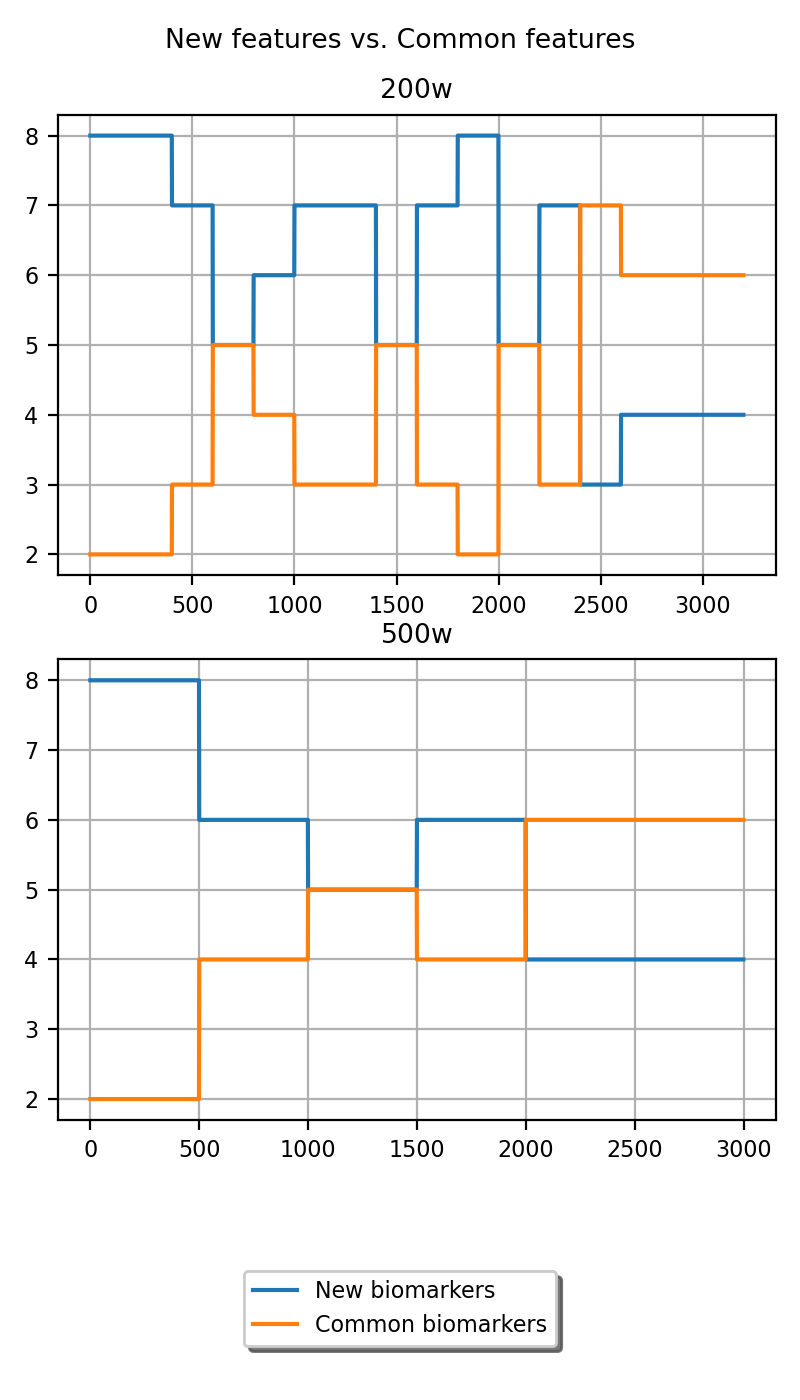

''

In [1128]:
import itertools
def online_lineplot(r, **plt_kwargs):
    
    fig, axs = plt.subplots(2, 1, figsize=(4,7))
    axs = axs.flatten()
    fig.suptitle('New features vs. Common features')
    
   
    y1 = [[len(fs)] * 200  for fs in r['200_1']['biosets']]
    y1 = list(itertools.chain(*y1))
    y2 = [[len(fs)] * 200  for fs in r['200_1']['abiosets']]
    y2 = list(itertools.chain(*y2))
    y3 = [[len(fs)] * 200  for fs in r['200_1']['cbiosets']]
    y3 = list(itertools.chain(*y3))
    x1 = list(range(0, len(y1)))
    x2 = list(range(0, len(y2)))
    x3 = list(range(0, len(y3)))
        
    #axs[i].plot(x1, y1, label = "Adjusted", **plt_kwargs)
    axs[0].plot(x2, y2, label = "New biomarkers", **plt_kwargs) 
    axs[0].plot(x3, y3, label = "Common biomarkers", **plt_kwargs) 
    axs[0].title.set_text('200w')
    axs[0].grid()
        
    fig.tight_layout()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
                ncol=1, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
    
    y1 = [[len(fs)] * 500  for fs in r['500_1']['biosets']]
    y1 = list(itertools.chain(*y1))
    y2 = [[len(fs)] * 500  for fs in r['500_1']['abiosets']]
    y2 = list(itertools.chain(*y2))
    y3 = [[len(fs)] * 500  for fs in r['500_1']['cbiosets']]
    y3 = list(itertools.chain(*y3))
    x1 = list(range(0, len(y1)))
    x2 = list(range(0, len(y2)))
    x3 = list(range(0, len(y3)))
        
    #axs[i].plot(x1, y1, label = "Adjusted", **plt_kwargs)
    axs[1].plot(x2, y2, label = "New biomarkers", **plt_kwargs) 
    axs[1].plot(x3, y3, label = "Common biomarkers", **plt_kwargs) 
    axs[1].title.set_text('500w')
    axs[1].grid()
        
    fig.tight_layout()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
                ncol=1, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
        
    return("")
online_lineplot(res_mod_b1)

In [ ]:
import itertools
def biom_barplot(r, **plt_kwargs):
    
    fig, axs = plt.subplots(3, 2, figsize=(8,8))
    axs = axs.flatten()
    fig.suptitle('Biomarker Sets')
    
    keys = list(r.keys())
    print(keys)
    for i in range(len(keys)):
        labels = []
        for fs in r[keys[i]]['biosets']:
            stri = ""
            stri.join(fs)
            labels.append(stri)
        
        print(r[keys[i]]['amodels'])
        print(r[keys[i]]['al_kbmet'][-1])
        axs[i].bar(labels, r[keys[i]]['amodels'], width, label='InitAcc')
        axs[i].bar(labels, r[keys[i]]['al_kbmet'][-1], width, label='LastAcc')
        axs[i].title.set_text(str(keys[i]))
        axs[i].set_ylabel('Accuracy')
        axs[i].grid()
        
        fig.tight_layout()
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
                   ncol=1, fancybox=True, shadow=True)
        fig.subplots_adjust(bottom=0.2)
        
    return("")
biom_barplot(res_mod_1)

In [849]:
def online_multiplot(r, **plt_kwargs):
    
    fig, axs = plt.subplots(3, 2, figsize=(8,8))
    axs = axs.flatten()
    fig.suptitle('Performances')
    
    keys = list(r.keys())
    for i in range(len(keys)):
        y1 = r[keys[i]]['up_kbmet']
        y2 = r[keys[i]]['up_enmet']
        x1 = list(range(0, len(y1)))
        x2 = list(range(0, len(y2)))
        axs[i].plot(x1, y1, label = "Hoeffding Tree", **plt_kwargs)
        axs[i].plot(x2, y2, label = "Ensemble of HTs", **plt_kwargs) 
        axs[i].title.set_text(str(keys[i]))
        if i > 3:
            axs[i].set_xlabel('Online instances')
        axs[i].set_xlim([500, len(y1)+100])
        if (i % 2) == 0:
            axs[i].set_ylabel('Balanced Accuracy (o)')
        axs[i].set_ylim([0, 1])
        axs[i].grid()
        #axs[i].legend()
    fig.tight_layout()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
               ncol=1, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
    return(fig)   

<IPython.core.display.Javascript object>


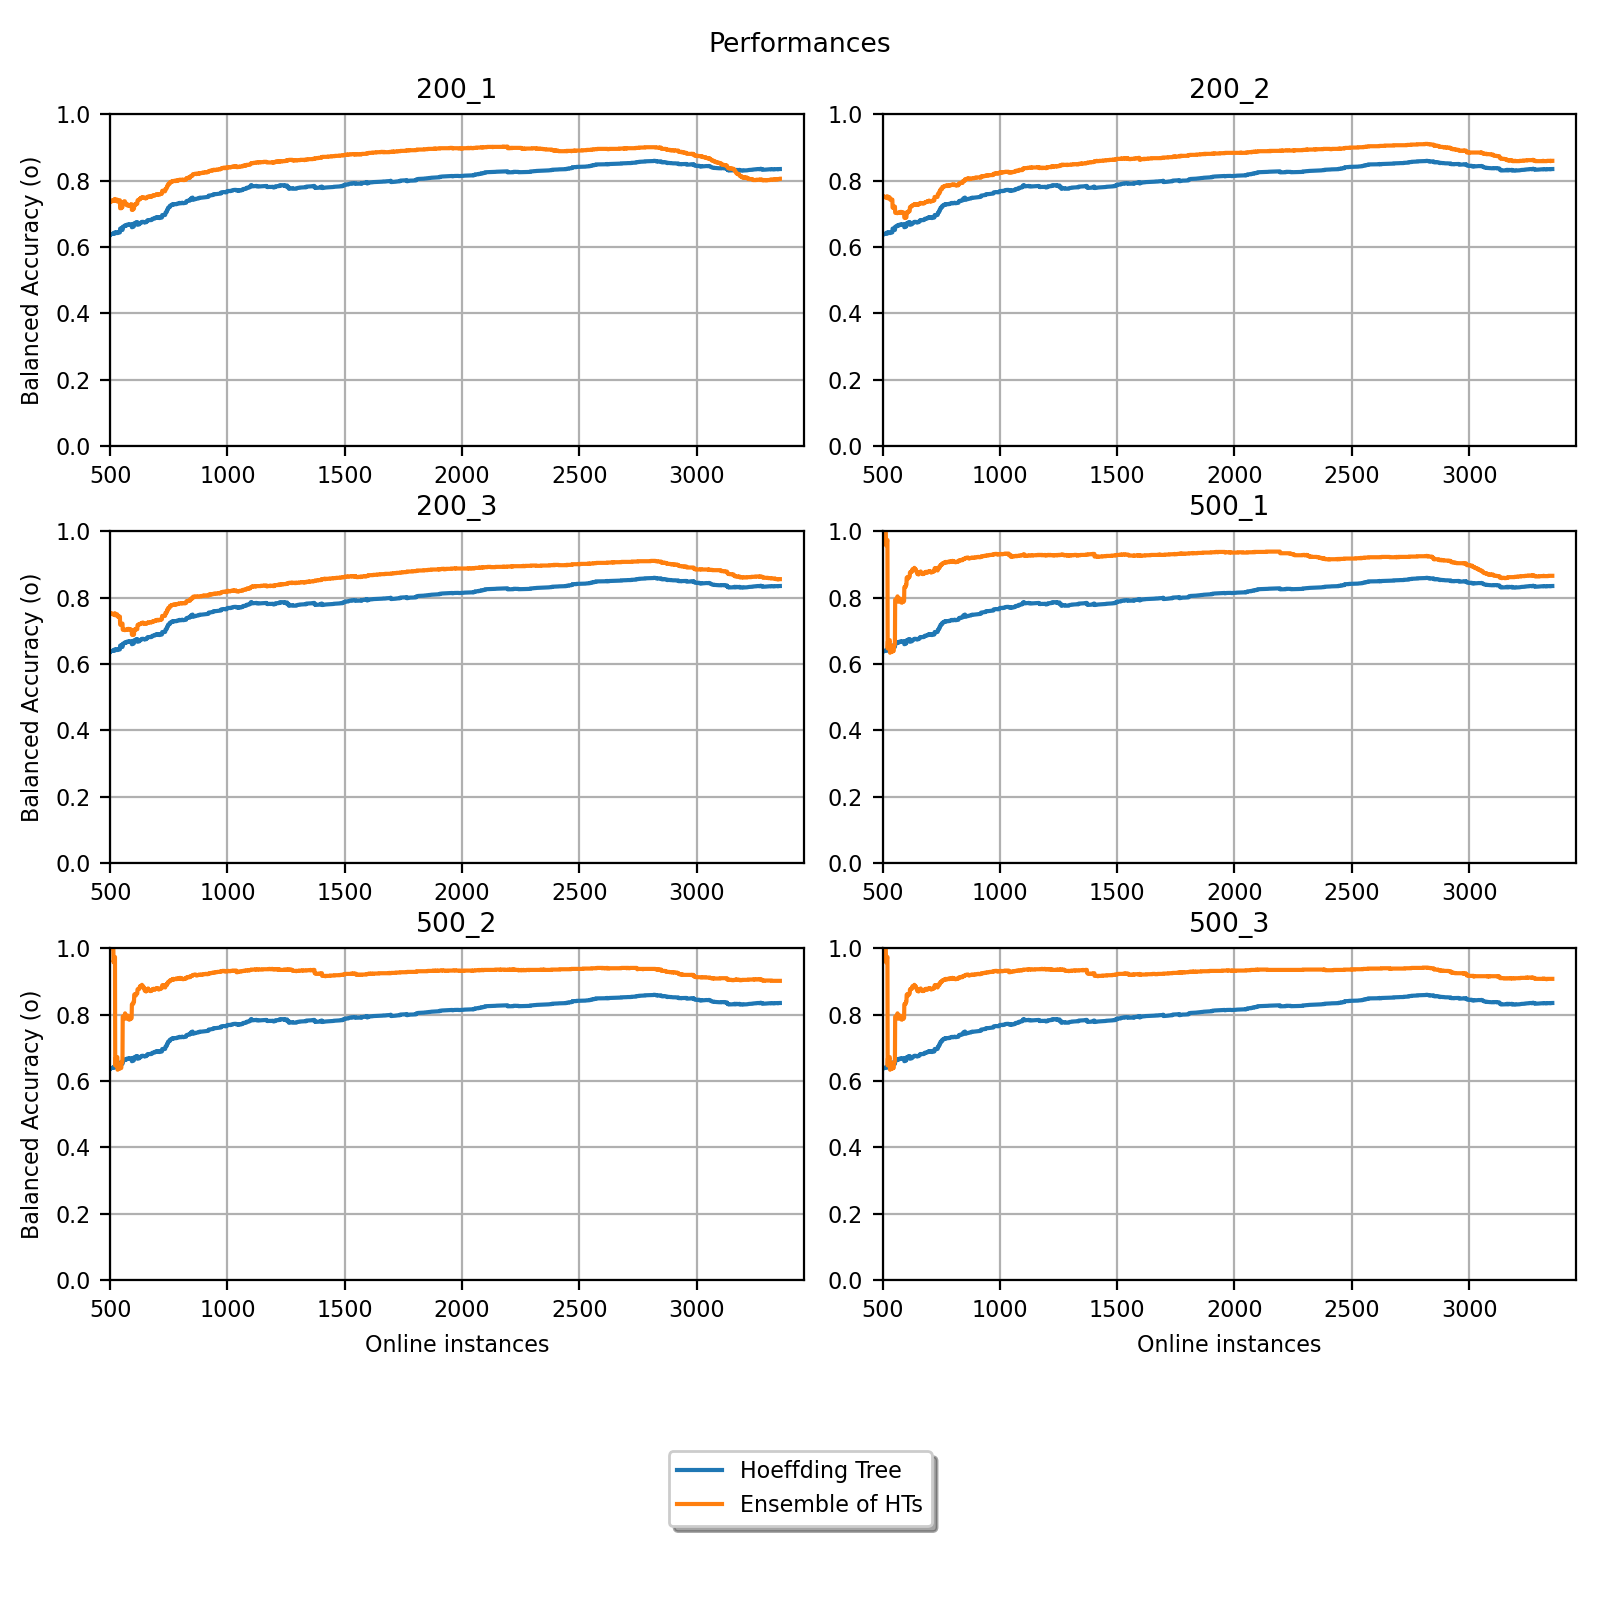

In [1129]:
plt.rcParams.update({'font.size': 8})
online_multiplot(res_mod_b1)
plt.show()

In [1247]:
def online_complot(r_list, keys, name_list, colors, **plt_kwargs):
    
    fig, axs = plt.subplots(3, 2, figsize=(8,9))
    axs = axs.flatten()
    fig.suptitle('Performances')
    #
    for i in range(len(keys)):
        print(keys[i])
        for j in range(len(r_list)):
            r = r_list[j]
            y = r[keys[i]]['up_enmet']
            x = list(range(0, len(y)))
            axs[i].plot(x, y, label = name_list[j], color = colors[j], **plt_kwargs)
            y = r[keys[i]]['up_kbmet']
            axs[i].plot(x, y, label = name_list[j] + '(NoEns)', linestyle="dotted", color = colors[j], **plt_kwargs)    
                
        axs[i].title.set_text(str(keys[i]))
        if i > 3:
            axs[i].set_xlabel('Online instances')
        axs[i].set_xlim([200, len(y)+100])
        if (i % 2) == 0:
            axs[i].set_ylabel('Balanced Accuracy')
        axs[i].set_ylim([0.4, 1])
        axs[i].grid()
        #axs[i].legend()
        
    fig.tight_layout()    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.15),
               ncol=2, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
    return(fig)

<IPython.core.display.Javascript object>


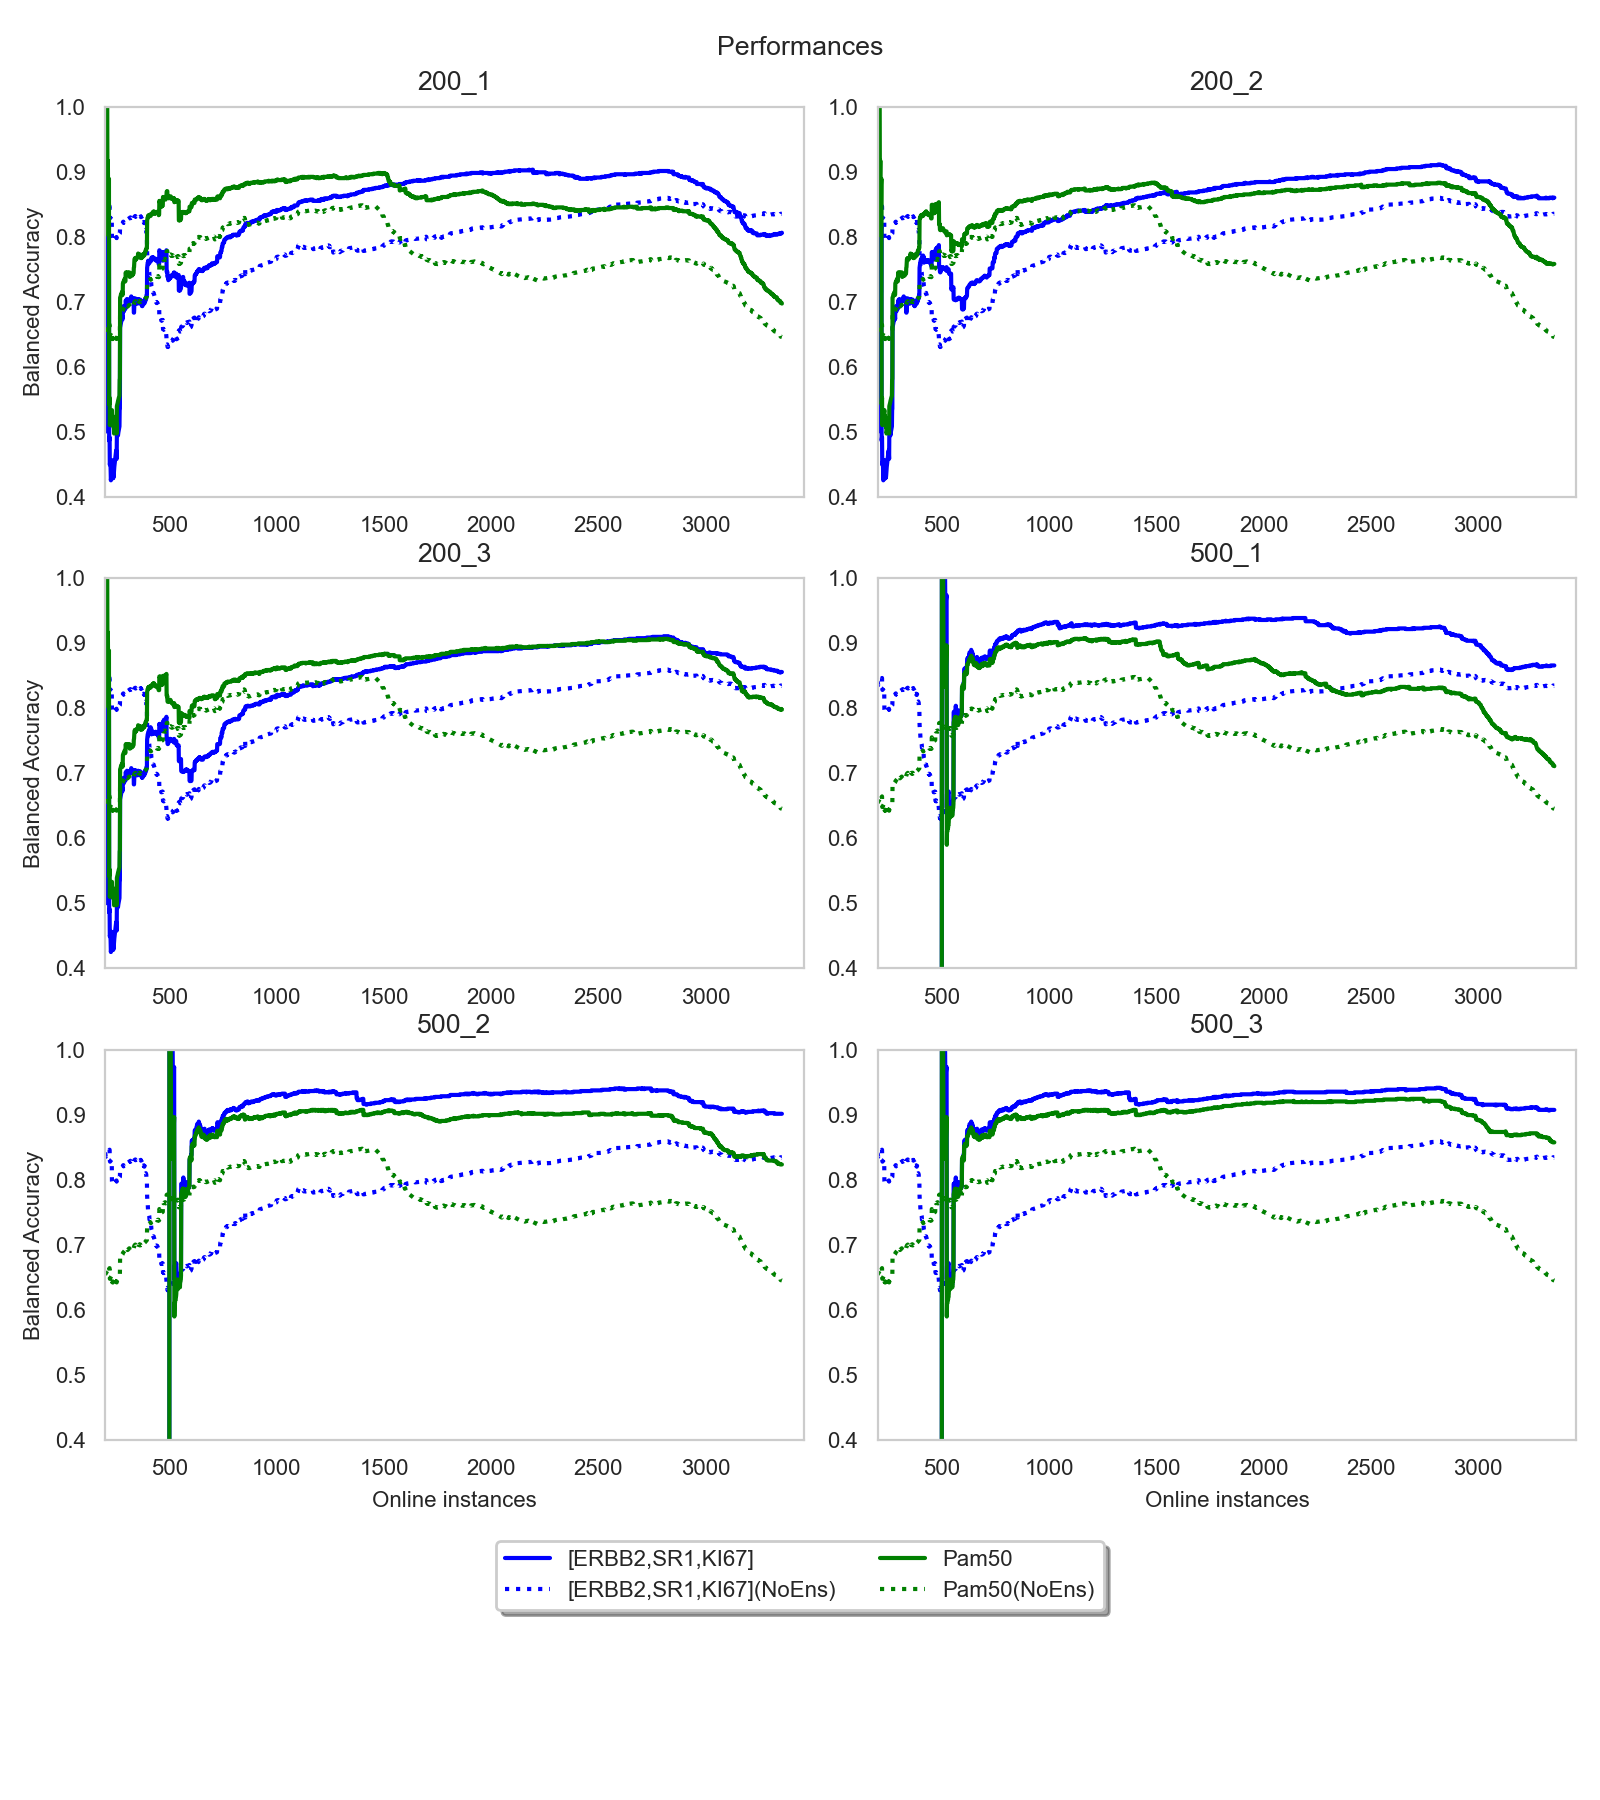

200_1
200_2
200_3
500_1
500_2
500_3


In [1255]:
plt.rcParams.update({'font.size': 8})
online_complot([res_mod_b1, res_mod_b2], 
               ['200_1', '200_2', '200_3', '500_1', '500_2', '500_3'], 
               ['[ERBB2,SR1,KI67]', 'Pam50'],
               colors = ['blue','green'])
plt.show()
plt.savefig('comp_pam50.pdf', bbox_inches='tight')

In [1268]:
print(len(res_mod_b1['200_1']['biosets'][5]))
print(len(res_mod_b1['500_1']['biosets'][5]))
print(len(res_mod_b2['200_1']['biosets'][5]))
print(len(res_mod_b2['500_1']['biosets'][5]))
print(len(res_mod_b3['200_1']['biosets'][5]))
print(len(res_mod_b3['500_1']['biosets'][5]))
print(len(res_mod_b4['200_1']['biosets'][5]))
print(len(res_mod_b4['500_1']['biosets'][5]))
#endopred
#oncopedsig
#biom_list_pam50

44
36
85
77
55
47
61
53


In [1267]:
print(len(list(set.intersection(set(res_mod_b1['200_1']['biosets'][5]), set(biom_list_pam50)))))
print(len(list(set.intersection(set(res_mod_b1['500_1']['biosets'][5]), set(biom_list_pam50)))))
print(len(list(set.intersection(set(res_mod_b3['200_1']['biosets'][5]), set(biom_list_pam50)))))
print(len(list(set.intersection(set(res_mod_b3['500_1']['biosets'][5]), set(biom_list_pam50)))))
print(len(list(set.intersection(set(res_mod_b4['200_1']['biosets'][5]), set(biom_list_pam50)))))
print(len(list(set.intersection(set(res_mod_b4['500_1']['biosets'][5]), set(biom_list_pam50)))))

6
6
8
8
14
14


<IPython.core.display.Javascript object>


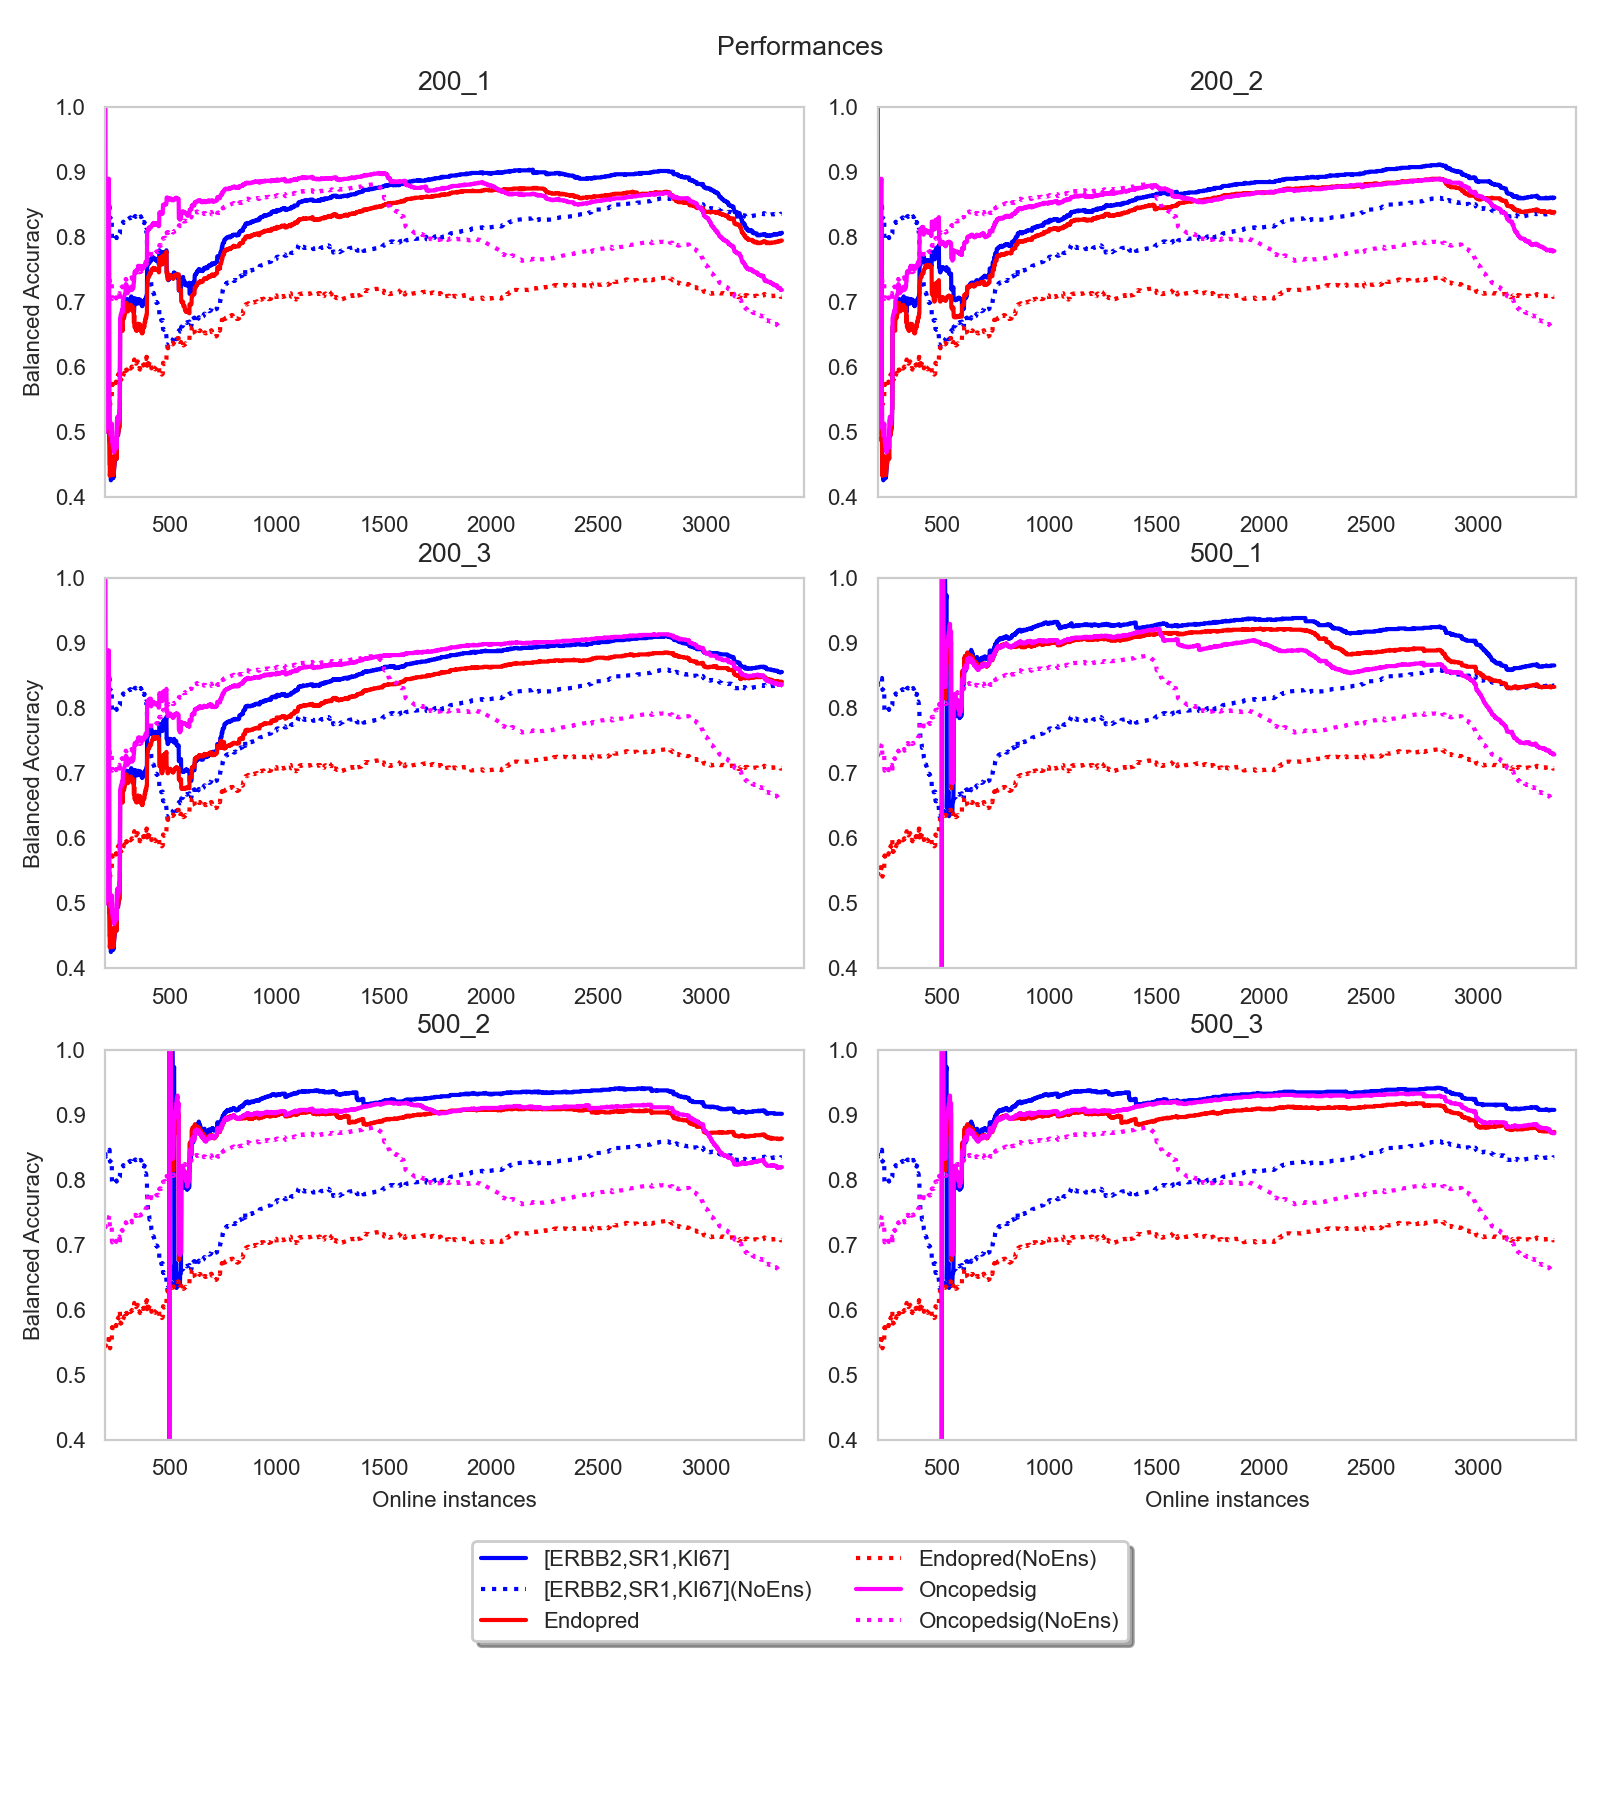

200_1
200_2
200_3
500_1
500_2
500_3


In [1269]:
plt.rcParams.update({'font.size': 8})
online_complot([res_mod_b1, res_mod_b3, res_mod_b4], 
               ['200_1', '200_2', '200_3', '500_1', '500_2', '500_3'], 
               ['[ERBB2,SR1,KI67]', 'Endopred', 'Oncopedsig'],
               colors = ['blue','red','magenta'])
plt.show()
plt.savefig('comp_oas.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


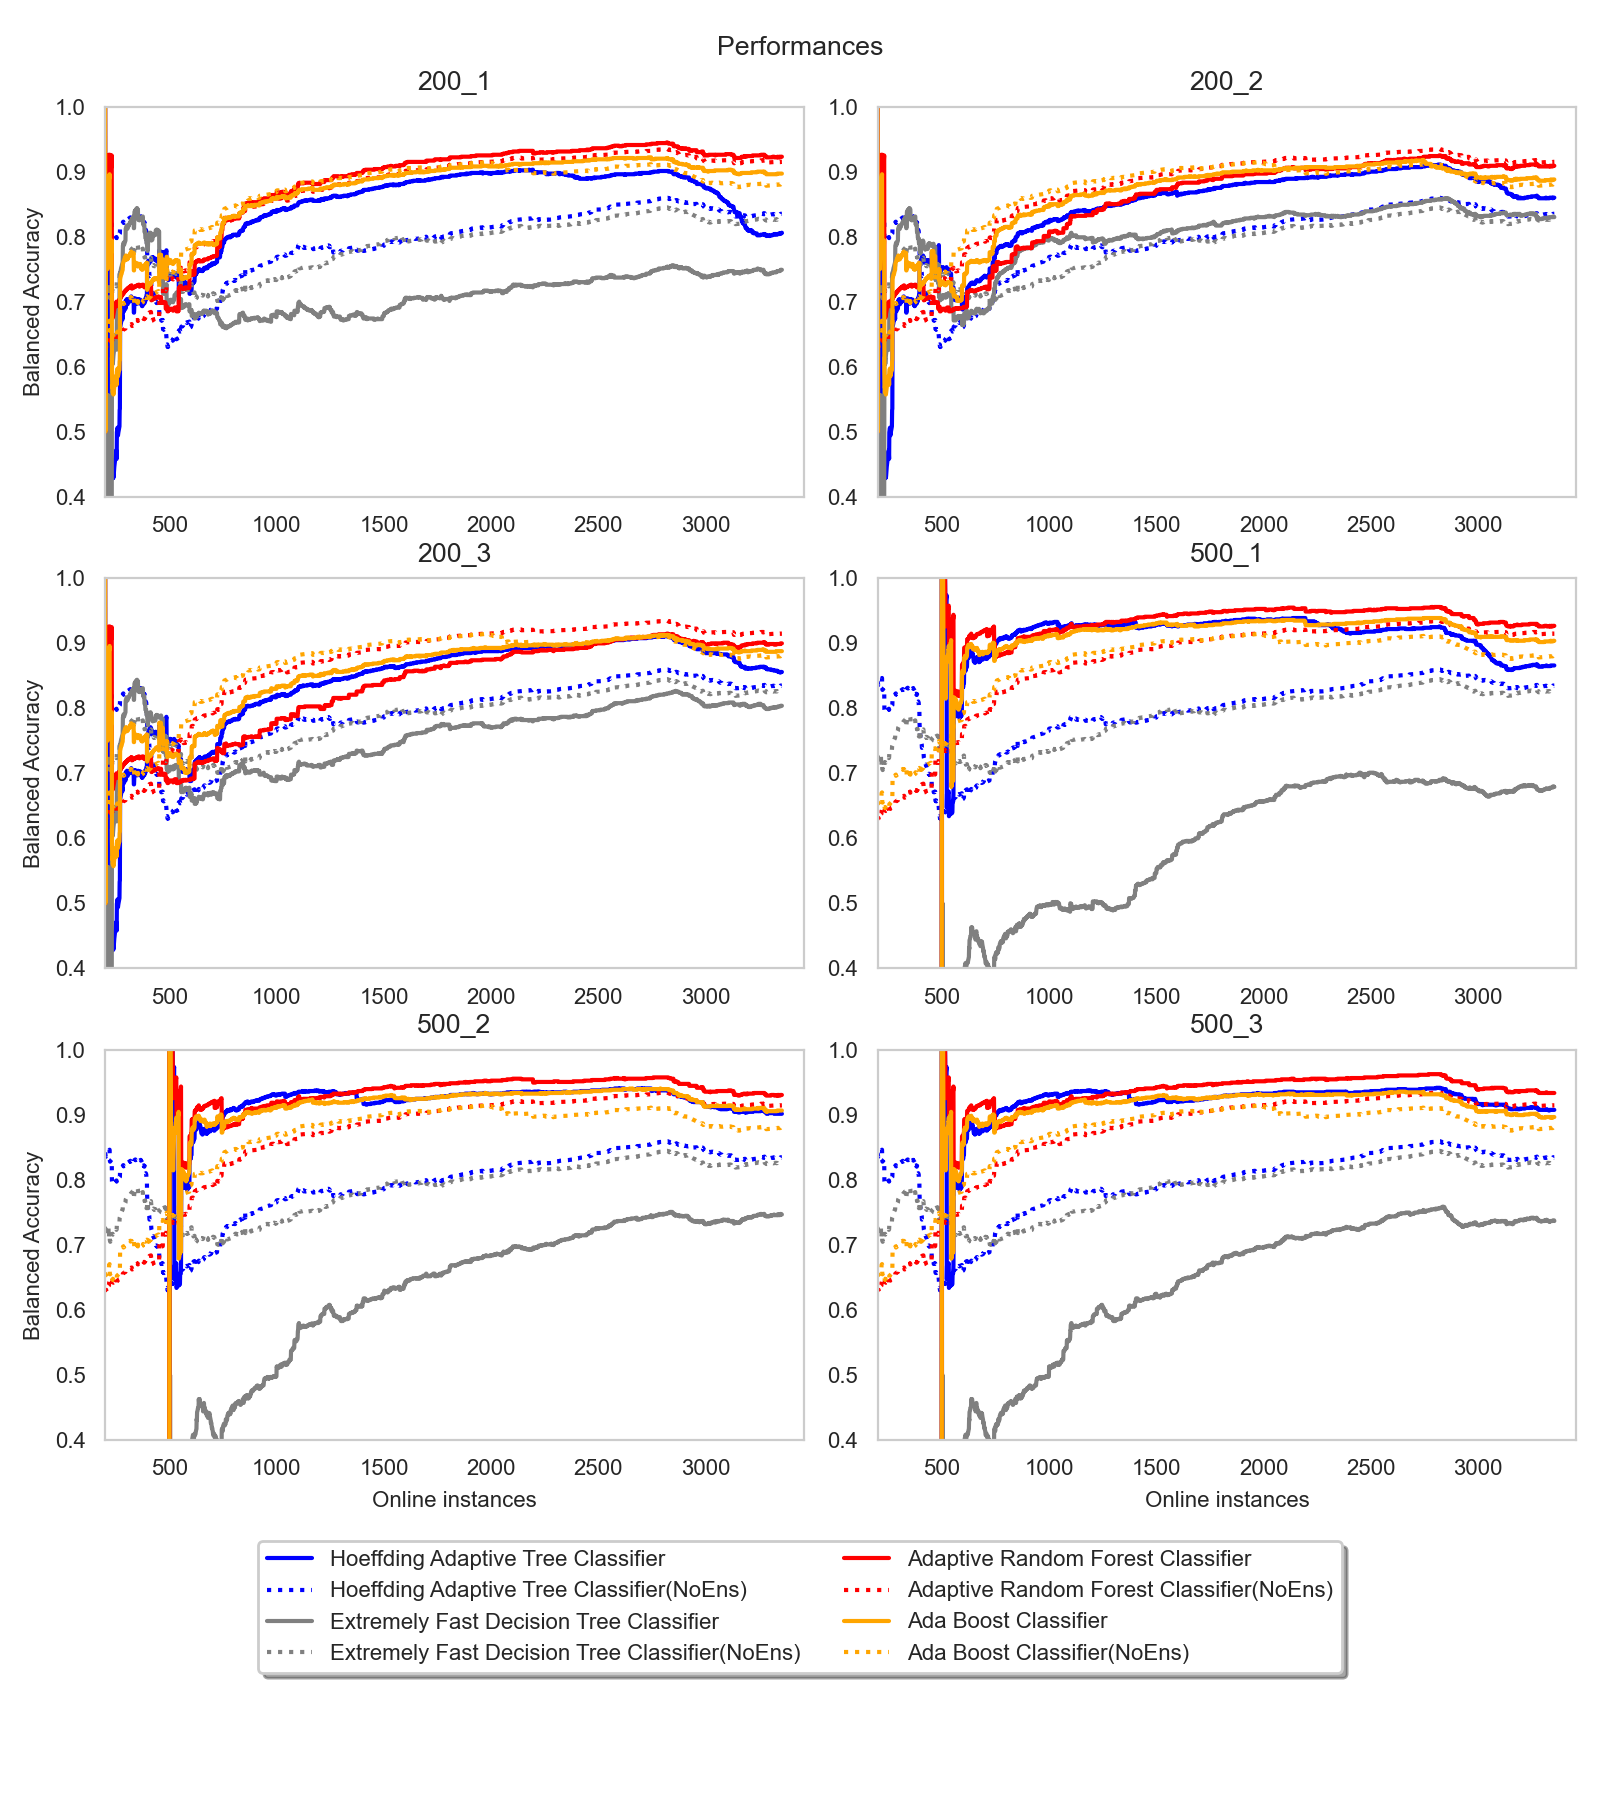

200_1
200_2
200_3
500_1
500_2
500_3


In [1256]:
plt.rcParams.update({'font.size': 8})
online_complot([res_mod_n1, res_mod_n2, res_mod_n4, res_mod_n5], 
               ['200_1', '200_2', '200_3', '500_1', '500_2', '500_3'], 
               ['Hoeffding Adaptive Tree Classifier', 'Extremely Fast Decision Tree Classifier',
                'Adaptive Random Forest Classifier', 'Ada Boost Classifier'],
              colors = ['blue','gray','red','orange'])
plt.show()
plt.savefig('comp_oas.pdf', bbox_inches='tight')

In [ ]:
return({'biosets': currents, 
            'nbiosets': list_bio,
            'abiosets': add_value,
            'cbiosets': com_feats,            
            'models': models,
            'amodels': acc_fdd,
            'y_true': y_true, 
            'yk_pred': yk_pred, 
            'ye_pred': ye_pred,
            'up_kbmet': all_kb, 
            'up_enmet': all_ens}) 


In [1148]:
from collections import Counter
from itertools import chain

counter_obj = Counter(chain.from_iterable(res_mod_b1['500_2']['biosets']))

print(counter_obj.most_common())

[('NUSAP1', 6), ('BUB1', 6), ('MKI67', 6), ('TMEM204', 6), ('FOXA1', 6), ('TSHR', 6), ('PGAP3', 6), ('ERBB2', 6), ('GATA3', 6), ('ESR1', 6), ('AGR3', 6), ('RPL19', 5), ('CEP55', 5), ('ELMO3', 5), ('CCNA2', 5), ('ENPP3', 5), ('FOXC1', 5), ('USP48', 4), ('FOXM1', 4), ('TPX2', 4), ('SEMA3F', 4), ('SHC3', 4), ('PRR13', 3), ('GABRA4', 3), ('TTLL6', 3), ('AOC2', 3), ('C1orf127', 3), ('KIFC1', 3), ('GFM1', 2), ('DDC', 2), ('CCNB2', 2), ('HORMAD1', 2), ('UHRF1', 1), ('CA12', 1), ('PSAT1', 1), ('ALG3', 1)]


In [1150]:
len(res_mod_b1['500_2']['biosets'])

6

In [1153]:
from itertools import chain
sel_feats = res_mod_b1['500_2']['biosets'][5]
#sel_feats = list(set(chain(*res_mod_1['500_3']['featsets'])))
sel_feats

['BUB1',
 'UHRF1',
 'GABRA4',
 'TTLL6',
 'GFM1',
 'AGR3',
 'MKI67',
 'CCNA2',
 'ENPP3',
 'FOXC1',
 'SEMA3F',
 'ERBB2',
 'KIFC1',
 'CA12',
 'NUSAP1',
 'RPL19',
 'USP48',
 'TMEM204',
 'FOXA1',
 'DDC',
 'TSHR',
 'FOXM1',
 'PGAP3',
 'GATA3',
 'CEP55',
 'TPX2',
 'ELMO3',
 'CCNB2',
 'AOC2',
 'HORMAD1',
 'PSAT1',
 'ALG3',
 'C1orf127',
 'ESR1',
 'PRR13',
 'SHC3']

In [1155]:
def online_plot(r, ax=None, **plt_kwargs):
    
    y1 = r['up_onmet']
    y2 = r['up_enmet']
    x1 = list(range(0, len(y1)))
    x2 = list(range(0, len(y2)))

    if ax is None:
        ax = plt.gca()
        
    ax.plot(x1, y1, label = "Hoeffding Tree", **plt_kwargs)
    ax.plot(x2, y2, label = "Hoeffding Tree + Ensemble of RFs", **plt_kwargs)    
    
    ax.set_ylabel('Balanced Accuracy (o)')
    ax.set_ylim([0, 1])
    
    ax.set_xlabel('Online instances')
    ax.set_xlim([500, len(y1)+100])
    
    for drift_detected in r['drifts']:
        ax.axvline(drift_detected, color='red')
        
    ax.grid()
    ax.legend()
    
    return(ax)

In [74]:
# utility fucntions for saving and loading operations
import pickle
import random

def load_data():
    try:
        with open("bin.dat") as f:
            x, y = pickle.load(f)
    except:
        x, y = [], []
    return x, y

def save_data(data):
    with open("bin.dat", "wb") as f:
        pickle.dump(data, f)

In [75]:
save_data(lres)

### Test biomarker models on the TCGA dataset

In [1033]:
print(sk.__version__)

1.0.1


In [1034]:
pam50sigP = list(set(pam50sig).union(sel_feats))
print(len(pam50sigP))

74


In [1035]:
def borutaFS(X, y, rs = 0):
    
    # define random forest classifier, with utilising all cores and
    # sampling in proportion to y labels
    rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

    # define Boruta feature selection method
    feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=rs)

    # find all relevant features - 5 features should be selected
    feat_selector.fit(X, y)

    # check selected features - first 5 features are selected
    #feat_selector.support_

    return([feat_selector.transform(X), feat_selector.ranking_])

In [1036]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def rfSFS(X, y, rs = 0):
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score = True,
                                class_weight='balanced', max_depth=5, random_state=rs)
    sfs = SFS(rf, 
              k_features=50, 
              forward=True, 
              floating=False, 
              verbose=2,
              scoring='accuracy',
              cv=0)

    sfs = sfs.fit(X, y)
    return(sfs)

In [1037]:
X_data[pam50sigP].shape

(2770, 74)

In [1039]:
X_scdata_newbm = StandardScaler().fit_transform(X_data[pam50sigP])
X_sctcga_newbm = StandardScaler().fit_transform(X_tcga[pam50sigP])
feat_sel_res = rfSFS(X_scdata_newbm, pam50n, rs = 0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   24.5s finished

[2022-03-30 17:03:14] Features: 1/50 -- score: 0.6870036101083032[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   24.6s finished

[2022-03-30 17:03:39] Features: 2/50 -- score: 0.7859205776173285[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   23.5s finished

[2022-03-30 17:04:02] Features: 3/50 -- score: 0.8476534296028881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   16.3s finished

[2022-03-30 17:12:20] Features: 28/50 -- score: 0.944043321299639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   16.5s finished

[2022-03-30 17:12:36] Features: 29/50 -- score: 0.9436823104693141[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   16.1s finished

[2022-03-30 17:12:52] Features: 30/50 -- score: 0.9389891696750903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   15.4s finished

[2022-03-30 17:13:08] Features: 31/5

<IPython.core.display.Javascript object>


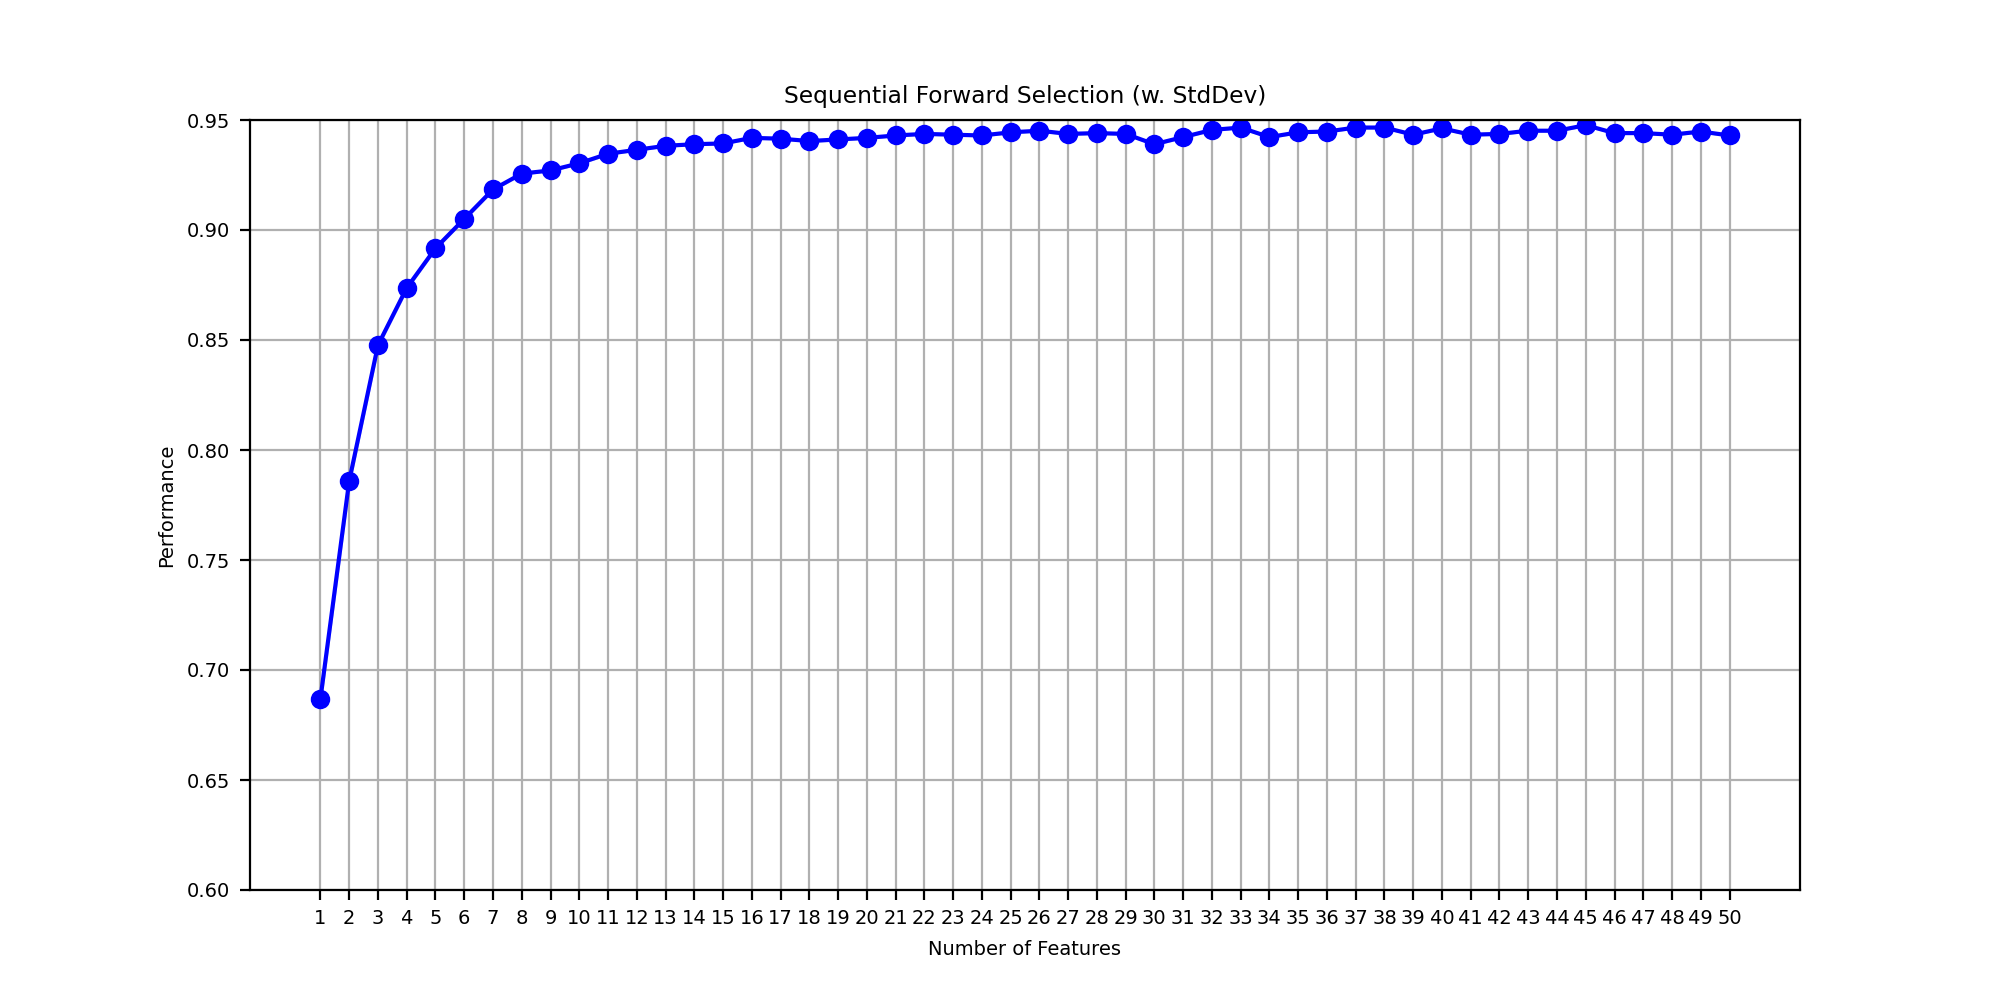

In [1040]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plt.rcParams.update({'font.size': 7})
fig1 = plot_sfs(feat_sel_res.get_metric_dict(), kind='std_dev', figsize=(10,5))
plt.ylim([0.6, .95])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [1041]:
print('best combination (ACC: %.3f): %s\n' % (feat_sel_res.k_score_, feat_sel_res.k_feature_idx_))
print(len(feat_sel_res.k_feature_idx_))

best combination (ACC: 0.943): (0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 30, 32, 33, 34, 35, 36, 38, 39, 41, 44, 46, 47, 48, 49, 50, 52, 54, 55, 57, 59, 60, 61, 62, 64, 67, 69, 70, 71, 73)

50


In [1065]:
pam50sigS = [pam50sigP[f] for f in feat_sel_res.k_feature_idx_[:20]]
pam50sigS

['CDC20',
 'MELK',
 'BAG1',
 'ROPN1',
 'SLC39A6',
 'MYBL2',
 'ANLN',
 'RNFT1',
 'KRT17',
 'BCL2',
 'UBE2T',
 'PHLPP1',
 'STARD3',
 'PHGDH',
 'ONECUT2',
 'EXO1',
 'PTTG1',
 'CCNE1',
 'H6PD',
 'MAPT']

In [1057]:
len(list(set.intersection(set(pam50sigS), set(pam50sig))))

6

In [1066]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from boruta import BorutaPy

# Create classifiers
#lr = LogisticRegression(penalty = 'none', random_state=0)
#eln = LogisticRegression(penalty = 'elasticnet', random_state=0)
#gnb = GaussianNB()
rfc_pam50 = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_oncop = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_endop = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_genM1 = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_newbm = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_newbs = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
# prepare the training and tes sets
X_scdata_pam50 = StandardScaler().fit_transform(X_data[pam50sig])
X_sctcga_pam50 = StandardScaler().fit_transform(X_tcga[pam50sig])
X_scdata_oncop = StandardScaler().fit_transform(X_data[oncopedsig])
X_sctcga_oncop = StandardScaler().fit_transform(X_tcga[oncopedsig])
X_scdata_endop = StandardScaler().fit_transform(X_data[endopred])
X_sctcga_endop = StandardScaler().fit_transform(X_tcga[endopred])
X_scdata_genM1 = StandardScaler().fit_transform(X_data[genM1])
X_sctcga_genM1 = StandardScaler().fit_transform(X_tcga[genM1])
X_scdata_newbm = StandardScaler().fit_transform(X_data[pam50sigP])
X_sctcga_newbm = StandardScaler().fit_transform(X_tcga[pam50sigP])
X_scdata_newbs = StandardScaler().fit_transform(X_data[pam50sigS])
X_sctcga_newbs = StandardScaler().fit_transform(X_tcga[pam50sigS])
print(X_scdata_pam50.shape)
print(X_sctcga_pam50.shape)
print(X_scdata_oncop.shape)
print(X_sctcga_oncop.shape)
print(X_scdata_endop.shape)
print(X_sctcga_endop.shape)
print(X_scdata_genM1.shape)
print(X_sctcga_genM1.shape)
print(X_scdata_newbm.shape)
print(X_sctcga_newbm.shape)
print(X_scdata_newbs.shape)
print(X_sctcga_newbs.shape)
# training
rfc_pam50.fit(X_scdata_pam50, pam50n)
rfc_oncop.fit(X_scdata_oncop, pam50n)
rfc_endop.fit(X_scdata_endop, pam50n)
rfc_genM1.fit(X_scdata_genM1, pam50n)
rfc_newbm.fit(X_scdata_newbm, pam50n)
rfc_newbs.fit(X_scdata_newbs, pam50n)
# training accuracy
print(balanced_accuracy_score(pam50n, rfc_pam50.predict(X_scdata_pam50)))
print(balanced_accuracy_score(pam50n, rfc_oncop.predict(X_scdata_oncop)))
print(balanced_accuracy_score(pam50n, rfc_endop.predict(X_scdata_endop)))
print(balanced_accuracy_score(pam50n, rfc_genM1.predict(X_scdata_genM1)))
print(balanced_accuracy_score(pam50n, rfc_newbm.predict(X_scdata_newbm)))
print(balanced_accuracy_score(pam50n, rfc_newbs.predict(X_scdata_newbs)))

(2770, 47)
(1031, 47)
(2770, 20)
(1031, 20)
(2770, 11)
(1031, 11)
(2770, 46)
(1031, 46)
(2770, 74)
(1031, 74)
(2770, 20)
(1031, 20)
1.0
1.0
1.0
1.0
1.0
1.0


In [1067]:
from sklearn.metrics import balanced_accuracy_score
# testing accuracies
print(balanced_accuracy_score(pam50nt, rfc_pam50.predict(X_sctcga_pam50)))
print(balanced_accuracy_score(pam50nt, rfc_oncop.predict(X_sctcga_oncop)))
print(balanced_accuracy_score(pam50nt, rfc_endop.predict(X_sctcga_endop)))
print(balanced_accuracy_score(pam50nt, rfc_genM1.predict(X_sctcga_genM1)))
print(balanced_accuracy_score(pam50nt, rfc_newbm.predict(X_sctcga_newbm)))
print(balanced_accuracy_score(pam50nt, rfc_newbs.predict(X_sctcga_newbs)))

0.9298655623089532
0.8363750601929754
0.6795545704487754
0.6514036477373137
0.9245252803514921
0.8431037390989983


<IPython.core.display.Javascript object>


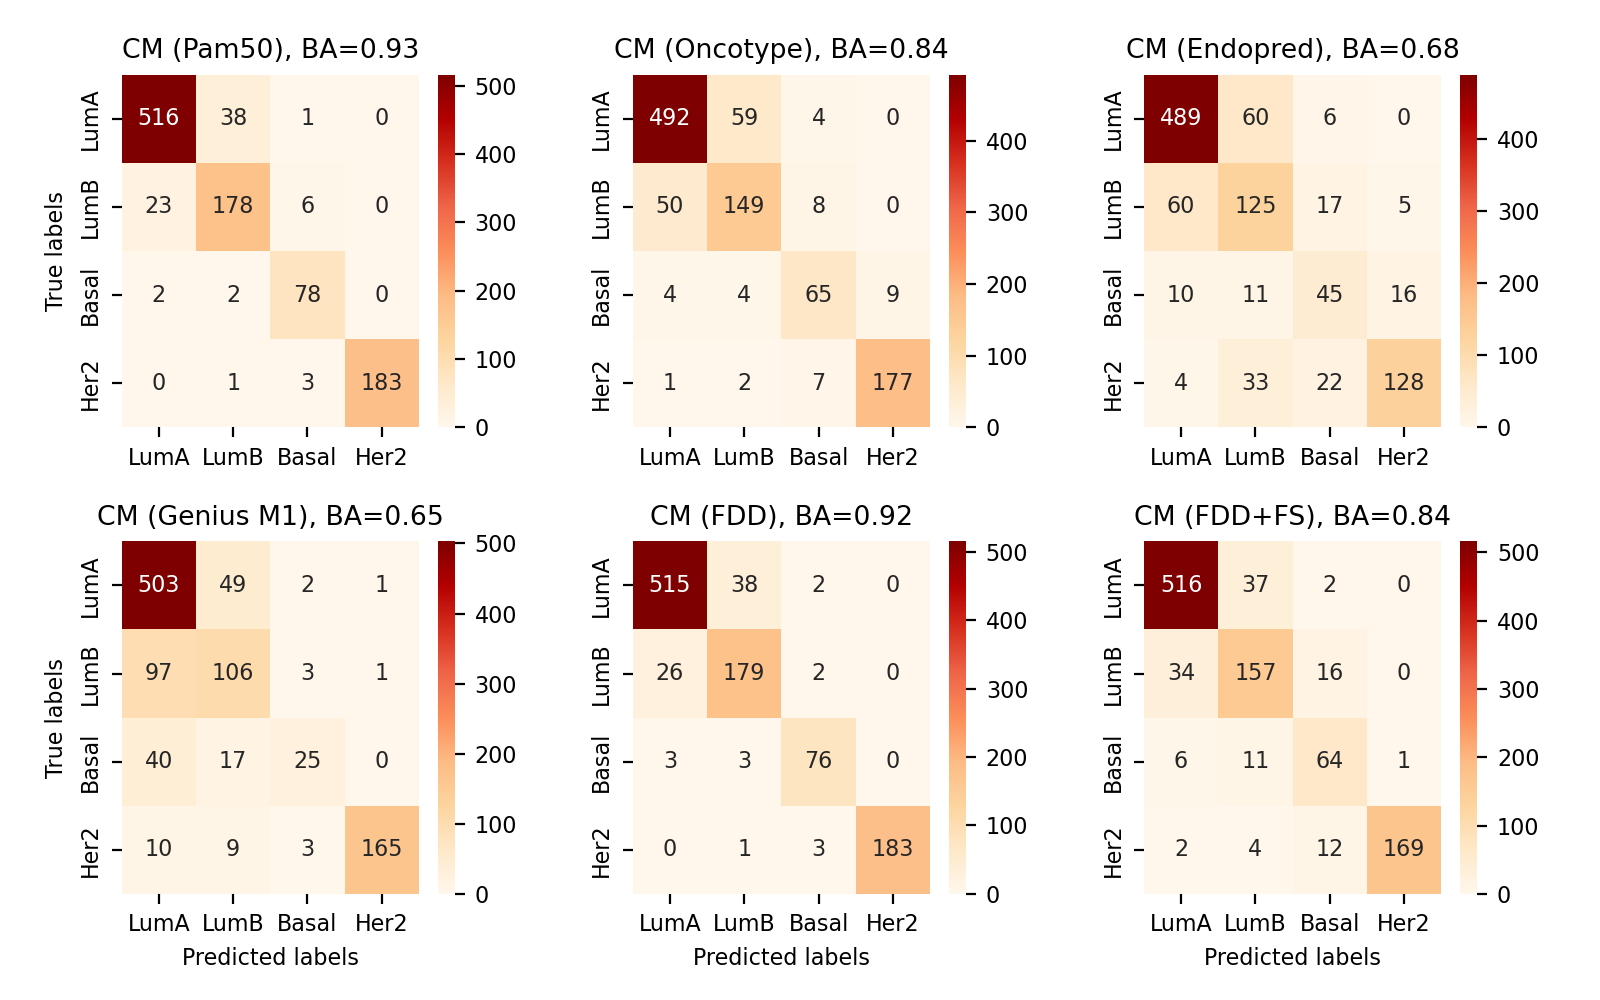

In [1068]:
from sklearn import metrics

plt.rcParams.update({'font.size': 8})

# confusion matrices
cm_pam50 = metrics.confusion_matrix(pam50nt, rfc_pam50.predict(X_sctcga_pam50))
cm_oncop = metrics.confusion_matrix(pam50nt, rfc_oncop.predict(X_sctcga_oncop))
cm_endop = metrics.confusion_matrix(pam50nt, rfc_endop.predict(X_sctcga_endop))
cm_genM1 = metrics.confusion_matrix(pam50nt, rfc_genM1.predict(X_sctcga_genM1))
cm_BM = metrics.confusion_matrix(pam50nt, rfc_newbm.predict(X_sctcga_newbm))
cm_BS = metrics.confusion_matrix(pam50nt, rfc_newbs.predict(X_sctcga_newbs))
  
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8,5))

fig.tight_layout(pad=3)

sns.heatmap(cm_pam50, annot=True, fmt='g', ax=ax1, cmap="OrRd");  
sns.heatmap(cm_oncop, annot=True, fmt='g', ax=ax2, cmap="OrRd");
sns.heatmap(cm_endop, annot=True, fmt='g', ax=ax3, cmap="OrRd");  
sns.heatmap(cm_genM1, annot=True, fmt='g', ax=ax4, cmap="OrRd");
sns.heatmap(cm_BM, annot=True, fmt='g', ax=ax5, cmap="OrRd");  
sns.heatmap(cm_BS, annot=True, fmt='g', ax=ax6, cmap="OrRd");

#annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax1.set_xlabel(''); ax1.set_ylabel('True labels'); 
ax1.set_title('CM (Pam50), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_pam50.predict(X_sctcga_pam50)),2)));
ax1.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax1.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax2.set_xlabel(''); ax2.set_ylabel(''); 
ax2.set_title('CM (Oncotype), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_oncop.predict(X_sctcga_oncop)),2))); 
ax2.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']);
ax2.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax3.set_xlabel(''); ax3.set_ylabel(''); 
ax3.set_title('CM (Endopred), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_endop.predict(X_sctcga_endop)),2))); 
ax3.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']);
ax3.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax4.set_xlabel('Predicted labels'); ax4.set_ylabel('True labels'); 
ax4.set_title('CM (Genius M1), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_genM1.predict(X_sctcga_genM1)),2))); 
ax4.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']);
ax4.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax5.set_xlabel('Predicted labels'); ax5.set_ylabel(''); 
ax5.set_title('CM (FDD), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_newbm.predict(X_sctcga_newbm)),2))); 
ax5.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']);
ax5.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
ax6.set_xlabel('Predicted labels'); ax6.set_ylabel(''); 
ax6.set_title('CM (FDD+FS), BA=' + str(round(balanced_accuracy_score(pam50nt, rfc_newbs.predict(X_sctcga_newbs)),2))); 
ax6.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']);
ax6.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2']); 
#
plt.savefig('comp_biom.pdf', bbox_inches='tight')

### Assess clinical relevance of selected biomarkers

In [1154]:
TIME_STR = 'time'
EVENT_STR = 'event'

In [1155]:
import pandas as pd

def merge_x_y(x, y):
    if len(x) != len(y):
        raise ValueError("x and y have different lengths\n" + str(x) + "\n" + str(y))
    res = pd.concat([x.reset_index(drop=True), y.loc[:, [EVENT_STR, TIME_STR]].reset_index(drop=True)], axis=1)
    return res

In [1156]:
from abc import abstractmethod, ABC
from lifelines import CoxPHFitter
from sksurv.linear_model import CoxPHSurvivalAnalysis

class CoxPredictor(ABC):

    @abstractmethod
    def score(self, x_test, y_test) -> float:
        raise NotImplementedError()

    @abstractmethod
    def p_vals(self):
        raise NotImplementedError()

    @abstractmethod
    def params(self):
        raise NotImplementedError()


class CoxModel(ABC):

    @abstractmethod
    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        raise NotImplementedError()


class SKSurvCoxPredictor(CoxPredictor):

    __estimator: CoxPHSurvivalAnalysis

    def __init__(self, estimator: CoxPHSurvivalAnalysis):
        self.__estimator = estimator

    def score(self, x_test, y_test) -> float:
        return self.__estimator.score(x_test, y_test)

    def p_vals(self):
        raise NotImplementedError()

    def params(self):
        raise NotImplementedError()


class SKSurvCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        estimator = CoxPHSurvivalAnalysis(alpha=alpha).fit(x_train, y_train)
        return SKSurvCoxPredictor(estimator)


class LifelinesCoxPredictor(CoxPredictor):
    __estimator: CoxPHFitter

    def __init__(self, estimator: CoxPHFitter):
        self.__estimator = estimator

    @staticmethod
    def merge_x_y(x, y):
        return merge_x_y(x=x, y=y)

    def score(self, x_test, y_test) -> float:
        df = self.merge_x_y(x=x_test, y=y_test)
        return self.__estimator.score(df, scoring_method="concordance_index")

    def p_vals(self):
        summary = self.__estimator.summary
        return summary['p']

    def params(self):
        return self.__estimator.params_
    
    def inner_estimator(self) -> CoxPHFitter:
        return self.__estimator
    
    def hazard_ratios(self):
        #s = self.__estimator.hazard_ratios_
        return self.__estimator.summary
        #return list(zip(s.index, s))

class LifelinesCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        df = LifelinesCoxPredictor.merge_x_y(x=x_train, y=y_train)
        if df.isnull().values.any():
            print("Nulls detected in the dataframe")
            print(df.isnull())
        estimator = CoxPHFitter(penalizer=alpha, l1_ratio=0).fit(df=df, duration_col='time', event_col='event')
        #print(estimator.print_summary())
        return LifelinesCoxPredictor(estimator)

In [1157]:
from statistics import mean
import sklearn

def create_folds(x, y, n_folds: int = 10, seed=4985):
    skf = sklearn.model_selection.StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
    res = []
    y_event = y[[EVENT_STR]]
    for train_index, test_index in skf.split(X=x, y=y_event):
        res.append([train_index, test_index])
    return res

def train_test_one_fold(x_train, y_train, x_test, y_test, model: CoxModel, alpha=0):
    predictor = model.fit_estimator(x_train=x_train, y_train=y_train, alpha=alpha)
    score = predictor.score(x_test=x_test, y_test=y_test)
    return score

def cross_validate(x, y, model: CoxModel, n_folds: int = 10, alpha=0, seed=78245):
    folds = create_folds(x, y, n_folds=n_folds, seed=seed)
    scores = []
    for train_index, test_index in folds:
        x_train = x.iloc[train_index]
        x_test = x.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        fold_score = train_test_one_fold(x_train, y_train, x_test, y_test, model=model, alpha=alpha)
        scores.append(fold_score)
    return mean(scores)

In [1158]:
def cox_analysis(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, typeres = 'tab'):
    if typeres == 'tab':
        res = pd.DataFrame(columns=['feature', 'score', 'coef','exp(coef)',
                                    'l95exp(coef)','u95exp(coef)','z','p','-log2(p)'])
    elif typeres == 'raw':
        res = list()
    pos = 0
    for feat_name in x:
        if cov is not None:
            #feat_df = pd.concat(objs=[cov, x[[feat_name]]], axis=1)
            feat_df = pd.concat((cov, x[[feat_name]]), axis = 1)
        else:
            feat_df = x[[feat_name]]
        feat_predictor = model.fit_estimator(x_train=feat_df, y_train=y, alpha=alpha)
        #print(feat_predictor.inner_estimator().print_summary())
        if typeres == 'tab':
            params = feat_predictor.hazard_ratios()
            params = params.values[0]
            params = list(params[[0,1,5,6,7,8,9]])
            score = feat_predictor.score(x_test=feat_df, y_test=y)
            #p_val = feat_predictor.p_vals()[0]
            #coefficient = feat_predictor.params()[feat_name]
            #res.loc[pos] = [feat_name, score, p_val, coefficient] + params
            res.loc[pos] = [feat_name, score] + params
        elif typeres == 'raw':
            res.append(feat_predictor.inner_estimator())
        pos += 1
    if typeres == 'tab':
        res.sort_values(by=['p'], inplace=True, ignore_index=True)
    else:
        dd = dict()
        for r in range(len(res)):
            dd[x.columns[r]] = res[r]
        res = dd
    return res

In [1159]:
import statistics

def risk_score(coefs: dict, sample: dict) -> float:
    res = 0.0
    for key in coefs:
        if key in sample:
            res += coefs[key]*sample[key]  # TODO Can benefit from stable sum
    return res

def risk_scores(coefs: dict, x) -> [float]:
    x_dict = x.to_dict(orient='records')
    res = [risk_score(coefs=coefs, sample=i) for i in x_dict]
    return res

def prognostic_scores(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, p_val=0.05, score = 0.5):
    """Scores of features with at least the passed p-val."""
    uni_res = cox_analysis(x=x, y=y, cov = cov, model=model, alpha=alpha)
    uni_res = uni_res[uni_res['score'] > score]
    uni_res_list = [(f, s, p) for f, s, p in zip(uni_res['feature'], uni_res['score'], uni_res['p'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val:
            res[r[0]] = r[1]
    return res

def prognostic_coefficients(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, p_val=0.05, coef = 0.5):
    """Coefficients of features with at least the passed p-val."""
    uni_res = cox_analysis(x=x, y=y, cov = cov, model=model, alpha=alpha)
    #uni_res = uni_res[abs(uni_res['coef']) > coef]
    uni_res_list = [(f, c, p) for f, c, p in zip(uni_res['feature'], uni_res['coef'], uni_res['p'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val and abs(r[1]) > coef:
            res[r[0]] = r[1]
    print(len(res))
    return res

class RSPrognosticClassifier:
    __coeffs: dict
    __cutoff: float

    def __init__(self, coeffs: dict, cutoff: float):
        self.__coeffs = coeffs
        self.__cutoff = cutoff

    def predict(self, x) -> [int]:
        scores = risk_scores(self.__coeffs, x=x)
        res = [s <= self.__cutoff for s in scores]
        return res
    
    def predict_score(self, x) -> [int]: 
        return risk_scores(self.__coeffs, x=x)

class RSPrognosticFitter:

    def fit(self, x_train, y_train, cov = None, alpha=0.05, p_val=0.05, coef = 0.5) -> RSPrognosticClassifier:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, cov = cov, alpha=alpha, p_val=p_val, coef = coef)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        return RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)

In [1160]:
class RiskScoreCoxPredictor(CoxPredictor):

    __rs_prognostic_classifier: RSPrognosticClassifier
    __lifelines_predictor: LifelinesCoxPredictor

    def __init__(self, rs_prognostic_classifier: RSPrognosticClassifier, lifelines_predictor: LifelinesCoxPredictor):
        self.__rs_prognostic_classifier = rs_prognostic_classifier
        self.__lifelines_predictor = lifelines_predictor

    def score(self, x_test, y_test) -> float:
        rs_classes = self.__rs_prognostic_classifier.predict(x=x_test)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        return self.__lifelines_predictor.score(x_test=df_classes, y_test=y_test)

    def p_vals(self):
        return self.__lifelines_predictor.p_vals()

    def params(self):
        return self.__lifelines_predictor.params()


class RiskScoreCoxModel(CoxModel):
    __p_val: float

    def __init__(self, p_val=0.05):
        self.__p_val = p_val

    def fit_estimator(self, x_train, y_train, cov = None, alpha: float = 0.05) -> CoxPredictor:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, cov = cov, alpha=alpha, p_val=self.__p_val)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        rs_prognostic_classifier = RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)
        rs_classes = rs_prognostic_classifier.predict(x=x_train)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        lifelines_predictor = LifelinesCoxModel().fit_estimator(x_train=df_classes, y_train=y_train, alpha=alpha)
        return RiskScoreCoxPredictor(
            rs_prognostic_classifier=rs_prognostic_classifier, lifelines_predictor=lifelines_predictor)

In [1168]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

MODEL = LifelinesCoxModel()
Y_AS_DF = True  # Otherwise it is a numpy array of tuples.

# The following list allows to run this part without rerunning the online learning.
saved_feats_from_online = sel_feats

USE_SAVED_FEATURES = True
if USE_SAVED_FEATURES:
    feats_from_online = saved_feats_from_online
else:
    feats_from_online = all_feats

#print("Reading data from csv.")
#data = pd.read_csv('sw_breast_gdat_2.csv')
#data = data.drop('Unnamed: 0', axis=1, errors='ignore')

#pheno = pd.read_csv('sw_breast_pheno.csv')
#pheno = pheno.drop('Unnamed: 0', axis=1, errors='ignore')

#pam50 = data['pam50']
#data = data.drop('pam50', axis=1, errors='ignore')

#print("all_feats: " + str(all_feats))

In [1164]:
# Swedish cohort
X_bioma_known = X_ihc.loc[:,res_mod_b1['500_2']['biosets'][5]]
X_bioma_pam50 = X_ihc.loc[:,res_mod_b2['500_2']['biosets'][5]]
print(X_bioma_known.shape)
print(X_bioma_pam50.shape)
print(swpheno_ihc.shape)

(2822, 36)
(2822, 77)
(2822, 32)


In [1165]:
# scaling
# X_sc_bioma_pam = StandardScaler().fit_transform(X_bioma_pam)
scaled_features = StandardScaler().fit_transform(X_bioma_known.values)
X_sc_bioma_known = pd.DataFrame(scaled_features, index=X_bioma_known.index, columns=X_bioma_known.columns)
print(type(X_sc_bioma_known))
print(X_sc_bioma_known.shape)
#
scaled_features = StandardScaler().fit_transform(X_bioma_pam50.values)
X_sc_bioma_pam50 = pd.DataFrame(scaled_features, index=X_bioma_pam50.index, columns=X_bioma_pam50.columns)
print(type(X_sc_bioma_pam50))
print(X_sc_bioma_pam50.shape)

<class 'pandas.core.frame.DataFrame'>
(2822, 36)
<class 'pandas.core.frame.DataFrame'>
(2822, 77)


In [1197]:
print(swpheno_ihc.index)
print(X_sc_bioma_known.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821],
           dtype='int64', length=2822)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821],
           dtype='int64', length=2822)


In [1195]:
print(swpheno_ihc.shape)

(2822, 32)


In [1166]:
swpheno_ihc.head()

Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   
6           GSM2528087  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   
6             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   
6   Primary breast tumor        Homo sapiens   82      10.0  ...   

                er_psgc               pgr_psgc               her2_psgc  \
0  er prediction sgc: 0  pgr prediction sgc: 0  her2 prediction sgc: 0   
1  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
2  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
4  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
6  er prediction sgc: 0  pgr prediction sgc: 0  her2 prediction sgc: 1   

                ki67_psgc  Pam50  SurvDays OverallSurv Endocrine_treat chemo  \
0  ki67 prediction sgc: 1      3      2367           0             0.0   1.0   
1  ki67 prediction sgc: 0      0      2367           0             1.0   1.0   
2  ki67 prediction sgc: 1      1      2168           1             1.0   1.0   
4  ki67 prediction sgc: 0      4      2389           0             1.0   0.0   
6  ki67 prediction sgc: 0      2      2380           0             1.0   0.0   

  histcl  
0  Basal  
1   LumA  
2   LumB  
4   LumA  
6   Her2  

[5 rows x 32 columns]

In [243]:
#sns.boxplot(data = X_sc_bioma_pam)

In [1231]:
MODEL = LifelinesCoxModel()

if Y_AS_DF:
    y_cox = swpheno_ihc[['OverallSurv', 'SurvDays']]
    y_cox.columns = [EVENT_STR, TIME_STR]
else:
    y_cox = []
    for index, row in swpheno_ihc.iterrows():
        y_cox.append((row['OverallSurv'], row['SurvDays']))
    y_cox = np.array(y_cox, dtype=[(EVENT_STR, bool), (TIME_STR, int)])

uni_res = cox_analysis(x=X_sc_bioma_known, y=y_cox, model=MODEL, typeres = 'tab')
print("UNIVARIATE ANALYSIS")
print("Cox regressions with just one feature. The score is the c-statistic.")
# selecting rows based on condition
uni_res = uni_res[uni_res['score'] > 0.55]

UNIVARIATE ANALYSIS
Cox regressions with just one feature. The score is the c-statistic.


In [1234]:
counter_obj = Counter(chain.from_iterable(res_mod_b1['500_2']['biosets']))
print(counter_obj.most_common())

[('NUSAP1', 6), ('BUB1', 6), ('MKI67', 6), ('TMEM204', 6), ('FOXA1', 6), ('TSHR', 6), ('PGAP3', 6), ('ERBB2', 6), ('GATA3', 6), ('ESR1', 6), ('AGR3', 6), ('RPL19', 5), ('CEP55', 5), ('ELMO3', 5), ('CCNA2', 5), ('ENPP3', 5), ('FOXC1', 5), ('USP48', 4), ('FOXM1', 4), ('TPX2', 4), ('SEMA3F', 4), ('SHC3', 4), ('PRR13', 3), ('GABRA4', 3), ('TTLL6', 3), ('AOC2', 3), ('C1orf127', 3), ('KIFC1', 3), ('GFM1', 2), ('DDC', 2), ('CCNB2', 2), ('HORMAD1', 2), ('UHRF1', 1), ('CA12', 1), ('PSAT1', 1), ('ALG3', 1)]


In [1233]:
print(uni_res.to_string())

    feature     score      coef  exp(coef)  l95exp(coef)  u95exp(coef)         z             p   -log2(p)
0     GATA3  0.595139 -0.254106   0.775609      0.713460      0.843173 -5.962902  2.477976e-09  28.588191
1      AGR3  0.590763 -0.249532   0.779165      0.714115      0.850141 -5.610014  2.023103e-08  25.558855
2     FOXM1  0.606875  0.237472   1.268040      1.157648      1.388959  5.110076  3.220291e-07  21.566305
3      BUB1  0.597673  0.234959   1.264857      1.154075      1.386273  5.024127  5.057289e-07  20.915132
4     KIFC1  0.604065  0.235590   1.265655      1.154156      1.387926  5.006981  5.529030e-07  20.786470
5     FOXA1  0.565357 -0.206114   0.813740      0.749971      0.882932 -4.950292  7.410235e-07  20.363977
6     CCNA2  0.597689  0.227913   1.255977      1.145493      1.377117  4.851311  1.226483e-06  19.637041
7      ALG3  0.607024  0.217924   1.243492      1.137833      1.358963  4.810025  1.509112e-06  19.337868
8     PSAT1  0.578034  0.206360   1.229196    

<IPython.core.display.Javascript object>


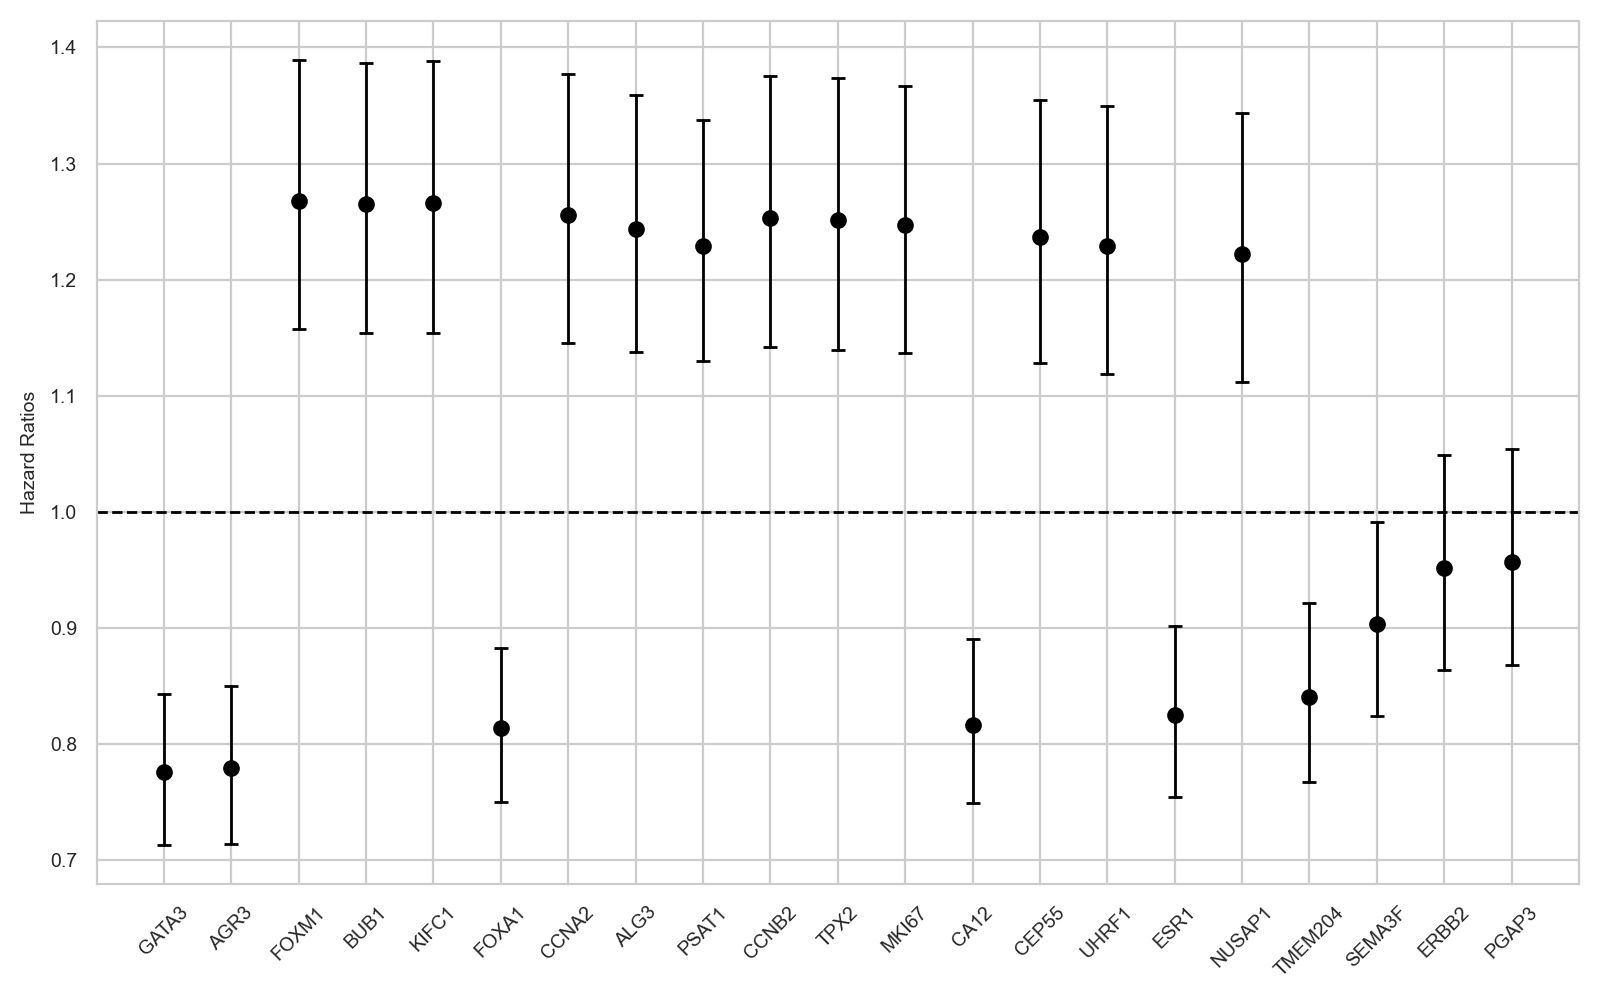

In [1171]:
plt.rcParams.update({'font.size': 7})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_yscale("log")
ax.axhline(1, ls='--', linewidth=1, color='black')

n = 0
for index, i in uni_res.iterrows():
    x = [n,n]
    y = [i["l95exp(coef)"], i["u95exp(coef)"]]
    ax.plot(x, y, "_-", markersize = 5, markeredgewidth= 1, linewidth = 1, color='black')

    x = [n]
    y = [i["exp(coef)"]]
    ax.plot(x, y, "o", color='black', markersize = 5)
    n += 1

ax.set_xlabel("")
ax.set_ylabel("Hazard Ratios")
ax.set_xticks(np.arange(0, uni_res.shape[0], 1))
ax.set_xticklabels(list(uni_res['feature']), rotation=45)
plt.tight_layout()

#### Prognostic scores for FDD

In [1172]:
progn_scores = prognostic_scores(X_sc_bioma_known, y_cox)
print("Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)")
progn_scores

Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)


{'GATA3': 0.5951391895169585,
 'AGR3': 0.5907625565308697,
 'FOXM1': 0.606875197646965,
 'BUB1': 0.5976729084729527,
 'KIFC1': 0.6040651567206109,
 'FOXA1': 0.5653570540393666,
 'CCNA2': 0.597689027254557,
 'ALG3': 0.6070241044865478,
 'PSAT1': 0.5780340919906541,
 'CCNB2': 0.596837034512614,
 'TPX2': 0.5911286831415966,
 'MKI67': 0.6005044411081125,
 'CA12': 0.593075217910576,
 'CEP55': 0.5996961993448099,
 'HORMAD1': 0.5482734482218681,
 'UHRF1': 0.5926591998329788,
 'ESR1': 0.5532940649111011,
 'NUSAP1': 0.583479169928801,
 'TMEM204': 0.5595289631478599,
 'FOXC1': 0.5260372052181869,
 'ENPP3': 0.5144332175851302,
 'SEMA3F': 0.5590638211644208,
 'PRR13': 0.5372405259942218}

#### Prognostic scores for PAM50

In [1174]:
progn_score_pam = prognostic_scores(X_sc_bioma_pam50, y_cox)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_score_pam

Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'NAT1': 0.6278979266641491,
 'GATA3': 0.5951391895169585,
 'AGR3': 0.5907625565308697,
 'MLPH': 0.5917811100160574,
 'EXO1': 0.6097190112585852,
 'MAPT': 0.6105203449726287,
 'PTTG1': 0.6106823003497008,
 'ANLN': 0.6084087845824622,
 'FOXM1': 0.606875197646965,
 'CCNE1': 0.5930276291267919,
 'CENPF': 0.59651312375847,
 'BCL2': 0.6016342909424728,
 'BUB1': 0.5976729084729527,
 'KIFC1': 0.6040651567206109,
 'BIRC5': 0.6041480533117188,
 'FOXA1': 0.5653570540393666,
 'CCNA2': 0.597689027254557,
 'ALG3': 0.6070241044865478,
 'PSAT1': 0.5780340919906541,
 'UBE2C': 0.5990445400313779,
 'CCNB2': 0.596837034512614,
 'GPR160': 0.5695034187168222,
 'TPX2': 0.5911286831415966,
 'MKI67': 0.6005044411081125,
 'CA12': 0.593075217910576,
 'UBE2T': 0.5977964857985858,
 'KIF2C': 0.5917956936756041,
 'CEP55': 0.5996961993448099,
 'MELK': 0.5912392119297405,
 'RRM2': 0.5943363206808573,
 'CCNB1': 0.593416782568382,
 'PHGDH': 0.5966658684031967,
 'CDC20': 0.5842797360818158,
 'HORMAD1': 0.548273448221868

Histogram of c-statistics of prognostic features


<IPython.core.display.Javascript object>


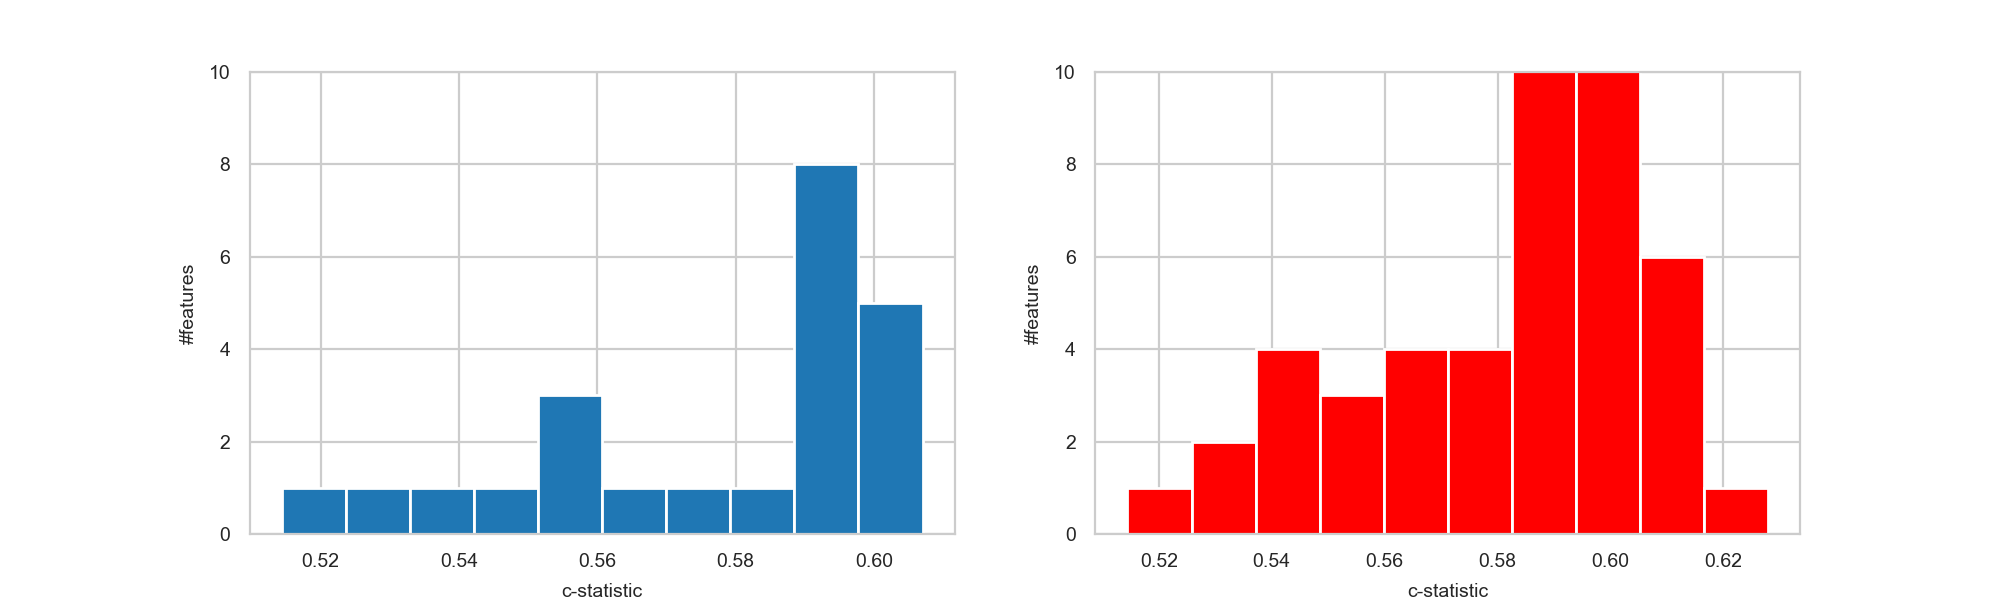

In [1175]:
print("Histogram of c-statistics of prognostic features")
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(1, 2, figsize=(10,3))
sns.set_style("whitegrid")
axs[0].hist(list(progn_scores.values()))
axs[1].hist(list(progn_score_pam.values()), color = 'red')
axs[0].set(xlabel='c-statistic', ylabel='#features')
axs[1].set(xlabel='c-statistic', ylabel='#features')
axs[0].set(ylim=(0, 10))
axs[1].set(ylim=(0, 10))
plt.show()

#### Prognostic coefficients for FDD

In [1176]:
progn_coefficients = prognostic_coefficients(X_sc_bioma_known, y_cox, coef = 0.2)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_coefficients

16
Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'GATA3': -0.25410616359187665,
 'AGR3': -0.2495322343309011,
 'FOXM1': 0.23747240114537507,
 'BUB1': 0.2349589810239783,
 'KIFC1': 0.23558998291337033,
 'FOXA1': -0.20611393856891697,
 'CCNA2': 0.22791344371945232,
 'ALG3': 0.21792370056082647,
 'PSAT1': 0.206360146898122,
 'CCNB2': 0.22570412408548135,
 'TPX2': 0.2241405327587083,
 'MKI67': 0.22053398401349045,
 'CA12': -0.20236333837869283,
 'CEP55': 0.21218393387057316,
 'UHRF1': 0.20598082220213731,
 'NUSAP1': 0.20045873699858613}

#### Prognostic coefficeints for PAM50

In [556]:
progn_coeff_pam = prognostic_coefficients(X_sc_bioma_pam, y_cox, coef = 0.2)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_coeff_pam

Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'NAT1': -0.2869599530926491,
 'EXO1': 0.26127179738526535,
 'PTTG1': 0.26150361445605796,
 'MLPH': -0.2231013869340786,
 'ANLN': 0.24999333036332638,
 'PGR': -0.247550889073421,
 'CCNE1': 0.21935006096043436,
 'MAPT': -0.22270178810076216,
 'BIRC5': 0.232405353590541,
 'BCL2': -0.22432590270269395,
 'CENPF': 0.2317453003717347,
 'FOXA1': -0.20004508533153662,
 'UBE2C': 0.22932772264442675,
 'MKI67': 0.22391916296930456,
 'GPR160': -0.21008588660243266,
 'KIF2C': 0.2143736474512031,
 'UBE2T': 0.21460299715859604,
 'MELK': 0.20910458891729844,
 'PHGDH': 0.21129434880880663,
 'CDC20': 0.20716090679274776,
 'CCNB1': 0.20918601554021796,
 'CEP55': 0.21086977962623296,
 'RRM2': 0.2133795603460867,
 'TYMS': 0.2000518328081153,
 'SLC39A6': -0.20006588075250176}

In [557]:
print(len(list(set.intersection(set(pam50sig), set(progn_coefficients.keys())))))
for k in progn_coefficients.keys():
    if k not in pam50sig:
        print((k,progn_coefficients[k]))

5
('GATA3', -0.24850739737273284)
('XBP1', -0.25848349850612207)
('CT62', -0.26164679974710525)
('AFF3', -0.2512317943562884)
('TBC1D9', -0.23972517620382486)
('CDT1', 0.24573179443837279)
('FAM83D', 0.2456891790304169)
('CELSR1', -0.236968661700292)
('FOXM1', 0.24128467873169365)
('TTC8', -0.23124455536667474)
('NCAPG', 0.2406412019522035)
('KDM4B', -0.23592759718648568)
('CPEB2', -0.23554894819739106)
('SERPINA11', -0.22414053973091552)
('TPX2', 0.22550304689622233)
('ZMYND10', -0.21397788424608769)
('CDCA3', 0.21874938767118696)
('CDCA5', 0.21165182237756322)
('PRR11', 0.20211422952631436)
('RAD54L', 0.20608843378265684)


Histogram of coefficients of prognostic features


<IPython.core.display.Javascript object>


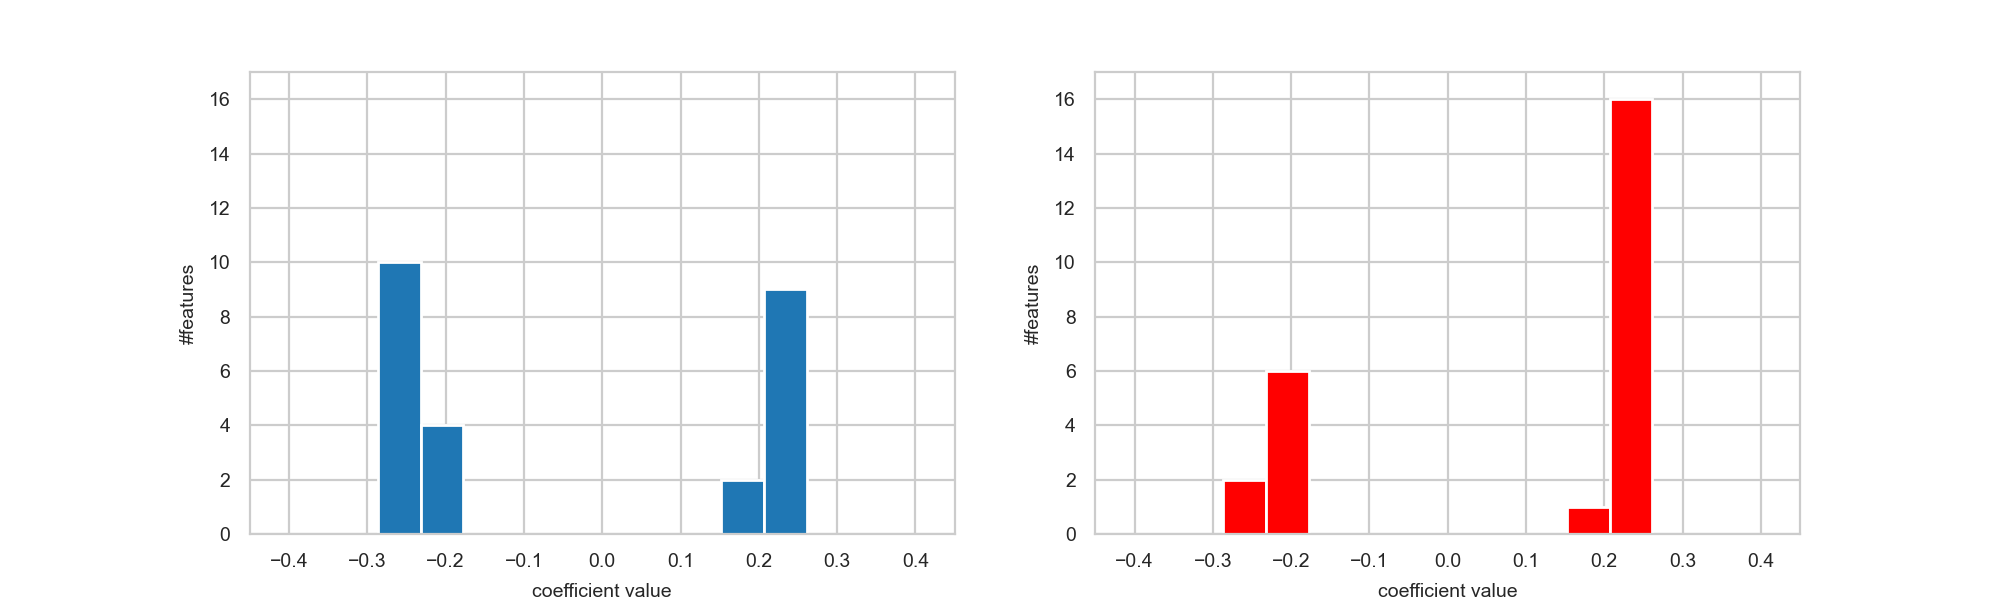

In [558]:
print("Histogram of coefficients of prognostic features")
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(1, 2, figsize=(10,3))
sns.set_style("whitegrid")
axs[0].hist(list(progn_coefficients.values()))
axs[1].hist(list(progn_coeff_pam.values()), color = 'red')
axs[0].set(xlabel='coefficient value', ylabel='#features')
axs[1].set(xlabel='coefficient value', ylabel='#features')
axs[0].set(ylim=(0, 17))
axs[1].set(ylim=(0, 17))
axs[0].set(xlim=(-0.45, 0.45))
axs[1].set(xlim=(-0.45, 0.45))
plt.show()

#### Define the risk score and assess its accuracy

In [1178]:
# without covariates
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=X_sc_bioma_known, y_train=y_cox, alpha = 0.05, p_val=0.05, coef = 0.2)
rs_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_known)
rs_scores = rs_prognostic_classifier.predict_score(x=X_sc_bioma_known)

16


In [1179]:
len(rs_scores)

2822

In [1180]:
swpheno_ihc.head()

Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   
6           GSM2528087  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   
6             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   
6   Primary breast tumor        Homo sapiens   82      10.0  ...   

                er_psgc               pgr_psgc               her2_psgc  \
0  er prediction sgc: 0  pgr prediction sgc: 0  her2 prediction sgc: 0   
1  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
2  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
4  er prediction sgc: 1  pgr prediction sgc: 1  her2 prediction sgc: 0   
6  er prediction sgc: 0  pgr prediction sgc: 0  her2 prediction sgc: 1   

                ki67_psgc  Pam50  SurvDays OverallSurv Endocrine_treat chemo  \
0  ki67 prediction sgc: 1      3      2367           0             0.0   1.0   
1  ki67 prediction sgc: 0      0      2367           0             1.0   1.0   
2  ki67 prediction sgc: 1      1      2168           1             1.0   1.0   
4  ki67 prediction sgc: 0      4      2389           0             1.0   0.0   
6  ki67 prediction sgc: 0      2      2380           0             1.0   0.0   

  histcl  
0  Basal  
1   LumA  
2   LumB  
4   LumA  
6   Her2  

[5 rows x 32 columns]

In [1202]:
X_model = X_bioma_known
# initialize data of lists.
data = {'RiskScore':rs_scores,
        'Class':rs_classes,
        'Event':y_cox['event'],
        'Time':y_cox['time']}
df_sw_dat_phe = pd.DataFrame(data, index = X_model.index)  
#
age_bins = [0, 40, 50, 60, np.inf]
age_names = ['<40', '40-50', '50-60', '60+']
df_sw_dat_phe['Age'] = pd.cut(swpheno_ihc['Age'], age_bins, labels=age_names)
df_sw_dat_phe['AgeN'] = swpheno_ihc['Age']
df_sw_dat_phe['Chemo'] = swpheno_ihc['chemo'].fillna(0)
df_sw_dat_phe['Chemo'] = df_sw_dat_phe['Chemo'].astype(int)
df_sw_dat_phe = pd.concat([df_sw_dat_phe, X_model], axis=1)
df_sw_dat_phe = df_sw_dat_phe.sort_values(by=['RiskScore'])
df_sw_dat_phe['N'] = np.arange(0, len(df_sw_dat_phe['RiskScore']), 1)
df_sw_dat_phe.head()

RiskScore  Class  Event  Time    Age  AgeN  Chemo  BUB1  UHRF1  GABRA4  \
2529  -5.341281   True      0  1717    60+    71      0   0.0    0.0     0.0   
1615  -5.298932   True      0  1165    60+    62      0   0.0    0.0     0.0   
150   -5.235404   True      0  2009    60+    73      0   0.0    0.0     0.0   
2623  -5.211959   True      0  1499    60+    66      0   0.0    0.0     0.0   
274   -5.209808   True      0  1555  50-60    53      0   0.0    0.0     0.0   

      ...  CCNB2  AOC2  HORMAD1     PSAT1      ALG3  C1orf127      ESR1  \
2529  ...    0.0   0.0      0.0  0.000000  4.414734       0.0  7.222005   
1615  ...    0.0   0.0      0.0  0.054398  4.343311       0.0  6.587366   
150   ...    0.0   0.0      0.0  0.000000  4.486206       0.0  5.321136   
2623  ...    0.0   0.0      0.0  0.000000  4.610757       0.0  6.362064   
274   ...    0.0   0.0      0.0  0.000000  4.329007       0.0  6.040989   

         PRR13  SHC3  N  
2529  6.663604   0.0  0  
1615  6.624810   0.0  1  
150   6.684695   0.0  2  
2623  6.628763   0.0  3  
274   6.441283   0.0  4  

[5 rows x 44 columns]

In [1203]:
print(np.min(df_sw_dat_phe['RiskScore']))
print(np.max(df_sw_dat_phe['RiskScore']))

-5.341281077147322
9.550991135772332


In [1204]:
time_sort = list(df_sw_dat_phe['Time']).sort()
df_age = pd.DataFrame()
for i in range(np.max(df_sw_dat_phe['Time'])):
    temp = df_sw_dat_phe[df_sw_dat_phe['Time'] == i]
    if temp.shape[0] == 0:
        df_age[str(i)] = [0,0,0,0]
    else:
        df_age[str(i)] = temp['AgeN'].value_counts(bins = age_bins).sort_index(axis=0).tolist()
#df_age['Age'] = age_names
df_age_2 = df_age.T
df_age_2.columns = age_names
df_age_2['Time'] = df_age.columns

In [1205]:
df_age_2.head()

<40  40-50  50-60  60+ Time
0    0      0      0    0    0
1    0      0      0    0    1
2    0      0      0    0    2
3    0      0      0    0    3
4    0      0      0    0    4

<IPython.core.display.Javascript object>


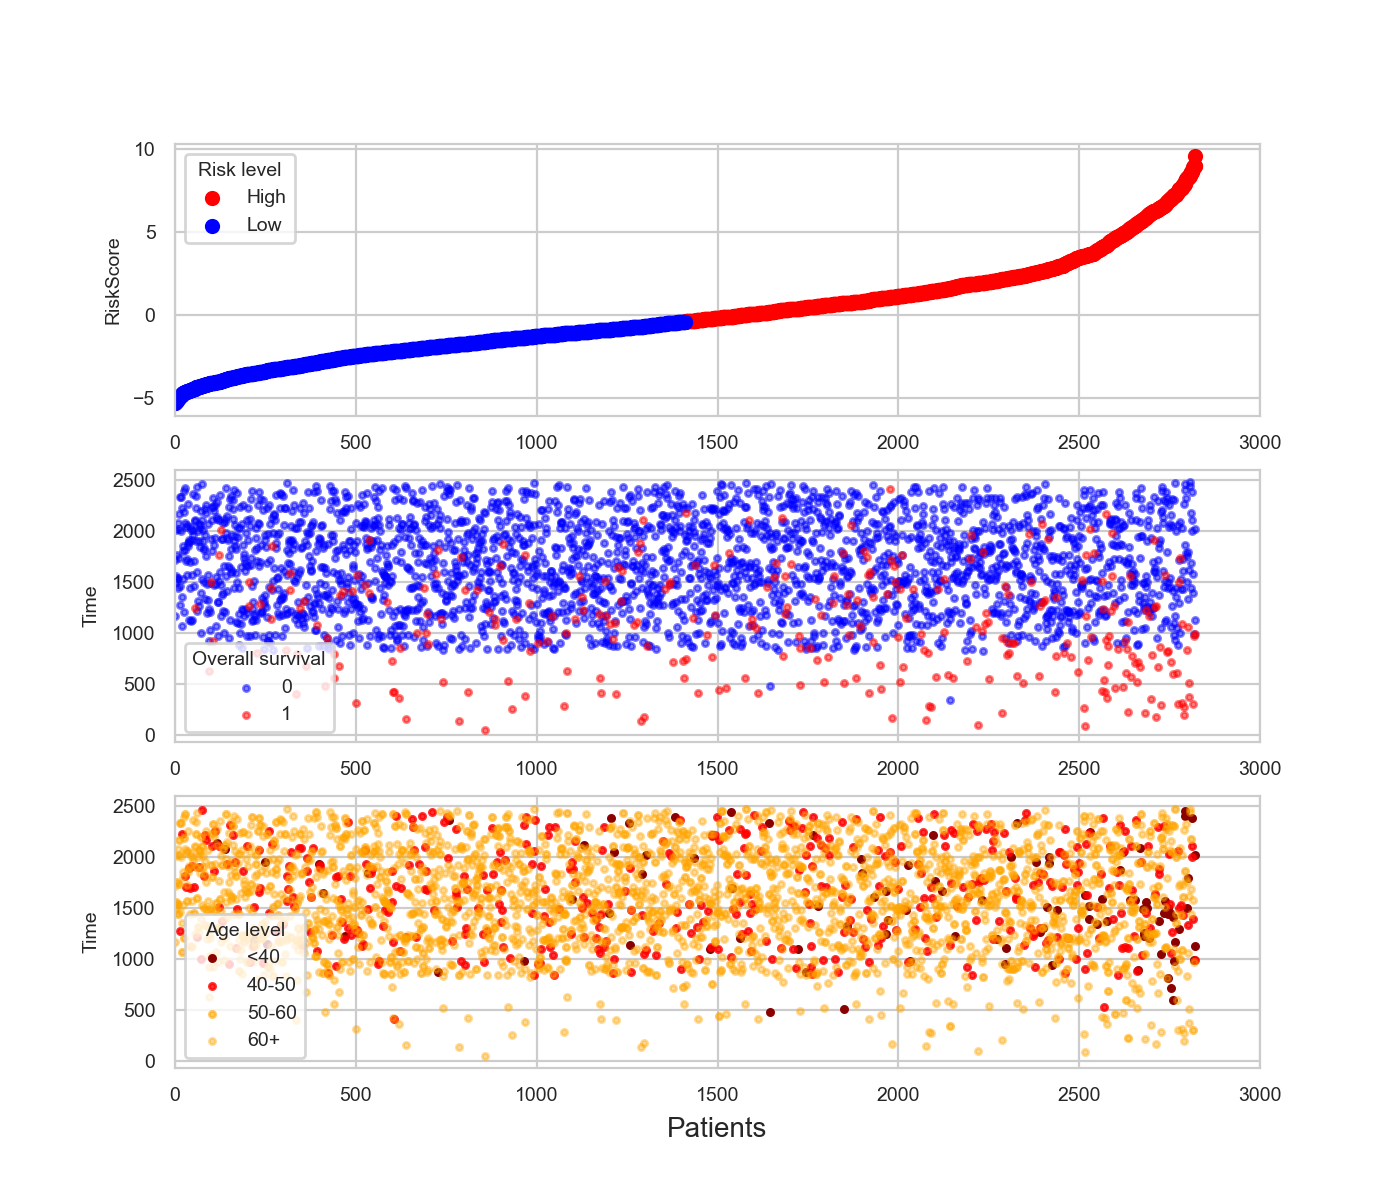

In [1230]:
plt.rc('font', size=7)  

fig, axs = plt.subplots(3, 1, figsize=(7,6), gridspec_kw={"height_ratios":[3, 3, 3]})

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))

markers = ['MKI67', 'ERBB2', 'ESR1', 'AGR3', 'BUB1', 'FOXA1']

# ('NUSAP1', 6), ('BUB1', 6), ('MKI67', 6), ('TMEM204', 6), ('FOXA1', 6), 
# ('TSHR', 6), ('PGAP3', 6), ('ERBB2', 6), ('GATA3', 6), ('ESR1', 6), ('AGR3', 6)

#fig.tight_layout(pad=1.0)
fig.subplots_adjust(hspace=0.2)

# scatter plot
colors = {True:'blue', False:'red'}
grouped = df_sw_dat_phe.groupby('Class')
for key, group in grouped:
    group.plot(ax=axs[0], kind='scatter', x='N', y='RiskScore', label=key, color=colors[key])

axs[0].set_xlabel('', fontsize=8)
axs[0].set_xlim([0, 3000])
axs[0].legend(title='Risk level', labels= ['High','Low'])

# scatterplot
colors = {1:'red', 0:'blue'}
grouped = df_sw_dat_phe.groupby('Event')
for key, group in grouped:
    group.plot(ax=axs[1], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
axs[1].set_xlabel('', fontsize=8)
axs[1].set_xlim([0, 3000])
axs[1].legend(title='Overall survival')
    
# scatterplot
colors = {'<40':'darkred', '40-50':'red', '50-60':'orange', '60+': 'orange'}
trasps = {'<40':1, '40-50':0.8, '50-60':0.6, '60+': 0.4}
grouped = df_sw_dat_phe.groupby('Age')
for key, group in grouped:
    t = trasps[key]
    group.plot(ax=axs[2], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = t, marker = '.')
    
axs[2].set_xlabel('', fontsize=8)
axs[2].set_xlim([0, 3000])
axs[2].legend(title='Age level', loc = 'lower left')

# scatterplot
#colors = {0:'grey', 1:'orange'}
#grouped = df_sw_dat_phe.groupby('Chemo')
#for key, group in grouped:
#    group.plot(ax=axs[3], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
#axs[3].set_xlabel('', fontsize=8)
#axs[3].legend(title='Chemo')
    
# heatmap
# Define two rows for subplots
#cax3, ax3 = plt.subplots(fig, nrows=2, figsize=(8,4.025),  gridspec_kw={"height_ratios":[0.025, 1]})
#sns.heatmap(df_sw_dat_phe[markers].T, ax=axs[3], cmap="coolwarm", xticklabels=False, cbar=False)  
# colorbar
#fig.colorbar(axs[3].get_children()[0], cax=axs[4], orientation="horizontal")
#axs[3].set_yticklabels(axs[3].get_yticklabels(), rotation = 0, fontsize = 6)

axs[2].set_xlabel('Patients', fontsize=10)
    
plt.show()

plt.savefig('risk_biom.pdf', bbox_inches='tight')

#### Estimating the survival function using Kaplan-Meier

In [1208]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
kmf = KaplanMeierFitter()
low_risk = (df_sw_dat_phe["Class"] == True)
T = df_sw_dat_phe["Time"]
E = df_sw_dat_phe["Event"]
results = logrank_test(T[low_risk], T[~low_risk], E[low_risk], E[~low_risk], alpha=.99)
print(results.summary.iloc[:,1])
results.print_summary()

0    4.736208e-07
Name: p, dtype: float64


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          25.37 <0.005     21.01

<IPython.core.display.Javascript object>


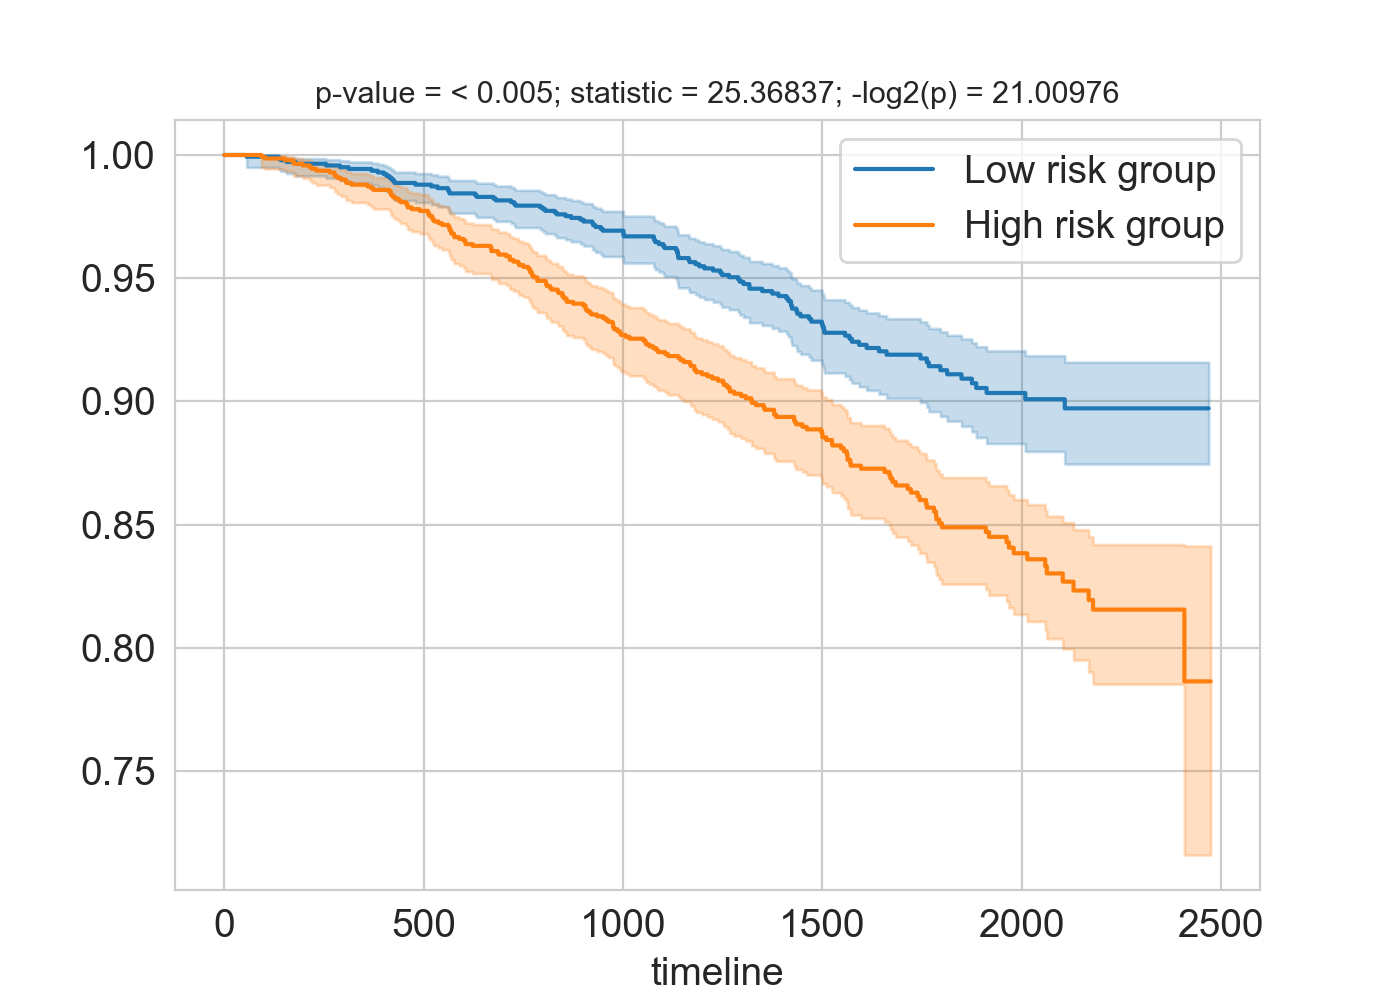

In [1209]:
plt.rc('font', size=14)  

fig, ax = plt.subplots(1, 1, figsize=(7,5))

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=ax) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

ax.set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt), fontsize=11)

#plt.title("Lifespans of different global regimes")
plt.show()

In [1238]:
mappin_histcl = ['LumA','LumB','Her2','Basal']
dfp = pd.DataFrame({'BUB1':X_bioma_known['BUB1'].tolist(),
                    'AGR3':X_bioma_known['AGR3'].tolist(),
                    'HISTCL':[mappin_histcl[i] for i in histcl.tolist()]})
dfp.head()

BUB1      AGR3 HISTCL
0  3.025597  0.000000  Basal
1  1.465654  7.376594   LumA
2  3.529516  6.822501   LumB
3  0.000000  5.020364   LumA
4  1.430033  4.925368   Her2

<IPython.core.display.Javascript object>


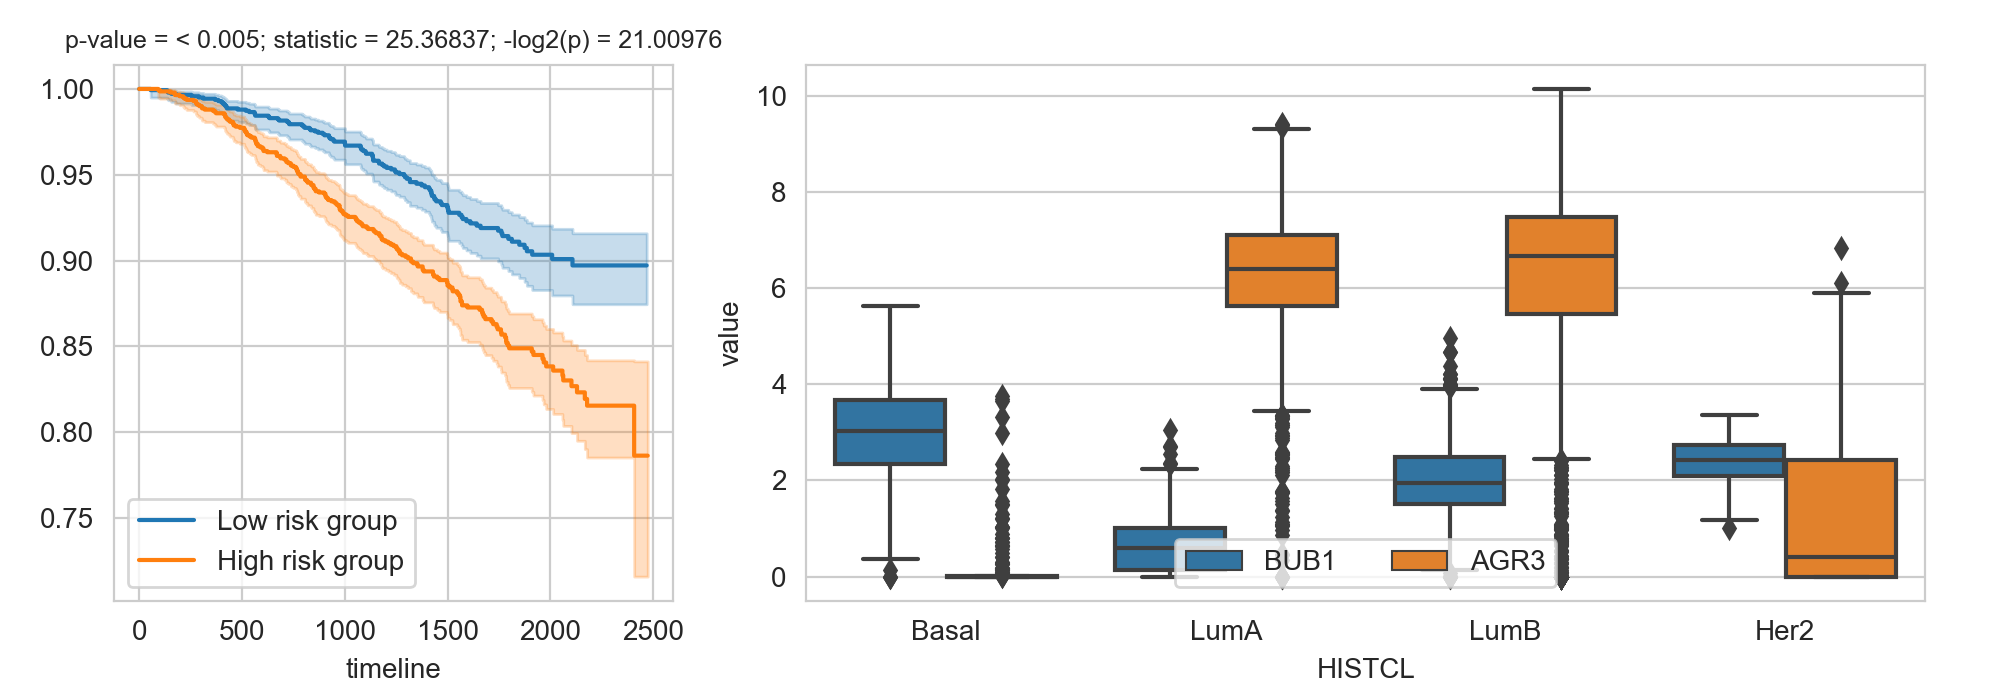

In [1239]:
plt.rc('font', size=10)  

fig, axs = plt.subplots(1, 2, figsize=(10,3.5), gridspec_kw={"width_ratios":[1, 2]})

fig.tight_layout(pad=2.0)

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=axs[0])

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=axs[0]) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

axs[0].set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt), fontsize=9)

dd=pd.melt(dfp, id_vars=['HISTCL'], value_vars=['BUB1','AGR3'], var_name='Genes')
sns.boxplot(x='HISTCL', y='value', data=dd, hue='Genes', ax=axs[1])
plt.legend(loc='lower center', ncol=4)
plt.show()

plt.savefig('surv_biom.pdf', bbox_inches='tight')

In [1214]:
type(pam50.tolist())

list

#### Predict the risk score for TCGA

In [343]:
tcgaplus.head()

patient  PFI.1  PFI.time.1  PFI.2  PFI.time.2  PFS  PFS.time  DSS_cr  \
0  TCGA-3C-AAAU      1      1808.0    1.0      1808.0    1    1808.0     0.0   
1  TCGA-3C-AALI      0      4005.0    0.0      4005.0    0    4005.0     0.0   
2  TCGA-3C-AALJ      0      1474.0    0.0      1474.0    0    1474.0     0.0   
3  TCGA-3C-AALK      0      1448.0    0.0      1448.0    0    1448.0     0.0   
4  TCGA-4H-AAAK      0       348.0    0.0       348.0    0     348.0     0.0   

   DSS.time.cr  DFI.cr  DFI.time.cr  PFI.cr  PFI.time.cr  PFI.1.cr  \
0       4047.0     1.0       1808.0       1       1808.0         1   
1       4005.0     0.0       4005.0       0       4005.0         0   
2       1474.0     0.0       1474.0       0       1474.0         0   
3       1448.0     NaN          NaN       0       1448.0         0   
4        348.0     0.0        348.0       0        348.0         0   

   PFI.time.1.cr  PFI.2.cr  PFI.time.2.cr  
0         1808.0       1.0         1808.0  
1         4005.0       0.0         4005.0  
2         1474.0       0.0         1474.0  
3         1448.0       0.0         1448.0  
4          348.0       0.0          348.0

In [344]:
tcgaplus.isna().sum()

patient            0
PFI.1              0
PFI.time.1         1
PFI.2             11
PFI.time.2        12
PFS                0
PFS.time           1
DSS_cr            19
DSS.time.cr        1
DFI.cr           143
DFI.time.cr      144
PFI.cr             0
PFI.time.cr        1
PFI.1.cr           0
PFI.time.1.cr      1
PFI.2.cr          11
PFI.time.2.cr     12
dtype: int64

In [323]:
rs_tcga_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_tcga_fdd)
rs_tcga_scores = rs_prognostic_classifier.predict_score(x=X_sc_bioma_tcga_fdd)
print(len(rs_tcga_classes))
print(len(rs_tcga_scores))

1081
1081


In [384]:
X_model = X_sc_bioma_tcga_fdd
# initialize data of lists.
data = {'RiskScore':rs_tcga_scores,
        'Class':rs_tcga_classes,
        'Event':y_cox_tcga['event'],
        'Time':y_cox_tcga['time']}
df_tcga_dat_phe = pd.DataFrame(data, index = X_model.index)  
#
age_bins = [0, 40, 50, 60, np.inf]
age_names = ['<40', '40-50', '50-60', '60+']
df_tcga_dat_phe['Age'] = pd.cut(tcgap['age_at_initial_pathologic_diagnosis'], age_bins, labels=age_names)
df_tcga_dat_phe['AgeN'] = tcgap['age_at_initial_pathologic_diagnosis']
df_tcga_dat_phe = pd.concat([df_tcga_dat_phe, X_model], axis=1)
df_tcga_dat_phe = df_tcga_dat_phe.sort_values(by=['RiskScore'])
df_tcga_dat_phe['N'] = np.arange(0, len(df_tcga_dat_phe['RiskScore']), 1)
df_tcga_dat_phe.head()

RiskScore  Class  Event  Time  Age  AgeN     CDCA5       MYB    FAM47E  \
891 -12.631909   True      0    78  60+    70 -3.299564 -0.060995  0.176742   
802 -10.913653   True      0  1318  60+    74 -2.263632  1.187325  1.156055   
835 -10.757682   True      1  1004  60+    74 -2.414856  0.617777  1.460571   
838 -10.403590   True      0   501  60+    63 -2.771184  0.148270  1.148446   
194 -10.329948   True      0     0  60+    67 -2.043256  0.712485  1.112253   

         TPX2  ...   TMEM45B  SERPINA11      MPP6    CELSR1      TTC8  \
891 -4.212690  ...  1.031287   0.910858 -0.241056  0.357861  0.382548   
802 -3.211660  ...  0.327781   0.297222 -0.351098  0.926222  0.722024   
835 -1.737365  ...  1.202784   0.825370 -1.334106  1.056294  0.709108   
838 -1.937797  ...  1.515802   1.058389 -0.116847  0.446595  1.075428   
194 -1.295624  ...  0.724098   0.928695 -2.776185  1.330821  0.577314   

        SPAG5     ANXA9    LRRC46      CA12  N  
891 -3.162293  1.109277  0.680068  0.815289  0  
802 -2.314627  0.020936  0.325774  0.480674  1  
835 -1.542908  0.482837  1.374304  0.893232  2  
838 -2.420918 -0.221512  0.718937  0.294111  3  
194 -1.517622  0.903884  1.462903  0.730537  4  

[5 rows x 57 columns]

In [385]:
df_tcga_dat_phe = df_tcga_dat_phe[df_tcga_dat_phe['Time'] < 3000]
print(np.max(df_tcga_dat_phe['Time']))

2991


<IPython.core.display.Javascript object>


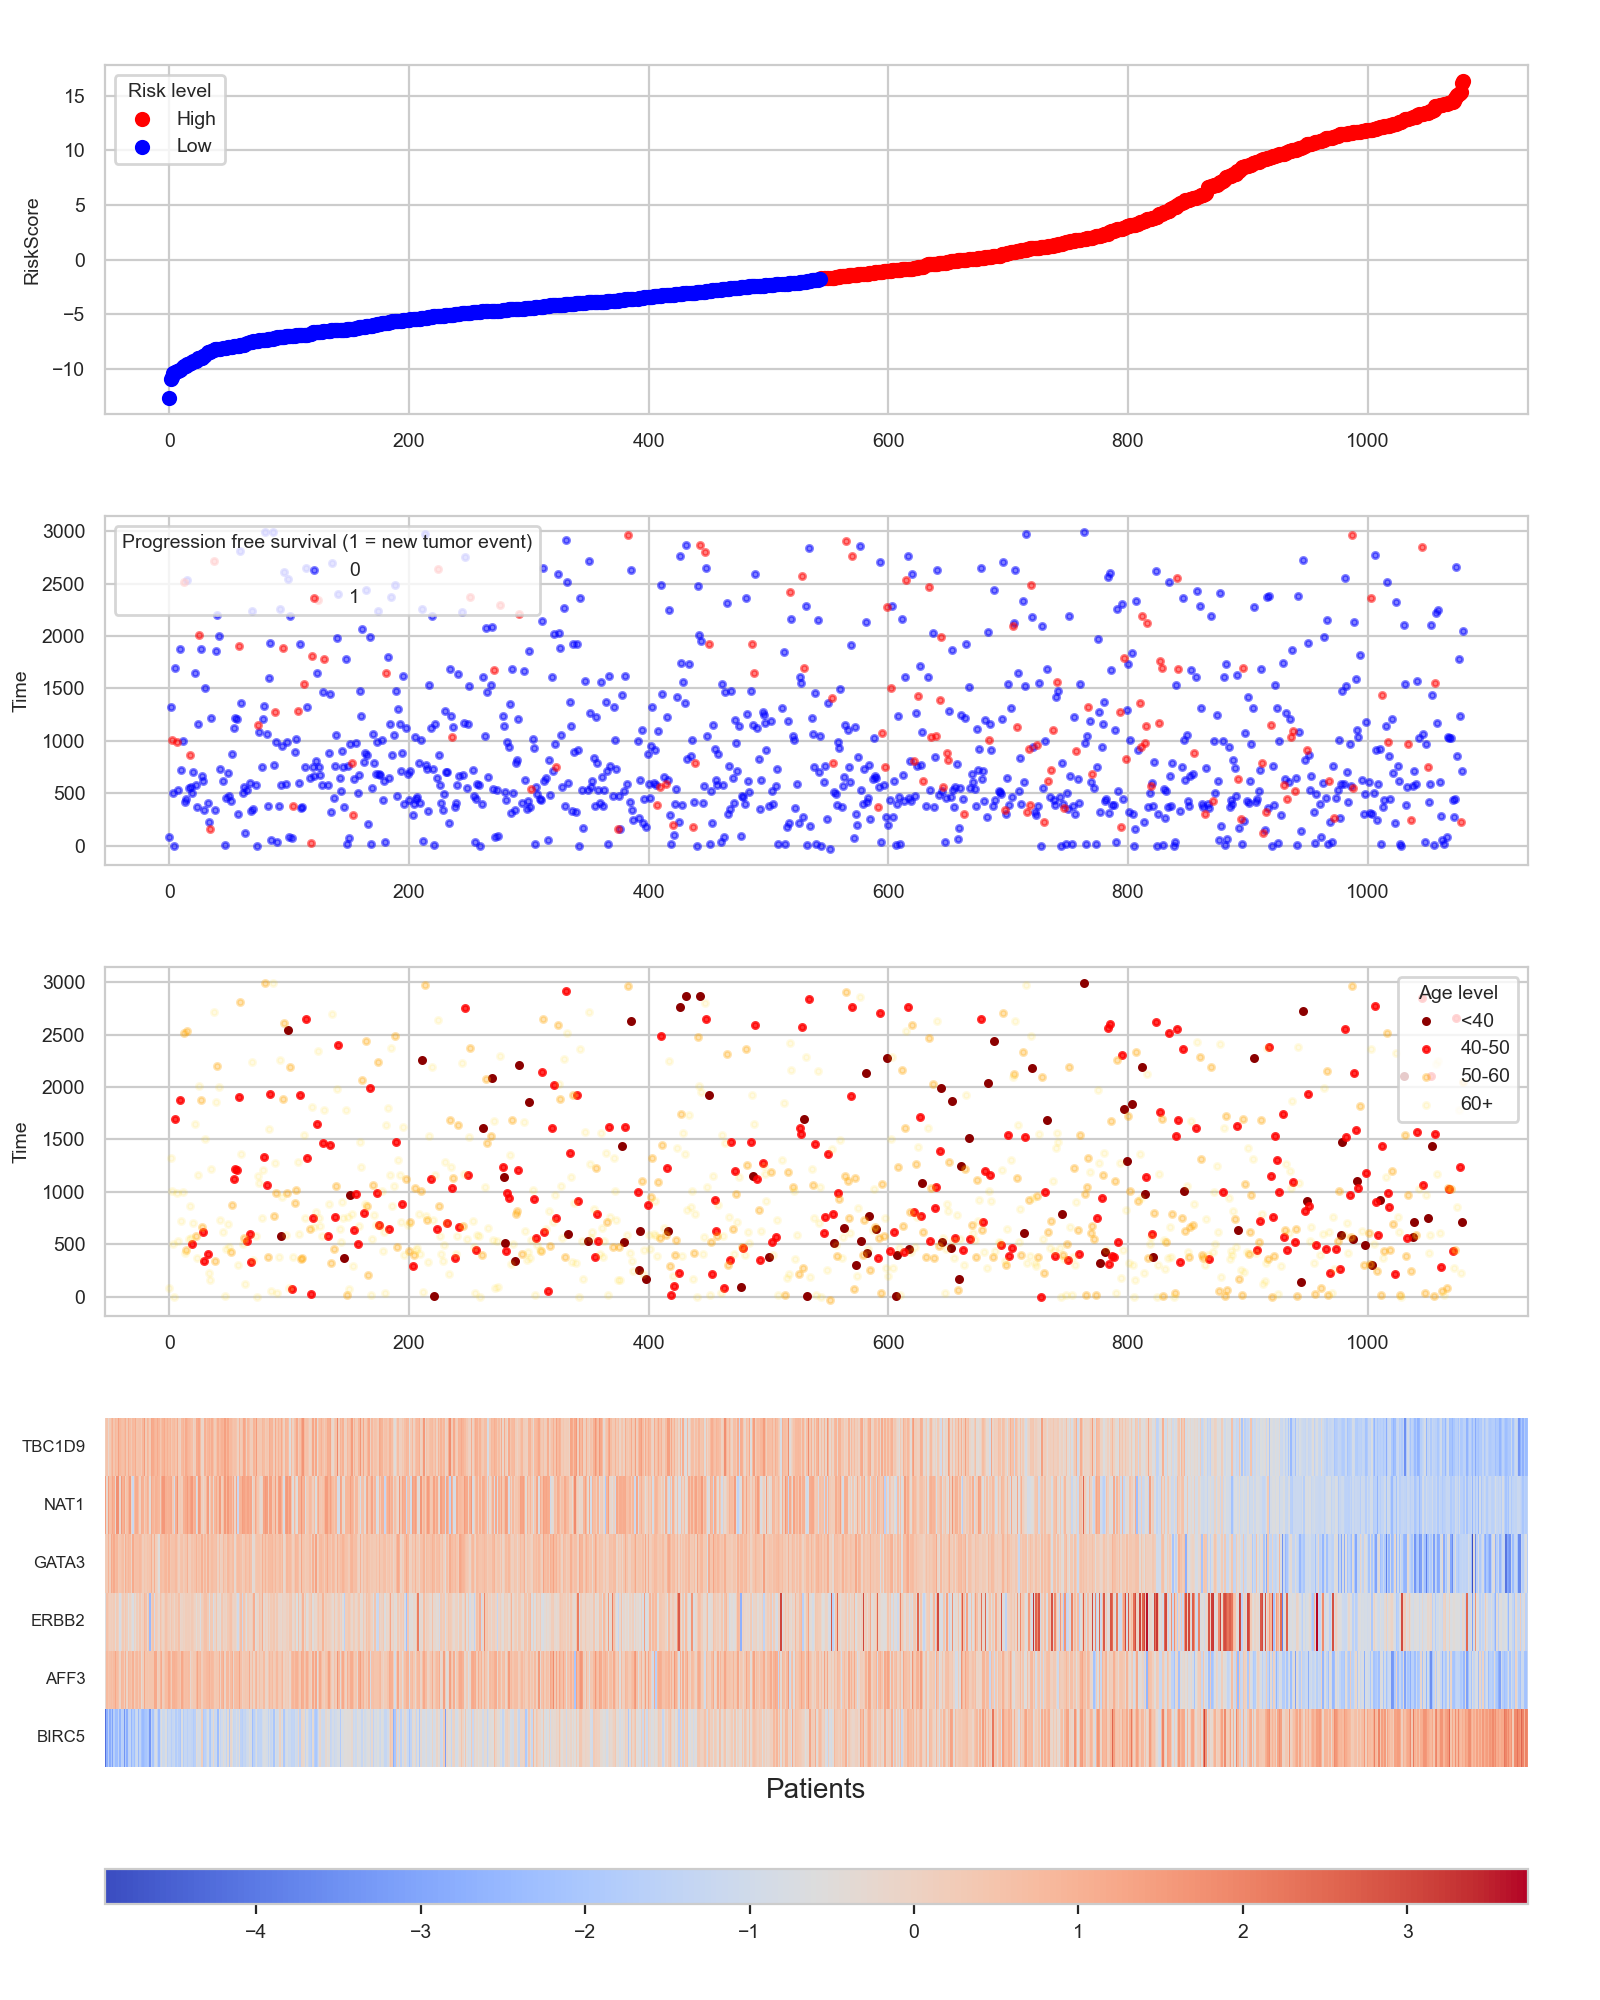

In [386]:
fig, axs = plt.subplots(5, 1, figsize=(8,10), gridspec_kw={"height_ratios":[3, 3, 3, 3, 0.3]})

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))

markers = ['TBC1D9', 'NAT1', 'GATA3', 'ERBB2', 'AFF3', 'BIRC5']
fig.tight_layout(pad=3.0)

# scatter plot
colors = {True:'blue', False:'red'}
grouped = df_tcga_dat_phe.groupby('Class')
for key, group in grouped:
    group.plot(ax=axs[0], kind='scatter', x='N', y='RiskScore', label=key, color=colors[key])

axs[0].set_xlabel('', fontsize=8)
axs[0].legend(title='Risk level', labels= ['High','Low'])

# scatterplot
colors = {True:'red', False:'blue'}
grouped = df_tcga_dat_phe.groupby('Event')
for key, group in grouped:
    group.plot(ax=axs[1], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
axs[1].set_xlabel('', fontsize=8)
axs[1].legend(title='Progression free survival (1 = new tumor event)')
    
# scatterplot
colors = {'<40':'darkred', '40-50':'red', '50-60':'orange', '60+': 'gold'}
trasps = {'<40':1, '40-50':0.8, '50-60':0.3, '60+': 0.1}
grouped = df_tcga_dat_phe.groupby('Age')
for key, group in grouped:
    t = trasps[key]
    group.plot(ax=axs[2], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = t, marker = '.')
    
axs[2].set_xlabel('', fontsize=8)
axs[2].legend(title='Age level')
    
# heatmap
# Define two rows for subplots
#cax3, ax3 = plt.subplots(fig, nrows=2, figsize=(8,4.025),  gridspec_kw={"height_ratios":[0.025, 1]})
sns.heatmap(df_tcga_dat_phe[markers].T, ax=axs[3], cmap="coolwarm", xticklabels=False, cbar=False)  
# colorbar
fig.colorbar(axs[3].get_children()[0], cax=axs[4], orientation="horizontal")
axs[3].set_yticklabels(axs[3].get_yticklabels(), rotation = 0, fontsize = 6)

axs[3].set_xlabel('Patients', fontsize=10)
    
plt.show()

In [370]:
df_tcga_dat_phe.shape

(1003, 57)

In [387]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
kmf = KaplanMeierFitter()
low_risk = (df_tcga_dat_phe["Class"] == True)
T = df_tcga_dat_phe["Time"]
E = df_tcga_dat_phe["Event"]
results = logrank_test(T[low_risk], T[~low_risk], E[low_risk], E[~low_risk], alpha=.99)
print(results.summary.iloc[:,1])
results.print_summary()

0    0.000044
Name: p, dtype: float64


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.70 <0.005     14.48

<IPython.core.display.Javascript object>


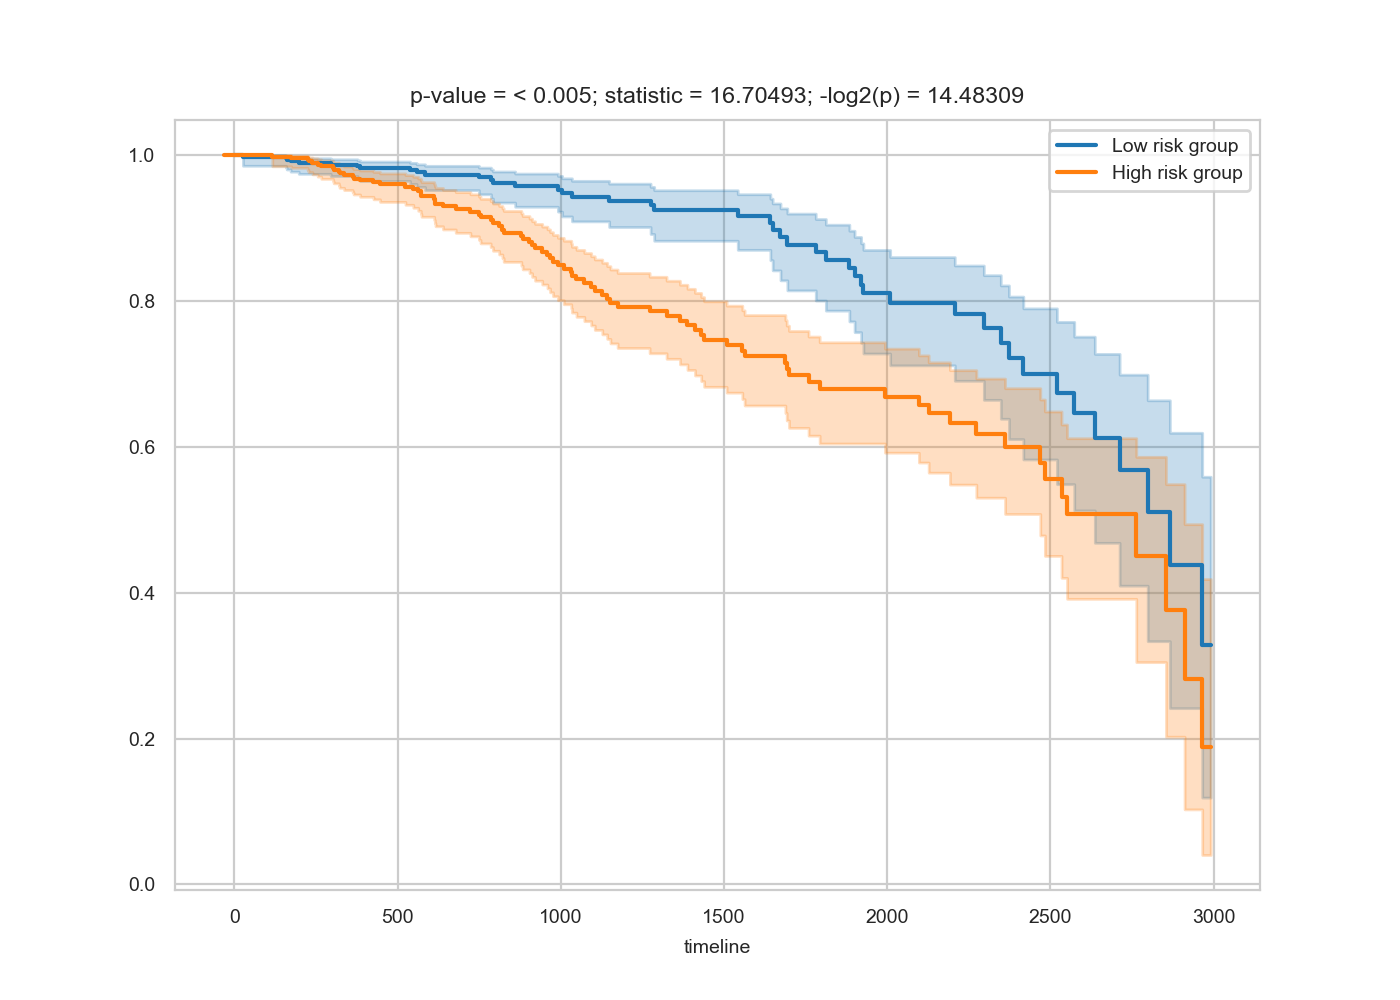

In [388]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=ax) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

ax.set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt))

#plt.title("Lifespans of different global regimes")
plt.show()

In [156]:
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=X_sc_bioma_fdd, y_train=y_cox)
rs_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_fdd)
print("Classes from risk scores (True for lower risk)")
df_classes = pd.DataFrame()
df_classes["risk_group"] = rs_classes
print(df_classes)

Classes from risk scores (True for lower risk)
      risk_group
0          False
1           True
2          False
3          False
4           True
...          ...
2964       False
2965       False
2966       False
2967       False
2968        True

[2969 rows x 1 columns]


In [157]:
rs_res = univariate_analysis(x=df_classes, y=y_cox, model=MODEL)
print("Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)")
print(rs_res.to_string())

Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)
      feature     score         p_val  coefficient
0  risk_group  0.586358  5.414315e-09    -0.700164


In [158]:
print("Risk score model cross validation mean c-statistic")
print("In each fold the model is computed using the results of univariate models on all features... might take a while... (5/10 minutes?)")
rs_cv_score = cross_validate(x=X_sc_bioma_fdd, y=y_cox, model=RiskScoreCoxModel(), n_folds=10)
print(str(rs_cv_score))

Risk score model cross validation mean c-statistic
In each fold the model is computed using the results of univariate models on all features... might take a while... (5/10 minutes?)
0.5846687408098079


In [391]:
print("CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES")
print("The scores are cross-validated c-statistics.")
for a in [0, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]:
    print("alpha: " + str(a))
    all_score = cross_validate(x=X_sc_bioma_all, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("selected score: " + str(all_score))
    fdd_score = cross_validate(x=X_sc_bioma_fdd, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("selected score: " + str(fdd_score))
    pam50_score = cross_validate(x=X_sc_bioma_pam, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("pam50 score: " + str(pam50_score))

CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES
The scores are cross-validated c-statistics.
alpha: 0
selected score: 0.6496773923587293
selected score: 0.6637860191217723
pam50 score: 0.6854088876853061
alpha: 0.1
selected score: 0.6972934860915053
selected score: 0.661635484473868
pam50 score: 0.6779202736126593
alpha: 0.3
selected score: 0.6840612391309443
selected score: 0.6530226023931875
pam50 score: 0.6647648243174132
alpha: 1
selected score: 0.6622637422907844
selected score: 0.6414057225923407
pam50 score: 0.6477744779545348
alpha: 3
selected score: 0.6427673967046937
selected score: 0.634762700158934
pam50 score: 0.6379774921458545
alpha: 10
selected score: 0.6317524776971156
selected score: 0.631173863233013
pam50 score: 0.6335227673772956
alpha: 30
selected score: 0.6278444178505499
selected score: 0.63015611037316
pam50 score: 0.6326014289094888
alpha: 100
selected score: 0.6266306448529619
selected score: 0.629811498